In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn keras-facenet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=1813040c1e3a55366f0e7e9aaca0122d76b42849b595a344448430d616b0c54f
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [ ]:

import os, pickle, cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
from keras_facenet import FaceNet
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Face_Detection_Recognition/dataset_split/augmented_train"
TEST_DIR = "/content/drive/MyDrive/Face_Detection_Recognition/dataset_split/test"

SAVE_DIR = "/content/drive/MyDrive/Face_Detection_Recognition/models"
os.makedirs(SAVE_DIR, exist_ok=True)

In [ ]:
def load_data(data_dir):
    images = []
    labels = []
    person_names = []

    for person_name in os.listdir(data_dir):
        person_dir = os.path.join(data_dir, person_name)
        if not os.path.isdir(person_dir):
            continue

        if person_name not in person_names:
            person_names.append(person_name)

        for image_file in os.listdir(person_dir):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
                image_path = os.path.join(person_dir, image_file)
                try:
                    img = Image.open(image_path).convert('RGB') # Ensure images are RGB
                    images.append(np.array(img))  # Convert to numpy array
                    labels.append(person_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return images, labels, person_names

In [ ]:
X_train, y_train_labels, train_person_names = load_data(TRAIN_DIR)
X_test, y_test_labels, test_person_names = load_data(TEST_DIR)

In [ ]:
print(f"Loaded {len(X_train)} training images from {len(set(y_train_labels))} identities.")
print(f"Loaded {len(X_test)} testing images from {len(set(y_test_labels))} identities.")

Loaded 7170 training images from 296 identities.
Loaded 467 testing images from 296 identities.


In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train_labels)

LabelEncoder()

In [ ]:
y_train = label_encoder.transform(y_train_labels)
y_test = label_encoder.transform(y_test_labels)

In [ ]:
embedder = FaceNet()

def generate_embeddings(images, facenet_model):
    embeddings = []
    for img in tqdm(images, desc="Generating Embeddings"):
        # FaceNet requires images to be a specific size (e.g., 160x160)
        img_resized = cv2.resize(img, (160, 160))  # Or whatever size FaceNet expects
        img_expanded = np.expand_dims(img_resized, axis=0)  # Add batch dimension
        embedding = facenet_model.embeddings(img_expanded)[0] # Get embedding, take from batch
        embeddings.append(embedding)
    return np.array(embeddings)

In [ ]:
X_train_embeddings = generate_embeddings(X_train, embedder)
X_test_embeddings = generate_embeddings(X_test, embedder)

Generating Embeddings:   0%|          | 0/7170 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Generating Embeddings:   0%|          | 1/7170 [00:10<20:00:04, 10.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Generating Embeddings:   0%|          | 2/7170 [00:10<8:22:11,  4.20s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   0%|          | 4/7170 [00:10<3:14:49,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   0%|          | 5/7170 [00:10<2:18:31,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   0%|          | 6/7170 [00:10<1:40:14,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   0%|          | 8/7170 [00:10<58:14,  2.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   0%|          | 10/7170 [00:10<40:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   0%|          | 11/7170 [00:11<34:10,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   0%|          | 13/7170 [00:11<25:26,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   0%|          | 15/7170 [00:11<20:33,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   0%|          | 17/7170 [00:11<17:38,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   0%|          | 19/7170 [00:11<15:22,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   0%|          | 21/7170 [00:12<14:11,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   0%|          | 23/7170 [00:12<13:24,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   0%|          | 25/7170 [00:12<12:51,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   0%|          | 27/7170 [00:12<12:40,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   0%|          | 29/7170 [00:12<12:52,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   0%|          | 30/7170 [00:12<12:59,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   0%|          | 32/7170 [00:13<12:35,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   0%|          | 34/7170 [00:13<11:46, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:   1%|          | 36/7170 [00:13<11:51, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|          | 38/7170 [00:13<11:50, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Generating Embeddings:   1%|          | 40/7170 [00:13<11:44, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|          | 42/7170 [00:14<11:52, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|          | 44/7170 [00:14<11:47, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   1%|          | 46/7170 [00:14<12:11,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   1%|          | 47/7170 [00:14<12:40,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   1%|          | 48/7170 [00:14<13:12,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   1%|          | 49/7170 [00:14<13:31,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   1%|          | 50/7170 [00:15<13:25,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   1%|          | 51/7170 [00:15<13:20,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   1%|          | 52/7170 [00:15<13:18,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   1%|          | 53/7170 [00:15<14:13,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   1%|          | 54/7170 [00:15<14:04,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:   1%|          | 55/7170 [00:15<14:43,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   1%|          | 56/7170 [00:15<15:32,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   1%|          | 57/7170 [00:15<15:46,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   1%|          | 58/7170 [00:16<15:52,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   1%|          | 59/7170 [00:16<15:08,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   1%|          | 60/7170 [00:16<15:40,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   1%|          | 61/7170 [00:16<15:23,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   1%|          | 62/7170 [00:16<15:24,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   1%|          | 63/7170 [00:16<15:31,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   1%|          | 64/7170 [00:16<15:09,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   1%|          | 65/7170 [00:16<15:19,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   1%|          | 66/7170 [00:17<15:11,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   1%|          | 67/7170 [00:17<15:19,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   1%|          | 68/7170 [00:17<15:49,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   1%|          | 69/7170 [00:17<15:24,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   1%|          | 70/7170 [00:17<15:45,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   1%|          | 71/7170 [00:17<15:44,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   1%|          | 72/7170 [00:17<16:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   1%|          | 73/7170 [00:18<15:27,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|          | 74/7170 [00:18<14:45,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   1%|          | 75/7170 [00:18<14:16,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   1%|          | 76/7170 [00:18<13:54,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   1%|          | 78/7170 [00:18<13:04,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   1%|          | 79/7170 [00:18<13:09,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   1%|          | 81/7170 [00:18<12:40,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   1%|          | 82/7170 [00:19<12:51,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   1%|          | 83/7170 [00:19<12:55,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   1%|          | 85/7170 [00:19<12:19,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|          | 87/7170 [00:19<12:00,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   1%|          | 89/7170 [00:19<12:02,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   1%|▏         | 91/7170 [00:19<12:04,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|▏         | 92/7170 [00:20<12:18,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   1%|▏         | 93/7170 [00:20<12:31,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   1%|▏         | 94/7170 [00:20<12:45,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   1%|▏         | 95/7170 [00:20<12:51,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   1%|▏         | 96/7170 [00:20<12:57,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Generating Embeddings:   1%|▏         | 98/7170 [00:20<12:16,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   1%|▏         | 99/7170 [00:20<12:28,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   1%|▏         | 101/7170 [00:20<12:01,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   1%|▏         | 103/7170 [00:21<11:28, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   1%|▏         | 105/7170 [00:21<12:02,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   1%|▏         | 107/7170 [00:21<11:52,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 109/7170 [00:21<11:51,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 110/7170 [00:21<12:08,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   2%|▏         | 111/7170 [00:22<12:21,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 113/7170 [00:22<11:34, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 115/7170 [00:22<11:35, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   2%|▏         | 117/7170 [00:22<12:02,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 118/7170 [00:22<12:14,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 119/7170 [00:22<12:28,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   2%|▏         | 121/7170 [00:23<11:52,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 122/7170 [00:23<12:43,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 124/7170 [00:23<11:39, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   2%|▏         | 125/7170 [00:23<12:06,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:   2%|▏         | 127/7170 [00:23<11:36, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   2%|▏         | 128/7170 [00:23<11:55,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 129/7170 [00:23<12:14,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 131/7170 [00:24<11:23, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 133/7170 [00:24<11:24, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 135/7170 [00:24<10:51, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   2%|▏         | 137/7170 [00:24<11:17, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 139/7170 [00:24<11:54,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 140/7170 [00:24<12:11,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 142/7170 [00:25<12:00,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 143/7170 [00:25<12:32,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 144/7170 [00:25<12:37,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 145/7170 [00:25<12:45,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 147/7170 [00:25<11:40, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 148/7170 [00:25<12:06,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   2%|▏         | 149/7170 [00:25<12:29,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   2%|▏         | 150/7170 [00:26<12:42,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 151/7170 [00:26<12:48,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   2%|▏         | 152/7170 [00:26<12:56,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 154/7170 [00:26<12:17,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   2%|▏         | 156/7170 [00:26<11:47,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 157/7170 [00:26<12:01,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 158/7170 [00:26<12:16,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   2%|▏         | 159/7170 [00:26<12:30,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   2%|▏         | 160/7170 [00:27<12:43,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 161/7170 [00:27<13:00,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   2%|▏         | 162/7170 [00:27<13:17,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   2%|▏         | 163/7170 [00:27<13:16,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   2%|▏         | 165/7170 [00:27<12:41,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 166/7170 [00:27<12:58,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   2%|▏         | 168/7170 [00:27<12:24,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   2%|▏         | 169/7170 [00:28<12:39,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   2%|▏         | 170/7170 [00:28<13:20,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:   2%|▏         | 171/7170 [00:28<16:29,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   2%|▏         | 172/7170 [00:28<16:18,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   2%|▏         | 173/7170 [00:28<16:08,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:   2%|▏         | 174/7170 [00:28<16:06,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   2%|▏         | 175/7170 [00:28<15:54,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   2%|▏         | 176/7170 [00:29<15:38,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:   2%|▏         | 177/7170 [00:29<16:03,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:   2%|▏         | 178/7170 [00:29<16:21,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   2%|▏         | 179/7170 [00:29<16:18,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   3%|▎         | 180/7170 [00:29<15:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   3%|▎         | 181/7170 [00:29<15:20,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   3%|▎         | 182/7170 [00:29<15:35,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   3%|▎         | 183/7170 [00:30<15:33,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   3%|▎         | 184/7170 [00:30<15:48,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   3%|▎         | 185/7170 [00:30<16:07,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:   3%|▎         | 186/7170 [00:30<16:30,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   3%|▎         | 187/7170 [00:30<16:48,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   3%|▎         | 188/7170 [00:30<16:31,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   3%|▎         | 189/7170 [00:30<16:04,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   3%|▎         | 190/7170 [00:30<15:29,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   3%|▎         | 191/7170 [00:31<15:30,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   3%|▎         | 192/7170 [00:31<15:35,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   3%|▎         | 193/7170 [00:31<15:40,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 194/7170 [00:31<14:35,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   3%|▎         | 195/7170 [00:31<14:05,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 197/7170 [00:31<13:06,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   3%|▎         | 198/7170 [00:31<13:12,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 200/7170 [00:32<12:36,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 201/7170 [00:32<12:46,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 203/7170 [00:32<12:27,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 204/7170 [00:32<12:45,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   3%|▎         | 205/7170 [00:32<13:10,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   3%|▎         | 206/7170 [00:32<13:09,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   3%|▎         | 207/7170 [00:32<13:14,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   3%|▎         | 208/7170 [00:33<15:55,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   3%|▎         | 210/7170 [00:33<13:46,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 212/7170 [00:33<13:07,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   3%|▎         | 214/7170 [00:33<12:56,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   3%|▎         | 215/7170 [00:33<13:03,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   3%|▎         | 217/7170 [00:34<12:33,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   3%|▎         | 218/7170 [00:34<12:37,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 219/7170 [00:34<12:37,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   3%|▎         | 220/7170 [00:34<12:40,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   3%|▎         | 221/7170 [00:34<12:23,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   3%|▎         | 223/7170 [00:34<12:09,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   3%|▎         | 224/7170 [00:34<12:08,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 225/7170 [00:34<12:24,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 227/7170 [00:35<12:09,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 228/7170 [00:35<12:24,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 229/7170 [00:35<12:35,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 230/7170 [00:35<12:42,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 231/7170 [00:35<12:56,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   3%|▎         | 233/7170 [00:35<12:32,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   3%|▎         | 234/7170 [00:35<12:44,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 235/7170 [00:36<12:50,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   3%|▎         | 236/7170 [00:36<13:00,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 237/7170 [00:36<13:08,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   3%|▎         | 238/7170 [00:36<13:11,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 240/7170 [00:36<11:52,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   3%|▎         | 241/7170 [00:36<12:16,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   3%|▎         | 243/7170 [00:36<11:38,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   3%|▎         | 245/7170 [00:37<11:54,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   3%|▎         | 247/7170 [00:37<11:32, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   3%|▎         | 249/7170 [00:37<11:40,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   3%|▎         | 250/7170 [00:37<11:57,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   4%|▎         | 251/7170 [00:37<12:37,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▎         | 252/7170 [00:37<12:41,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▎         | 253/7170 [00:37<12:41,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   4%|▎         | 254/7170 [00:38<12:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   4%|▎         | 256/7170 [00:38<12:09,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   4%|▎         | 258/7170 [00:38<11:39,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   4%|▎         | 259/7170 [00:38<12:03,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▎         | 260/7170 [00:38<12:19,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▎         | 262/7170 [00:38<12:10,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   4%|▎         | 263/7170 [00:39<12:45,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   4%|▎         | 264/7170 [00:39<12:51,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   4%|▎         | 266/7170 [00:39<11:44,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   4%|▎         | 268/7170 [00:39<11:03, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   4%|▍         | 270/7170 [00:39<11:56,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 272/7170 [00:39<11:53,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   4%|▍         | 273/7170 [00:40<12:25,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 274/7170 [00:40<12:34,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 275/7170 [00:40<12:41,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 277/7170 [00:40<11:48,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 279/7170 [00:40<11:42,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   4%|▍         | 280/7170 [00:40<12:10,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   4%|▍         | 281/7170 [00:40<12:30,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   4%|▍         | 282/7170 [00:41<12:47,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   4%|▍         | 283/7170 [00:41<12:54,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 284/7170 [00:41<13:01,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   4%|▍         | 286/7170 [00:41<12:44,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   4%|▍         | 287/7170 [00:41<13:25,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   4%|▍         | 288/7170 [00:41<13:59,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   4%|▍         | 289/7170 [00:41<14:04,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   4%|▍         | 290/7170 [00:41<13:51,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:   4%|▍         | 291/7170 [00:42<14:46,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   4%|▍         | 292/7170 [00:42<14:50,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   4%|▍         | 293/7170 [00:42<14:50,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   4%|▍         | 294/7170 [00:42<15:05,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   4%|▍         | 295/7170 [00:42<15:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   4%|▍         | 296/7170 [00:42<15:42,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   4%|▍         | 297/7170 [00:42<15:57,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   4%|▍         | 298/7170 [00:43<15:47,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:   4%|▍         | 299/7170 [00:43<16:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   4%|▍         | 300/7170 [00:43<15:54,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   4%|▍         | 301/7170 [00:43<14:55,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   4%|▍         | 302/7170 [00:43<14:48,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   4%|▍         | 303/7170 [00:43<14:01,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   4%|▍         | 304/7170 [00:43<13:32,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   4%|▍         | 305/7170 [00:43<14:06,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   4%|▍         | 306/7170 [00:44<14:19,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:   4%|▍         | 307/7170 [00:44<14:54,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   4%|▍         | 308/7170 [00:44<15:17,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   4%|▍         | 309/7170 [00:44<15:15,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   4%|▍         | 310/7170 [00:44<15:36,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:   4%|▍         | 311/7170 [00:44<18:31,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 312/7170 [00:44<17:18,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 313/7170 [00:45<15:56,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 314/7170 [00:45<14:58,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   4%|▍         | 315/7170 [00:45<14:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   4%|▍         | 316/7170 [00:45<14:25,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 317/7170 [00:45<14:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   4%|▍         | 318/7170 [00:45<13:51,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 320/7170 [00:45<13:00,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   4%|▍         | 322/7170 [00:46<12:00,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   5%|▍         | 324/7170 [00:46<11:20, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 325/7170 [00:46<11:30,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   5%|▍         | 326/7170 [00:46<11:52,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 327/7170 [00:46<12:13,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 329/7170 [00:46<12:02,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 330/7170 [00:46<12:19,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   5%|▍         | 331/7170 [00:47<12:26,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▍         | 333/7170 [00:47<12:08,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   5%|▍         | 334/7170 [00:47<12:21,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 336/7170 [00:47<12:05,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 337/7170 [00:47<12:16,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Generating Embeddings:   5%|▍         | 339/7170 [00:47<12:00,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 340/7170 [00:47<12:12,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 342/7170 [00:48<12:11,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   5%|▍         | 344/7170 [00:48<11:57,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   5%|▍         | 345/7170 [00:48<12:13,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 346/7170 [00:48<12:21,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 347/7170 [00:48<12:29,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   5%|▍         | 348/7170 [00:48<12:51,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   5%|▍         | 349/7170 [00:48<12:50,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▍         | 351/7170 [00:49<11:40,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   5%|▍         | 352/7170 [00:49<11:56,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   5%|▍         | 354/7170 [00:49<12:19,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   5%|▍         | 355/7170 [00:49<12:29,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   5%|▍         | 356/7170 [00:49<12:42,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▍         | 358/7170 [00:49<12:22,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▌         | 359/7170 [00:50<12:31,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   5%|▌         | 361/7170 [00:50<12:17,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   5%|▌         | 362/7170 [00:50<12:25,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   5%|▌         | 363/7170 [00:50<12:22,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   5%|▌         | 364/7170 [00:50<12:27,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   5%|▌         | 365/7170 [00:50<12:42,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   5%|▌         | 366/7170 [00:50<12:54,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▌         | 368/7170 [00:51<12:30,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 369/7170 [00:51<12:44,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▌         | 371/7170 [00:51<12:25,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▌         | 372/7170 [00:51<12:35,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▌         | 373/7170 [00:51<12:27,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   5%|▌         | 375/7170 [00:51<11:31,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   5%|▌         | 376/7170 [00:51<12:04,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   5%|▌         | 377/7170 [00:52<12:25,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 378/7170 [00:52<12:35,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▌         | 379/7170 [00:52<12:47,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 380/7170 [00:52<12:53,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 381/7170 [00:52<13:04,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   5%|▌         | 382/7170 [00:52<12:51,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   5%|▌         | 383/7170 [00:52<13:03,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   5%|▌         | 384/7170 [00:52<13:18,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   5%|▌         | 385/7170 [00:52<13:17,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   5%|▌         | 386/7170 [00:53<13:40,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 388/7170 [00:53<12:41,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   5%|▌         | 389/7170 [00:53<12:55,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   5%|▌         | 390/7170 [00:53<13:14,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   5%|▌         | 391/7170 [00:53<13:56,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 392/7170 [00:53<13:42,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   5%|▌         | 393/7170 [00:53<13:37,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   5%|▌         | 394/7170 [00:54<13:33,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   6%|▌         | 395/7170 [00:54<13:33,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   6%|▌         | 396/7170 [00:54<13:20,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   6%|▌         | 397/7170 [00:54<13:08,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   6%|▌         | 398/7170 [00:54<13:04,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   6%|▌         | 399/7170 [00:54<12:55,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   6%|▌         | 400/7170 [00:54<12:36,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   6%|▌         | 401/7170 [00:54<12:13,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   6%|▌         | 402/7170 [00:54<12:40,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   6%|▌         | 403/7170 [00:55<13:38,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   6%|▌         | 404/7170 [00:55<14:02,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   6%|▌         | 405/7170 [00:55<14:24,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   6%|▌         | 406/7170 [00:55<14:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   6%|▌         | 407/7170 [00:55<14:03,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:   6%|▌         | 408/7170 [00:55<15:10,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   6%|▌         | 409/7170 [00:55<14:58,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   6%|▌         | 410/7170 [00:56<14:58,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   6%|▌         | 411/7170 [00:56<14:53,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   6%|▌         | 412/7170 [00:56<14:44,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   6%|▌         | 413/7170 [00:56<14:42,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   6%|▌         | 414/7170 [00:56<14:30,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   6%|▌         | 415/7170 [00:56<14:32,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   6%|▌         | 416/7170 [00:56<14:23,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   6%|▌         | 417/7170 [00:56<15:06,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   6%|▌         | 418/7170 [00:57<15:16,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   6%|▌         | 419/7170 [00:57<15:01,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   6%|▌         | 420/7170 [00:57<14:21,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   6%|▌         | 421/7170 [00:57<14:08,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   6%|▌         | 422/7170 [00:57<14:00,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   6%|▌         | 423/7170 [00:57<13:58,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   6%|▌         | 424/7170 [00:57<14:28,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:   6%|▌         | 425/7170 [00:58<16:16,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   6%|▌         | 426/7170 [00:58<16:00,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   6%|▌         | 427/7170 [00:58<16:03,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   6%|▌         | 428/7170 [00:58<15:59,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   6%|▌         | 429/7170 [00:58<15:52,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   6%|▌         | 430/7170 [00:58<15:14,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   6%|▌         | 431/7170 [00:58<14:42,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   6%|▌         | 433/7170 [00:59<13:22,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   6%|▌         | 434/7170 [00:59<13:12,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   6%|▌         | 435/7170 [00:59<13:03,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   6%|▌         | 437/7170 [00:59<12:23,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   6%|▌         | 438/7170 [00:59<12:10,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   6%|▌         | 440/7170 [00:59<11:30,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   6%|▌         | 442/7170 [00:59<11:44,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   6%|▌         | 443/7170 [01:00<11:51,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   6%|▌         | 444/7170 [01:00<12:28,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   6%|▌         | 446/7170 [01:00<12:24,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   6%|▌         | 447/7170 [01:00<12:37,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   6%|▌         | 448/7170 [01:00<12:35,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:   6%|▋         | 449/7170 [01:00<12:16,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   6%|▋         | 451/7170 [01:00<12:05,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   6%|▋         | 453/7170 [01:01<11:44,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   6%|▋         | 455/7170 [01:01<11:51,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   6%|▋         | 457/7170 [01:01<11:19,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Generating Embeddings:   6%|▋         | 459/7170 [01:01<10:54, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   6%|▋         | 461/7170 [01:01<11:32,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   6%|▋         | 463/7170 [01:02<11:29,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   6%|▋         | 464/7170 [01:02<11:48,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   6%|▋         | 465/7170 [01:02<12:02,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 467/7170 [01:02<11:23,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 469/7170 [01:02<11:33,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 471/7170 [01:02<11:06, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 472/7170 [01:03<11:29,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   7%|▋         | 473/7170 [01:03<11:51,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   7%|▋         | 474/7170 [01:03<12:07,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 475/7170 [01:03<12:33,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 476/7170 [01:03<12:47,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 477/7170 [01:03<12:52,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 478/7170 [01:03<12:57,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 479/7170 [01:03<13:01,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 481/7170 [01:04<12:29,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   7%|▋         | 482/7170 [01:04<12:29,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   7%|▋         | 484/7170 [01:04<12:08,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 485/7170 [01:04<11:56,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   7%|▋         | 486/7170 [01:04<12:24,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 488/7170 [01:04<12:11,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   7%|▋         | 489/7170 [01:05<12:27,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 491/7170 [01:05<11:37,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   7%|▋         | 492/7170 [01:05<11:43,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 494/7170 [01:05<11:35,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   7%|▋         | 495/7170 [01:05<11:53,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:   7%|▋         | 497/7170 [01:05<11:53,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   7%|▋         | 498/7170 [01:05<12:06,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   7%|▋         | 499/7170 [01:06<12:15,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 501/7170 [01:06<11:28,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   7%|▋         | 502/7170 [01:06<12:06,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 503/7170 [01:06<12:28,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   7%|▋         | 504/7170 [01:06<12:30,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 505/7170 [01:06<12:33,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   7%|▋         | 506/7170 [01:06<12:49,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   7%|▋         | 507/7170 [01:06<12:58,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   7%|▋         | 509/7170 [01:07<12:20,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 510/7170 [01:07<20:09,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 511/7170 [01:07<18:15,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   7%|▋         | 512/7170 [01:07<16:51,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   7%|▋         | 513/7170 [01:07<15:45,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 514/7170 [01:08<15:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   7%|▋         | 515/7170 [01:08<14:21,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   7%|▋         | 516/7170 [01:08<13:38,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   7%|▋         | 518/7170 [01:08<12:35,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   7%|▋         | 519/7170 [01:08<12:39,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   7%|▋         | 520/7170 [01:08<13:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   7%|▋         | 521/7170 [01:08<13:38,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   7%|▋         | 522/7170 [01:09<14:25,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   7%|▋         | 523/7170 [01:09<14:47,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   7%|▋         | 524/7170 [01:09<14:50,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   7%|▋         | 525/7170 [01:09<14:31,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   7%|▋         | 526/7170 [01:09<15:09,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   7%|▋         | 527/7170 [01:09<15:16,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   7%|▋         | 528/7170 [01:09<15:10,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   7%|▋         | 529/7170 [01:09<15:15,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   7%|▋         | 530/7170 [01:10<14:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   7%|▋         | 531/7170 [01:10<14:50,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   7%|▋         | 532/7170 [01:10<14:20,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   7%|▋         | 533/7170 [01:10<13:54,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:   7%|▋         | 534/7170 [01:10<17:43,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   7%|▋         | 535/7170 [01:10<17:10,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   7%|▋         | 536/7170 [01:11<16:36,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   7%|▋         | 537/7170 [01:11<15:56,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   8%|▊         | 538/7170 [01:11<15:17,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   8%|▊         | 539/7170 [01:11<15:34,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   8%|▊         | 540/7170 [01:11<15:39,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:   8%|▊         | 541/7170 [01:11<15:40,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   8%|▊         | 542/7170 [01:11<15:38,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:   8%|▊         | 543/7170 [01:11<15:50,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:   8%|▊         | 544/7170 [01:12<15:40,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   8%|▊         | 545/7170 [01:12<15:12,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 546/7170 [01:12<14:00,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   8%|▊         | 547/7170 [01:12<13:06,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 548/7170 [01:12<13:04,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 549/7170 [01:12<13:07,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 550/7170 [01:12<13:38,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 552/7170 [01:13<12:45,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 554/7170 [01:13<12:22,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   8%|▊         | 555/7170 [01:13<12:27,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   8%|▊         | 556/7170 [01:13<12:25,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 557/7170 [01:13<12:26,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 558/7170 [01:13<12:37,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 559/7170 [01:13<12:34,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 560/7170 [01:13<12:10,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 561/7170 [01:14<11:53,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 562/7170 [01:14<12:14,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   8%|▊         | 563/7170 [01:14<12:22,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 564/7170 [01:14<12:29,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   8%|▊         | 565/7170 [01:14<12:43,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 567/7170 [01:14<12:12,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   8%|▊         | 568/7170 [01:14<12:24,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 570/7170 [01:15<12:11,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 572/7170 [01:15<11:58,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   8%|▊         | 574/7170 [01:15<11:57,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   8%|▊         | 575/7170 [01:15<12:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 577/7170 [01:15<11:46,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   8%|▊         | 578/7170 [01:15<12:19,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 580/7170 [01:16<12:00,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   8%|▊         | 582/7170 [01:16<11:53,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 584/7170 [01:16<11:32,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:   8%|▊         | 585/7170 [01:16<11:53,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   8%|▊         | 586/7170 [01:16<11:42,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   8%|▊         | 587/7170 [01:16<12:00,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 588/7170 [01:16<11:49,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 590/7170 [01:17<11:47,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   8%|▊         | 591/7170 [01:17<11:55,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   8%|▊         | 593/7170 [01:17<11:19,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   8%|▊         | 594/7170 [01:17<11:48,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   8%|▊         | 595/7170 [01:17<11:36,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   8%|▊         | 596/7170 [01:17<12:07,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   8%|▊         | 597/7170 [01:17<12:24,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   8%|▊         | 598/7170 [01:18<12:32,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 599/7170 [01:18<12:33,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   8%|▊         | 601/7170 [01:18<12:03,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   8%|▊         | 602/7170 [01:18<12:08,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   8%|▊         | 603/7170 [01:18<12:17,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   8%|▊         | 604/7170 [01:18<12:26,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   8%|▊         | 605/7170 [01:18<12:24,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   8%|▊         | 606/7170 [01:19<12:41,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   8%|▊         | 608/7170 [01:19<11:50,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   8%|▊         | 609/7170 [01:19<12:12,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   9%|▊         | 610/7170 [01:19<12:15,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   9%|▊         | 611/7170 [01:19<12:22,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   9%|▊         | 612/7170 [01:19<12:25,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   9%|▊         | 614/7170 [01:19<11:24,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   9%|▊         | 615/7170 [01:19<11:47,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:   9%|▊         | 616/7170 [01:20<12:14,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Generating Embeddings:   9%|▊         | 617/7170 [01:20<12:28,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:   9%|▊         | 618/7170 [01:20<12:18,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   9%|▊         | 620/7170 [01:20<12:01,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   9%|▊         | 622/7170 [01:20<11:24,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   9%|▊         | 624/7170 [01:20<11:37,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   9%|▊         | 625/7170 [01:21<12:00,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   9%|▊         | 626/7170 [01:21<12:12,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   9%|▉         | 628/7170 [01:21<11:27,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   9%|▉         | 630/7170 [01:21<11:38,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:   9%|▉         | 631/7170 [01:21<11:55,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 632/7170 [01:21<12:09,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 634/7170 [01:22<11:34,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   9%|▉         | 635/7170 [01:22<11:43,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:   9%|▉         | 636/7170 [01:22<14:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   9%|▉         | 637/7170 [01:22<14:46,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   9%|▉         | 638/7170 [01:22<14:22,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   9%|▉         | 639/7170 [01:22<13:49,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   9%|▉         | 640/7170 [01:22<13:51,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   9%|▉         | 641/7170 [01:23<13:47,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   9%|▉         | 642/7170 [01:23<14:30,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   9%|▉         | 643/7170 [01:23<14:32,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   9%|▉         | 644/7170 [01:23<14:11,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   9%|▉         | 645/7170 [01:23<14:31,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   9%|▉         | 646/7170 [01:23<14:43,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   9%|▉         | 647/7170 [01:23<14:47,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:   9%|▉         | 648/7170 [01:23<15:13,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   9%|▉         | 649/7170 [01:24<15:31,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:   9%|▉         | 650/7170 [01:24<15:26,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:   9%|▉         | 651/7170 [01:24<15:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   9%|▉         | 652/7170 [01:24<14:20,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:   9%|▉         | 653/7170 [01:24<13:52,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:   9%|▉         | 654/7170 [01:24<13:48,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   9%|▉         | 655/7170 [01:24<14:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:   9%|▉         | 656/7170 [01:25<13:56,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   9%|▉         | 657/7170 [01:25<14:30,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:   9%|▉         | 658/7170 [01:25<14:47,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:   9%|▉         | 659/7170 [01:25<15:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:   9%|▉         | 660/7170 [01:25<18:14,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   9%|▉         | 661/7170 [01:25<17:33,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   9%|▉         | 662/7170 [01:25<17:01,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   9%|▉         | 663/7170 [01:26<15:53,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   9%|▉         | 665/7170 [01:26<13:07,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   9%|▉         | 666/7170 [01:26<12:54,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   9%|▉         | 667/7170 [01:26<12:49,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 668/7170 [01:26<12:48,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 669/7170 [01:26<12:18,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   9%|▉         | 670/7170 [01:26<11:56,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:   9%|▉         | 671/7170 [01:26<12:17,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:   9%|▉         | 672/7170 [01:27<12:22,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 673/7170 [01:27<11:57,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:   9%|▉         | 675/7170 [01:27<11:35,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:   9%|▉         | 676/7170 [01:27<11:26,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:   9%|▉         | 677/7170 [01:27<12:01,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:   9%|▉         | 678/7170 [01:27<12:21,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:   9%|▉         | 679/7170 [01:27<12:46,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 680/7170 [01:27<12:46,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:   9%|▉         | 681/7170 [01:28<12:52,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|▉         | 682/7170 [01:28<12:59,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  10%|▉         | 684/7170 [01:28<12:26,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  10%|▉         | 686/7170 [01:28<11:59,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  10%|▉         | 688/7170 [01:28<11:24,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  10%|▉         | 690/7170 [01:29<11:35,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|▉         | 691/7170 [01:29<11:32,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|▉         | 692/7170 [01:29<12:04,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 693/7170 [01:29<12:10,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 694/7170 [01:29<12:21,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  10%|▉         | 695/7170 [01:29<12:35,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|▉         | 696/7170 [01:29<12:34,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|▉         | 698/7170 [01:29<12:07,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 699/7170 [01:30<12:09,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  10%|▉         | 700/7170 [01:30<12:14,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  10%|▉         | 701/7170 [01:30<12:12,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 702/7170 [01:30<12:44,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  10%|▉         | 704/7170 [01:30<12:15,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  10%|▉         | 705/7170 [01:30<11:55,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 707/7170 [01:31<11:53,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|▉         | 708/7170 [01:31<12:10,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|▉         | 710/7170 [01:31<11:25,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  10%|▉         | 711/7170 [01:31<11:42,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|▉         | 712/7170 [01:31<12:03,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|▉         | 713/7170 [01:31<12:05,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|▉         | 714/7170 [01:31<12:16,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  10%|▉         | 715/7170 [01:31<11:57,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|▉         | 716/7170 [01:32<12:15,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 717/7170 [01:32<12:28,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|█         | 718/7170 [01:32<12:27,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|█         | 720/7170 [01:32<12:08,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 722/7170 [01:32<11:53,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  10%|█         | 723/7170 [01:32<12:01,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|█         | 725/7170 [01:32<11:10,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|█         | 726/7170 [01:33<11:16,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|█         | 727/7170 [01:33<11:44,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  10%|█         | 729/7170 [01:33<11:16,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|█         | 730/7170 [01:33<11:48,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  10%|█         | 731/7170 [01:33<12:21,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  10%|█         | 732/7170 [01:33<12:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  10%|█         | 733/7170 [01:33<12:57,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 734/7170 [01:34<12:43,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 735/7170 [01:34<12:40,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  10%|█         | 737/7170 [01:34<11:32,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 738/7170 [01:34<11:55,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  10%|█         | 739/7170 [01:34<12:01,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 740/7170 [01:34<11:45,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 741/7170 [01:34<12:22,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  10%|█         | 742/7170 [01:34<12:20,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  10%|█         | 743/7170 [01:35<12:00,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 744/7170 [01:35<12:10,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 745/7170 [01:35<12:16,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  10%|█         | 747/7170 [01:35<11:21,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 748/7170 [01:35<11:14,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 750/7170 [01:35<11:26,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  10%|█         | 752/7170 [01:35<11:27,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  11%|█         | 753/7170 [01:36<12:15,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  11%|█         | 754/7170 [01:36<13:10,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  11%|█         | 755/7170 [01:36<16:06,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  11%|█         | 756/7170 [01:36<15:59,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  11%|█         | 757/7170 [01:36<15:20,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  11%|█         | 758/7170 [01:36<14:36,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  11%|█         | 759/7170 [01:37<15:03,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  11%|█         | 760/7170 [01:37<15:48,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  11%|█         | 761/7170 [01:37<18:05,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  11%|█         | 762/7170 [01:37<19:58,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  11%|█         | 763/7170 [01:37<18:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  11%|█         | 764/7170 [01:37<18:11,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  11%|█         | 765/7170 [01:38<17:59,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  11%|█         | 766/7170 [01:38<19:33,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  11%|█         | 767/7170 [01:38<18:42,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  11%|█         | 768/7170 [01:38<17:18,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  11%|█         | 769/7170 [01:38<17:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  11%|█         | 770/7170 [01:38<16:24,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  11%|█         | 771/7170 [01:39<16:16,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  11%|█         | 772/7170 [01:39<18:37,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  11%|█         | 773/7170 [01:39<17:27,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  11%|█         | 774/7170 [01:39<15:42,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  11%|█         | 775/7170 [01:39<14:20,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  11%|█         | 776/7170 [01:39<13:21,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  11%|█         | 777/7170 [01:39<13:20,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 778/7170 [01:40<13:12,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█         | 779/7170 [01:40<12:33,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  11%|█         | 780/7170 [01:40<12:40,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█         | 782/7170 [01:40<12:01,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  11%|█         | 783/7170 [01:40<12:08,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  11%|█         | 784/7170 [01:40<12:24,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  11%|█         | 785/7170 [01:40<12:27,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  11%|█         | 786/7170 [01:40<12:43,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  11%|█         | 787/7170 [01:41<12:12,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  11%|█         | 788/7170 [01:41<12:37,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  11%|█         | 789/7170 [01:41<12:37,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█         | 790/7170 [01:41<12:51,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 791/7170 [01:41<13:02,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  11%|█         | 793/7170 [01:41<12:21,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 794/7170 [01:41<11:56,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  11%|█         | 795/7170 [01:41<12:10,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 796/7170 [01:42<11:45,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 797/7170 [01:42<11:53,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  11%|█         | 798/7170 [01:42<14:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 799/7170 [01:42<14:11,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  11%|█         | 800/7170 [01:42<13:14,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  11%|█         | 801/7170 [01:42<13:10,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 802/7170 [01:42<12:56,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█         | 804/7170 [01:43<12:10,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  11%|█         | 805/7170 [01:43<12:21,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  11%|█         | 806/7170 [01:43<11:54,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  11%|█▏        | 807/7170 [01:43<12:39,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  11%|█▏        | 808/7170 [01:43<12:31,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  11%|█▏        | 809/7170 [01:43<12:22,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█▏        | 810/7170 [01:43<12:34,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█▏        | 811/7170 [01:43<12:43,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█▏        | 812/7170 [01:44<12:52,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█▏        | 813/7170 [01:44<12:44,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  11%|█▏        | 814/7170 [01:44<12:06,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  11%|█▏        | 815/7170 [01:44<12:17,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  11%|█▏        | 816/7170 [01:44<12:54,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█▏        | 817/7170 [01:44<12:42,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█▏        | 819/7170 [01:44<11:30,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  11%|█▏        | 820/7170 [01:44<11:55,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  11%|█▏        | 821/7170 [01:45<12:15,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  11%|█▏        | 822/7170 [01:45<11:56,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  11%|█▏        | 823/7170 [01:45<11:43,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  11%|█▏        | 824/7170 [01:45<11:24,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  12%|█▏        | 825/7170 [01:45<12:17,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 826/7170 [01:45<11:52,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 827/7170 [01:45<11:39,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 829/7170 [01:45<11:26,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  12%|█▏        | 830/7170 [01:46<11:52,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  12%|█▏        | 831/7170 [01:46<12:02,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  12%|█▏        | 833/7170 [01:46<11:46,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  12%|█▏        | 834/7170 [01:46<12:04,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  12%|█▏        | 835/7170 [01:46<11:45,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  12%|█▏        | 836/7170 [01:46<11:33,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  12%|█▏        | 837/7170 [01:46<11:19,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  12%|█▏        | 838/7170 [01:46<11:40,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 839/7170 [01:47<12:15,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  12%|█▏        | 841/7170 [01:47<11:57,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  12%|█▏        | 842/7170 [01:47<12:01,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  12%|█▏        | 843/7170 [01:47<11:43,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  12%|█▏        | 844/7170 [01:47<12:32,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 846/7170 [01:47<11:59,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  12%|█▏        | 847/7170 [01:48<12:11,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  12%|█▏        | 848/7170 [01:48<12:21,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 849/7170 [01:48<12:35,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 850/7170 [01:48<12:05,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  12%|█▏        | 851/7170 [01:48<12:23,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  12%|█▏        | 852/7170 [01:48<12:29,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 853/7170 [01:48<11:58,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  12%|█▏        | 855/7170 [01:48<11:11,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  12%|█▏        | 856/7170 [01:49<11:41,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 858/7170 [01:49<11:08,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  12%|█▏        | 859/7170 [01:49<11:31,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  12%|█▏        | 860/7170 [01:49<11:49,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  12%|█▏        | 861/7170 [01:49<12:26,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  12%|█▏        | 862/7170 [01:49<14:03,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  12%|█▏        | 863/7170 [01:49<14:27,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  12%|█▏        | 864/7170 [01:50<14:26,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  12%|█▏        | 865/7170 [01:50<14:15,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  12%|█▏        | 866/7170 [01:50<14:10,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  12%|█▏        | 867/7170 [01:50<14:04,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  12%|█▏        | 868/7170 [01:50<14:25,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  12%|█▏        | 869/7170 [01:50<14:09,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  12%|█▏        | 870/7170 [01:50<14:45,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  12%|█▏        | 871/7170 [01:51<15:17,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  12%|█▏        | 872/7170 [01:51<15:21,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  12%|█▏        | 873/7170 [01:51<15:26,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  12%|█▏        | 874/7170 [01:51<14:57,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  12%|█▏        | 875/7170 [01:51<17:27,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  12%|█▏        | 876/7170 [01:51<16:55,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  12%|█▏        | 877/7170 [01:51<16:40,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  12%|█▏        | 878/7170 [01:52<15:51,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  12%|█▏        | 879/7170 [01:52<15:33,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  12%|█▏        | 880/7170 [01:52<14:48,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  12%|█▏        | 881/7170 [01:52<14:55,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  12%|█▏        | 882/7170 [01:52<17:57,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  12%|█▏        | 883/7170 [01:53<19:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  12%|█▏        | 884/7170 [01:53<18:11,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  12%|█▏        | 885/7170 [01:53<17:11,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 886/7170 [01:53<15:52,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  12%|█▏        | 887/7170 [01:53<14:51,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 888/7170 [01:53<14:14,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  12%|█▏        | 889/7170 [01:53<13:43,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  12%|█▏        | 890/7170 [01:53<12:44,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 892/7170 [01:54<12:25,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 894/7170 [01:54<12:07,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  12%|█▏        | 895/7170 [01:54<12:28,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  12%|█▏        | 896/7170 [01:54<12:32,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 897/7170 [01:54<12:02,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 898/7170 [01:54<12:06,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 899/7170 [01:54<12:18,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 901/7170 [01:55<12:10,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  13%|█▎        | 902/7170 [01:55<12:11,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  13%|█▎        | 903/7170 [01:55<12:28,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  13%|█▎        | 905/7170 [01:55<11:47,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  13%|█▎        | 906/7170 [01:55<12:08,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 908/7170 [01:55<11:43,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 909/7170 [01:56<11:51,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 910/7170 [01:56<11:53,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 911/7170 [01:56<11:36,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  13%|█▎        | 912/7170 [01:56<11:18,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 913/7170 [01:56<11:48,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 914/7170 [01:56<11:26,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  13%|█▎        | 915/7170 [01:56<11:38,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 917/7170 [01:56<11:10,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  13%|█▎        | 918/7170 [01:57<11:05,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  13%|█▎        | 919/7170 [01:57<11:23,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 920/7170 [01:57<11:54,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 921/7170 [01:57<11:31,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 922/7170 [01:57<11:55,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 923/7170 [01:57<12:01,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 924/7170 [01:57<11:35,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 926/7170 [01:57<11:07,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 927/7170 [01:58<11:39,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  13%|█▎        | 929/7170 [01:58<11:09,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 930/7170 [01:58<11:45,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  13%|█▎        | 931/7170 [01:58<11:28,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  13%|█▎        | 932/7170 [01:58<11:50,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 933/7170 [01:58<11:58,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 934/7170 [01:58<12:18,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 936/7170 [01:59<11:52,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 937/7170 [01:59<11:57,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  13%|█▎        | 938/7170 [01:59<12:22,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  13%|█▎        | 939/7170 [01:59<12:16,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 941/7170 [01:59<11:39,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 942/7170 [01:59<12:04,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 943/7170 [01:59<12:11,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 944/7170 [02:00<12:09,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  13%|█▎        | 945/7170 [02:00<12:09,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 946/7170 [02:00<12:10,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  13%|█▎        | 947/7170 [02:00<12:08,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  13%|█▎        | 948/7170 [02:00<12:17,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 950/7170 [02:00<11:39,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 952/7170 [02:00<11:23,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  13%|█▎        | 954/7170 [02:01<11:15,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  13%|█▎        | 955/7170 [02:01<11:33,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  13%|█▎        | 956/7170 [02:01<13:32,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  13%|█▎        | 957/7170 [02:01<13:28,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 959/7170 [02:01<12:06,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  13%|█▎        | 960/7170 [02:01<12:10,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 961/7170 [02:02<12:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  13%|█▎        | 962/7170 [02:02<12:23,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  13%|█▎        | 963/7170 [02:02<12:22,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  13%|█▎        | 965/7170 [02:02<11:41,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  13%|█▎        | 966/7170 [02:02<11:59,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  13%|█▎        | 967/7170 [02:02<12:06,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▎        | 968/7170 [02:02<12:15,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  14%|█▎        | 970/7170 [02:03<11:27,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  14%|█▎        | 971/7170 [02:03<11:50,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  14%|█▎        | 972/7170 [02:03<11:45,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  14%|█▎        | 973/7170 [02:03<12:25,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  14%|█▎        | 974/7170 [02:03<15:38,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  14%|█▎        | 975/7170 [02:03<15:24,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  14%|█▎        | 976/7170 [02:03<14:48,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  14%|█▎        | 977/7170 [02:04<14:35,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  14%|█▎        | 978/7170 [02:04<17:39,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  14%|█▎        | 979/7170 [02:04<17:06,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  14%|█▎        | 980/7170 [02:04<19:40,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  14%|█▎        | 981/7170 [02:04<18:11,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  14%|█▎        | 982/7170 [02:04<17:12,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  14%|█▎        | 983/7170 [02:05<16:41,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  14%|█▎        | 984/7170 [02:05<16:19,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  14%|█▎        | 985/7170 [02:05<15:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  14%|█▍        | 986/7170 [02:05<14:56,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  14%|█▍        | 987/7170 [02:05<15:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  14%|█▍        | 988/7170 [02:05<15:00,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  14%|█▍        | 989/7170 [02:05<15:00,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  14%|█▍        | 990/7170 [02:06<15:07,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  14%|█▍        | 991/7170 [02:06<18:07,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  14%|█▍        | 992/7170 [02:06<17:02,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  14%|█▍        | 993/7170 [02:06<16:16,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  14%|█▍        | 994/7170 [02:06<18:43,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  14%|█▍        | 995/7170 [02:07<18:14,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 996/7170 [02:07<16:32,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 997/7170 [02:07<15:18,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  14%|█▍        | 998/7170 [02:07<14:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 999/7170 [02:07<13:12,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1000/7170 [02:07<13:05,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1001/7170 [02:07<12:57,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  14%|█▍        | 1002/7170 [02:07<12:26,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  14%|█▍        | 1003/7170 [02:08<12:27,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1004/7170 [02:08<12:37,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1005/7170 [02:08<12:38,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  14%|█▍        | 1006/7170 [02:08<12:08,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1007/7170 [02:08<12:13,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  14%|█▍        | 1009/7170 [02:08<11:48,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  14%|█▍        | 1010/7170 [02:08<11:38,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  14%|█▍        | 1011/7170 [02:08<12:01,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 1012/7170 [02:09<12:06,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  14%|█▍        | 1013/7170 [02:09<12:19,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  14%|█▍        | 1014/7170 [02:09<12:25,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1015/7170 [02:09<12:29,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1016/7170 [02:09<12:32,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1017/7170 [02:09<12:03,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 1018/7170 [02:09<11:33,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  14%|█▍        | 1019/7170 [02:09<11:58,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  14%|█▍        | 1020/7170 [02:10<12:22,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  14%|█▍        | 1021/7170 [02:10<12:16,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  14%|█▍        | 1022/7170 [02:10<12:09,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 1023/7170 [02:10<12:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1024/7170 [02:10<12:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  14%|█▍        | 1025/7170 [02:10<12:11,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1026/7170 [02:10<11:44,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1027/7170 [02:10<12:04,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  14%|█▍        | 1028/7170 [02:10<12:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 1029/7170 [02:11<11:31,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  14%|█▍        | 1030/7170 [02:11<12:00,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  14%|█▍        | 1031/7170 [02:11<12:03,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  14%|█▍        | 1032/7170 [02:11<11:31,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1033/7170 [02:11<11:53,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  14%|█▍        | 1035/7170 [02:11<11:30,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  14%|█▍        | 1037/7170 [02:11<11:11,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  14%|█▍        | 1038/7170 [02:12<11:49,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  14%|█▍        | 1039/7170 [02:12<11:34,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▍        | 1040/7170 [02:12<11:47,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  15%|█▍        | 1041/7170 [02:12<11:28,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▍        | 1042/7170 [02:12<11:19,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  15%|█▍        | 1043/7170 [02:12<11:21,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  15%|█▍        | 1044/7170 [02:12<11:04,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1045/7170 [02:12<11:27,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  15%|█▍        | 1046/7170 [02:12<11:37,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  15%|█▍        | 1047/7170 [02:13<11:40,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  15%|█▍        | 1049/7170 [02:13<10:49,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▍        | 1050/7170 [02:13<11:20,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  15%|█▍        | 1051/7170 [02:13<11:17,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  15%|█▍        | 1052/7170 [02:13<11:11,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1053/7170 [02:13<11:09,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  15%|█▍        | 1054/7170 [02:13<11:48,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1055/7170 [02:13<11:29,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  15%|█▍        | 1056/7170 [02:14<14:08,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  15%|█▍        | 1057/7170 [02:14<13:35,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1059/7170 [02:14<12:22,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1061/7170 [02:14<11:23,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  15%|█▍        | 1062/7170 [02:14<11:49,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  15%|█▍        | 1063/7170 [02:14<11:52,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1064/7170 [02:15<11:59,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  15%|█▍        | 1065/7170 [02:15<12:22,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  15%|█▍        | 1067/7170 [02:15<11:17,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▍        | 1068/7170 [02:15<11:37,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  15%|█▍        | 1069/7170 [02:15<11:54,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  15%|█▍        | 1070/7170 [02:15<11:50,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  15%|█▍        | 1072/7170 [02:15<11:16,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  15%|█▍        | 1073/7170 [02:16<11:29,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  15%|█▍        | 1074/7170 [02:16<12:03,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▍        | 1075/7170 [02:16<11:35,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  15%|█▌        | 1076/7170 [02:16<12:10,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▌        | 1077/7170 [02:16<12:07,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▌        | 1078/7170 [02:16<12:36,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  15%|█▌        | 1079/7170 [02:16<11:54,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  15%|█▌        | 1080/7170 [02:16<11:26,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  15%|█▌        | 1081/7170 [02:17<11:15,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  15%|█▌        | 1082/7170 [02:17<11:47,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  15%|█▌        | 1083/7170 [02:17<13:24,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  15%|█▌        | 1084/7170 [02:17<14:03,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  15%|█▌        | 1085/7170 [02:17<16:34,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  15%|█▌        | 1086/7170 [02:17<18:41,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  15%|█▌        | 1087/7170 [02:18<20:07,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  15%|█▌        | 1088/7170 [02:18<18:51,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  15%|█▌        | 1089/7170 [02:18<20:34,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  15%|█▌        | 1090/7170 [02:18<20:53,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  15%|█▌        | 1091/7170 [02:18<19:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  15%|█▌        | 1092/7170 [02:19<20:28,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  15%|█▌        | 1093/7170 [02:19<19:04,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  15%|█▌        | 1094/7170 [02:19<18:42,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  15%|█▌        | 1095/7170 [02:19<17:27,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  15%|█▌        | 1096/7170 [02:19<16:47,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  15%|█▌        | 1097/7170 [02:19<16:11,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  15%|█▌        | 1098/7170 [02:20<18:16,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  15%|█▌        | 1099/7170 [02:20<17:12,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  15%|█▌        | 1100/7170 [02:20<16:40,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  15%|█▌        | 1101/7170 [02:20<16:09,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▌        | 1102/7170 [02:20<15:07,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  15%|█▌        | 1104/7170 [02:20<12:46,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  15%|█▌        | 1105/7170 [02:21<12:08,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  15%|█▌        | 1106/7170 [02:21<12:07,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  15%|█▌        | 1108/7170 [02:21<10:58,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  15%|█▌        | 1110/7170 [02:21<10:41,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  15%|█▌        | 1111/7170 [02:21<11:01,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1112/7170 [02:21<11:17,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1113/7170 [02:21<11:28,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1115/7170 [02:22<10:51,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1116/7170 [02:22<11:10,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1118/7170 [02:22<10:58,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1120/7170 [02:22<10:57,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Generating Embeddings:  16%|█▌        | 1121/7170 [02:22<10:53,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▌        | 1122/7170 [02:22<10:58,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▌        | 1123/7170 [02:23<11:21,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  16%|█▌        | 1124/7170 [02:23<11:18,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1125/7170 [02:23<11:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1126/7170 [02:23<11:36,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1127/7170 [02:23<11:16,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1128/7170 [02:23<11:13,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1129/7170 [02:23<11:39,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  16%|█▌        | 1130/7170 [02:23<12:35,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  16%|█▌        | 1132/7170 [02:24<11:53,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1133/7170 [02:24<11:27,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1134/7170 [02:24<11:19,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1135/7170 [02:24<11:14,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1136/7170 [02:24<11:04,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1137/7170 [02:24<11:41,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1138/7170 [02:24<11:47,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  16%|█▌        | 1139/7170 [02:24<11:40,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1140/7170 [02:24<11:50,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1142/7170 [02:25<11:21,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  16%|█▌        | 1143/7170 [02:25<11:46,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  16%|█▌        | 1144/7170 [02:25<11:45,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1145/7170 [02:25<11:43,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  16%|█▌        | 1146/7170 [02:25<11:28,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  16%|█▌        | 1147/7170 [02:25<11:41,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  16%|█▌        | 1148/7170 [02:25<12:28,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1149/7170 [02:26<11:52,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1150/7170 [02:26<12:03,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1151/7170 [02:26<11:30,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1152/7170 [02:26<11:45,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1153/7170 [02:26<11:15,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  16%|█▌        | 1154/7170 [02:26<11:42,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  16%|█▌        | 1155/7170 [02:26<11:48,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  16%|█▌        | 1156/7170 [02:26<11:45,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▌        | 1157/7170 [02:26<11:42,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  16%|█▌        | 1158/7170 [02:27<12:00,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1159/7170 [02:27<12:05,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1160/7170 [02:27<12:04,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▌        | 1162/7170 [02:27<11:10,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▌        | 1163/7170 [02:27<11:35,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▌        | 1164/7170 [02:27<11:11,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  16%|█▌        | 1165/7170 [02:27<11:01,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  16%|█▋        | 1166/7170 [02:27<11:33,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  16%|█▋        | 1168/7170 [02:28<11:10,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▋        | 1169/7170 [02:28<11:15,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▋        | 1170/7170 [02:28<11:13,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  16%|█▋        | 1171/7170 [02:28<11:21,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  16%|█▋        | 1172/7170 [02:28<11:24,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▋        | 1173/7170 [02:28<11:54,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  16%|█▋        | 1174/7170 [02:28<11:25,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  16%|█▋        | 1175/7170 [02:29<11:36,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▋        | 1176/7170 [02:29<11:57,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  16%|█▋        | 1177/7170 [02:29<11:33,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  16%|█▋        | 1178/7170 [02:29<11:50,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  16%|█▋        | 1179/7170 [02:29<11:59,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▋        | 1181/7170 [02:29<11:09,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  16%|█▋        | 1182/7170 [02:29<11:11,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  16%|█▋        | 1183/7170 [02:29<11:04,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  17%|█▋        | 1184/7170 [02:30<11:16,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  17%|█▋        | 1185/7170 [02:30<12:16,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1186/7170 [02:30<12:22,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1187/7170 [02:30<12:42,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  17%|█▋        | 1188/7170 [02:30<12:05,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  17%|█▋        | 1189/7170 [02:30<12:29,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  17%|█▋        | 1190/7170 [02:30<12:54,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  17%|█▋        | 1191/7170 [02:30<13:20,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  17%|█▋        | 1192/7170 [02:31<13:45,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  17%|█▋        | 1193/7170 [02:31<13:42,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  17%|█▋        | 1194/7170 [02:31<17:09,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  17%|█▋        | 1195/7170 [02:31<16:19,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  17%|█▋        | 1196/7170 [02:31<18:44,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  17%|█▋        | 1197/7170 [02:32<20:01,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  17%|█▋        | 1198/7170 [02:32<18:23,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  17%|█▋        | 1199/7170 [02:32<19:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  17%|█▋        | 1200/7170 [02:32<18:31,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  17%|█▋        | 1201/7170 [02:32<18:03,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  17%|█▋        | 1202/7170 [02:32<16:54,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  17%|█▋        | 1203/7170 [02:33<16:07,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  17%|█▋        | 1204/7170 [02:33<15:49,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  17%|█▋        | 1205/7170 [02:33<15:26,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  17%|█▋        | 1206/7170 [02:33<15:44,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  17%|█▋        | 1207/7170 [02:33<15:50,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  17%|█▋        | 1208/7170 [02:33<15:30,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  17%|█▋        | 1209/7170 [02:34<15:25,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  17%|█▋        | 1210/7170 [02:34<14:47,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  17%|█▋        | 1211/7170 [02:34<15:03,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  17%|█▋        | 1212/7170 [02:34<15:28,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  17%|█▋        | 1213/7170 [02:34<15:28,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1214/7170 [02:34<14:29,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  17%|█▋        | 1215/7170 [02:34<13:36,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  17%|█▋        | 1216/7170 [02:35<13:12,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  17%|█▋        | 1217/7170 [02:35<12:53,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  17%|█▋        | 1218/7170 [02:35<12:52,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  17%|█▋        | 1219/7170 [02:35<12:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1220/7170 [02:35<12:16,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1221/7170 [02:35<12:47,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1222/7170 [02:35<12:03,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1223/7170 [02:35<12:10,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1224/7170 [02:36<11:57,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  17%|█▋        | 1225/7170 [02:36<12:05,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1226/7170 [02:36<11:31,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1227/7170 [02:36<11:10,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  17%|█▋        | 1228/7170 [02:36<11:26,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  17%|█▋        | 1229/7170 [02:36<11:29,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1230/7170 [02:36<11:40,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1231/7170 [02:36<12:10,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1232/7170 [02:36<11:41,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1233/7170 [02:37<11:54,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1234/7170 [02:37<11:23,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1235/7170 [02:37<11:38,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  17%|█▋        | 1237/7170 [02:37<11:20,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  17%|█▋        | 1239/7170 [02:37<11:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1240/7170 [02:37<11:41,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  17%|█▋        | 1241/7170 [02:38<11:55,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  17%|█▋        | 1242/7170 [02:38<12:01,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  17%|█▋        | 1243/7170 [02:38<11:32,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  17%|█▋        | 1244/7170 [02:38<11:26,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  17%|█▋        | 1245/7170 [02:38<11:46,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  17%|█▋        | 1246/7170 [02:38<11:23,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  17%|█▋        | 1247/7170 [02:38<11:39,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1248/7170 [02:38<11:44,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  17%|█▋        | 1249/7170 [02:38<11:18,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  17%|█▋        | 1250/7170 [02:39<11:29,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  17%|█▋        | 1251/7170 [02:39<11:31,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  17%|█▋        | 1252/7170 [02:39<11:04,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  17%|█▋        | 1253/7170 [02:39<11:21,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  17%|█▋        | 1254/7170 [02:39<11:11,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1255/7170 [02:39<10:57,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1256/7170 [02:39<11:23,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  18%|█▊        | 1257/7170 [02:39<12:01,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1258/7170 [02:40<11:59,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1259/7170 [02:40<11:54,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1260/7170 [02:40<12:07,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1261/7170 [02:40<11:31,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  18%|█▊        | 1262/7170 [02:40<11:38,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1263/7170 [02:40<11:40,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  18%|█▊        | 1264/7170 [02:40<11:08,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  18%|█▊        | 1265/7170 [02:40<11:40,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  18%|█▊        | 1266/7170 [02:40<12:19,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1267/7170 [02:41<12:11,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  18%|█▊        | 1268/7170 [02:41<11:44,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1269/7170 [02:41<11:54,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1270/7170 [02:41<11:57,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1271/7170 [02:41<11:31,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1272/7170 [02:41<11:42,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1273/7170 [02:41<11:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1274/7170 [02:41<11:41,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  18%|█▊        | 1275/7170 [02:42<11:54,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1276/7170 [02:42<11:46,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1277/7170 [02:42<11:13,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1278/7170 [02:42<11:37,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  18%|█▊        | 1279/7170 [02:42<11:18,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  18%|█▊        | 1280/7170 [02:42<11:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1281/7170 [02:42<11:11,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1282/7170 [02:42<11:27,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  18%|█▊        | 1283/7170 [02:42<11:35,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1284/7170 [02:43<11:15,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  18%|█▊        | 1285/7170 [02:43<10:51,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1286/7170 [02:43<11:21,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  18%|█▊        | 1287/7170 [02:43<11:30,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  18%|█▊        | 1288/7170 [02:43<11:35,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1289/7170 [02:43<11:33,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1290/7170 [02:43<11:44,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1291/7170 [02:43<11:45,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  18%|█▊        | 1292/7170 [02:44<14:08,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  18%|█▊        | 1293/7170 [02:44<13:25,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1294/7170 [02:44<12:55,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1295/7170 [02:44<12:28,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  18%|█▊        | 1296/7170 [02:44<11:49,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  18%|█▊        | 1297/7170 [02:44<12:24,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  18%|█▊        | 1298/7170 [02:44<12:52,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  18%|█▊        | 1299/7170 [02:44<13:02,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  18%|█▊        | 1300/7170 [02:45<15:51,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  18%|█▊        | 1301/7170 [02:45<17:31,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  18%|█▊        | 1302/7170 [02:45<18:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  18%|█▊        | 1303/7170 [02:45<17:11,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  18%|█▊        | 1304/7170 [02:46<18:50,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  18%|█▊        | 1305/7170 [02:46<20:12,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  18%|█▊        | 1306/7170 [02:46<18:21,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  18%|█▊        | 1307/7170 [02:46<16:55,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  18%|█▊        | 1308/7170 [02:46<16:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  18%|█▊        | 1309/7170 [02:46<15:48,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  18%|█▊        | 1310/7170 [02:46<15:18,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  18%|█▊        | 1311/7170 [02:47<14:57,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  18%|█▊        | 1312/7170 [02:47<14:39,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  18%|█▊        | 1313/7170 [02:47<17:24,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  18%|█▊        | 1314/7170 [02:47<19:05,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  18%|█▊        | 1315/7170 [02:47<17:52,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  18%|█▊        | 1316/7170 [02:48<16:35,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  18%|█▊        | 1317/7170 [02:48<16:46,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  18%|█▊        | 1318/7170 [02:48<16:58,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  18%|█▊        | 1319/7170 [02:48<15:33,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1320/7170 [02:48<13:50,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  18%|█▊        | 1321/7170 [02:48<12:45,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  18%|█▊        | 1323/7170 [02:48<11:51,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  18%|█▊        | 1324/7170 [02:49<11:22,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  18%|█▊        | 1325/7170 [02:49<11:39,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  18%|█▊        | 1326/7170 [02:49<11:20,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  19%|█▊        | 1327/7170 [02:49<13:43,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  19%|█▊        | 1328/7170 [02:49<13:12,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▊        | 1329/7170 [02:49<13:03,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▊        | 1330/7170 [02:49<12:09,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▊        | 1331/7170 [02:49<11:44,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  19%|█▊        | 1332/7170 [02:50<11:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  19%|█▊        | 1334/7170 [02:50<10:44,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  19%|█▊        | 1335/7170 [02:50<10:39,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  19%|█▊        | 1336/7170 [02:50<11:11,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▊        | 1337/7170 [02:50<10:49,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  19%|█▊        | 1338/7170 [02:50<10:57,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▊        | 1339/7170 [02:50<11:12,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▊        | 1340/7170 [02:50<11:24,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▊        | 1341/7170 [02:51<11:35,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▊        | 1343/7170 [02:51<10:45,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▊        | 1344/7170 [02:51<11:19,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1345/7170 [02:51<11:23,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▉        | 1346/7170 [02:51<11:29,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  19%|█▉        | 1347/7170 [02:51<11:28,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  19%|█▉        | 1348/7170 [02:51<11:24,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1350/7170 [02:52<10:38,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1351/7170 [02:52<11:00,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1352/7170 [02:52<11:13,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  19%|█▉        | 1353/7170 [02:52<10:57,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  19%|█▉        | 1354/7170 [02:52<11:39,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1355/7170 [02:52<11:15,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  19%|█▉        | 1356/7170 [02:52<11:43,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1357/7170 [02:52<11:19,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1358/7170 [02:53<11:38,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1359/7170 [02:53<11:07,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▉        | 1360/7170 [02:53<10:47,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1361/7170 [02:53<10:47,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  19%|█▉        | 1362/7170 [02:53<11:23,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  19%|█▉        | 1363/7170 [02:53<12:12,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1364/7170 [02:53<11:37,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1365/7170 [02:53<11:17,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1366/7170 [02:54<11:07,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1367/7170 [02:54<10:58,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1368/7170 [02:54<11:25,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1369/7170 [02:54<11:02,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1370/7170 [02:54<11:31,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1371/7170 [02:54<11:29,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1372/7170 [02:54<11:24,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  19%|█▉        | 1373/7170 [02:54<11:00,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1374/7170 [02:54<11:28,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1375/7170 [02:55<11:07,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1376/7170 [02:55<10:58,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1377/7170 [02:55<10:51,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1378/7170 [02:55<10:50,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  19%|█▉        | 1379/7170 [02:55<11:25,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▉        | 1380/7170 [02:55<10:56,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  19%|█▉        | 1381/7170 [02:55<11:33,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1382/7170 [02:55<11:04,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1383/7170 [02:55<11:15,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  19%|█▉        | 1385/7170 [02:56<10:46,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1386/7170 [02:56<10:49,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1387/7170 [02:56<11:09,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1388/7170 [02:56<10:55,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  19%|█▉        | 1389/7170 [02:56<11:21,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  19%|█▉        | 1390/7170 [02:56<11:47,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  19%|█▉        | 1391/7170 [02:56<11:44,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  19%|█▉        | 1392/7170 [02:57<11:15,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▉        | 1393/7170 [02:57<11:05,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  19%|█▉        | 1394/7170 [02:57<10:41,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  19%|█▉        | 1395/7170 [02:57<10:29,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  19%|█▉        | 1396/7170 [02:57<10:18,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  19%|█▉        | 1397/7170 [02:57<10:51,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  19%|█▉        | 1398/7170 [02:57<11:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  20%|█▉        | 1399/7170 [02:57<12:01,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|█▉        | 1400/7170 [02:57<11:29,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  20%|█▉        | 1401/7170 [02:58<11:10,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  20%|█▉        | 1402/7170 [02:58<11:31,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|█▉        | 1403/7170 [02:58<11:42,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  20%|█▉        | 1404/7170 [02:58<11:45,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  20%|█▉        | 1405/7170 [02:58<12:17,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  20%|█▉        | 1406/7170 [02:58<12:47,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  20%|█▉        | 1407/7170 [02:58<13:24,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  20%|█▉        | 1408/7170 [02:59<13:20,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  20%|█▉        | 1409/7170 [02:59<13:21,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  20%|█▉        | 1410/7170 [02:59<16:07,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  20%|█▉        | 1411/7170 [02:59<15:47,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  20%|█▉        | 1412/7170 [02:59<15:26,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  20%|█▉        | 1413/7170 [02:59<17:40,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  20%|█▉        | 1414/7170 [03:00<16:32,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  20%|█▉        | 1415/7170 [03:00<15:42,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  20%|█▉        | 1416/7170 [03:00<17:34,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  20%|█▉        | 1417/7170 [03:00<16:31,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  20%|█▉        | 1418/7170 [03:00<15:49,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  20%|█▉        | 1419/7170 [03:00<15:42,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  20%|█▉        | 1420/7170 [03:01<15:23,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  20%|█▉        | 1421/7170 [03:01<15:40,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  20%|█▉        | 1422/7170 [03:01<15:51,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  20%|█▉        | 1423/7170 [03:01<15:34,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  20%|█▉        | 1424/7170 [03:01<17:44,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  20%|█▉        | 1425/7170 [03:01<16:47,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  20%|█▉        | 1426/7170 [03:02<18:26,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  20%|█▉        | 1427/7170 [03:02<17:17,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|█▉        | 1428/7170 [03:02<15:24,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|█▉        | 1429/7170 [03:02<14:25,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|█▉        | 1430/7170 [03:02<13:38,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  20%|█▉        | 1432/7170 [03:02<11:36,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  20%|█▉        | 1433/7170 [03:03<11:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  20%|██        | 1434/7170 [03:03<11:33,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  20%|██        | 1435/7170 [03:03<11:47,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1436/7170 [03:03<11:18,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1437/7170 [03:03<11:03,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  20%|██        | 1438/7170 [03:03<11:24,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  20%|██        | 1439/7170 [03:03<11:35,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1440/7170 [03:03<11:36,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  20%|██        | 1441/7170 [03:03<11:45,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1442/7170 [03:04<11:48,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  20%|██        | 1443/7170 [03:04<11:54,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  20%|██        | 1444/7170 [03:04<11:40,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  20%|██        | 1445/7170 [03:04<11:37,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1446/7170 [03:04<11:11,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  20%|██        | 1447/7170 [03:04<11:05,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  20%|██        | 1448/7170 [03:04<11:48,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1449/7170 [03:04<12:01,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  20%|██        | 1450/7170 [03:05<11:55,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  20%|██        | 1451/7170 [03:05<11:46,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  20%|██        | 1452/7170 [03:05<11:50,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1453/7170 [03:05<11:49,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  20%|██        | 1454/7170 [03:05<11:20,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1455/7170 [03:05<11:28,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  20%|██        | 1457/7170 [03:05<11:02,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1458/7170 [03:06<11:20,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1459/7170 [03:06<11:06,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  20%|██        | 1460/7170 [03:06<11:29,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  20%|██        | 1461/7170 [03:06<11:28,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1462/7170 [03:06<11:44,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  20%|██        | 1463/7170 [03:06<12:00,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  20%|██        | 1464/7170 [03:06<11:29,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  20%|██        | 1465/7170 [03:06<11:35,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  20%|██        | 1466/7170 [03:07<11:41,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  20%|██        | 1467/7170 [03:07<11:05,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  20%|██        | 1468/7170 [03:07<11:30,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  20%|██        | 1469/7170 [03:07<11:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  21%|██        | 1470/7170 [03:07<11:25,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1471/7170 [03:07<11:12,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1472/7170 [03:07<11:24,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██        | 1473/7170 [03:07<10:57,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1474/7170 [03:07<10:44,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1475/7170 [03:08<10:44,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1476/7170 [03:08<11:14,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  21%|██        | 1477/7170 [03:08<11:15,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  21%|██        | 1478/7170 [03:08<11:13,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  21%|██        | 1479/7170 [03:08<10:50,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  21%|██        | 1480/7170 [03:08<11:08,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██        | 1481/7170 [03:08<11:11,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1482/7170 [03:08<10:52,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1483/7170 [03:09<11:27,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  21%|██        | 1484/7170 [03:09<11:23,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1485/7170 [03:09<11:24,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1486/7170 [03:09<11:21,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1487/7170 [03:09<11:57,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  21%|██        | 1488/7170 [03:09<11:46,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  21%|██        | 1489/7170 [03:09<11:10,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  21%|██        | 1490/7170 [03:09<11:50,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  21%|██        | 1491/7170 [03:09<11:08,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  21%|██        | 1492/7170 [03:10<10:40,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  21%|██        | 1493/7170 [03:10<10:59,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1494/7170 [03:10<10:47,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  21%|██        | 1495/7170 [03:10<10:58,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1496/7170 [03:10<11:28,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1497/7170 [03:10<11:08,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  21%|██        | 1498/7170 [03:10<11:38,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1499/7170 [03:10<11:43,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██        | 1500/7170 [03:11<11:52,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1501/7170 [03:11<11:18,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  21%|██        | 1502/7170 [03:11<10:57,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1503/7170 [03:11<11:08,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██        | 1504/7170 [03:11<10:44,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  21%|██        | 1505/7170 [03:11<11:36,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  21%|██        | 1506/7170 [03:11<11:38,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1507/7170 [03:11<11:50,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██        | 1508/7170 [03:12<11:16,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1509/7170 [03:12<11:30,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██        | 1510/7170 [03:12<11:51,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  21%|██        | 1511/7170 [03:12<11:45,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  21%|██        | 1512/7170 [03:12<15:11,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  21%|██        | 1513/7170 [03:12<14:47,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  21%|██        | 1514/7170 [03:12<14:46,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  21%|██        | 1515/7170 [03:13<14:18,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  21%|██        | 1516/7170 [03:13<16:40,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  21%|██        | 1517/7170 [03:13<15:36,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  21%|██        | 1518/7170 [03:13<15:30,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  21%|██        | 1519/7170 [03:13<15:54,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  21%|██        | 1520/7170 [03:14<17:41,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  21%|██        | 1521/7170 [03:14<16:13,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  21%|██        | 1522/7170 [03:14<17:59,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  21%|██        | 1523/7170 [03:14<18:53,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  21%|██▏       | 1524/7170 [03:14<19:58,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  21%|██▏       | 1525/7170 [03:15<18:11,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  21%|██▏       | 1526/7170 [03:15<16:27,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  21%|██▏       | 1527/7170 [03:15<15:32,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  21%|██▏       | 1528/7170 [03:15<17:16,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  21%|██▏       | 1529/7170 [03:15<15:41,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  21%|██▏       | 1530/7170 [03:15<15:34,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  21%|██▏       | 1531/7170 [03:15<15:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  21%|██▏       | 1532/7170 [03:16<15:05,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  21%|██▏       | 1533/7170 [03:16<17:37,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  21%|██▏       | 1534/7170 [03:16<15:46,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  21%|██▏       | 1535/7170 [03:16<14:26,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██▏       | 1536/7170 [03:16<13:05,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  21%|██▏       | 1537/7170 [03:16<12:12,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  21%|██▏       | 1538/7170 [03:16<11:59,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  21%|██▏       | 1539/7170 [03:17<11:51,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  21%|██▏       | 1540/7170 [03:17<11:43,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  21%|██▏       | 1541/7170 [03:17<11:34,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  22%|██▏       | 1542/7170 [03:17<11:45,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  22%|██▏       | 1543/7170 [03:17<11:27,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1544/7170 [03:17<11:10,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1545/7170 [03:17<10:55,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1546/7170 [03:17<10:43,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  22%|██▏       | 1547/7170 [03:18<11:12,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  22%|██▏       | 1548/7170 [03:18<11:31,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1549/7170 [03:18<11:20,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1550/7170 [03:18<11:41,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  22%|██▏       | 1551/7170 [03:18<11:34,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1552/7170 [03:18<11:03,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1553/7170 [03:18<11:20,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  22%|██▏       | 1554/7170 [03:18<11:14,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1555/7170 [03:19<11:25,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1556/7170 [03:19<11:26,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1557/7170 [03:19<11:30,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1558/7170 [03:19<11:29,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  22%|██▏       | 1559/7170 [03:19<11:37,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1560/7170 [03:19<11:33,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1561/7170 [03:19<11:32,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  22%|██▏       | 1562/7170 [03:19<10:59,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1563/7170 [03:19<11:10,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1564/7170 [03:20<10:46,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  22%|██▏       | 1565/7170 [03:20<11:05,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  22%|██▏       | 1566/7170 [03:20<11:33,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1567/7170 [03:20<11:34,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1568/7170 [03:20<11:03,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  22%|██▏       | 1569/7170 [03:20<11:09,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  22%|██▏       | 1570/7170 [03:20<10:58,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1571/7170 [03:20<11:15,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1572/7170 [03:21<11:34,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  22%|██▏       | 1573/7170 [03:21<11:35,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  22%|██▏       | 1574/7170 [03:21<11:53,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1575/7170 [03:21<11:37,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  22%|██▏       | 1576/7170 [03:21<11:25,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  22%|██▏       | 1577/7170 [03:21<10:54,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  22%|██▏       | 1578/7170 [03:21<11:16,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1579/7170 [03:21<11:22,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1580/7170 [03:22<10:56,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  22%|██▏       | 1581/7170 [03:22<11:19,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  22%|██▏       | 1582/7170 [03:22<11:25,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1583/7170 [03:22<11:34,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  22%|██▏       | 1584/7170 [03:22<11:33,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1585/7170 [03:22<11:10,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1586/7170 [03:22<10:51,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1587/7170 [03:22<10:43,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  22%|██▏       | 1588/7170 [03:22<10:27,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1589/7170 [03:23<10:38,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  22%|██▏       | 1590/7170 [03:23<11:04,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  22%|██▏       | 1591/7170 [03:23<11:27,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1592/7170 [03:23<10:58,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  22%|██▏       | 1593/7170 [03:23<10:55,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  22%|██▏       | 1594/7170 [03:23<10:48,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1595/7170 [03:23<11:06,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1596/7170 [03:23<10:41,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  22%|██▏       | 1597/7170 [03:24<10:32,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1598/7170 [03:24<10:30,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  22%|██▏       | 1599/7170 [03:24<10:48,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  22%|██▏       | 1600/7170 [03:24<10:45,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1601/7170 [03:24<10:44,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  22%|██▏       | 1602/7170 [03:24<11:19,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1603/7170 [03:24<10:51,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1604/7170 [03:24<11:07,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1605/7170 [03:24<10:48,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  22%|██▏       | 1606/7170 [03:25<10:44,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  22%|██▏       | 1607/7170 [03:25<11:02,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  22%|██▏       | 1608/7170 [03:25<11:23,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1609/7170 [03:25<11:52,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  22%|██▏       | 1610/7170 [03:25<11:43,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  22%|██▏       | 1611/7170 [03:25<11:29,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  22%|██▏       | 1612/7170 [03:25<11:11,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  22%|██▏       | 1613/7170 [03:25<11:18,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1614/7170 [03:26<10:59,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1615/7170 [03:26<10:46,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  23%|██▎       | 1616/7170 [03:26<10:59,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  23%|██▎       | 1617/7170 [03:26<14:03,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  23%|██▎       | 1618/7170 [03:26<13:51,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  23%|██▎       | 1619/7170 [03:26<13:40,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  23%|██▎       | 1620/7170 [03:27<16:03,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  23%|██▎       | 1621/7170 [03:27<15:34,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  23%|██▎       | 1622/7170 [03:27<15:13,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  23%|██▎       | 1623/7170 [03:27<17:11,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  23%|██▎       | 1624/7170 [03:27<16:47,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  23%|██▎       | 1625/7170 [03:27<15:48,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  23%|██▎       | 1626/7170 [03:28<17:27,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  23%|██▎       | 1627/7170 [03:28<15:41,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  23%|██▎       | 1628/7170 [03:28<15:30,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  23%|██▎       | 1629/7170 [03:28<14:56,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  23%|██▎       | 1630/7170 [03:28<14:59,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  23%|██▎       | 1631/7170 [03:28<14:53,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  23%|██▎       | 1632/7170 [03:29<14:24,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  23%|██▎       | 1633/7170 [03:29<13:58,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  23%|██▎       | 1634/7170 [03:29<13:25,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  23%|██▎       | 1635/7170 [03:29<13:30,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  23%|██▎       | 1636/7170 [03:29<12:56,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  23%|██▎       | 1637/7170 [03:29<12:55,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  23%|██▎       | 1638/7170 [03:30<16:15,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  23%|██▎       | 1639/7170 [03:30<17:51,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  23%|██▎       | 1640/7170 [03:30<18:44,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  23%|██▎       | 1641/7170 [03:30<17:13,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  23%|██▎       | 1642/7170 [03:30<15:40,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  23%|██▎       | 1643/7170 [03:30<14:04,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  23%|██▎       | 1644/7170 [03:31<13:29,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1645/7170 [03:31<13:13,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  23%|██▎       | 1646/7170 [03:31<12:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  23%|██▎       | 1647/7170 [03:31<12:05,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  23%|██▎       | 1648/7170 [03:31<11:16,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  23%|██▎       | 1649/7170 [03:31<11:24,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  23%|██▎       | 1650/7170 [03:31<11:31,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1651/7170 [03:31<11:26,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  23%|██▎       | 1652/7170 [03:31<11:22,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  23%|██▎       | 1653/7170 [03:32<11:32,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  23%|██▎       | 1654/7170 [03:32<11:25,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1655/7170 [03:32<10:48,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  23%|██▎       | 1656/7170 [03:32<10:40,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1657/7170 [03:32<11:08,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  23%|██▎       | 1658/7170 [03:32<11:28,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1659/7170 [03:32<11:34,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1660/7170 [03:32<11:22,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  23%|██▎       | 1661/7170 [03:33<11:30,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  23%|██▎       | 1662/7170 [03:33<11:21,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1663/7170 [03:33<11:06,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1664/7170 [03:33<10:54,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1665/7170 [03:33<11:15,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  23%|██▎       | 1666/7170 [03:33<10:45,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1667/7170 [03:33<11:10,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  23%|██▎       | 1668/7170 [03:33<10:41,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1669/7170 [03:34<11:04,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1670/7170 [03:34<11:38,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  23%|██▎       | 1671/7170 [03:34<10:58,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  23%|██▎       | 1672/7170 [03:34<10:40,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  23%|██▎       | 1673/7170 [03:34<10:41,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  23%|██▎       | 1674/7170 [03:34<11:12,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  23%|██▎       | 1675/7170 [03:34<11:12,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  23%|██▎       | 1676/7170 [03:34<11:10,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  23%|██▎       | 1677/7170 [03:35<11:10,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  23%|██▎       | 1678/7170 [03:35<13:48,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  23%|██▎       | 1679/7170 [03:35<12:38,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  23%|██▎       | 1680/7170 [03:35<12:24,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  23%|██▎       | 1681/7170 [03:35<12:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  23%|██▎       | 1682/7170 [03:35<11:48,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  23%|██▎       | 1683/7170 [03:35<11:56,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  23%|██▎       | 1684/7170 [03:35<11:34,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  24%|██▎       | 1685/7170 [03:36<11:21,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  24%|██▎       | 1686/7170 [03:36<11:26,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  24%|██▎       | 1687/7170 [03:36<11:58,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  24%|██▎       | 1688/7170 [03:36<11:55,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  24%|██▎       | 1689/7170 [03:36<12:21,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  24%|██▎       | 1690/7170 [03:36<11:56,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  24%|██▎       | 1691/7170 [03:36<11:43,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  24%|██▎       | 1692/7170 [03:37<11:32,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  24%|██▎       | 1693/7170 [03:37<11:28,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  24%|██▎       | 1694/7170 [03:37<11:24,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  24%|██▎       | 1695/7170 [03:37<11:42,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  24%|██▎       | 1696/7170 [03:37<11:04,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▎       | 1697/7170 [03:37<11:11,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▎       | 1698/7170 [03:37<10:48,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▎       | 1699/7170 [03:37<11:04,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  24%|██▎       | 1700/7170 [03:37<10:43,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  24%|██▎       | 1701/7170 [03:38<10:39,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▎       | 1702/7170 [03:38<10:56,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  24%|██▍       | 1703/7170 [03:38<10:46,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  24%|██▍       | 1704/7170 [03:38<11:11,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  24%|██▍       | 1705/7170 [03:38<11:16,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  24%|██▍       | 1706/7170 [03:38<11:07,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▍       | 1707/7170 [03:38<11:11,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  24%|██▍       | 1708/7170 [03:38<10:34,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  24%|██▍       | 1709/7170 [03:39<10:16,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  24%|██▍       | 1710/7170 [03:39<11:02,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  24%|██▍       | 1711/7170 [03:39<10:37,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  24%|██▍       | 1712/7170 [03:39<13:17,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  24%|██▍       | 1713/7170 [03:39<12:31,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  24%|██▍       | 1714/7170 [03:39<11:52,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▍       | 1715/7170 [03:39<11:43,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▍       | 1716/7170 [03:39<11:36,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  24%|██▍       | 1717/7170 [03:40<11:41,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▍       | 1718/7170 [03:40<11:30,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▍       | 1719/7170 [03:40<11:28,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  24%|██▍       | 1720/7170 [03:40<11:16,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▍       | 1721/7170 [03:40<11:17,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  24%|██▍       | 1722/7170 [03:40<12:04,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  24%|██▍       | 1723/7170 [03:40<12:31,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  24%|██▍       | 1724/7170 [03:41<13:16,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  24%|██▍       | 1725/7170 [03:41<14:12,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  24%|██▍       | 1726/7170 [03:41<16:30,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  24%|██▍       | 1727/7170 [03:41<15:22,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  24%|██▍       | 1728/7170 [03:41<17:18,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  24%|██▍       | 1729/7170 [03:42<16:16,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  24%|██▍       | 1730/7170 [03:42<15:28,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  24%|██▍       | 1731/7170 [03:42<14:59,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  24%|██▍       | 1732/7170 [03:42<16:55,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  24%|██▍       | 1733/7170 [03:42<16:12,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  24%|██▍       | 1734/7170 [03:42<18:50,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  24%|██▍       | 1735/7170 [03:43<19:32,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  24%|██▍       | 1736/7170 [03:43<18:11,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  24%|██▍       | 1737/7170 [03:43<16:51,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  24%|██▍       | 1738/7170 [03:43<15:47,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  24%|██▍       | 1739/7170 [03:43<15:48,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  24%|██▍       | 1740/7170 [03:44<17:30,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  24%|██▍       | 1741/7170 [03:44<16:16,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  24%|██▍       | 1742/7170 [03:44<15:18,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  24%|██▍       | 1743/7170 [03:44<14:37,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  24%|██▍       | 1744/7170 [03:44<17:01,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  24%|██▍       | 1745/7170 [03:44<15:27,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  24%|██▍       | 1746/7170 [03:45<13:46,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  24%|██▍       | 1747/7170 [03:45<13:07,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  24%|██▍       | 1748/7170 [03:45<12:28,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  24%|██▍       | 1749/7170 [03:45<11:42,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  24%|██▍       | 1750/7170 [03:45<11:40,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  24%|██▍       | 1751/7170 [03:45<11:25,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  24%|██▍       | 1752/7170 [03:45<11:22,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  24%|██▍       | 1753/7170 [03:45<13:26,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  24%|██▍       | 1754/7170 [03:46<12:50,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  24%|██▍       | 1755/7170 [03:46<12:12,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  24%|██▍       | 1756/7170 [03:46<11:44,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▍       | 1757/7170 [03:46<11:04,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▍       | 1758/7170 [03:46<10:57,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  25%|██▍       | 1759/7170 [03:46<11:30,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▍       | 1760/7170 [03:46<10:59,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  25%|██▍       | 1761/7170 [03:46<11:19,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▍       | 1762/7170 [03:47<11:30,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▍       | 1763/7170 [03:47<11:00,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  25%|██▍       | 1764/7170 [03:47<11:17,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▍       | 1765/7170 [03:47<11:13,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  25%|██▍       | 1766/7170 [03:47<11:36,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▍       | 1767/7170 [03:47<11:26,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  25%|██▍       | 1768/7170 [03:47<11:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  25%|██▍       | 1769/7170 [03:47<11:32,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▍       | 1770/7170 [03:48<11:50,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  25%|██▍       | 1771/7170 [03:48<11:42,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▍       | 1772/7170 [03:48<11:30,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▍       | 1773/7170 [03:48<11:01,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  25%|██▍       | 1774/7170 [03:48<11:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  25%|██▍       | 1775/7170 [03:48<11:26,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▍       | 1776/7170 [03:48<11:14,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▍       | 1777/7170 [03:48<11:06,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▍       | 1778/7170 [03:49<11:27,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  25%|██▍       | 1779/7170 [03:49<10:44,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  25%|██▍       | 1780/7170 [03:49<11:04,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  25%|██▍       | 1781/7170 [03:49<10:27,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  25%|██▍       | 1782/7170 [03:49<11:10,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▍       | 1783/7170 [03:49<10:43,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▍       | 1784/7170 [03:49<11:07,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▍       | 1785/7170 [03:49<11:05,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▍       | 1786/7170 [03:50<10:49,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▍       | 1787/7170 [03:50<11:13,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▍       | 1788/7170 [03:50<11:16,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▍       | 1789/7170 [03:50<11:34,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▍       | 1790/7170 [03:50<10:55,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▍       | 1791/7170 [03:50<11:20,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  25%|██▍       | 1792/7170 [03:50<11:06,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  25%|██▌       | 1793/7170 [03:50<11:10,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▌       | 1794/7170 [03:51<11:27,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  25%|██▌       | 1795/7170 [03:51<11:28,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  25%|██▌       | 1796/7170 [03:51<11:22,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▌       | 1797/7170 [03:51<10:56,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  25%|██▌       | 1798/7170 [03:51<10:51,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▌       | 1799/7170 [03:51<11:12,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▌       | 1800/7170 [03:51<11:07,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▌       | 1801/7170 [03:51<11:07,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▌       | 1802/7170 [03:52<11:09,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▌       | 1803/7170 [03:52<10:38,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  25%|██▌       | 1804/7170 [03:52<11:09,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  25%|██▌       | 1805/7170 [03:52<10:37,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▌       | 1806/7170 [03:52<11:05,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  25%|██▌       | 1807/7170 [03:52<10:44,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  25%|██▌       | 1808/7170 [03:52<11:28,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  25%|██▌       | 1809/7170 [03:52<11:01,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  25%|██▌       | 1810/7170 [03:53<10:51,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▌       | 1811/7170 [03:53<11:11,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  25%|██▌       | 1812/7170 [03:53<11:17,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  25%|██▌       | 1813/7170 [03:53<11:03,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▌       | 1814/7170 [03:53<10:47,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  25%|██▌       | 1815/7170 [03:53<10:33,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  25%|██▌       | 1816/7170 [03:53<11:09,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  25%|██▌       | 1817/7170 [03:53<11:04,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  25%|██▌       | 1818/7170 [03:54<11:23,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▌       | 1819/7170 [03:54<10:57,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  25%|██▌       | 1820/7170 [03:54<11:04,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  25%|██▌       | 1821/7170 [03:54<11:37,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▌       | 1822/7170 [03:54<11:09,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  25%|██▌       | 1823/7170 [03:54<11:15,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  25%|██▌       | 1824/7170 [03:54<13:26,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  25%|██▌       | 1825/7170 [03:55<13:19,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  25%|██▌       | 1826/7170 [03:55<13:49,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  25%|██▌       | 1827/7170 [03:55<15:48,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  25%|██▌       | 1828/7170 [03:55<15:04,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  26%|██▌       | 1829/7170 [03:55<14:19,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  26%|██▌       | 1830/7170 [03:55<13:54,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  26%|██▌       | 1831/7170 [03:55<13:24,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  26%|██▌       | 1832/7170 [03:56<15:41,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  26%|██▌       | 1833/7170 [03:56<14:59,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  26%|██▌       | 1834/7170 [03:56<15:17,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  26%|██▌       | 1835/7170 [03:56<15:14,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  26%|██▌       | 1836/7170 [03:56<14:56,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  26%|██▌       | 1837/7170 [03:57<14:13,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  26%|██▌       | 1838/7170 [03:57<14:07,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  26%|██▌       | 1839/7170 [03:57<13:33,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  26%|██▌       | 1840/7170 [03:57<13:31,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  26%|██▌       | 1841/7170 [03:57<14:25,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  26%|██▌       | 1842/7170 [03:57<14:02,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  26%|██▌       | 1843/7170 [03:57<13:53,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  26%|██▌       | 1844/7170 [03:58<13:38,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  26%|██▌       | 1845/7170 [03:58<16:27,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  26%|██▌       | 1846/7170 [03:58<15:27,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  26%|██▌       | 1847/7170 [03:58<14:55,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  26%|██▌       | 1848/7170 [03:58<16:50,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  26%|██▌       | 1849/7170 [03:59<16:07,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  26%|██▌       | 1850/7170 [03:59<17:29,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  26%|██▌       | 1851/7170 [03:59<15:24,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1852/7170 [03:59<14:06,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  26%|██▌       | 1853/7170 [03:59<13:00,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1854/7170 [03:59<12:51,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▌       | 1855/7170 [03:59<12:30,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▌       | 1856/7170 [04:00<11:33,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  26%|██▌       | 1857/7170 [04:00<11:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1858/7170 [04:00<11:25,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  26%|██▌       | 1859/7170 [04:00<11:15,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  26%|██▌       | 1860/7170 [04:00<10:51,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  26%|██▌       | 1861/7170 [04:00<11:03,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  26%|██▌       | 1862/7170 [04:00<10:54,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1863/7170 [04:00<10:35,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▌       | 1864/7170 [04:01<10:16,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  26%|██▌       | 1865/7170 [04:01<10:27,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  26%|██▌       | 1866/7170 [04:01<10:15,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  26%|██▌       | 1867/7170 [04:01<10:51,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  26%|██▌       | 1868/7170 [04:01<11:04,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  26%|██▌       | 1869/7170 [04:01<10:35,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1870/7170 [04:01<10:38,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  26%|██▌       | 1871/7170 [04:01<11:26,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  26%|██▌       | 1872/7170 [04:02<11:23,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  26%|██▌       | 1873/7170 [04:02<11:16,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  26%|██▌       | 1874/7170 [04:02<11:04,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  26%|██▌       | 1875/7170 [04:02<11:08,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  26%|██▌       | 1876/7170 [04:02<11:02,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  26%|██▌       | 1877/7170 [04:02<10:54,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  26%|██▌       | 1878/7170 [04:02<10:35,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  26%|██▌       | 1879/7170 [04:02<10:57,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  26%|██▌       | 1880/7170 [04:03<11:14,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▌       | 1881/7170 [04:03<11:19,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▌       | 1882/7170 [04:03<11:07,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▋       | 1883/7170 [04:03<11:10,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  26%|██▋       | 1884/7170 [04:03<11:22,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  26%|██▋       | 1885/7170 [04:03<11:23,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  26%|██▋       | 1886/7170 [04:03<10:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▋       | 1887/7170 [04:03<10:44,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  26%|██▋       | 1888/7170 [04:04<10:44,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  26%|██▋       | 1889/7170 [04:04<10:35,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▋       | 1890/7170 [04:04<10:58,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  26%|██▋       | 1891/7170 [04:04<10:55,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  26%|██▋       | 1892/7170 [04:04<11:05,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▋       | 1893/7170 [04:04<11:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  26%|██▋       | 1894/7170 [04:04<10:51,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  26%|██▋       | 1895/7170 [04:04<10:58,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  26%|██▋       | 1896/7170 [04:05<10:57,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  26%|██▋       | 1897/7170 [04:05<10:34,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  26%|██▋       | 1898/7170 [04:05<10:52,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  26%|██▋       | 1899/7170 [04:05<10:54,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  26%|██▋       | 1900/7170 [04:05<11:02,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1901/7170 [04:05<11:27,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  27%|██▋       | 1902/7170 [04:05<11:12,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  27%|██▋       | 1903/7170 [04:05<11:27,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  27%|██▋       | 1904/7170 [04:06<11:17,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  27%|██▋       | 1905/7170 [04:06<11:09,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  27%|██▋       | 1906/7170 [04:06<10:58,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  27%|██▋       | 1907/7170 [04:06<11:08,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  27%|██▋       | 1908/7170 [04:06<11:17,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  27%|██▋       | 1909/7170 [04:06<10:53,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1910/7170 [04:06<10:38,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  27%|██▋       | 1911/7170 [04:06<10:57,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1912/7170 [04:07<10:55,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  27%|██▋       | 1913/7170 [04:07<11:29,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  27%|██▋       | 1914/7170 [04:07<11:34,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  27%|██▋       | 1915/7170 [04:07<11:19,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  27%|██▋       | 1916/7170 [04:07<11:00,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  27%|██▋       | 1917/7170 [04:07<10:52,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  27%|██▋       | 1918/7170 [04:07<11:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1919/7170 [04:07<10:55,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1920/7170 [04:08<11:03,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  27%|██▋       | 1921/7170 [04:08<11:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1922/7170 [04:08<11:19,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1923/7170 [04:08<10:54,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  27%|██▋       | 1924/7170 [04:08<11:21,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1925/7170 [04:08<11:03,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1926/7170 [04:08<11:16,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1927/7170 [04:08<11:06,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  27%|██▋       | 1928/7170 [04:09<11:02,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1929/7170 [04:09<10:43,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  27%|██▋       | 1930/7170 [04:09<13:22,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  27%|██▋       | 1931/7170 [04:09<15:29,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  27%|██▋       | 1932/7170 [04:09<14:49,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  27%|██▋       | 1933/7170 [04:09<14:23,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  27%|██▋       | 1934/7170 [04:10<13:55,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  27%|██▋       | 1935/7170 [04:10<14:53,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  27%|██▋       | 1936/7170 [04:10<14:32,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  27%|██▋       | 1937/7170 [04:10<13:57,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  27%|██▋       | 1938/7170 [04:10<16:08,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  27%|██▋       | 1939/7170 [04:11<17:32,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  27%|██▋       | 1940/7170 [04:11<15:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  27%|██▋       | 1941/7170 [04:11<16:41,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  27%|██▋       | 1942/7170 [04:11<15:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  27%|██▋       | 1943/7170 [04:11<17:22,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  27%|██▋       | 1944/7170 [04:11<15:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  27%|██▋       | 1945/7170 [04:12<17:05,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  27%|██▋       | 1946/7170 [04:12<15:45,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  27%|██▋       | 1947/7170 [04:12<15:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  27%|██▋       | 1948/7170 [04:12<15:17,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  27%|██▋       | 1949/7170 [04:12<16:42,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  27%|██▋       | 1950/7170 [04:13<17:44,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  27%|██▋       | 1951/7170 [04:13<16:17,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  27%|██▋       | 1952/7170 [04:13<15:34,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  27%|██▋       | 1953/7170 [04:13<14:23,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1954/7170 [04:13<12:59,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1955/7170 [04:13<12:36,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  27%|██▋       | 1956/7170 [04:13<12:01,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  27%|██▋       | 1957/7170 [04:14<11:19,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1958/7170 [04:14<10:53,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  27%|██▋       | 1959/7170 [04:14<10:53,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  27%|██▋       | 1960/7170 [04:14<10:26,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  27%|██▋       | 1961/7170 [04:14<10:15,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  27%|██▋       | 1962/7170 [04:14<11:14,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  27%|██▋       | 1963/7170 [04:14<11:08,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  27%|██▋       | 1964/7170 [04:14<11:19,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1965/7170 [04:15<11:16,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  27%|██▋       | 1966/7170 [04:15<11:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  27%|██▋       | 1967/7170 [04:15<11:12,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  27%|██▋       | 1968/7170 [04:15<10:48,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  27%|██▋       | 1969/7170 [04:15<10:21,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  27%|██▋       | 1970/7170 [04:15<12:42,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  27%|██▋       | 1971/7170 [04:15<11:33,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  28%|██▊       | 1972/7170 [04:16<11:27,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 1973/7170 [04:16<11:11,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1974/7170 [04:16<11:11,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  28%|██▊       | 1975/7170 [04:16<11:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  28%|██▊       | 1976/7170 [04:16<11:00,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  28%|██▊       | 1977/7170 [04:16<10:43,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  28%|██▊       | 1978/7170 [04:16<11:06,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1979/7170 [04:16<10:39,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  28%|██▊       | 1980/7170 [04:16<10:33,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 1981/7170 [04:17<10:19,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 1982/7170 [04:17<10:36,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  28%|██▊       | 1983/7170 [04:17<10:32,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1984/7170 [04:17<10:33,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1985/7170 [04:17<10:36,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 1986/7170 [04:17<11:01,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 1987/7170 [04:17<11:26,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 1988/7170 [04:18<11:13,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 1989/7170 [04:18<11:03,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1990/7170 [04:18<10:30,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 1991/7170 [04:18<11:00,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 1992/7170 [04:18<10:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  28%|██▊       | 1993/7170 [04:18<10:54,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  28%|██▊       | 1994/7170 [04:18<10:47,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  28%|██▊       | 1995/7170 [04:18<10:36,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 1996/7170 [04:18<10:14,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  28%|██▊       | 1997/7170 [04:19<10:33,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  28%|██▊       | 1998/7170 [04:19<10:44,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 1999/7170 [04:19<11:02,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 2000/7170 [04:19<11:00,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 2001/7170 [04:19<10:53,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  28%|██▊       | 2002/7170 [04:19<10:28,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 2003/7170 [04:19<10:51,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2004/7170 [04:20<11:07,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2005/7170 [04:20<10:34,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2006/7170 [04:20<10:47,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  28%|██▊       | 2007/7170 [04:20<10:10,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2008/7170 [04:20<10:26,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2009/7170 [04:20<10:32,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2010/7170 [04:20<11:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 2011/7170 [04:20<11:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  28%|██▊       | 2012/7170 [04:21<10:54,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  28%|██▊       | 2013/7170 [04:21<11:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2014/7170 [04:21<11:14,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2015/7170 [04:21<11:03,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2016/7170 [04:21<10:55,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  28%|██▊       | 2017/7170 [04:21<10:59,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 2018/7170 [04:21<10:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  28%|██▊       | 2019/7170 [04:21<10:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  28%|██▊       | 2020/7170 [04:22<10:40,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  28%|██▊       | 2021/7170 [04:22<10:27,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  28%|██▊       | 2022/7170 [04:22<10:35,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2023/7170 [04:22<10:44,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  28%|██▊       | 2024/7170 [04:22<10:48,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  28%|██▊       | 2025/7170 [04:22<10:42,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2026/7170 [04:22<10:28,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  28%|██▊       | 2027/7170 [04:22<10:44,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  28%|██▊       | 2028/7170 [04:23<10:44,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  28%|██▊       | 2029/7170 [04:23<11:33,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  28%|██▊       | 2030/7170 [04:23<11:26,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  28%|██▊       | 2031/7170 [04:23<11:05,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  28%|██▊       | 2032/7170 [04:23<11:15,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  28%|██▊       | 2033/7170 [04:23<13:29,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  28%|██▊       | 2034/7170 [04:23<13:27,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  28%|██▊       | 2035/7170 [04:24<15:29,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  28%|██▊       | 2036/7170 [04:24<17:12,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  28%|██▊       | 2037/7170 [04:24<15:39,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  28%|██▊       | 2038/7170 [04:24<14:43,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  28%|██▊       | 2039/7170 [04:24<16:35,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  28%|██▊       | 2040/7170 [04:25<15:32,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  28%|██▊       | 2041/7170 [04:25<15:13,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  28%|██▊       | 2042/7170 [04:25<16:20,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  28%|██▊       | 2043/7170 [04:25<15:49,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  29%|██▊       | 2044/7170 [04:25<15:08,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  29%|██▊       | 2045/7170 [04:26<16:30,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  29%|██▊       | 2046/7170 [04:26<15:25,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  29%|██▊       | 2047/7170 [04:26<15:36,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  29%|██▊       | 2048/7170 [04:26<15:49,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  29%|██▊       | 2049/7170 [04:26<15:08,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  29%|██▊       | 2050/7170 [04:26<17:03,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  29%|██▊       | 2051/7170 [04:27<18:19,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  29%|██▊       | 2052/7170 [04:27<16:50,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  29%|██▊       | 2053/7170 [04:27<15:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  29%|██▊       | 2054/7170 [04:27<15:26,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  29%|██▊       | 2055/7170 [04:27<13:30,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  29%|██▊       | 2056/7170 [04:27<12:44,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  29%|██▊       | 2057/7170 [04:28<12:02,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▊       | 2058/7170 [04:28<11:38,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▊       | 2059/7170 [04:28<10:52,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  29%|██▊       | 2060/7170 [04:28<11:08,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▊       | 2061/7170 [04:28<11:01,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2062/7170 [04:28<11:19,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2063/7170 [04:28<10:41,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2064/7170 [04:28<11:04,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2065/7170 [04:29<11:01,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2066/7170 [04:29<10:48,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2067/7170 [04:29<10:32,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  29%|██▉       | 2068/7170 [04:29<10:20,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  29%|██▉       | 2069/7170 [04:29<10:30,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  29%|██▉       | 2070/7170 [04:29<10:56,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  29%|██▉       | 2071/7170 [04:29<11:02,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2072/7170 [04:29<10:54,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  29%|██▉       | 2073/7170 [04:30<11:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2074/7170 [04:30<10:57,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2075/7170 [04:30<10:57,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2076/7170 [04:30<10:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  29%|██▉       | 2077/7170 [04:30<10:55,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  29%|██▉       | 2078/7170 [04:30<11:15,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  29%|██▉       | 2079/7170 [04:30<11:14,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2080/7170 [04:31<10:56,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  29%|██▉       | 2081/7170 [04:31<10:47,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  29%|██▉       | 2082/7170 [04:31<10:55,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2083/7170 [04:31<10:48,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2084/7170 [04:31<11:06,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2085/7170 [04:31<10:46,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  29%|██▉       | 2086/7170 [04:31<11:24,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2087/7170 [04:31<11:07,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  29%|██▉       | 2088/7170 [04:32<10:35,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  29%|██▉       | 2089/7170 [04:32<10:24,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2090/7170 [04:32<10:45,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2091/7170 [04:32<10:39,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2092/7170 [04:32<10:12,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  29%|██▉       | 2093/7170 [04:32<10:09,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  29%|██▉       | 2094/7170 [04:32<10:42,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  29%|██▉       | 2095/7170 [04:32<10:29,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2096/7170 [04:33<10:41,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2097/7170 [04:33<10:42,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  29%|██▉       | 2098/7170 [04:33<10:40,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  29%|██▉       | 2099/7170 [04:33<10:52,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2100/7170 [04:33<10:57,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2101/7170 [04:33<10:24,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  29%|██▉       | 2102/7170 [04:33<10:20,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  29%|██▉       | 2103/7170 [04:33<10:48,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  29%|██▉       | 2104/7170 [04:34<10:46,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  29%|██▉       | 2105/7170 [04:34<10:16,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  29%|██▉       | 2106/7170 [04:34<10:16,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  29%|██▉       | 2107/7170 [04:34<10:09,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  29%|██▉       | 2108/7170 [04:34<10:44,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  29%|██▉       | 2109/7170 [04:34<10:35,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  29%|██▉       | 2110/7170 [04:34<10:12,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  29%|██▉       | 2111/7170 [04:34<10:33,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  29%|██▉       | 2112/7170 [04:35<10:46,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  29%|██▉       | 2113/7170 [04:35<10:54,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  29%|██▉       | 2114/7170 [04:35<10:43,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  29%|██▉       | 2115/7170 [04:35<10:31,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  30%|██▉       | 2116/7170 [04:35<10:38,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  30%|██▉       | 2117/7170 [04:35<10:36,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  30%|██▉       | 2118/7170 [04:35<10:36,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  30%|██▉       | 2119/7170 [04:35<11:29,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  30%|██▉       | 2120/7170 [04:36<11:04,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  30%|██▉       | 2121/7170 [04:36<11:07,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  30%|██▉       | 2122/7170 [04:36<11:00,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  30%|██▉       | 2123/7170 [04:36<10:40,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  30%|██▉       | 2124/7170 [04:36<10:26,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|██▉       | 2125/7170 [04:36<10:43,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  30%|██▉       | 2126/7170 [04:36<10:40,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  30%|██▉       | 2127/7170 [04:36<10:36,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|██▉       | 2128/7170 [04:37<10:36,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  30%|██▉       | 2129/7170 [04:37<10:40,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  30%|██▉       | 2130/7170 [04:37<10:42,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|██▉       | 2131/7170 [04:37<10:53,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  30%|██▉       | 2132/7170 [04:37<10:29,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  30%|██▉       | 2133/7170 [04:37<10:58,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  30%|██▉       | 2134/7170 [04:37<11:31,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  30%|██▉       | 2135/7170 [04:38<14:14,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  30%|██▉       | 2136/7170 [04:38<13:29,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  30%|██▉       | 2137/7170 [04:38<15:09,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  30%|██▉       | 2138/7170 [04:38<14:15,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  30%|██▉       | 2139/7170 [04:38<13:41,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  30%|██▉       | 2140/7170 [04:38<13:14,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  30%|██▉       | 2141/7170 [04:39<12:31,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  30%|██▉       | 2142/7170 [04:39<12:56,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  30%|██▉       | 2143/7170 [04:39<14:49,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  30%|██▉       | 2144/7170 [04:39<16:24,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  30%|██▉       | 2145/7170 [04:39<15:16,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  30%|██▉       | 2146/7170 [04:40<14:41,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  30%|██▉       | 2147/7170 [04:40<14:02,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  30%|██▉       | 2148/7170 [04:40<15:02,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  30%|██▉       | 2149/7170 [04:40<14:40,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  30%|██▉       | 2150/7170 [04:40<13:55,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  30%|███       | 2151/7170 [04:40<13:45,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  30%|███       | 2152/7170 [04:41<13:37,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  30%|███       | 2153/7170 [04:41<13:34,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  30%|███       | 2154/7170 [04:41<16:25,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  30%|███       | 2155/7170 [04:41<17:28,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  30%|███       | 2156/7170 [04:41<18:32,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  30%|███       | 2157/7170 [04:42<16:41,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  30%|███       | 2158/7170 [04:42<18:01,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  30%|███       | 2159/7170 [04:42<17:47,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  30%|███       | 2160/7170 [04:42<15:24,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  30%|███       | 2161/7170 [04:42<13:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  30%|███       | 2162/7170 [04:42<13:00,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  30%|███       | 2163/7170 [04:43<12:25,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  30%|███       | 2164/7170 [04:43<11:22,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  30%|███       | 2165/7170 [04:43<11:15,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  30%|███       | 2166/7170 [04:43<11:23,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  30%|███       | 2167/7170 [04:43<11:14,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  30%|███       | 2168/7170 [04:43<11:19,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  30%|███       | 2169/7170 [04:43<10:41,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|███       | 2170/7170 [04:43<10:22,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  30%|███       | 2171/7170 [04:44<10:33,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  30%|███       | 2172/7170 [04:44<10:33,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  30%|███       | 2173/7170 [04:44<10:26,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  30%|███       | 2174/7170 [04:44<10:04,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  30%|███       | 2175/7170 [04:44<10:22,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  30%|███       | 2176/7170 [04:44<10:37,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  30%|███       | 2177/7170 [04:44<10:40,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  30%|███       | 2178/7170 [04:44<10:44,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  30%|███       | 2179/7170 [04:45<10:56,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|███       | 2180/7170 [04:45<10:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  30%|███       | 2181/7170 [04:45<10:52,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|███       | 2182/7170 [04:45<10:49,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  30%|███       | 2183/7170 [04:45<10:45,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  30%|███       | 2184/7170 [04:45<10:48,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  30%|███       | 2185/7170 [04:45<10:47,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  30%|███       | 2186/7170 [04:45<10:32,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  31%|███       | 2187/7170 [04:46<10:26,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  31%|███       | 2188/7170 [04:46<10:19,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  31%|███       | 2189/7170 [04:46<09:47,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  31%|███       | 2190/7170 [04:46<09:54,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  31%|███       | 2191/7170 [04:46<10:22,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  31%|███       | 2192/7170 [04:46<10:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  31%|███       | 2193/7170 [04:46<10:40,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  31%|███       | 2194/7170 [04:46<10:43,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  31%|███       | 2195/7170 [04:47<10:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  31%|███       | 2196/7170 [04:47<10:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  31%|███       | 2197/7170 [04:47<10:39,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2198/7170 [04:47<10:31,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  31%|███       | 2199/7170 [04:47<10:24,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  31%|███       | 2200/7170 [04:47<10:06,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  31%|███       | 2201/7170 [04:47<10:39,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  31%|███       | 2202/7170 [04:48<10:47,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  31%|███       | 2203/7170 [04:48<10:48,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  31%|███       | 2204/7170 [04:48<10:16,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  31%|███       | 2205/7170 [04:48<10:33,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2206/7170 [04:48<10:42,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2207/7170 [04:48<10:55,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  31%|███       | 2208/7170 [04:48<10:46,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  31%|███       | 2209/7170 [04:48<11:08,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  31%|███       | 2210/7170 [04:49<10:48,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  31%|███       | 2211/7170 [04:49<10:39,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Generating Embeddings:  31%|███       | 2212/7170 [04:49<10:30,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2213/7170 [04:49<10:30,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2214/7170 [04:49<10:55,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  31%|███       | 2215/7170 [04:49<10:25,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  31%|███       | 2216/7170 [04:49<10:44,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  31%|███       | 2217/7170 [04:49<10:34,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  31%|███       | 2218/7170 [04:50<10:51,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  31%|███       | 2219/7170 [04:50<10:41,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2220/7170 [04:50<10:32,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2221/7170 [04:50<10:30,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  31%|███       | 2222/7170 [04:50<10:34,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  31%|███       | 2223/7170 [04:50<10:29,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2224/7170 [04:50<10:30,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  31%|███       | 2225/7170 [04:50<10:18,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  31%|███       | 2226/7170 [04:51<10:39,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2227/7170 [04:51<10:45,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  31%|███       | 2228/7170 [04:51<10:41,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2229/7170 [04:51<10:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  31%|███       | 2230/7170 [04:51<10:14,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  31%|███       | 2231/7170 [04:51<10:29,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  31%|███       | 2232/7170 [04:51<10:15,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2233/7170 [04:51<10:28,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  31%|███       | 2234/7170 [04:52<10:27,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  31%|███       | 2235/7170 [04:52<10:37,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  31%|███       | 2236/7170 [04:52<11:00,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  31%|███       | 2237/7170 [04:52<11:42,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  31%|███       | 2238/7170 [04:52<11:55,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  31%|███       | 2239/7170 [04:52<12:25,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  31%|███       | 2240/7170 [04:53<13:38,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  31%|███▏      | 2241/7170 [04:53<16:16,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  31%|███▏      | 2242/7170 [04:53<15:02,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  31%|███▏      | 2243/7170 [04:53<16:48,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  31%|███▏      | 2244/7170 [04:53<16:07,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  31%|███▏      | 2245/7170 [04:54<17:27,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  31%|███▏      | 2246/7170 [04:54<18:05,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  31%|███▏      | 2247/7170 [04:54<16:17,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  31%|███▏      | 2248/7170 [04:54<17:12,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  31%|███▏      | 2249/7170 [04:55<17:31,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  31%|███▏      | 2250/7170 [04:55<15:48,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  31%|███▏      | 2251/7170 [04:55<17:31,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  31%|███▏      | 2252/7170 [04:55<15:37,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  31%|███▏      | 2253/7170 [04:55<16:51,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  31%|███▏      | 2254/7170 [04:55<15:40,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  31%|███▏      | 2255/7170 [04:56<16:16,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  31%|███▏      | 2256/7170 [04:56<14:46,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  31%|███▏      | 2257/7170 [04:56<13:52,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  31%|███▏      | 2258/7170 [04:56<13:56,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  32%|███▏      | 2259/7170 [04:56<13:48,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2260/7170 [04:56<12:34,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2261/7170 [04:57<12:07,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2262/7170 [04:57<11:48,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2263/7170 [04:57<11:05,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  32%|███▏      | 2264/7170 [04:57<11:08,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  32%|███▏      | 2265/7170 [04:57<11:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2266/7170 [04:57<11:12,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2267/7170 [04:57<11:04,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  32%|███▏      | 2268/7170 [04:57<10:28,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  32%|███▏      | 2269/7170 [04:58<10:45,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2270/7170 [04:58<10:45,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  32%|███▏      | 2271/7170 [04:58<10:14,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2272/7170 [04:58<10:21,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2273/7170 [04:58<10:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  32%|███▏      | 2274/7170 [04:58<10:47,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2275/7170 [04:58<10:28,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2276/7170 [04:58<10:18,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  32%|███▏      | 2277/7170 [04:59<10:09,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2278/7170 [04:59<10:19,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  32%|███▏      | 2279/7170 [04:59<10:29,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2280/7170 [04:59<10:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2281/7170 [04:59<10:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  32%|███▏      | 2282/7170 [04:59<10:14,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2283/7170 [04:59<10:06,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2284/7170 [04:59<10:16,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2285/7170 [05:00<10:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  32%|███▏      | 2286/7170 [05:00<10:34,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2287/7170 [05:00<10:15,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  32%|███▏      | 2288/7170 [05:00<10:08,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2289/7170 [05:00<10:05,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  32%|███▏      | 2290/7170 [05:00<10:59,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  32%|███▏      | 2291/7170 [05:00<10:53,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2292/7170 [05:01<10:30,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2293/7170 [05:01<10:40,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  32%|███▏      | 2294/7170 [05:01<10:25,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  32%|███▏      | 2295/7170 [05:01<10:13,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2296/7170 [05:01<10:20,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  32%|███▏      | 2297/7170 [05:01<09:43,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  32%|███▏      | 2298/7170 [05:01<10:11,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  32%|███▏      | 2299/7170 [05:01<10:30,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  32%|███▏      | 2300/7170 [05:02<10:23,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  32%|███▏      | 2301/7170 [05:02<10:35,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  32%|███▏      | 2302/7170 [05:02<10:24,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  32%|███▏      | 2303/7170 [05:02<10:21,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2304/7170 [05:02<10:27,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2305/7170 [05:02<10:23,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2306/7170 [05:02<10:20,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  32%|███▏      | 2307/7170 [05:02<10:16,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2308/7170 [05:03<09:59,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  32%|███▏      | 2309/7170 [05:03<10:23,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  32%|███▏      | 2310/7170 [05:03<10:22,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2311/7170 [05:03<10:33,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2312/7170 [05:03<10:28,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  32%|███▏      | 2313/7170 [05:03<10:31,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  32%|███▏      | 2314/7170 [05:03<10:22,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2315/7170 [05:03<10:46,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  32%|███▏      | 2316/7170 [05:04<10:38,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  32%|███▏      | 2317/7170 [05:04<10:35,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2318/7170 [05:04<10:25,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  32%|███▏      | 2319/7170 [05:04<10:15,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  32%|███▏      | 2320/7170 [05:04<10:15,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  32%|███▏      | 2321/7170 [05:04<10:06,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  32%|███▏      | 2322/7170 [05:04<10:18,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  32%|███▏      | 2323/7170 [05:05<11:15,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  32%|███▏      | 2324/7170 [05:05<10:54,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  32%|███▏      | 2325/7170 [05:05<11:00,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  32%|███▏      | 2326/7170 [05:05<10:54,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2327/7170 [05:05<10:53,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  32%|███▏      | 2328/7170 [05:05<10:45,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  32%|███▏      | 2329/7170 [05:05<10:24,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  32%|███▏      | 2330/7170 [05:05<10:09,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  33%|███▎      | 2331/7170 [05:06<11:00,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  33%|███▎      | 2332/7170 [05:06<11:07,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  33%|███▎      | 2333/7170 [05:06<11:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  33%|███▎      | 2334/7170 [05:06<10:39,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  33%|███▎      | 2335/7170 [05:06<10:44,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  33%|███▎      | 2336/7170 [05:06<10:34,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  33%|███▎      | 2337/7170 [05:07<13:20,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  33%|███▎      | 2338/7170 [05:07<12:56,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  33%|███▎      | 2339/7170 [05:07<13:25,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  33%|███▎      | 2340/7170 [05:07<15:30,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  33%|███▎      | 2341/7170 [05:07<16:30,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  33%|███▎      | 2342/7170 [05:07<15:04,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  33%|███▎      | 2343/7170 [05:08<14:48,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  33%|███▎      | 2344/7170 [05:08<14:23,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  33%|███▎      | 2345/7170 [05:08<15:32,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  33%|███▎      | 2346/7170 [05:08<14:52,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  33%|███▎      | 2347/7170 [05:08<15:06,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  33%|███▎      | 2348/7170 [05:09<14:20,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  33%|███▎      | 2349/7170 [05:09<13:43,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  33%|███▎      | 2350/7170 [05:09<14:01,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  33%|███▎      | 2351/7170 [05:09<15:56,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  33%|███▎      | 2352/7170 [05:09<15:09,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  33%|███▎      | 2353/7170 [05:10<16:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  33%|███▎      | 2354/7170 [05:10<14:54,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  33%|███▎      | 2355/7170 [05:10<16:15,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  33%|███▎      | 2356/7170 [05:10<15:02,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  33%|███▎      | 2357/7170 [05:10<16:24,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  33%|███▎      | 2358/7170 [05:10<15:08,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  33%|███▎      | 2359/7170 [05:11<15:19,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  33%|███▎      | 2360/7170 [05:11<14:09,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  33%|███▎      | 2361/7170 [05:11<13:18,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  33%|███▎      | 2362/7170 [05:11<12:32,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  33%|███▎      | 2363/7170 [05:11<11:58,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  33%|███▎      | 2364/7170 [05:11<11:33,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  33%|███▎      | 2365/7170 [05:11<10:43,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  33%|███▎      | 2366/7170 [05:12<10:22,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  33%|███▎      | 2367/7170 [05:12<10:10,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  33%|███▎      | 2368/7170 [05:12<10:16,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  33%|███▎      | 2369/7170 [05:12<10:10,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  33%|███▎      | 2370/7170 [05:12<10:44,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  33%|███▎      | 2371/7170 [05:12<10:38,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  33%|███▎      | 2372/7170 [05:12<10:23,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  33%|███▎      | 2373/7170 [05:13<10:33,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  33%|███▎      | 2374/7170 [05:13<10:39,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  33%|███▎      | 2375/7170 [05:13<10:39,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  33%|███▎      | 2376/7170 [05:13<10:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  33%|███▎      | 2377/7170 [05:13<10:16,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  33%|███▎      | 2378/7170 [05:13<10:51,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  33%|███▎      | 2379/7170 [05:13<10:46,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  33%|███▎      | 2380/7170 [05:13<10:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  33%|███▎      | 2381/7170 [05:14<10:25,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  33%|███▎      | 2382/7170 [05:14<10:37,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  33%|███▎      | 2383/7170 [05:14<10:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  33%|███▎      | 2384/7170 [05:14<10:23,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  33%|███▎      | 2385/7170 [05:14<10:32,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  33%|███▎      | 2386/7170 [05:14<10:58,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  33%|███▎      | 2387/7170 [05:14<10:52,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  33%|███▎      | 2388/7170 [05:15<10:39,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  33%|███▎      | 2389/7170 [05:15<10:02,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  33%|███▎      | 2390/7170 [05:15<10:11,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  33%|███▎      | 2391/7170 [05:15<09:51,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  33%|███▎      | 2392/7170 [05:15<09:38,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  33%|███▎      | 2393/7170 [05:15<10:03,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  33%|███▎      | 2394/7170 [05:15<10:14,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  33%|███▎      | 2395/7170 [05:15<10:36,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  33%|███▎      | 2396/7170 [05:16<10:25,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  33%|███▎      | 2397/7170 [05:16<10:37,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  33%|███▎      | 2398/7170 [05:16<10:34,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  33%|███▎      | 2399/7170 [05:16<10:31,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  33%|███▎      | 2400/7170 [05:16<10:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  33%|███▎      | 2401/7170 [05:16<10:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  34%|███▎      | 2402/7170 [05:16<10:54,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  34%|███▎      | 2403/7170 [05:16<10:39,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  34%|███▎      | 2404/7170 [05:17<10:29,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Generating Embeddings:  34%|███▎      | 2405/7170 [05:17<09:52,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  34%|███▎      | 2406/7170 [05:17<10:10,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  34%|███▎      | 2407/7170 [05:17<10:30,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  34%|███▎      | 2408/7170 [05:17<10:22,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  34%|███▎      | 2409/7170 [05:17<10:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  34%|███▎      | 2410/7170 [05:17<10:16,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  34%|███▎      | 2411/7170 [05:17<10:28,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  34%|███▎      | 2412/7170 [05:18<10:00,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  34%|███▎      | 2413/7170 [05:18<10:28,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  34%|███▎      | 2414/7170 [05:18<10:31,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  34%|███▎      | 2415/7170 [05:18<10:24,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  34%|███▎      | 2416/7170 [05:18<10:15,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  34%|███▎      | 2417/7170 [05:18<09:45,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  34%|███▎      | 2418/7170 [05:18<10:13,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  34%|███▎      | 2419/7170 [05:19<10:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  34%|███▍      | 2420/7170 [05:19<10:39,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  34%|███▍      | 2421/7170 [05:19<10:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  34%|███▍      | 2422/7170 [05:19<10:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  34%|███▍      | 2423/7170 [05:19<10:07,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  34%|███▍      | 2424/7170 [05:19<10:24,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  34%|███▍      | 2425/7170 [05:19<10:23,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  34%|███▍      | 2426/7170 [05:19<10:24,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  34%|███▍      | 2427/7170 [05:20<10:40,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  34%|███▍      | 2428/7170 [05:20<10:28,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  34%|███▍      | 2429/7170 [05:20<10:28,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  34%|███▍      | 2430/7170 [05:20<10:21,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  34%|███▍      | 2431/7170 [05:20<10:27,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  34%|███▍      | 2432/7170 [05:20<09:58,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  34%|███▍      | 2433/7170 [05:20<09:55,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  34%|███▍      | 2434/7170 [05:20<10:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  34%|███▍      | 2435/7170 [05:21<10:41,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  34%|███▍      | 2436/7170 [05:21<10:31,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  34%|███▍      | 2437/7170 [05:21<10:53,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  34%|███▍      | 2438/7170 [05:21<13:25,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  34%|███▍      | 2439/7170 [05:21<13:07,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  34%|███▍      | 2440/7170 [05:22<13:42,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  34%|███▍      | 2441/7170 [05:22<13:57,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  34%|███▍      | 2442/7170 [05:22<13:33,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  34%|███▍      | 2443/7170 [05:22<14:03,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  34%|███▍      | 2444/7170 [05:22<15:25,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  34%|███▍      | 2445/7170 [05:22<14:54,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  34%|███▍      | 2446/7170 [05:23<14:34,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  34%|███▍      | 2447/7170 [05:23<14:22,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  34%|███▍      | 2448/7170 [05:23<15:25,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  34%|███▍      | 2449/7170 [05:23<16:18,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  34%|███▍      | 2450/7170 [05:23<14:43,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  34%|███▍      | 2451/7170 [05:24<14:34,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  34%|███▍      | 2452/7170 [05:24<14:29,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  34%|███▍      | 2453/7170 [05:24<13:37,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  34%|███▍      | 2454/7170 [05:24<13:23,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  34%|███▍      | 2455/7170 [05:24<14:12,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  34%|███▍      | 2456/7170 [05:25<15:22,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  34%|███▍      | 2457/7170 [05:25<14:16,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  34%|███▍      | 2458/7170 [05:25<13:51,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  34%|███▍      | 2459/7170 [05:25<15:24,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  34%|███▍      | 2460/7170 [05:25<14:52,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  34%|███▍      | 2461/7170 [05:25<14:10,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  34%|███▍      | 2462/7170 [05:26<13:14,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  34%|███▍      | 2463/7170 [05:26<11:54,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  34%|███▍      | 2464/7170 [05:26<11:06,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  34%|███▍      | 2465/7170 [05:26<10:51,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  34%|███▍      | 2466/7170 [05:26<10:44,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  34%|███▍      | 2467/7170 [05:26<10:43,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  34%|███▍      | 2468/7170 [05:26<10:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  34%|███▍      | 2469/7170 [05:26<10:27,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  34%|███▍      | 2470/7170 [05:27<10:22,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  34%|███▍      | 2471/7170 [05:27<10:05,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  34%|███▍      | 2472/7170 [05:27<10:22,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  34%|███▍      | 2473/7170 [05:27<10:21,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  35%|███▍      | 2474/7170 [05:27<10:23,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  35%|███▍      | 2475/7170 [05:27<10:27,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  35%|███▍      | 2476/7170 [05:27<10:10,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▍      | 2477/7170 [05:27<10:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▍      | 2478/7170 [05:28<10:18,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  35%|███▍      | 2479/7170 [05:28<09:59,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  35%|███▍      | 2480/7170 [05:28<10:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  35%|███▍      | 2481/7170 [05:28<10:00,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  35%|███▍      | 2482/7170 [05:28<10:16,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  35%|███▍      | 2483/7170 [05:28<09:58,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  35%|███▍      | 2484/7170 [05:28<10:07,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  35%|███▍      | 2485/7170 [05:29<10:06,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▍      | 2486/7170 [05:29<10:11,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▍      | 2487/7170 [05:29<10:29,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  35%|███▍      | 2488/7170 [05:29<09:48,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  35%|███▍      | 2489/7170 [05:29<09:56,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  35%|███▍      | 2490/7170 [05:29<10:11,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  35%|███▍      | 2491/7170 [05:29<10:32,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  35%|███▍      | 2492/7170 [05:29<10:29,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  35%|███▍      | 2493/7170 [05:30<10:23,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  35%|███▍      | 2494/7170 [05:30<10:29,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  35%|███▍      | 2495/7170 [05:30<10:07,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  35%|███▍      | 2496/7170 [05:30<10:21,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▍      | 2497/7170 [05:30<10:33,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▍      | 2498/7170 [05:30<11:08,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  35%|███▍      | 2499/7170 [05:30<10:46,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  35%|███▍      | 2500/7170 [05:31<10:08,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  35%|███▍      | 2501/7170 [05:31<10:07,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  35%|███▍      | 2502/7170 [05:31<10:23,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  35%|███▍      | 2503/7170 [05:31<10:29,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  35%|███▍      | 2504/7170 [05:31<10:33,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  35%|███▍      | 2505/7170 [05:31<10:14,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  35%|███▍      | 2506/7170 [05:31<12:59,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  35%|███▍      | 2507/7170 [05:32<11:42,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  35%|███▍      | 2508/7170 [05:32<11:19,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  35%|███▍      | 2509/7170 [05:32<11:02,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▌      | 2510/7170 [05:32<10:57,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▌      | 2511/7170 [05:32<10:56,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Generating Embeddings:  35%|███▌      | 2512/7170 [05:32<10:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  35%|███▌      | 2513/7170 [05:32<10:25,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  35%|███▌      | 2514/7170 [05:32<10:23,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  35%|███▌      | 2515/7170 [05:33<10:36,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  35%|███▌      | 2516/7170 [05:33<10:38,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  35%|███▌      | 2517/7170 [05:33<10:32,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  35%|███▌      | 2518/7170 [05:33<10:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▌      | 2519/7170 [05:33<10:25,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  35%|███▌      | 2520/7170 [05:33<10:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  35%|███▌      | 2521/7170 [05:33<10:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  35%|███▌      | 2522/7170 [05:34<10:23,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  35%|███▌      | 2523/7170 [05:34<10:19,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  35%|███▌      | 2524/7170 [05:34<09:52,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  35%|███▌      | 2525/7170 [05:34<10:01,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  35%|███▌      | 2526/7170 [05:34<10:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  35%|███▌      | 2527/7170 [05:34<10:09,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▌      | 2528/7170 [05:34<10:20,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  35%|███▌      | 2529/7170 [05:35<10:40,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  35%|███▌      | 2530/7170 [05:35<10:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  35%|███▌      | 2531/7170 [05:35<10:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▌      | 2532/7170 [05:35<10:23,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  35%|███▌      | 2533/7170 [05:35<10:20,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  35%|███▌      | 2534/7170 [05:35<10:09,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  35%|███▌      | 2535/7170 [05:35<10:08,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  35%|███▌      | 2536/7170 [05:35<09:49,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  35%|███▌      | 2537/7170 [05:36<12:30,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  35%|███▌      | 2538/7170 [05:36<12:24,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  35%|███▌      | 2539/7170 [05:36<14:29,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  35%|███▌      | 2540/7170 [05:36<15:13,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  35%|███▌      | 2541/7170 [05:36<14:04,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  35%|███▌      | 2542/7170 [05:37<14:17,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  35%|███▌      | 2543/7170 [05:37<14:26,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  35%|███▌      | 2544/7170 [05:37<16:03,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  35%|███▌      | 2545/7170 [05:37<16:26,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  36%|███▌      | 2546/7170 [05:37<14:44,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2547/7170 [05:38<13:58,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  36%|███▌      | 2548/7170 [05:38<15:00,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2549/7170 [05:38<13:44,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  36%|███▌      | 2550/7170 [05:38<15:55,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  36%|███▌      | 2551/7170 [05:38<14:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  36%|███▌      | 2552/7170 [05:39<14:02,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  36%|███▌      | 2553/7170 [05:39<15:08,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  36%|███▌      | 2554/7170 [05:39<13:48,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  36%|███▌      | 2555/7170 [05:39<15:08,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▌      | 2556/7170 [05:39<14:16,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  36%|███▌      | 2557/7170 [05:40<15:19,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  36%|███▌      | 2558/7170 [05:40<13:56,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  36%|███▌      | 2559/7170 [05:40<13:46,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  36%|███▌      | 2560/7170 [05:40<14:02,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  36%|███▌      | 2561/7170 [05:40<13:48,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  36%|███▌      | 2562/7170 [05:40<12:43,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▌      | 2563/7170 [05:40<11:45,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  36%|███▌      | 2564/7170 [05:41<11:17,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▌      | 2565/7170 [05:41<11:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  36%|███▌      | 2566/7170 [05:41<10:47,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  36%|███▌      | 2567/7170 [05:41<10:46,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2568/7170 [05:41<10:39,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  36%|███▌      | 2569/7170 [05:41<10:03,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2570/7170 [05:41<10:08,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  36%|███▌      | 2571/7170 [05:42<10:11,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  36%|███▌      | 2572/7170 [05:42<10:11,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  36%|███▌      | 2573/7170 [05:42<10:04,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  36%|███▌      | 2574/7170 [05:42<10:11,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  36%|███▌      | 2575/7170 [05:42<10:41,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  36%|███▌      | 2576/7170 [05:42<10:22,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▌      | 2577/7170 [05:42<10:13,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2578/7170 [05:42<10:37,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  36%|███▌      | 2579/7170 [05:43<10:29,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▌      | 2580/7170 [05:43<10:28,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  36%|███▌      | 2581/7170 [05:43<10:25,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  36%|███▌      | 2582/7170 [05:43<10:19,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▌      | 2583/7170 [05:43<10:29,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  36%|███▌      | 2584/7170 [05:43<10:21,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  36%|███▌      | 2585/7170 [05:43<10:05,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  36%|███▌      | 2586/7170 [05:44<10:23,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  36%|███▌      | 2587/7170 [05:44<10:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  36%|███▌      | 2588/7170 [05:44<10:10,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  36%|███▌      | 2589/7170 [05:44<10:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▌      | 2590/7170 [05:44<10:28,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  36%|███▌      | 2591/7170 [05:44<10:27,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  36%|███▌      | 2592/7170 [05:44<10:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  36%|███▌      | 2593/7170 [05:45<10:20,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  36%|███▌      | 2594/7170 [05:45<09:49,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▌      | 2595/7170 [05:45<09:57,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  36%|███▌      | 2596/7170 [05:45<09:51,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  36%|███▌      | 2597/7170 [05:45<09:29,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  36%|███▌      | 2598/7170 [05:45<09:56,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  36%|███▌      | 2599/7170 [05:45<10:13,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  36%|███▋      | 2600/7170 [05:45<10:13,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  36%|███▋      | 2601/7170 [05:46<10:10,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  36%|███▋      | 2602/7170 [05:46<10:17,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  36%|███▋      | 2603/7170 [05:46<09:55,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▋      | 2604/7170 [05:46<09:41,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▋      | 2605/7170 [05:46<09:58,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  36%|███▋      | 2606/7170 [05:46<10:00,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  36%|███▋      | 2607/7170 [05:46<10:12,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▋      | 2608/7170 [05:46<10:16,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  36%|███▋      | 2609/7170 [05:47<10:08,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▋      | 2610/7170 [05:47<10:33,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  36%|███▋      | 2611/7170 [05:47<10:17,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  36%|███▋      | 2612/7170 [05:47<10:11,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  36%|███▋      | 2613/7170 [05:47<10:11,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▋      | 2614/7170 [05:47<10:14,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  36%|███▋      | 2615/7170 [05:47<10:45,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  36%|███▋      | 2616/7170 [05:48<10:45,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  36%|███▋      | 2617/7170 [05:48<10:25,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  37%|███▋      | 2618/7170 [05:48<10:27,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  37%|███▋      | 2619/7170 [05:48<10:15,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  37%|███▋      | 2620/7170 [05:48<09:45,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  37%|███▋      | 2621/7170 [05:48<10:04,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  37%|███▋      | 2622/7170 [05:48<10:03,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  37%|███▋      | 2623/7170 [05:49<10:27,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  37%|███▋      | 2624/7170 [05:49<10:01,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  37%|███▋      | 2625/7170 [05:49<09:48,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2626/7170 [05:49<09:56,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  37%|███▋      | 2627/7170 [05:49<10:00,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  37%|███▋      | 2628/7170 [05:49<10:08,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  37%|███▋      | 2629/7170 [05:49<09:43,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  37%|███▋      | 2630/7170 [05:49<09:50,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  37%|███▋      | 2631/7170 [05:50<10:17,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  37%|███▋      | 2632/7170 [05:50<10:07,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  37%|███▋      | 2633/7170 [05:50<09:44,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2634/7170 [05:50<09:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2635/7170 [05:50<09:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  37%|███▋      | 2636/7170 [05:50<12:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  37%|███▋      | 2637/7170 [05:50<11:47,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  37%|███▋      | 2638/7170 [05:51<12:05,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  37%|███▋      | 2639/7170 [05:51<12:01,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  37%|███▋      | 2640/7170 [05:51<13:51,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  37%|███▋      | 2641/7170 [05:51<13:42,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  37%|███▋      | 2642/7170 [05:51<14:32,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  37%|███▋      | 2643/7170 [05:52<15:20,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  37%|███▋      | 2644/7170 [05:52<16:02,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2645/7170 [05:52<14:37,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  37%|███▋      | 2646/7170 [05:52<15:22,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  37%|███▋      | 2647/7170 [05:53<16:11,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2648/7170 [05:53<14:41,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  37%|███▋      | 2649/7170 [05:53<14:44,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  37%|███▋      | 2650/7170 [05:53<15:33,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  37%|███▋      | 2651/7170 [05:53<16:14,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2652/7170 [05:53<14:40,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  37%|███▋      | 2653/7170 [05:54<14:11,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  37%|███▋      | 2654/7170 [05:54<15:45,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  37%|███▋      | 2655/7170 [05:54<14:26,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  37%|███▋      | 2656/7170 [05:54<13:20,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  37%|███▋      | 2657/7170 [05:54<13:16,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  37%|███▋      | 2658/7170 [05:55<13:20,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  37%|███▋      | 2659/7170 [05:55<12:37,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  37%|███▋      | 2660/7170 [05:55<12:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  37%|███▋      | 2661/7170 [05:55<14:12,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  37%|███▋      | 2662/7170 [05:55<13:01,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2663/7170 [05:55<12:17,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2664/7170 [05:56<11:41,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2665/7170 [05:56<11:27,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  37%|███▋      | 2666/7170 [05:56<10:54,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  37%|███▋      | 2667/7170 [05:56<10:35,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  37%|███▋      | 2668/7170 [05:56<10:45,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  37%|███▋      | 2669/7170 [05:56<10:31,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  37%|███▋      | 2670/7170 [05:56<10:11,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  37%|███▋      | 2671/7170 [05:56<10:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  37%|███▋      | 2672/7170 [05:57<10:01,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2673/7170 [05:57<10:02,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  37%|███▋      | 2674/7170 [05:57<10:10,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  37%|███▋      | 2675/7170 [05:57<10:00,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  37%|███▋      | 2676/7170 [05:57<10:15,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  37%|███▋      | 2677/7170 [05:57<10:14,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  37%|███▋      | 2678/7170 [05:57<10:14,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  37%|███▋      | 2679/7170 [05:58<10:05,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  37%|███▋      | 2680/7170 [05:58<09:41,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2681/7170 [05:58<09:27,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  37%|███▋      | 2682/7170 [05:58<09:31,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  37%|███▋      | 2683/7170 [05:58<09:40,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  37%|███▋      | 2684/7170 [05:58<10:00,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  37%|███▋      | 2685/7170 [05:58<10:06,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  37%|███▋      | 2686/7170 [05:58<10:05,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  37%|███▋      | 2687/7170 [05:59<10:02,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  37%|███▋      | 2688/7170 [05:59<10:11,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  38%|███▊      | 2689/7170 [05:59<10:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2690/7170 [05:59<10:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  38%|███▊      | 2691/7170 [05:59<10:06,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  38%|███▊      | 2692/7170 [05:59<10:26,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  38%|███▊      | 2693/7170 [05:59<10:15,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2694/7170 [06:00<10:39,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  38%|███▊      | 2695/7170 [06:00<10:13,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  38%|███▊      | 2696/7170 [06:00<10:14,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  38%|███▊      | 2697/7170 [06:00<10:11,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  38%|███▊      | 2698/7170 [06:00<10:04,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  38%|███▊      | 2699/7170 [06:00<10:09,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  38%|███▊      | 2700/7170 [06:00<10:07,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  38%|███▊      | 2701/7170 [06:01<09:43,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  38%|███▊      | 2702/7170 [06:01<09:22,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  38%|███▊      | 2703/7170 [06:01<09:28,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  38%|███▊      | 2704/7170 [06:01<09:37,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  38%|███▊      | 2705/7170 [06:01<09:42,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2706/7170 [06:01<09:59,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  38%|███▊      | 2707/7170 [06:01<09:48,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  38%|███▊      | 2708/7170 [06:01<10:21,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2709/7170 [06:02<10:22,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2710/7170 [06:02<10:17,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2711/7170 [06:02<10:19,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Generating Embeddings:  38%|███▊      | 2712/7170 [06:02<10:02,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  38%|███▊      | 2713/7170 [06:02<09:56,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2714/7170 [06:02<09:56,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  38%|███▊      | 2715/7170 [06:02<10:01,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2716/7170 [06:03<10:12,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2717/7170 [06:03<09:43,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  38%|███▊      | 2718/7170 [06:03<09:44,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  38%|███▊      | 2719/7170 [06:03<09:49,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  38%|███▊      | 2720/7170 [06:03<09:38,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  38%|███▊      | 2721/7170 [06:03<09:48,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2722/7170 [06:03<10:00,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  38%|███▊      | 2723/7170 [06:03<09:56,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  38%|███▊      | 2724/7170 [06:04<10:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2725/7170 [06:04<09:59,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  38%|███▊      | 2726/7170 [06:04<09:31,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  38%|███▊      | 2727/7170 [06:04<09:23,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  38%|███▊      | 2728/7170 [06:04<09:29,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  38%|███▊      | 2729/7170 [06:04<09:17,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  38%|███▊      | 2730/7170 [06:04<09:27,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  38%|███▊      | 2731/7170 [06:04<09:39,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  38%|███▊      | 2732/7170 [06:05<10:16,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  38%|███▊      | 2733/7170 [06:05<10:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  38%|███▊      | 2734/7170 [06:05<09:41,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  38%|███▊      | 2735/7170 [06:05<09:49,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  38%|███▊      | 2736/7170 [06:05<10:29,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  38%|███▊      | 2737/7170 [06:05<12:56,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  38%|███▊      | 2738/7170 [06:06<12:29,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  38%|███▊      | 2739/7170 [06:06<14:09,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  38%|███▊      | 2740/7170 [06:06<13:43,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  38%|███▊      | 2741/7170 [06:06<14:34,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  38%|███▊      | 2742/7170 [06:06<15:27,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  38%|███▊      | 2743/7170 [06:07<15:21,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Generating Embeddings:  38%|███▊      | 2744/7170 [06:07<17:02,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  38%|███▊      | 2745/7170 [06:07<17:20,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  38%|███▊      | 2746/7170 [06:07<15:38,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  38%|███▊      | 2747/7170 [06:08<15:14,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  38%|███▊      | 2748/7170 [06:08<13:59,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  38%|███▊      | 2749/7170 [06:08<12:46,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  38%|███▊      | 2750/7170 [06:08<14:15,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  38%|███▊      | 2751/7170 [06:08<13:42,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  38%|███▊      | 2752/7170 [06:08<13:36,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  38%|███▊      | 2753/7170 [06:09<13:19,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  38%|███▊      | 2754/7170 [06:09<14:46,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  38%|███▊      | 2755/7170 [06:09<16:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  38%|███▊      | 2756/7170 [06:09<16:29,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  38%|███▊      | 2757/7170 [06:10<15:18,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  38%|███▊      | 2758/7170 [06:10<16:07,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  38%|███▊      | 2759/7170 [06:10<13:46,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  38%|███▊      | 2760/7170 [06:10<12:26,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  39%|███▊      | 2761/7170 [06:10<11:46,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  39%|███▊      | 2762/7170 [06:10<11:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  39%|███▊      | 2763/7170 [06:10<10:52,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  39%|███▊      | 2764/7170 [06:11<10:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  39%|███▊      | 2765/7170 [06:11<10:31,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  39%|███▊      | 2766/7170 [06:11<10:13,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  39%|███▊      | 2767/7170 [06:11<10:08,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  39%|███▊      | 2768/7170 [06:11<10:03,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  39%|███▊      | 2769/7170 [06:11<10:17,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  39%|███▊      | 2770/7170 [06:11<10:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  39%|███▊      | 2771/7170 [06:12<09:50,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  39%|███▊      | 2772/7170 [06:12<09:38,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  39%|███▊      | 2773/7170 [06:12<09:46,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  39%|███▊      | 2774/7170 [06:12<09:48,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Generating Embeddings:  39%|███▊      | 2775/7170 [06:12<09:48,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  39%|███▊      | 2776/7170 [06:12<09:49,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  39%|███▊      | 2777/7170 [06:12<09:41,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  39%|███▊      | 2778/7170 [06:12<09:46,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Generating Embeddings:  39%|███▉      | 2779/7170 [06:13<16:56,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  39%|███▉      | 2780/7170 [06:13<14:58,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  39%|███▉      | 2781/7170 [06:13<13:29,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  39%|███▉      | 2782/7170 [06:13<14:18,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  39%|███▉      | 2783/7170 [06:14<12:58,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  39%|███▉      | 2784/7170 [06:14<12:01,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  39%|███▉      | 2785/7170 [06:14<11:27,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  39%|███▉      | 2786/7170 [06:14<10:56,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  39%|███▉      | 2787/7170 [06:14<10:49,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  39%|███▉      | 2788/7170 [06:14<10:34,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  39%|███▉      | 2789/7170 [06:14<10:25,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  39%|███▉      | 2790/7170 [06:15<10:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  39%|███▉      | 2791/7170 [06:15<10:18,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  39%|███▉      | 2792/7170 [06:15<09:50,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  39%|███▉      | 2793/7170 [06:15<09:53,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  39%|███▉      | 2794/7170 [06:15<09:53,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  39%|███▉      | 2795/7170 [06:15<09:45,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  39%|███▉      | 2796/7170 [06:15<09:29,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  39%|███▉      | 2797/7170 [06:15<09:36,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  39%|███▉      | 2798/7170 [06:16<09:42,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  39%|███▉      | 2799/7170 [06:16<10:00,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  39%|███▉      | 2800/7170 [06:16<09:44,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  39%|███▉      | 2801/7170 [06:16<09:45,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  39%|███▉      | 2802/7170 [06:16<09:34,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  39%|███▉      | 2803/7170 [06:16<09:43,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  39%|███▉      | 2804/7170 [06:16<09:51,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  39%|███▉      | 2805/7170 [06:17<10:00,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  39%|███▉      | 2806/7170 [06:17<10:07,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  39%|███▉      | 2807/7170 [06:17<10:00,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  39%|███▉      | 2808/7170 [06:17<09:39,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  39%|███▉      | 2809/7170 [06:17<09:33,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  39%|███▉      | 2810/7170 [06:17<09:45,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  39%|███▉      | 2811/7170 [06:17<09:52,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Generating Embeddings:  39%|███▉      | 2812/7170 [06:17<09:21,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  39%|███▉      | 2813/7170 [06:18<09:45,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  39%|███▉      | 2814/7170 [06:18<09:31,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  39%|███▉      | 2815/7170 [06:18<09:44,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  39%|███▉      | 2816/7170 [06:18<09:43,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  39%|███▉      | 2817/7170 [06:18<09:56,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  39%|███▉      | 2818/7170 [06:18<09:55,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  39%|███▉      | 2819/7170 [06:18<09:56,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  39%|███▉      | 2820/7170 [06:19<09:57,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  39%|███▉      | 2821/7170 [06:19<10:29,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  39%|███▉      | 2822/7170 [06:19<10:22,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  39%|███▉      | 2823/7170 [06:19<10:22,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  39%|███▉      | 2824/7170 [06:19<10:09,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  39%|███▉      | 2825/7170 [06:19<10:08,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  39%|███▉      | 2826/7170 [06:19<09:49,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  39%|███▉      | 2827/7170 [06:20<10:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  39%|███▉      | 2828/7170 [06:20<10:17,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  39%|███▉      | 2829/7170 [06:20<10:38,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  39%|███▉      | 2830/7170 [06:20<10:50,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  39%|███▉      | 2831/7170 [06:20<10:40,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  39%|███▉      | 2832/7170 [06:20<11:19,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  40%|███▉      | 2833/7170 [06:21<12:06,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|███▉      | 2834/7170 [06:21<11:45,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  40%|███▉      | 2835/7170 [06:21<12:22,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  40%|███▉      | 2836/7170 [06:21<13:41,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|███▉      | 2837/7170 [06:21<12:51,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|███▉      | 2838/7170 [06:21<12:10,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  40%|███▉      | 2839/7170 [06:22<13:49,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  40%|███▉      | 2840/7170 [06:22<13:15,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  40%|███▉      | 2841/7170 [06:22<14:29,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  40%|███▉      | 2842/7170 [06:22<15:35,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  40%|███▉      | 2843/7170 [06:22<13:57,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  40%|███▉      | 2844/7170 [06:23<14:50,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  40%|███▉      | 2845/7170 [06:23<14:20,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  40%|███▉      | 2846/7170 [06:23<14:11,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  40%|███▉      | 2847/7170 [06:23<13:43,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  40%|███▉      | 2848/7170 [06:23<14:04,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  40%|███▉      | 2849/7170 [06:24<15:28,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  40%|███▉      | 2850/7170 [06:24<14:19,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  40%|███▉      | 2851/7170 [06:24<14:51,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Generating Embeddings:  40%|███▉      | 2852/7170 [06:24<15:06,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  40%|███▉      | 2853/7170 [06:24<14:20,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  40%|███▉      | 2854/7170 [06:25<15:20,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  40%|███▉      | 2855/7170 [06:25<14:12,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  40%|███▉      | 2856/7170 [06:25<13:05,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|███▉      | 2857/7170 [06:25<12:18,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|███▉      | 2858/7170 [06:25<11:23,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|███▉      | 2859/7170 [06:25<10:32,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  40%|███▉      | 2860/7170 [06:26<09:54,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|███▉      | 2861/7170 [06:26<09:44,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  40%|███▉      | 2862/7170 [06:26<09:38,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  40%|███▉      | 2863/7170 [06:26<09:48,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  40%|███▉      | 2864/7170 [06:26<09:57,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  40%|███▉      | 2865/7170 [06:26<10:12,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|███▉      | 2866/7170 [06:26<10:06,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  40%|███▉      | 2867/7170 [06:26<10:02,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  40%|████      | 2868/7170 [06:27<09:59,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  40%|████      | 2869/7170 [06:27<10:04,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  40%|████      | 2870/7170 [06:27<09:43,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  40%|████      | 2871/7170 [06:27<09:43,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|████      | 2872/7170 [06:27<09:28,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  40%|████      | 2873/7170 [06:27<09:52,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|████      | 2874/7170 [06:27<09:45,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  40%|████      | 2875/7170 [06:28<09:52,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|████      | 2876/7170 [06:28<10:01,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|████      | 2877/7170 [06:28<09:44,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  40%|████      | 2878/7170 [06:28<09:45,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  40%|████      | 2879/7170 [06:28<09:41,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  40%|████      | 2880/7170 [06:28<09:38,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  40%|████      | 2881/7170 [06:28<10:02,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  40%|████      | 2882/7170 [06:29<09:58,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  40%|████      | 2883/7170 [06:29<09:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  40%|████      | 2884/7170 [06:29<09:47,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  40%|████      | 2885/7170 [06:29<09:42,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  40%|████      | 2886/7170 [06:29<09:48,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  40%|████      | 2887/7170 [06:29<09:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  40%|████      | 2888/7170 [06:29<09:55,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  40%|████      | 2889/7170 [06:30<09:51,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  40%|████      | 2890/7170 [06:30<09:54,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  40%|████      | 2891/7170 [06:30<09:50,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|████      | 2892/7170 [06:30<09:52,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  40%|████      | 2893/7170 [06:30<10:03,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  40%|████      | 2894/7170 [06:30<09:39,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  40%|████      | 2895/7170 [06:30<09:33,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  40%|████      | 2896/7170 [06:30<09:41,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  40%|████      | 2897/7170 [06:31<09:37,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  40%|████      | 2898/7170 [06:31<09:23,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  40%|████      | 2899/7170 [06:31<11:20,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  40%|████      | 2900/7170 [06:31<10:44,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  40%|████      | 2901/7170 [06:31<10:45,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  40%|████      | 2902/7170 [06:31<10:28,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  40%|████      | 2903/7170 [06:32<10:21,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  41%|████      | 2904/7170 [06:32<10:21,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  41%|████      | 2905/7170 [06:32<10:03,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████      | 2906/7170 [06:32<10:01,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2907/7170 [06:32<09:57,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████      | 2908/7170 [06:32<09:53,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2909/7170 [06:32<09:57,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  41%|████      | 2910/7170 [06:32<09:51,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  41%|████      | 2911/7170 [06:33<10:12,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████      | 2912/7170 [06:33<10:02,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████      | 2913/7170 [06:33<09:59,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  41%|████      | 2914/7170 [06:33<09:55,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2915/7170 [06:33<09:50,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2916/7170 [06:33<09:44,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2917/7170 [06:33<09:55,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  41%|████      | 2918/7170 [06:34<09:51,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2919/7170 [06:34<10:08,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2920/7170 [06:34<09:56,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2921/7170 [06:34<09:48,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2922/7170 [06:34<09:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████      | 2923/7170 [06:34<09:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  41%|████      | 2924/7170 [06:34<09:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  41%|████      | 2925/7170 [06:35<09:38,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  41%|████      | 2926/7170 [06:35<11:27,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  41%|████      | 2927/7170 [06:35<12:57,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  41%|████      | 2928/7170 [06:35<12:32,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  41%|████      | 2929/7170 [06:35<13:50,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  41%|████      | 2930/7170 [06:36<13:24,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████      | 2931/7170 [06:36<12:28,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  41%|████      | 2932/7170 [06:36<13:42,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  41%|████      | 2933/7170 [06:36<13:38,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  41%|████      | 2934/7170 [06:36<12:44,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  41%|████      | 2935/7170 [06:36<12:18,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  41%|████      | 2936/7170 [06:37<12:16,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  41%|████      | 2937/7170 [06:37<12:24,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  41%|████      | 2938/7170 [06:37<12:19,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  41%|████      | 2939/7170 [06:37<13:39,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  41%|████      | 2940/7170 [06:37<13:13,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  41%|████      | 2941/7170 [06:38<14:19,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  41%|████      | 2942/7170 [06:38<14:07,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  41%|████      | 2943/7170 [06:38<14:54,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Generating Embeddings:  41%|████      | 2944/7170 [06:38<15:24,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  41%|████      | 2945/7170 [06:39<15:51,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  41%|████      | 2946/7170 [06:39<16:09,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  41%|████      | 2947/7170 [06:39<16:51,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  41%|████      | 2948/7170 [06:39<17:05,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2949/7170 [06:39<15:06,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2950/7170 [06:40<13:27,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  41%|████      | 2951/7170 [06:40<12:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  41%|████      | 2952/7170 [06:40<11:17,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████      | 2953/7170 [06:40<10:36,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  41%|████      | 2954/7170 [06:40<10:26,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████      | 2955/7170 [06:40<10:09,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████      | 2956/7170 [06:40<09:53,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  41%|████      | 2957/7170 [06:41<09:44,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  41%|████▏     | 2958/7170 [06:41<09:42,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  41%|████▏     | 2959/7170 [06:41<09:48,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  41%|████▏     | 2960/7170 [06:41<09:44,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  41%|████▏     | 2961/7170 [06:41<09:30,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  41%|████▏     | 2962/7170 [06:41<09:59,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████▏     | 2963/7170 [06:41<09:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  41%|████▏     | 2964/7170 [06:42<09:50,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  41%|████▏     | 2965/7170 [06:42<09:27,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  41%|████▏     | 2966/7170 [06:42<09:16,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  41%|████▏     | 2967/7170 [06:42<09:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████▏     | 2968/7170 [06:42<09:21,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████▏     | 2969/7170 [06:42<09:20,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  41%|████▏     | 2970/7170 [06:42<09:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████▏     | 2971/7170 [06:42<09:34,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████▏     | 2972/7170 [06:43<09:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  41%|████▏     | 2973/7170 [06:43<09:35,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  41%|████▏     | 2974/7170 [06:43<09:39,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  41%|████▏     | 2975/7170 [06:43<09:45,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  42%|████▏     | 2976/7170 [06:43<09:40,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  42%|████▏     | 2977/7170 [06:43<09:52,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  42%|████▏     | 2978/7170 [06:43<09:46,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  42%|████▏     | 2979/7170 [06:44<09:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 2980/7170 [06:44<09:36,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 2981/7170 [06:44<09:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  42%|████▏     | 2982/7170 [06:44<09:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  42%|████▏     | 2983/7170 [06:44<09:36,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  42%|████▏     | 2984/7170 [06:44<09:22,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  42%|████▏     | 2985/7170 [06:44<09:24,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 2986/7170 [06:44<09:16,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 2987/7170 [06:45<09:16,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  42%|████▏     | 2988/7170 [06:45<09:18,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 2989/7170 [06:45<09:23,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  42%|████▏     | 2990/7170 [06:45<09:08,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  42%|████▏     | 2991/7170 [06:45<09:14,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  42%|████▏     | 2992/7170 [06:45<09:16,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  42%|████▏     | 2993/7170 [06:45<09:20,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  42%|████▏     | 2994/7170 [06:46<09:21,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  42%|████▏     | 2995/7170 [06:46<09:39,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  42%|████▏     | 2996/7170 [06:46<09:24,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  42%|████▏     | 2997/7170 [06:46<09:26,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 2998/7170 [06:46<09:23,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 2999/7170 [06:46<09:21,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3000/7170 [06:46<09:20,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  42%|████▏     | 3001/7170 [06:47<09:31,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3002/7170 [06:47<09:32,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3003/7170 [06:47<09:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  42%|████▏     | 3004/7170 [06:47<09:15,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3005/7170 [06:47<09:16,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  42%|████▏     | 3006/7170 [06:47<09:01,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  42%|████▏     | 3007/7170 [06:47<09:16,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  42%|████▏     | 3008/7170 [06:47<09:01,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  42%|████▏     | 3009/7170 [06:48<09:26,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  42%|████▏     | 3010/7170 [06:48<09:24,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  42%|████▏     | 3011/7170 [06:48<09:14,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  42%|████▏     | 3012/7170 [06:48<09:22,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3013/7170 [06:48<09:24,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  42%|████▏     | 3014/7170 [06:48<09:25,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  42%|████▏     | 3015/7170 [06:48<09:20,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  42%|████▏     | 3016/7170 [06:49<09:20,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  42%|████▏     | 3017/7170 [06:49<09:25,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  42%|████▏     | 3018/7170 [06:49<09:17,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  42%|████▏     | 3019/7170 [06:49<09:20,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3020/7170 [06:49<09:21,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  42%|████▏     | 3021/7170 [06:49<09:18,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  42%|████▏     | 3022/7170 [06:49<09:06,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  42%|████▏     | 3023/7170 [06:49<09:26,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  42%|████▏     | 3024/7170 [06:50<11:17,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  42%|████▏     | 3025/7170 [06:50<11:00,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  42%|████▏     | 3026/7170 [06:50<10:44,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  42%|████▏     | 3027/7170 [06:50<10:59,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  42%|████▏     | 3028/7170 [06:50<12:15,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  42%|████▏     | 3029/7170 [06:51<13:29,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  42%|████▏     | 3030/7170 [06:51<14:51,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  42%|████▏     | 3031/7170 [06:51<15:26,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  42%|████▏     | 3032/7170 [06:51<14:12,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  42%|████▏     | 3033/7170 [06:51<13:17,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  42%|████▏     | 3034/7170 [06:52<12:22,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  42%|████▏     | 3035/7170 [06:52<11:32,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  42%|████▏     | 3036/7170 [06:52<12:51,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  42%|████▏     | 3037/7170 [06:52<12:48,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  42%|████▏     | 3038/7170 [06:52<13:40,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  42%|████▏     | 3039/7170 [06:53<14:21,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  42%|████▏     | 3040/7170 [06:53<14:16,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  42%|████▏     | 3041/7170 [06:53<12:56,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  42%|████▏     | 3042/7170 [06:53<13:45,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  42%|████▏     | 3043/7170 [06:53<12:55,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  42%|████▏     | 3044/7170 [06:54<14:06,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  42%|████▏     | 3045/7170 [06:54<14:09,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  42%|████▏     | 3046/7170 [06:54<13:27,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  42%|████▏     | 3047/7170 [06:54<14:20,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3048/7170 [06:54<13:03,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3049/7170 [06:54<11:55,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3050/7170 [06:55<11:09,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  43%|████▎     | 3051/7170 [06:55<10:43,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3052/7170 [06:55<10:06,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  43%|████▎     | 3053/7170 [06:55<09:48,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  43%|████▎     | 3054/7170 [06:55<11:15,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 3055/7170 [06:55<10:55,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3056/7170 [06:56<10:29,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3057/7170 [06:56<10:12,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  43%|████▎     | 3058/7170 [06:56<10:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3059/7170 [06:56<09:57,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  43%|████▎     | 3060/7170 [06:56<09:52,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3061/7170 [06:56<09:47,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3062/7170 [06:56<09:45,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  43%|████▎     | 3063/7170 [06:57<09:44,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3064/7170 [06:57<09:18,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  43%|████▎     | 3065/7170 [06:57<09:11,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  43%|████▎     | 3066/7170 [06:57<09:06,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3067/7170 [06:57<09:16,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3068/7170 [06:57<09:21,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  43%|████▎     | 3069/7170 [06:57<11:07,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  43%|████▎     | 3070/7170 [06:58<10:30,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3071/7170 [06:58<10:12,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3072/7170 [06:58<09:58,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  43%|████▎     | 3073/7170 [06:58<09:43,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3074/7170 [06:58<09:40,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  43%|████▎     | 3075/7170 [06:58<09:32,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  43%|████▎     | 3076/7170 [06:58<11:01,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Generating Embeddings:  43%|████▎     | 3077/7170 [06:59<10:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  43%|████▎     | 3078/7170 [06:59<09:55,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3079/7170 [06:59<09:50,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3080/7170 [06:59<09:28,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3081/7170 [06:59<09:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3082/7170 [06:59<09:16,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 3083/7170 [06:59<09:17,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  43%|████▎     | 3084/7170 [07:00<09:46,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  43%|████▎     | 3085/7170 [07:00<09:40,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  43%|████▎     | 3086/7170 [07:00<09:35,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3087/7170 [07:00<09:29,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  43%|████▎     | 3088/7170 [07:00<09:23,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3089/7170 [07:00<09:15,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  43%|████▎     | 3090/7170 [07:00<09:12,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3091/7170 [07:00<09:21,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 3092/7170 [07:01<09:45,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 3093/7170 [07:01<09:28,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3094/7170 [07:01<09:28,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3095/7170 [07:01<09:22,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  43%|████▎     | 3096/7170 [07:01<09:04,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3097/7170 [07:01<08:56,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  43%|████▎     | 3098/7170 [07:01<08:49,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  43%|████▎     | 3099/7170 [07:02<08:57,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 3100/7170 [07:02<09:21,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  43%|████▎     | 3101/7170 [07:02<09:20,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  43%|████▎     | 3102/7170 [07:02<09:10,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  43%|████▎     | 3103/7170 [07:02<09:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3104/7170 [07:02<09:03,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3105/7170 [07:02<09:02,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3106/7170 [07:03<09:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3107/7170 [07:03<09:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3108/7170 [07:03<09:20,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 3109/7170 [07:03<09:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  43%|████▎     | 3110/7170 [07:03<09:20,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3111/7170 [07:03<09:21,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  43%|████▎     | 3112/7170 [07:03<09:19,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  43%|████▎     | 3113/7170 [07:03<09:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  43%|████▎     | 3114/7170 [07:04<09:07,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  43%|████▎     | 3115/7170 [07:04<09:13,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  43%|████▎     | 3116/7170 [07:04<09:28,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 3117/7170 [07:04<09:26,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 3118/7170 [07:04<09:26,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  44%|████▎     | 3119/7170 [07:04<11:02,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  44%|████▎     | 3120/7170 [07:05<10:39,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  44%|████▎     | 3121/7170 [07:05<12:24,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  44%|████▎     | 3122/7170 [07:05<12:20,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  44%|████▎     | 3123/7170 [07:05<13:23,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  44%|████▎     | 3124/7170 [07:05<14:19,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  44%|████▎     | 3125/7170 [07:06<13:38,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  44%|████▎     | 3126/7170 [07:06<14:26,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  44%|████▎     | 3127/7170 [07:06<14:11,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  44%|████▎     | 3128/7170 [07:06<14:41,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  44%|████▎     | 3129/7170 [07:06<13:48,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  44%|████▎     | 3130/7170 [07:07<12:45,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  44%|████▎     | 3131/7170 [07:07<12:44,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  44%|████▎     | 3132/7170 [07:07<12:57,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  44%|████▎     | 3133/7170 [07:07<14:24,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  44%|████▎     | 3134/7170 [07:08<15:00,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  44%|████▎     | 3135/7170 [07:08<14:04,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  44%|████▎     | 3136/7170 [07:08<12:56,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  44%|████▍     | 3137/7170 [07:08<13:52,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  44%|████▍     | 3138/7170 [07:08<14:33,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  44%|████▍     | 3139/7170 [07:09<14:02,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  44%|████▍     | 3140/7170 [07:09<14:43,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3141/7170 [07:09<13:08,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3142/7170 [07:09<11:53,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3143/7170 [07:09<11:06,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  44%|████▍     | 3144/7170 [07:09<12:07,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3145/7170 [07:10<11:14,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  44%|████▍     | 3146/7170 [07:10<10:36,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  44%|████▍     | 3147/7170 [07:10<09:54,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  44%|████▍     | 3148/7170 [07:10<09:35,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  44%|████▍     | 3149/7170 [07:10<09:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  44%|████▍     | 3150/7170 [07:10<09:15,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  44%|████▍     | 3151/7170 [07:10<09:19,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3152/7170 [07:10<09:25,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3153/7170 [07:11<09:00,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  44%|████▍     | 3154/7170 [07:11<09:03,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3155/7170 [07:11<08:52,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3156/7170 [07:11<08:42,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3157/7170 [07:11<08:39,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3158/7170 [07:11<08:33,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3159/7170 [07:11<08:42,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  44%|████▍     | 3160/7170 [07:12<08:58,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3161/7170 [07:12<08:43,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  44%|████▍     | 3162/7170 [07:12<08:25,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3163/7170 [07:12<08:46,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3164/7170 [07:12<08:54,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  44%|████▍     | 3165/7170 [07:12<09:14,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3166/7170 [07:12<09:14,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3167/7170 [07:12<09:11,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3168/7170 [07:13<09:19,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3169/7170 [07:13<09:13,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3170/7170 [07:13<09:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3171/7170 [07:13<09:10,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3172/7170 [07:13<09:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  44%|████▍     | 3173/7170 [07:13<09:04,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3174/7170 [07:13<09:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  44%|████▍     | 3175/7170 [07:14<09:11,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3176/7170 [07:14<09:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  44%|████▍     | 3177/7170 [07:14<09:34,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  44%|████▍     | 3178/7170 [07:14<09:29,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  44%|████▍     | 3179/7170 [07:14<09:20,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3180/7170 [07:14<08:58,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3181/7170 [07:14<09:05,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  44%|████▍     | 3182/7170 [07:15<09:07,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  44%|████▍     | 3183/7170 [07:15<10:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Generating Embeddings:  44%|████▍     | 3184/7170 [07:15<10:05,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  44%|████▍     | 3185/7170 [07:15<09:46,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  44%|████▍     | 3186/7170 [07:15<09:33,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  44%|████▍     | 3187/7170 [07:15<09:14,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  44%|████▍     | 3188/7170 [07:15<09:12,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  44%|████▍     | 3189/7170 [07:16<09:02,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 3190/7170 [07:16<09:01,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▍     | 3191/7170 [07:16<09:18,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  45%|████▍     | 3192/7170 [07:16<09:15,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▍     | 3193/7170 [07:16<09:08,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  45%|████▍     | 3194/7170 [07:16<09:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▍     | 3195/7170 [07:16<09:04,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▍     | 3196/7170 [07:17<09:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▍     | 3197/7170 [07:17<09:00,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  45%|████▍     | 3198/7170 [07:17<08:59,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  45%|████▍     | 3199/7170 [07:17<09:01,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  45%|████▍     | 3200/7170 [07:17<09:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▍     | 3201/7170 [07:17<09:02,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▍     | 3202/7170 [07:17<08:49,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▍     | 3203/7170 [07:17<08:46,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▍     | 3204/7170 [07:18<08:52,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  45%|████▍     | 3205/7170 [07:18<08:55,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  45%|████▍     | 3206/7170 [07:18<09:12,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▍     | 3207/7170 [07:18<09:06,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  45%|████▍     | 3208/7170 [07:18<09:02,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▍     | 3209/7170 [07:18<08:57,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  45%|████▍     | 3210/7170 [07:18<08:51,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  45%|████▍     | 3211/7170 [07:19<08:58,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  45%|████▍     | 3212/7170 [07:19<09:00,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  45%|████▍     | 3213/7170 [07:19<09:00,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  45%|████▍     | 3214/7170 [07:19<11:15,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  45%|████▍     | 3215/7170 [07:19<12:51,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  45%|████▍     | 3216/7170 [07:20<12:43,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  45%|████▍     | 3217/7170 [07:20<12:52,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  45%|████▍     | 3218/7170 [07:20<14:06,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  45%|████▍     | 3219/7170 [07:20<13:56,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  45%|████▍     | 3220/7170 [07:20<12:56,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  45%|████▍     | 3221/7170 [07:21<14:20,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  45%|████▍     | 3222/7170 [07:21<13:21,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Generating Embeddings:  45%|████▍     | 3223/7170 [07:21<13:48,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Generating Embeddings:  45%|████▍     | 3224/7170 [07:21<14:17,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  45%|████▍     | 3225/7170 [07:21<13:00,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  45%|████▍     | 3226/7170 [07:22<12:16,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▌     | 3227/7170 [07:22<11:34,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  45%|████▌     | 3228/7170 [07:22<13:05,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  45%|████▌     | 3229/7170 [07:22<14:33,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  45%|████▌     | 3230/7170 [07:23<15:15,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3231/7170 [07:23<13:42,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  45%|████▌     | 3232/7170 [07:23<12:50,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  45%|████▌     | 3233/7170 [07:23<13:32,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  45%|████▌     | 3234/7170 [07:23<13:15,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  45%|████▌     | 3235/7170 [07:23<12:46,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▌     | 3236/7170 [07:24<11:48,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  45%|████▌     | 3237/7170 [07:24<10:58,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  45%|████▌     | 3238/7170 [07:24<10:13,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▌     | 3239/7170 [07:24<09:49,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  45%|████▌     | 3240/7170 [07:24<09:33,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3241/7170 [07:24<09:22,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▌     | 3242/7170 [07:24<09:01,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3243/7170 [07:25<08:58,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  45%|████▌     | 3244/7170 [07:25<09:15,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▌     | 3245/7170 [07:25<09:06,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  45%|████▌     | 3246/7170 [07:25<08:59,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3247/7170 [07:25<09:01,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  45%|████▌     | 3248/7170 [07:25<09:03,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  45%|████▌     | 3249/7170 [07:25<09:11,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  45%|████▌     | 3250/7170 [07:25<09:04,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  45%|████▌     | 3251/7170 [07:26<09:10,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  45%|████▌     | 3252/7170 [07:26<09:07,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  45%|████▌     | 3253/7170 [07:26<09:20,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  45%|████▌     | 3254/7170 [07:26<09:12,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  45%|████▌     | 3255/7170 [07:26<09:08,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3256/7170 [07:26<09:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▌     | 3257/7170 [07:26<08:54,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3258/7170 [07:27<08:49,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  45%|████▌     | 3259/7170 [07:27<09:31,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  45%|████▌     | 3260/7170 [07:27<09:22,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  45%|████▌     | 3261/7170 [07:27<09:16,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  45%|████▌     | 3262/7170 [07:27<09:11,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3263/7170 [07:27<09:03,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▌     | 3264/7170 [07:27<08:59,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  46%|████▌     | 3265/7170 [07:28<08:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  46%|████▌     | 3266/7170 [07:28<08:52,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  46%|████▌     | 3267/7170 [07:28<09:10,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  46%|████▌     | 3268/7170 [07:28<09:00,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3269/7170 [07:28<08:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  46%|████▌     | 3270/7170 [07:28<08:37,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  46%|████▌     | 3271/7170 [07:28<08:45,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  46%|████▌     | 3272/7170 [07:29<08:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▌     | 3273/7170 [07:29<08:26,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3274/7170 [07:29<08:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  46%|████▌     | 3275/7170 [07:29<08:57,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  46%|████▌     | 3276/7170 [07:29<09:18,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  46%|████▌     | 3277/7170 [07:29<09:08,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3278/7170 [07:29<08:59,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  46%|████▌     | 3279/7170 [07:30<08:53,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  46%|████▌     | 3280/7170 [07:30<08:28,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  46%|████▌     | 3281/7170 [07:30<08:31,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  46%|████▌     | 3282/7170 [07:30<08:39,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  46%|████▌     | 3283/7170 [07:30<09:12,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  46%|████▌     | 3284/7170 [07:30<09:05,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  46%|████▌     | 3285/7170 [07:30<09:02,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  46%|████▌     | 3286/7170 [07:30<09:09,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3287/7170 [07:31<09:04,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3288/7170 [07:31<08:45,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  46%|████▌     | 3289/7170 [07:31<08:37,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  46%|████▌     | 3290/7170 [07:31<08:39,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  46%|████▌     | 3291/7170 [07:31<09:23,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  46%|████▌     | 3292/7170 [07:31<09:13,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3293/7170 [07:31<09:10,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3294/7170 [07:32<08:56,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3295/7170 [07:32<08:46,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  46%|████▌     | 3296/7170 [07:32<08:46,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  46%|████▌     | 3297/7170 [07:32<08:40,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  46%|████▌     | 3298/7170 [07:32<08:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  46%|████▌     | 3299/7170 [07:32<09:12,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▌     | 3300/7170 [07:32<09:07,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3301/7170 [07:33<09:02,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  46%|████▌     | 3302/7170 [07:33<09:02,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  46%|████▌     | 3303/7170 [07:33<08:43,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  46%|████▌     | 3304/7170 [07:33<08:33,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3305/7170 [07:33<08:35,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  46%|████▌     | 3306/7170 [07:33<08:33,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▌     | 3307/7170 [07:33<09:02,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  46%|████▌     | 3308/7170 [07:34<10:32,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  46%|████▌     | 3309/7170 [07:34<10:31,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  46%|████▌     | 3310/7170 [07:34<12:01,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  46%|████▌     | 3311/7170 [07:34<12:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  46%|████▌     | 3312/7170 [07:34<13:10,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  46%|████▌     | 3313/7170 [07:35<12:44,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  46%|████▌     | 3314/7170 [07:35<11:41,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  46%|████▌     | 3315/7170 [07:35<11:17,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  46%|████▌     | 3316/7170 [07:35<11:16,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  46%|████▋     | 3317/7170 [07:35<12:21,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  46%|████▋     | 3318/7170 [07:36<13:18,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  46%|████▋     | 3319/7170 [07:36<13:28,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  46%|████▋     | 3320/7170 [07:36<13:02,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  46%|████▋     | 3321/7170 [07:36<13:27,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  46%|████▋     | 3322/7170 [07:36<12:22,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  46%|████▋     | 3323/7170 [07:37<13:16,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  46%|████▋     | 3324/7170 [07:37<12:30,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  46%|████▋     | 3325/7170 [07:37<12:13,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  46%|████▋     | 3326/7170 [07:37<12:21,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  46%|████▋     | 3327/7170 [07:37<13:05,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  46%|████▋     | 3328/7170 [07:38<12:25,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  46%|████▋     | 3329/7170 [07:38<12:09,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  46%|████▋     | 3330/7170 [07:38<13:10,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  46%|████▋     | 3331/7170 [07:38<13:10,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  46%|████▋     | 3332/7170 [07:38<14:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▋     | 3333/7170 [07:39<12:30,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  46%|████▋     | 3334/7170 [07:39<11:23,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3335/7170 [07:39<10:41,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  47%|████▋     | 3336/7170 [07:39<09:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3337/7170 [07:39<09:23,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3338/7170 [07:39<09:04,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  47%|████▋     | 3339/7170 [07:39<08:51,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  47%|████▋     | 3340/7170 [07:39<08:46,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  47%|████▋     | 3341/7170 [07:40<08:27,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3342/7170 [07:40<08:28,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  47%|████▋     | 3343/7170 [07:40<10:22,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3344/7170 [07:40<09:55,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3345/7170 [07:40<09:33,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  47%|████▋     | 3346/7170 [07:40<09:25,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3347/7170 [07:41<09:15,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3348/7170 [07:41<09:05,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3349/7170 [07:41<08:59,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3350/7170 [07:41<08:57,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  47%|████▋     | 3351/7170 [07:41<08:52,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3352/7170 [07:41<08:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3353/7170 [07:41<08:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3354/7170 [07:41<08:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3355/7170 [07:42<08:48,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3356/7170 [07:42<08:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3357/7170 [07:42<08:45,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  47%|████▋     | 3358/7170 [07:42<09:09,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3359/7170 [07:42<09:00,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  47%|████▋     | 3360/7170 [07:42<08:55,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3361/7170 [07:42<08:50,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3362/7170 [07:43<08:49,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3363/7170 [07:43<08:50,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3364/7170 [07:43<08:47,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  47%|████▋     | 3365/7170 [07:43<08:40,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  47%|████▋     | 3366/7170 [07:43<08:52,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  47%|████▋     | 3367/7170 [07:43<08:50,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3368/7170 [07:43<08:48,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3369/7170 [07:44<08:45,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3370/7170 [07:44<08:45,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3371/7170 [07:44<08:46,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3372/7170 [07:44<08:46,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  47%|████▋     | 3373/7170 [07:44<08:56,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3374/7170 [07:44<08:54,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3375/7170 [07:44<08:43,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3376/7170 [07:45<08:42,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3377/7170 [07:45<08:29,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3378/7170 [07:45<08:30,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  47%|████▋     | 3379/7170 [07:45<08:37,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3380/7170 [07:45<08:23,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  47%|████▋     | 3381/7170 [07:45<10:03,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3382/7170 [07:45<09:45,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  47%|████▋     | 3383/7170 [07:46<09:23,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3384/7170 [07:46<08:55,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3385/7170 [07:46<08:49,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3386/7170 [07:46<08:36,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  47%|████▋     | 3387/7170 [07:46<08:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3388/7170 [07:46<08:24,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3389/7170 [07:46<08:35,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  47%|████▋     | 3390/7170 [07:47<08:36,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3391/7170 [07:47<08:43,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 3392/7170 [07:47<08:41,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3393/7170 [07:47<08:32,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  47%|████▋     | 3394/7170 [07:47<08:27,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3395/7170 [07:47<08:24,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  47%|████▋     | 3396/7170 [07:47<08:26,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3397/7170 [07:47<08:31,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  47%|████▋     | 3398/7170 [07:48<08:34,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  47%|████▋     | 3399/7170 [07:48<08:24,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  47%|████▋     | 3400/7170 [07:48<08:09,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  47%|████▋     | 3401/7170 [07:48<08:12,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  47%|████▋     | 3402/7170 [07:48<08:16,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  47%|████▋     | 3403/7170 [07:48<08:25,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  47%|████▋     | 3404/7170 [07:48<08:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  47%|████▋     | 3405/7170 [07:49<09:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  48%|████▊     | 3406/7170 [07:49<09:32,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  48%|████▊     | 3407/7170 [07:49<10:08,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  48%|████▊     | 3408/7170 [07:49<09:56,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  48%|████▊     | 3409/7170 [07:49<11:01,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  48%|████▊     | 3410/7170 [07:50<11:59,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  48%|████▊     | 3411/7170 [07:50<12:46,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  48%|████▊     | 3412/7170 [07:50<11:58,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  48%|████▊     | 3413/7170 [07:50<11:45,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  48%|████▊     | 3414/7170 [07:50<12:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  48%|████▊     | 3415/7170 [07:51<13:42,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  48%|████▊     | 3416/7170 [07:51<14:09,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  48%|████▊     | 3417/7170 [07:51<12:50,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  48%|████▊     | 3418/7170 [07:51<13:44,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  48%|████▊     | 3419/7170 [07:51<14:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  48%|████▊     | 3420/7170 [07:52<14:25,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  48%|████▊     | 3421/7170 [07:52<12:46,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  48%|████▊     | 3422/7170 [07:52<13:30,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3423/7170 [07:52<12:15,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  48%|████▊     | 3424/7170 [07:52<12:02,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  48%|████▊     | 3425/7170 [07:53<11:26,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  48%|████▊     | 3426/7170 [07:53<12:38,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  48%|████▊     | 3427/7170 [07:53<14:03,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  48%|████▊     | 3428/7170 [07:53<12:28,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3429/7170 [07:53<11:05,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3430/7170 [07:54<10:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  48%|████▊     | 3431/7170 [07:54<09:35,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3432/7170 [07:54<09:12,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3433/7170 [07:54<09:15,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  48%|████▊     | 3434/7170 [07:54<09:06,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  48%|████▊     | 3435/7170 [07:54<08:49,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3436/7170 [07:54<08:41,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3437/7170 [07:54<08:34,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  48%|████▊     | 3438/7170 [07:55<08:29,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  48%|████▊     | 3439/7170 [07:55<08:40,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  48%|████▊     | 3440/7170 [07:55<10:11,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3441/7170 [07:55<09:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  48%|████▊     | 3442/7170 [07:55<09:23,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  48%|████▊     | 3443/7170 [07:55<09:09,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  48%|████▊     | 3444/7170 [07:56<09:00,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  48%|████▊     | 3445/7170 [07:56<08:55,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  48%|████▊     | 3446/7170 [07:56<08:35,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  48%|████▊     | 3447/7170 [07:56<10:06,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  48%|████▊     | 3448/7170 [07:56<09:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3449/7170 [07:56<09:06,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  48%|████▊     | 3450/7170 [07:56<08:51,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  48%|████▊     | 3451/7170 [07:57<08:51,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  48%|████▊     | 3452/7170 [07:57<08:39,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  48%|████▊     | 3453/7170 [07:57<08:35,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  48%|████▊     | 3454/7170 [07:57<08:24,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  48%|████▊     | 3455/7170 [07:57<09:04,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3456/7170 [07:57<08:59,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3457/7170 [07:57<08:41,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3458/7170 [07:58<08:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  48%|████▊     | 3459/7170 [07:58<08:33,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  48%|████▊     | 3460/7170 [07:58<08:27,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  48%|████▊     | 3461/7170 [07:58<08:22,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  48%|████▊     | 3462/7170 [07:58<08:17,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  48%|████▊     | 3463/7170 [07:58<08:38,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3464/7170 [07:58<08:33,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3465/7170 [07:58<08:30,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3466/7170 [07:59<08:30,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  48%|████▊     | 3467/7170 [07:59<08:30,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  48%|████▊     | 3468/7170 [07:59<08:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  48%|████▊     | 3469/7170 [07:59<08:23,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  48%|████▊     | 3470/7170 [07:59<10:06,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  48%|████▊     | 3471/7170 [07:59<09:19,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  48%|████▊     | 3472/7170 [08:00<08:39,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  48%|████▊     | 3473/7170 [08:00<08:25,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  48%|████▊     | 3474/7170 [08:00<08:22,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  48%|████▊     | 3475/7170 [08:00<08:31,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  48%|████▊     | 3476/7170 [08:00<08:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  48%|████▊     | 3477/7170 [08:00<08:15,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▊     | 3478/7170 [08:00<08:28,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  49%|████▊     | 3479/7170 [08:00<08:14,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3480/7170 [08:01<08:13,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▊     | 3481/7170 [08:01<08:15,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▊     | 3482/7170 [08:01<08:14,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3483/7170 [08:01<08:14,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  49%|████▊     | 3484/7170 [08:01<08:21,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3485/7170 [08:01<08:03,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3486/7170 [08:01<08:20,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▊     | 3487/7170 [08:02<08:28,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  49%|████▊     | 3488/7170 [08:02<08:29,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  49%|████▊     | 3489/7170 [08:02<08:27,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▊     | 3490/7170 [08:02<08:23,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  49%|████▊     | 3491/7170 [08:02<08:23,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▊     | 3492/7170 [08:02<08:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  49%|████▊     | 3493/7170 [08:02<08:25,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3494/7170 [08:02<08:23,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▊     | 3495/7170 [08:03<08:20,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▉     | 3496/7170 [08:03<08:10,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▉     | 3497/7170 [08:03<08:16,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  49%|████▉     | 3498/7170 [08:03<08:02,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  49%|████▉     | 3499/7170 [08:03<09:58,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  49%|████▉     | 3500/7170 [08:03<09:39,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  49%|████▉     | 3501/7170 [08:04<10:07,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  49%|████▉     | 3502/7170 [08:04<11:31,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  49%|████▉     | 3503/7170 [08:04<12:27,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  49%|████▉     | 3504/7170 [08:04<12:08,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▉     | 3505/7170 [08:04<11:14,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  49%|████▉     | 3506/7170 [08:05<11:51,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  49%|████▉     | 3507/7170 [08:05<12:52,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  49%|████▉     | 3508/7170 [08:05<12:08,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  49%|████▉     | 3509/7170 [08:05<11:21,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  49%|████▉     | 3510/7170 [08:05<10:35,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  49%|████▉     | 3511/7170 [08:06<10:59,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  49%|████▉     | 3512/7170 [08:06<12:08,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Generating Embeddings:  49%|████▉     | 3513/7170 [08:06<12:38,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  49%|████▉     | 3514/7170 [08:06<12:45,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▉     | 3515/7170 [08:06<11:52,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3516/7170 [08:07<11:08,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▉     | 3517/7170 [08:07<10:09,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  49%|████▉     | 3518/7170 [08:07<11:22,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  49%|████▉     | 3519/7170 [08:07<11:30,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  49%|████▉     | 3520/7170 [08:07<12:59,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  49%|████▉     | 3521/7170 [08:08<12:28,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  49%|████▉     | 3522/7170 [08:08<11:51,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  49%|████▉     | 3523/7170 [08:08<12:44,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▉     | 3524/7170 [08:08<11:32,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  49%|████▉     | 3525/7170 [08:08<10:42,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  49%|████▉     | 3526/7170 [08:08<11:40,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▉     | 3527/7170 [08:09<10:48,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  49%|████▉     | 3528/7170 [08:09<10:09,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  49%|████▉     | 3529/7170 [08:09<09:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  49%|████▉     | 3530/7170 [08:09<09:46,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3531/7170 [08:09<09:18,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3532/7170 [08:09<08:54,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  49%|████▉     | 3533/7170 [08:09<08:35,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3534/7170 [08:10<08:25,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  49%|████▉     | 3535/7170 [08:10<08:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  49%|████▉     | 3536/7170 [08:10<08:23,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▉     | 3537/7170 [08:10<08:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  49%|████▉     | 3538/7170 [08:10<08:44,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  49%|████▉     | 3539/7170 [08:10<08:34,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  49%|████▉     | 3540/7170 [08:10<08:27,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  49%|████▉     | 3541/7170 [08:11<08:05,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3542/7170 [08:11<07:50,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  49%|████▉     | 3543/7170 [08:11<07:50,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  49%|████▉     | 3544/7170 [08:11<07:51,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  49%|████▉     | 3545/7170 [08:11<07:35,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  49%|████▉     | 3546/7170 [08:11<07:46,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▉     | 3547/7170 [08:11<07:49,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▉     | 3548/7170 [08:11<07:58,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  49%|████▉     | 3549/7170 [08:12<08:00,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  50%|████▉     | 3550/7170 [08:12<08:00,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3551/7170 [08:12<08:05,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  50%|████▉     | 3552/7170 [08:12<07:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  50%|████▉     | 3553/7170 [08:12<07:58,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  50%|████▉     | 3554/7170 [08:12<09:27,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|████▉     | 3555/7170 [08:12<09:04,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  50%|████▉     | 3556/7170 [08:13<08:53,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  50%|████▉     | 3557/7170 [08:13<08:30,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  50%|████▉     | 3558/7170 [08:13<08:21,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  50%|████▉     | 3559/7170 [08:13<08:36,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  50%|████▉     | 3560/7170 [08:13<08:31,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  50%|████▉     | 3561/7170 [08:13<08:25,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  50%|████▉     | 3562/7170 [08:13<09:02,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|████▉     | 3563/7170 [08:14<08:50,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3564/7170 [08:14<08:38,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3565/7170 [08:14<08:16,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  50%|████▉     | 3566/7170 [08:14<08:15,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  50%|████▉     | 3567/7170 [08:14<08:18,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3568/7170 [08:14<08:01,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  50%|████▉     | 3569/7170 [08:14<08:07,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  50%|████▉     | 3570/7170 [08:15<08:04,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  50%|████▉     | 3571/7170 [08:15<08:07,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  50%|████▉     | 3572/7170 [08:15<08:12,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3573/7170 [08:15<08:10,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|████▉     | 3574/7170 [08:15<08:10,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3575/7170 [08:15<08:08,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  50%|████▉     | 3576/7170 [08:15<08:15,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  50%|████▉     | 3577/7170 [08:16<08:13,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  50%|████▉     | 3578/7170 [08:16<08:25,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|████▉     | 3579/7170 [08:16<08:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|████▉     | 3580/7170 [08:16<08:14,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  50%|████▉     | 3581/7170 [08:16<08:13,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  50%|████▉     | 3582/7170 [08:16<08:03,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  50%|████▉     | 3583/7170 [08:16<08:08,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  50%|████▉     | 3584/7170 [08:16<08:08,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  50%|█████     | 3585/7170 [08:17<08:07,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|█████     | 3586/7170 [08:17<08:21,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|█████     | 3587/7170 [08:17<08:12,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  50%|█████     | 3588/7170 [08:17<08:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  50%|█████     | 3589/7170 [08:17<08:24,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  50%|█████     | 3590/7170 [08:17<08:19,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  50%|█████     | 3591/7170 [08:17<08:18,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  50%|█████     | 3592/7170 [08:18<08:12,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  50%|█████     | 3593/7170 [08:18<08:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  50%|█████     | 3594/7170 [08:18<08:21,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  50%|█████     | 3595/7170 [08:18<08:29,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  50%|█████     | 3596/7170 [08:18<10:09,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  50%|█████     | 3597/7170 [08:19<11:45,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  50%|█████     | 3598/7170 [08:19<12:31,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  50%|█████     | 3599/7170 [08:19<11:53,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  50%|█████     | 3600/7170 [08:19<12:41,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  50%|█████     | 3601/7170 [08:19<12:25,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  50%|█████     | 3602/7170 [08:20<12:45,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  50%|█████     | 3603/7170 [08:20<11:52,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  50%|█████     | 3604/7170 [08:20<12:40,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  50%|█████     | 3605/7170 [08:20<12:14,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  50%|█████     | 3606/7170 [08:20<11:21,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  50%|█████     | 3607/7170 [08:21<12:13,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  50%|█████     | 3608/7170 [08:21<12:55,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  50%|█████     | 3609/7170 [08:21<11:38,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  50%|█████     | 3610/7170 [08:21<11:03,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:  50%|█████     | 3611/7170 [08:21<11:41,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  50%|█████     | 3612/7170 [08:22<11:09,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  50%|█████     | 3613/7170 [08:22<11:54,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  50%|█████     | 3614/7170 [08:22<12:43,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  50%|█████     | 3615/7170 [08:22<13:12,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  50%|█████     | 3616/7170 [08:22<11:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  50%|█████     | 3617/7170 [08:23<11:46,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  50%|█████     | 3618/7170 [08:23<10:55,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  50%|█████     | 3619/7170 [08:23<10:01,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  50%|█████     | 3620/7170 [08:23<09:22,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  51%|█████     | 3621/7170 [08:23<09:02,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  51%|█████     | 3622/7170 [08:23<09:17,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  51%|█████     | 3623/7170 [08:23<08:54,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  51%|█████     | 3624/7170 [08:24<09:11,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3625/7170 [08:24<08:50,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  51%|█████     | 3626/7170 [08:24<08:36,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  51%|█████     | 3627/7170 [08:24<08:28,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  51%|█████     | 3628/7170 [08:24<07:56,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  51%|█████     | 3629/7170 [08:24<07:52,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  51%|█████     | 3630/7170 [08:24<08:07,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 3631/7170 [08:25<07:57,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3632/7170 [08:25<07:58,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  51%|█████     | 3633/7170 [08:25<07:57,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 3634/7170 [08:25<07:58,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 3635/7170 [08:25<08:04,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  51%|█████     | 3636/7170 [08:25<08:14,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  51%|█████     | 3637/7170 [08:25<09:37,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  51%|█████     | 3638/7170 [08:26<09:09,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 3639/7170 [08:26<08:45,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3640/7170 [08:26<08:29,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 3641/7170 [08:26<08:12,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3642/7170 [08:26<07:52,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  51%|█████     | 3643/7170 [08:26<07:57,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  51%|█████     | 3644/7170 [08:26<08:08,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  51%|█████     | 3645/7170 [08:27<08:48,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  51%|█████     | 3646/7170 [08:27<08:36,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  51%|█████     | 3647/7170 [08:27<08:21,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3648/7170 [08:27<08:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3649/7170 [08:27<08:12,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  51%|█████     | 3650/7170 [08:27<08:11,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 3651/7170 [08:27<08:15,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3652/7170 [08:28<08:07,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3653/7170 [08:28<08:05,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  51%|█████     | 3654/7170 [08:28<07:59,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  51%|█████     | 3655/7170 [08:28<08:04,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 3656/7170 [08:28<08:09,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 3657/7170 [08:28<08:04,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 3658/7170 [08:28<08:03,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3659/7170 [08:29<07:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  51%|█████     | 3660/7170 [08:29<08:14,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  51%|█████     | 3661/7170 [08:29<08:04,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3662/7170 [08:29<08:02,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3663/7170 [08:29<08:03,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  51%|█████     | 3664/7170 [08:29<07:56,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  51%|█████     | 3665/7170 [08:29<07:55,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3666/7170 [08:29<07:42,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3667/7170 [08:30<07:48,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  51%|█████     | 3668/7170 [08:30<08:05,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  51%|█████     | 3669/7170 [08:30<08:00,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  51%|█████     | 3670/7170 [08:30<09:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  51%|█████     | 3671/7170 [08:30<08:57,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 3672/7170 [08:30<08:44,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  51%|█████     | 3673/7170 [08:31<08:33,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 3674/7170 [08:31<08:21,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  51%|█████▏    | 3675/7170 [08:31<08:15,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████▏    | 3676/7170 [08:31<08:07,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  51%|█████▏    | 3677/7170 [08:31<08:03,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  51%|█████▏    | 3678/7170 [08:31<07:58,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  51%|█████▏    | 3679/7170 [08:31<07:54,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  51%|█████▏    | 3680/7170 [08:31<07:57,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  51%|█████▏    | 3681/7170 [08:32<08:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  51%|█████▏    | 3682/7170 [08:32<08:05,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  51%|█████▏    | 3683/7170 [08:32<08:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████▏    | 3684/7170 [08:32<08:16,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  51%|█████▏    | 3685/7170 [08:32<08:13,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████▏    | 3686/7170 [08:32<08:19,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  51%|█████▏    | 3687/7170 [08:32<08:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████▏    | 3688/7170 [08:33<08:13,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  51%|█████▏    | 3689/7170 [08:33<09:37,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  51%|█████▏    | 3690/7170 [08:33<09:50,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  51%|█████▏    | 3691/7170 [08:33<10:59,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  51%|█████▏    | 3692/7170 [08:33<10:59,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  52%|█████▏    | 3693/7170 [08:34<10:46,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  52%|█████▏    | 3694/7170 [08:34<11:40,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  52%|█████▏    | 3695/7170 [08:34<11:06,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  52%|█████▏    | 3696/7170 [08:34<12:12,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  52%|█████▏    | 3697/7170 [08:34<11:08,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  52%|█████▏    | 3698/7170 [08:35<12:00,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3699/7170 [08:35<11:05,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3700/7170 [08:35<10:08,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  52%|█████▏    | 3701/7170 [08:35<09:43,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  52%|█████▏    | 3702/7170 [08:35<09:48,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  52%|█████▏    | 3703/7170 [08:35<10:06,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  52%|█████▏    | 3704/7170 [08:36<09:29,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  52%|█████▏    | 3705/7170 [08:36<10:16,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  52%|█████▏    | 3706/7170 [08:36<11:55,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  52%|█████▏    | 3707/7170 [08:36<12:23,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3708/7170 [08:36<11:16,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  52%|█████▏    | 3709/7170 [08:37<12:32,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  52%|█████▏    | 3710/7170 [08:37<11:49,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  52%|█████▏    | 3711/7170 [08:37<12:34,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  52%|█████▏    | 3712/7170 [08:37<11:07,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  52%|█████▏    | 3713/7170 [08:37<10:28,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  52%|█████▏    | 3714/7170 [08:38<09:33,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  52%|█████▏    | 3715/7170 [08:38<09:01,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  52%|█████▏    | 3716/7170 [08:38<08:45,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  52%|█████▏    | 3717/7170 [08:38<08:22,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  52%|█████▏    | 3718/7170 [08:38<08:05,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  52%|█████▏    | 3719/7170 [08:38<08:03,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  52%|█████▏    | 3720/7170 [08:38<07:56,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  52%|█████▏    | 3721/7170 [08:39<08:26,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  52%|█████▏    | 3722/7170 [08:39<08:01,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  52%|█████▏    | 3723/7170 [08:39<08:11,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3724/7170 [08:39<07:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  52%|█████▏    | 3725/7170 [08:39<07:52,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3726/7170 [08:39<07:46,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  52%|█████▏    | 3727/7170 [08:39<07:46,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  52%|█████▏    | 3728/7170 [08:40<07:48,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  52%|█████▏    | 3729/7170 [08:40<08:26,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  52%|█████▏    | 3730/7170 [08:40<08:12,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  52%|█████▏    | 3731/7170 [08:40<08:10,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  52%|█████▏    | 3732/7170 [08:40<08:01,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3733/7170 [08:40<07:57,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3734/7170 [08:40<07:52,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3735/7170 [08:41<07:44,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  52%|█████▏    | 3736/7170 [08:41<07:34,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  52%|█████▏    | 3737/7170 [08:41<07:50,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3738/7170 [08:41<07:43,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  52%|█████▏    | 3739/7170 [08:41<07:44,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  52%|█████▏    | 3740/7170 [08:41<07:48,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  52%|█████▏    | 3741/7170 [08:41<07:48,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3742/7170 [08:41<07:46,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3743/7170 [08:42<07:49,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  52%|█████▏    | 3744/7170 [08:42<07:48,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  52%|█████▏    | 3745/7170 [08:42<08:12,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  52%|█████▏    | 3746/7170 [08:42<08:04,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3747/7170 [08:42<07:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3748/7170 [08:42<07:45,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  52%|█████▏    | 3749/7170 [08:42<07:41,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  52%|█████▏    | 3750/7170 [08:43<07:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3751/7170 [08:43<07:31,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  52%|█████▏    | 3752/7170 [08:43<07:35,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  52%|█████▏    | 3753/7170 [08:43<07:59,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  52%|█████▏    | 3754/7170 [08:43<07:57,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  52%|█████▏    | 3755/7170 [08:43<08:01,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3756/7170 [08:43<08:01,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3757/7170 [08:44<07:55,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  52%|█████▏    | 3758/7170 [08:44<07:50,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3759/7170 [08:44<07:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  52%|█████▏    | 3760/7170 [08:44<08:59,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  52%|█████▏    | 3761/7170 [08:44<08:31,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  52%|█████▏    | 3762/7170 [08:44<08:03,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  52%|█████▏    | 3763/7170 [08:44<08:03,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  52%|█████▏    | 3764/7170 [08:45<07:50,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  53%|█████▎    | 3765/7170 [08:45<07:51,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  53%|█████▎    | 3766/7170 [08:45<07:48,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  53%|█████▎    | 3767/7170 [08:45<07:51,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  53%|█████▎    | 3768/7170 [08:45<08:19,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  53%|█████▎    | 3769/7170 [08:45<08:11,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  53%|█████▎    | 3770/7170 [08:45<07:45,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  53%|█████▎    | 3771/7170 [08:45<07:37,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  53%|█████▎    | 3772/7170 [08:46<07:25,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  53%|█████▎    | 3773/7170 [08:46<07:22,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  53%|█████▎    | 3774/7170 [08:46<07:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  53%|█████▎    | 3775/7170 [08:46<07:36,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  53%|█████▎    | 3776/7170 [08:46<09:35,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3777/7170 [08:46<09:04,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  53%|█████▎    | 3778/7170 [08:47<08:35,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 3779/7170 [08:47<08:06,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  53%|█████▎    | 3780/7170 [08:47<07:45,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  53%|█████▎    | 3781/7170 [08:47<07:45,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3782/7170 [08:47<07:37,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  53%|█████▎    | 3783/7170 [08:47<09:19,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  53%|█████▎    | 3784/7170 [08:48<10:39,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  53%|█████▎    | 3785/7170 [08:48<10:20,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  53%|█████▎    | 3786/7170 [08:48<11:11,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Generating Embeddings:  53%|█████▎    | 3787/7170 [08:48<11:24,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  53%|█████▎    | 3788/7170 [08:48<12:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  53%|█████▎    | 3789/7170 [08:49<11:51,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  53%|█████▎    | 3790/7170 [08:49<12:18,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  53%|█████▎    | 3791/7170 [08:49<11:34,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  53%|█████▎    | 3792/7170 [08:49<10:54,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  53%|█████▎    | 3793/7170 [08:49<10:03,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  53%|█████▎    | 3794/7170 [08:49<09:40,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3795/7170 [08:50<09:14,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  53%|█████▎    | 3796/7170 [08:50<09:04,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  53%|█████▎    | 3797/7170 [08:50<08:56,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  53%|█████▎    | 3798/7170 [08:50<09:30,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  53%|█████▎    | 3799/7170 [08:50<10:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  53%|█████▎    | 3800/7170 [08:51<11:10,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  53%|█████▎    | 3801/7170 [08:51<11:42,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  53%|█████▎    | 3802/7170 [08:51<12:17,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  53%|█████▎    | 3803/7170 [08:51<12:44,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  53%|█████▎    | 3804/7170 [08:52<12:20,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  53%|█████▎    | 3805/7170 [08:52<13:00,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  53%|█████▎    | 3806/7170 [08:52<11:52,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  53%|█████▎    | 3807/7170 [08:52<11:03,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 3808/7170 [08:52<09:58,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3809/7170 [08:52<09:18,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  53%|█████▎    | 3810/7170 [08:52<08:43,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  53%|█████▎    | 3811/7170 [08:53<08:30,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  53%|█████▎    | 3812/7170 [08:53<09:45,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  53%|█████▎    | 3813/7170 [08:53<09:18,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  53%|█████▎    | 3814/7170 [08:53<08:53,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 3815/7170 [08:53<08:31,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 3816/7170 [08:53<08:18,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3817/7170 [08:54<08:06,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  53%|█████▎    | 3818/7170 [08:54<07:59,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  53%|█████▎    | 3819/7170 [08:54<07:54,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3820/7170 [08:54<07:31,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  53%|█████▎    | 3821/7170 [08:54<07:20,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  53%|█████▎    | 3822/7170 [08:54<07:19,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  53%|█████▎    | 3823/7170 [08:54<07:27,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  53%|█████▎    | 3824/7170 [08:54<07:27,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  53%|█████▎    | 3825/7170 [08:55<07:29,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 3826/7170 [08:55<07:30,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  53%|█████▎    | 3827/7170 [08:55<08:51,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  53%|█████▎    | 3828/7170 [08:55<08:44,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3829/7170 [08:55<08:28,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  53%|█████▎    | 3830/7170 [08:55<08:14,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  53%|█████▎    | 3831/7170 [08:56<07:44,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  53%|█████▎    | 3832/7170 [08:56<07:53,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  53%|█████▎    | 3833/7170 [08:56<07:45,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  53%|█████▎    | 3834/7170 [08:56<07:45,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  53%|█████▎    | 3835/7170 [08:56<07:49,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▎    | 3836/7170 [08:56<07:40,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▎    | 3837/7170 [08:56<07:39,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▎    | 3838/7170 [08:56<07:26,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  54%|█████▎    | 3839/7170 [08:57<07:25,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  54%|█████▎    | 3840/7170 [08:57<07:30,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▎    | 3841/7170 [08:57<07:33,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  54%|█████▎    | 3842/7170 [08:57<09:07,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▎    | 3843/7170 [08:57<08:25,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▎    | 3844/7170 [08:57<08:03,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▎    | 3845/7170 [08:58<07:36,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  54%|█████▎    | 3846/7170 [08:58<07:29,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▎    | 3847/7170 [08:58<07:31,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▎    | 3848/7170 [08:58<07:33,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  54%|█████▎    | 3849/7170 [08:58<07:37,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  54%|█████▎    | 3850/7170 [08:58<07:56,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  54%|█████▎    | 3851/7170 [08:58<07:54,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  54%|█████▎    | 3852/7170 [08:58<07:32,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  54%|█████▎    | 3853/7170 [08:59<07:34,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  54%|█████▍    | 3854/7170 [08:59<07:37,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▍    | 3855/7170 [08:59<07:30,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  54%|█████▍    | 3856/7170 [08:59<07:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▍    | 3857/7170 [08:59<07:30,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  54%|█████▍    | 3858/7170 [08:59<07:39,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▍    | 3859/7170 [08:59<07:41,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▍    | 3860/7170 [09:00<07:36,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  54%|█████▍    | 3861/7170 [09:00<07:32,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▍    | 3862/7170 [09:00<07:33,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  54%|█████▍    | 3863/7170 [09:00<07:33,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  54%|█████▍    | 3864/7170 [09:00<07:29,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  54%|█████▍    | 3865/7170 [09:00<07:31,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  54%|█████▍    | 3866/7170 [09:00<07:31,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  54%|█████▍    | 3867/7170 [09:01<07:27,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▍    | 3868/7170 [09:01<07:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  54%|█████▍    | 3869/7170 [09:01<07:19,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▍    | 3870/7170 [09:01<07:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▍    | 3871/7170 [09:01<07:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▍    | 3872/7170 [09:01<07:29,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  54%|█████▍    | 3873/7170 [09:01<08:53,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  54%|█████▍    | 3874/7170 [09:02<08:28,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  54%|█████▍    | 3875/7170 [09:02<08:03,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  54%|█████▍    | 3876/7170 [09:02<07:50,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  54%|█████▍    | 3877/7170 [09:02<07:34,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  54%|█████▍    | 3878/7170 [09:02<07:30,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  54%|█████▍    | 3879/7170 [09:02<08:38,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  54%|█████▍    | 3880/7170 [09:03<09:59,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  54%|█████▍    | 3881/7170 [09:03<11:07,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  54%|█████▍    | 3882/7170 [09:03<10:49,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  54%|█████▍    | 3883/7170 [09:03<11:48,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  54%|█████▍    | 3884/7170 [09:03<10:55,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:  54%|█████▍    | 3885/7170 [09:04<11:44,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  54%|█████▍    | 3886/7170 [09:04<12:15,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  54%|█████▍    | 3887/7170 [09:04<11:14,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  54%|█████▍    | 3888/7170 [09:04<11:34,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  54%|█████▍    | 3889/7170 [09:05<12:09,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  54%|█████▍    | 3890/7170 [09:05<11:08,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  54%|█████▍    | 3891/7170 [09:05<10:07,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  54%|█████▍    | 3892/7170 [09:05<10:58,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  54%|█████▍    | 3893/7170 [09:05<11:35,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  54%|█████▍    | 3894/7170 [09:05<11:34,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  54%|█████▍    | 3895/7170 [09:06<12:01,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  54%|█████▍    | 3896/7170 [09:06<11:36,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  54%|█████▍    | 3897/7170 [09:06<12:46,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  54%|█████▍    | 3898/7170 [09:06<13:08,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  54%|█████▍    | 3899/7170 [09:07<13:31,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  54%|█████▍    | 3900/7170 [09:07<12:14,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  54%|█████▍    | 3901/7170 [09:07<10:41,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  54%|█████▍    | 3902/7170 [09:07<09:42,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  54%|█████▍    | 3903/7170 [09:07<09:03,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▍    | 3904/7170 [09:07<08:15,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  54%|█████▍    | 3905/7170 [09:08<07:44,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  54%|█████▍    | 3906/7170 [09:08<07:24,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  54%|█████▍    | 3907/7170 [09:08<07:28,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  55%|█████▍    | 3908/7170 [09:08<07:58,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▍    | 3909/7170 [09:08<07:50,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▍    | 3910/7170 [09:08<07:49,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▍    | 3911/7170 [09:08<07:44,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▍    | 3912/7170 [09:09<07:44,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  55%|█████▍    | 3913/7170 [09:09<07:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▍    | 3914/7170 [09:09<07:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  55%|█████▍    | 3915/7170 [09:09<07:36,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  55%|█████▍    | 3916/7170 [09:09<09:34,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▍    | 3917/7170 [09:09<08:54,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▍    | 3918/7170 [09:09<08:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▍    | 3919/7170 [09:10<08:00,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▍    | 3920/7170 [09:10<07:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▍    | 3921/7170 [09:10<07:49,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▍    | 3922/7170 [09:10<07:42,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  55%|█████▍    | 3923/7170 [09:10<07:59,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▍    | 3924/7170 [09:10<07:33,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▍    | 3925/7170 [09:10<07:31,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▍    | 3926/7170 [09:11<07:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▍    | 3927/7170 [09:11<07:19,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▍    | 3928/7170 [09:11<07:04,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▍    | 3929/7170 [09:11<07:03,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▍    | 3930/7170 [09:11<07:12,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▍    | 3931/7170 [09:11<07:43,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▍    | 3932/7170 [09:11<07:41,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▍    | 3933/7170 [09:12<07:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▍    | 3934/7170 [09:12<07:28,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  55%|█████▍    | 3935/7170 [09:12<07:29,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▍    | 3936/7170 [09:12<07:26,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▍    | 3937/7170 [09:12<07:23,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  55%|█████▍    | 3938/7170 [09:12<08:48,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▍    | 3939/7170 [09:12<08:24,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  55%|█████▍    | 3940/7170 [09:13<08:01,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  55%|█████▍    | 3941/7170 [09:13<07:41,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▍    | 3942/7170 [09:13<07:17,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  55%|█████▍    | 3943/7170 [09:13<07:16,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  55%|█████▌    | 3944/7170 [09:13<07:03,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  55%|█████▌    | 3945/7170 [09:13<07:15,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  55%|█████▌    | 3946/7170 [09:13<09:03,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▌    | 3947/7170 [09:14<08:32,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▌    | 3948/7170 [09:14<08:00,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▌    | 3949/7170 [09:14<07:47,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  55%|█████▌    | 3950/7170 [09:14<07:43,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▌    | 3951/7170 [09:14<07:24,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▌    | 3952/7170 [09:14<07:25,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  55%|█████▌    | 3953/7170 [09:14<07:22,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▌    | 3954/7170 [09:15<07:35,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▌    | 3955/7170 [09:15<07:42,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  55%|█████▌    | 3956/7170 [09:15<07:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▌    | 3957/7170 [09:15<07:12,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▌    | 3958/7170 [09:15<07:10,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▌    | 3959/7170 [09:15<07:14,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  55%|█████▌    | 3960/7170 [09:15<07:04,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  55%|█████▌    | 3961/7170 [09:16<07:06,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  55%|█████▌    | 3962/7170 [09:16<07:04,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▌    | 3963/7170 [09:16<06:51,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▌    | 3964/7170 [09:16<06:55,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  55%|█████▌    | 3965/7170 [09:16<07:00,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▌    | 3966/7170 [09:16<07:00,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  55%|█████▌    | 3967/7170 [09:16<07:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▌    | 3968/7170 [09:16<07:12,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▌    | 3969/7170 [09:17<07:17,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  55%|█████▌    | 3970/7170 [09:17<07:29,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  55%|█████▌    | 3971/7170 [09:17<09:10,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  55%|█████▌    | 3972/7170 [09:17<09:35,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  55%|█████▌    | 3973/7170 [09:17<09:00,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  55%|█████▌    | 3974/7170 [09:18<10:04,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  55%|█████▌    | 3975/7170 [09:18<11:33,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  55%|█████▌    | 3976/7170 [09:18<10:36,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  55%|█████▌    | 3977/7170 [09:18<09:43,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  55%|█████▌    | 3978/7170 [09:18<10:51,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  55%|█████▌    | 3979/7170 [09:19<10:44,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  56%|█████▌    | 3980/7170 [09:19<11:19,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  56%|█████▌    | 3981/7170 [09:19<10:42,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  56%|█████▌    | 3982/7170 [09:19<11:19,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  56%|█████▌    | 3983/7170 [09:19<10:32,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  56%|█████▌    | 3984/7170 [09:20<11:01,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  56%|█████▌    | 3985/7170 [09:20<11:40,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  56%|█████▌    | 3986/7170 [09:20<11:27,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  56%|█████▌    | 3987/7170 [09:20<11:44,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  56%|█████▌    | 3988/7170 [09:21<12:10,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  56%|█████▌    | 3989/7170 [09:21<12:05,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  56%|█████▌    | 3990/7170 [09:21<12:18,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  56%|█████▌    | 3991/7170 [09:21<12:10,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  56%|█████▌    | 3992/7170 [09:21<11:32,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  56%|█████▌    | 3993/7170 [09:22<10:26,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  56%|█████▌    | 3994/7170 [09:22<09:24,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  56%|█████▌    | 3995/7170 [09:22<08:42,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  56%|█████▌    | 3996/7170 [09:22<08:15,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▌    | 3997/7170 [09:22<07:55,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  56%|█████▌    | 3998/7170 [09:22<08:02,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  56%|█████▌    | 3999/7170 [09:22<07:44,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  56%|█████▌    | 4000/7170 [09:23<07:35,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▌    | 4001/7170 [09:23<07:21,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  56%|█████▌    | 4002/7170 [09:23<07:11,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  56%|█████▌    | 4003/7170 [09:23<07:12,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  56%|█████▌    | 4004/7170 [09:23<07:13,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  56%|█████▌    | 4005/7170 [09:23<07:14,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  56%|█████▌    | 4006/7170 [09:23<07:22,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  56%|█████▌    | 4007/7170 [09:24<07:22,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  56%|█████▌    | 4008/7170 [09:24<07:10,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  56%|█████▌    | 4009/7170 [09:24<07:10,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  56%|█████▌    | 4010/7170 [09:24<07:11,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  56%|█████▌    | 4011/7170 [09:24<07:13,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  56%|█████▌    | 4012/7170 [09:24<06:54,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  56%|█████▌    | 4013/7170 [09:24<06:54,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  56%|█████▌    | 4014/7170 [09:24<07:09,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  56%|█████▌    | 4015/7170 [09:25<07:13,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  56%|█████▌    | 4016/7170 [09:25<07:09,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  56%|█████▌    | 4017/7170 [09:25<07:20,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  56%|█████▌    | 4018/7170 [09:25<07:16,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  56%|█████▌    | 4019/7170 [09:25<07:17,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  56%|█████▌    | 4020/7170 [09:25<07:19,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  56%|█████▌    | 4021/7170 [09:26<08:37,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  56%|█████▌    | 4022/7170 [09:26<08:13,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  56%|█████▌    | 4023/7170 [09:26<07:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  56%|█████▌    | 4024/7170 [09:26<07:29,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  56%|█████▌    | 4025/7170 [09:26<07:17,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  56%|█████▌    | 4026/7170 [09:26<07:18,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▌    | 4027/7170 [09:26<07:22,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  56%|█████▌    | 4028/7170 [09:27<08:41,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  56%|█████▌    | 4029/7170 [09:27<08:07,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  56%|█████▌    | 4030/7170 [09:27<07:48,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  56%|█████▌    | 4031/7170 [09:27<07:43,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  56%|█████▌    | 4032/7170 [09:27<07:29,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  56%|█████▌    | 4033/7170 [09:27<07:35,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  56%|█████▋    | 4034/7170 [09:27<07:26,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  56%|█████▋    | 4035/7170 [09:28<07:11,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  56%|█████▋    | 4036/7170 [09:28<07:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  56%|█████▋    | 4037/7170 [09:28<07:17,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  56%|█████▋    | 4038/7170 [09:28<06:54,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  56%|█████▋    | 4039/7170 [09:28<07:01,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  56%|█████▋    | 4040/7170 [09:28<07:12,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▋    | 4041/7170 [09:28<07:08,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  56%|█████▋    | 4042/7170 [09:28<07:12,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  56%|█████▋    | 4043/7170 [09:29<07:14,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▋    | 4044/7170 [09:29<07:33,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▋    | 4045/7170 [09:29<07:28,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  56%|█████▋    | 4046/7170 [09:29<07:21,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  56%|█████▋    | 4047/7170 [09:29<07:13,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  56%|█████▋    | 4048/7170 [09:29<07:15,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  56%|█████▋    | 4049/7170 [09:29<07:15,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  56%|█████▋    | 4050/7170 [09:30<07:10,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  56%|█████▋    | 4051/7170 [09:30<07:47,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  57%|█████▋    | 4052/7170 [09:30<07:37,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  57%|█████▋    | 4053/7170 [09:30<07:30,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  57%|█████▋    | 4054/7170 [09:30<07:20,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4055/7170 [09:30<07:19,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4056/7170 [09:30<07:13,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4057/7170 [09:31<07:09,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4058/7170 [09:31<07:06,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  57%|█████▋    | 4059/7170 [09:31<08:26,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  57%|█████▋    | 4060/7170 [09:31<08:09,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  57%|█████▋    | 4061/7170 [09:31<07:44,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  57%|█████▋    | 4062/7170 [09:31<07:16,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  57%|█████▋    | 4063/7170 [09:32<08:37,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  57%|█████▋    | 4064/7170 [09:32<08:26,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  57%|█████▋    | 4065/7170 [09:32<08:12,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  57%|█████▋    | 4066/7170 [09:32<08:27,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4067/7170 [09:32<08:13,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  57%|█████▋    | 4068/7170 [09:32<09:38,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  57%|█████▋    | 4069/7170 [09:33<10:14,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  57%|█████▋    | 4070/7170 [09:33<10:54,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  57%|█████▋    | 4071/7170 [09:33<11:28,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  57%|█████▋    | 4072/7170 [09:33<11:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  57%|█████▋    | 4073/7170 [09:34<10:06,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  57%|█████▋    | 4074/7170 [09:34<10:54,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4075/7170 [09:34<10:01,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  57%|█████▋    | 4076/7170 [09:34<11:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  57%|█████▋    | 4077/7170 [09:34<11:26,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  57%|█████▋    | 4078/7170 [09:35<11:50,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  57%|█████▋    | 4079/7170 [09:35<10:45,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4080/7170 [09:35<09:38,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  57%|█████▋    | 4081/7170 [09:35<10:15,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  57%|█████▋    | 4082/7170 [09:35<11:02,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  57%|█████▋    | 4083/7170 [09:36<10:16,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  57%|█████▋    | 4084/7170 [09:36<11:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  57%|█████▋    | 4085/7170 [09:36<10:39,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  57%|█████▋    | 4086/7170 [09:36<10:24,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  57%|█████▋    | 4087/7170 [09:36<10:27,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  57%|█████▋    | 4088/7170 [09:37<11:02,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  57%|█████▋    | 4089/7170 [09:37<09:41,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4090/7170 [09:37<08:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4091/7170 [09:37<08:13,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4092/7170 [09:37<07:50,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  57%|█████▋    | 4093/7170 [09:37<07:25,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  57%|█████▋    | 4094/7170 [09:37<07:01,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4095/7170 [09:38<07:12,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  57%|█████▋    | 4096/7170 [09:38<07:03,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  57%|█████▋    | 4097/7170 [09:38<06:54,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  57%|█████▋    | 4098/7170 [09:38<06:48,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4099/7170 [09:38<06:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  57%|█████▋    | 4100/7170 [09:38<08:08,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  57%|█████▋    | 4101/7170 [09:38<07:50,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  57%|█████▋    | 4102/7170 [09:39<07:46,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  57%|█████▋    | 4103/7170 [09:39<07:34,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4104/7170 [09:39<07:29,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4105/7170 [09:39<07:23,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  57%|█████▋    | 4106/7170 [09:39<07:12,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4107/7170 [09:39<06:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  57%|█████▋    | 4108/7170 [09:39<06:48,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4109/7170 [09:40<07:06,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  57%|█████▋    | 4110/7170 [09:40<08:25,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  57%|█████▋    | 4111/7170 [09:40<08:08,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  57%|█████▋    | 4112/7170 [09:40<07:39,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  57%|█████▋    | 4113/7170 [09:40<07:26,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  57%|█████▋    | 4114/7170 [09:40<07:19,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  57%|█████▋    | 4115/7170 [09:41<07:22,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  57%|█████▋    | 4116/7170 [09:41<07:06,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  57%|█████▋    | 4117/7170 [09:41<07:04,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  57%|█████▋    | 4118/7170 [09:41<07:02,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4119/7170 [09:41<07:01,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  57%|█████▋    | 4120/7170 [09:41<06:55,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  57%|█████▋    | 4121/7170 [09:41<06:39,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  57%|█████▋    | 4122/7170 [09:41<06:37,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4123/7170 [09:42<06:47,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  58%|█████▊    | 4124/7170 [09:42<06:43,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  58%|█████▊    | 4125/7170 [09:42<06:44,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  58%|█████▊    | 4126/7170 [09:42<06:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  58%|█████▊    | 4127/7170 [09:42<06:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  58%|█████▊    | 4128/7170 [09:42<06:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  58%|█████▊    | 4129/7170 [09:42<07:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  58%|█████▊    | 4130/7170 [09:43<06:53,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  58%|█████▊    | 4131/7170 [09:43<06:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4132/7170 [09:43<06:46,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  58%|█████▊    | 4133/7170 [09:43<06:48,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  58%|█████▊    | 4134/7170 [09:43<07:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4135/7170 [09:43<07:00,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4136/7170 [09:43<06:59,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  58%|█████▊    | 4137/7170 [09:44<06:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  58%|█████▊    | 4138/7170 [09:44<07:04,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4139/7170 [09:44<06:53,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  58%|█████▊    | 4140/7170 [09:44<06:51,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4141/7170 [09:44<06:53,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4142/7170 [09:44<06:46,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  58%|█████▊    | 4143/7170 [09:44<06:33,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  58%|█████▊    | 4144/7170 [09:44<06:35,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  58%|█████▊    | 4145/7170 [09:45<06:37,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4146/7170 [09:45<06:40,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  58%|█████▊    | 4147/7170 [09:45<06:48,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  58%|█████▊    | 4148/7170 [09:45<06:52,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  58%|█████▊    | 4149/7170 [09:45<06:55,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  58%|█████▊    | 4150/7170 [09:45<07:16,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  58%|█████▊    | 4151/7170 [09:45<07:07,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  58%|█████▊    | 4152/7170 [09:46<07:03,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  58%|█████▊    | 4153/7170 [09:46<07:08,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4154/7170 [09:46<07:02,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4155/7170 [09:46<07:04,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4156/7170 [09:46<06:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  58%|█████▊    | 4157/7170 [09:46<08:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  58%|█████▊    | 4158/7170 [09:46<07:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4159/7170 [09:47<07:38,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  58%|█████▊    | 4160/7170 [09:47<07:27,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  58%|█████▊    | 4161/7170 [09:47<08:45,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  58%|█████▊    | 4162/7170 [09:47<10:09,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  58%|█████▊    | 4163/7170 [09:47<09:40,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  58%|█████▊    | 4164/7170 [09:48<09:18,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  58%|█████▊    | 4165/7170 [09:48<09:30,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  58%|█████▊    | 4166/7170 [09:48<08:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  58%|█████▊    | 4167/7170 [09:48<09:47,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  58%|█████▊    | 4168/7170 [09:48<09:03,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  58%|█████▊    | 4169/7170 [09:49<09:55,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  58%|█████▊    | 4170/7170 [09:49<10:37,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  58%|█████▊    | 4171/7170 [09:49<09:40,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  58%|█████▊    | 4172/7170 [09:49<10:32,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  58%|█████▊    | 4173/7170 [09:49<11:05,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  58%|█████▊    | 4174/7170 [09:50<11:46,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  58%|█████▊    | 4175/7170 [09:50<12:10,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  58%|█████▊    | 4176/7170 [09:50<10:53,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  58%|█████▊    | 4177/7170 [09:50<11:34,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  58%|█████▊    | 4178/7170 [09:51<10:44,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  58%|█████▊    | 4179/7170 [09:51<10:07,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  58%|█████▊    | 4180/7170 [09:51<09:44,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  58%|█████▊    | 4181/7170 [09:51<09:40,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Generating Embeddings:  58%|█████▊    | 4182/7170 [09:51<10:20,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  58%|█████▊    | 4183/7170 [09:52<10:49,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  58%|█████▊    | 4184/7170 [09:52<09:39,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  58%|█████▊    | 4185/7170 [09:52<08:51,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4186/7170 [09:52<08:14,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4187/7170 [09:52<07:48,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  58%|█████▊    | 4188/7170 [09:52<07:32,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  58%|█████▊    | 4189/7170 [09:52<07:31,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  58%|█████▊    | 4190/7170 [09:53<07:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  58%|█████▊    | 4191/7170 [09:53<07:10,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  58%|█████▊    | 4192/7170 [09:53<07:06,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 4193/7170 [09:53<07:07,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  58%|█████▊    | 4194/7170 [09:53<07:01,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▊    | 4195/7170 [09:53<07:00,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  59%|█████▊    | 4196/7170 [09:53<07:02,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  59%|█████▊    | 4197/7170 [09:54<06:56,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▊    | 4198/7170 [09:54<06:59,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  59%|█████▊    | 4199/7170 [09:54<07:09,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  59%|█████▊    | 4200/7170 [09:54<07:19,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  59%|█████▊    | 4201/7170 [09:54<07:08,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▊    | 4202/7170 [09:54<06:58,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  59%|█████▊    | 4203/7170 [09:54<06:53,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▊    | 4204/7170 [09:55<06:46,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▊    | 4205/7170 [09:55<06:38,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  59%|█████▊    | 4206/7170 [09:55<06:34,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  59%|█████▊    | 4207/7170 [09:55<06:42,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  59%|█████▊    | 4208/7170 [09:55<06:59,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  59%|█████▊    | 4209/7170 [09:55<07:00,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  59%|█████▊    | 4210/7170 [09:55<06:52,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  59%|█████▊    | 4211/7170 [09:56<06:49,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▊    | 4212/7170 [09:56<06:52,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▉    | 4213/7170 [09:56<06:44,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4214/7170 [09:56<06:43,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  59%|█████▉    | 4215/7170 [09:56<07:53,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4216/7170 [09:56<07:25,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4217/7170 [09:56<07:10,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  59%|█████▉    | 4218/7170 [09:57<07:07,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  59%|█████▉    | 4219/7170 [09:57<06:55,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  59%|█████▉    | 4220/7170 [09:57<06:43,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  59%|█████▉    | 4221/7170 [09:57<06:33,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  59%|█████▉    | 4222/7170 [09:57<06:36,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  59%|█████▉    | 4223/7170 [09:57<06:57,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▉    | 4224/7170 [09:57<06:49,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  59%|█████▉    | 4225/7170 [09:58<06:51,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4226/7170 [09:58<06:50,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▉    | 4227/7170 [09:58<06:53,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  59%|█████▉    | 4228/7170 [09:58<06:39,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  59%|█████▉    | 4229/7170 [09:58<06:26,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  59%|█████▉    | 4230/7170 [09:58<06:28,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  59%|█████▉    | 4231/7170 [09:58<07:16,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  59%|█████▉    | 4232/7170 [09:59<07:11,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  59%|█████▉    | 4233/7170 [09:59<07:02,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▉    | 4234/7170 [09:59<06:53,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  59%|█████▉    | 4235/7170 [09:59<06:46,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  59%|█████▉    | 4236/7170 [09:59<06:47,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▉    | 4237/7170 [09:59<06:39,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  59%|█████▉    | 4238/7170 [09:59<07:51,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  59%|█████▉    | 4239/7170 [10:00<07:28,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  59%|█████▉    | 4240/7170 [10:00<07:11,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  59%|█████▉    | 4241/7170 [10:00<07:00,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▉    | 4242/7170 [10:00<06:39,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  59%|█████▉    | 4243/7170 [10:00<06:40,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  59%|█████▉    | 4244/7170 [10:00<06:40,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4245/7170 [10:00<06:40,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  59%|█████▉    | 4246/7170 [10:00<06:47,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  59%|█████▉    | 4247/7170 [10:01<06:44,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4248/7170 [10:01<06:44,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  59%|█████▉    | 4249/7170 [10:01<06:40,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  59%|█████▉    | 4250/7170 [10:01<06:43,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  59%|█████▉    | 4251/7170 [10:01<06:38,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  59%|█████▉    | 4252/7170 [10:01<06:40,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  59%|█████▉    | 4253/7170 [10:01<06:23,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  59%|█████▉    | 4254/7170 [10:02<06:44,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  59%|█████▉    | 4255/7170 [10:02<06:57,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  59%|█████▉    | 4256/7170 [10:02<06:58,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  59%|█████▉    | 4257/7170 [10:02<08:29,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  59%|█████▉    | 4258/7170 [10:02<09:30,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  59%|█████▉    | 4259/7170 [10:03<10:12,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  59%|█████▉    | 4260/7170 [10:03<09:41,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  59%|█████▉    | 4261/7170 [10:03<09:54,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  59%|█████▉    | 4262/7170 [10:03<10:02,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Generating Embeddings:  59%|█████▉    | 4263/7170 [10:03<10:13,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  59%|█████▉    | 4264/7170 [10:04<11:01,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  59%|█████▉    | 4265/7170 [10:04<09:44,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  59%|█████▉    | 4266/7170 [10:04<09:02,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|█████▉    | 4267/7170 [10:04<08:47,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  60%|█████▉    | 4268/7170 [10:04<09:33,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  60%|█████▉    | 4269/7170 [10:05<10:10,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  60%|█████▉    | 4270/7170 [10:05<09:54,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  60%|█████▉    | 4271/7170 [10:05<09:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  60%|█████▉    | 4272/7170 [10:05<10:17,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  60%|█████▉    | 4273/7170 [10:06<10:47,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  60%|█████▉    | 4274/7170 [10:06<09:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  60%|█████▉    | 4275/7170 [10:06<09:03,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|█████▉    | 4276/7170 [10:06<08:40,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  60%|█████▉    | 4277/7170 [10:06<09:31,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  60%|█████▉    | 4278/7170 [10:06<10:20,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  60%|█████▉    | 4279/7170 [10:07<09:51,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  60%|█████▉    | 4280/7170 [10:07<09:18,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  60%|█████▉    | 4281/7170 [10:07<09:25,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  60%|█████▉    | 4282/7170 [10:07<10:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  60%|█████▉    | 4283/7170 [10:07<09:10,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  60%|█████▉    | 4284/7170 [10:08<08:20,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  60%|█████▉    | 4285/7170 [10:08<07:53,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  60%|█████▉    | 4286/7170 [10:08<07:35,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  60%|█████▉    | 4287/7170 [10:08<07:18,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|█████▉    | 4288/7170 [10:08<07:00,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  60%|█████▉    | 4289/7170 [10:08<07:07,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|█████▉    | 4290/7170 [10:08<06:50,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  60%|█████▉    | 4291/7170 [10:09<06:50,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  60%|█████▉    | 4292/7170 [10:09<06:44,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|█████▉    | 4293/7170 [10:09<06:47,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  60%|█████▉    | 4294/7170 [10:09<06:43,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|█████▉    | 4295/7170 [10:09<06:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  60%|█████▉    | 4296/7170 [10:09<07:53,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  60%|█████▉    | 4297/7170 [10:09<07:33,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|█████▉    | 4298/7170 [10:10<07:16,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  60%|█████▉    | 4299/7170 [10:10<07:03,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  60%|█████▉    | 4300/7170 [10:10<06:55,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  60%|█████▉    | 4301/7170 [10:10<06:50,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  60%|██████    | 4302/7170 [10:10<06:40,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  60%|██████    | 4303/7170 [10:10<07:54,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  60%|██████    | 4304/7170 [10:10<07:20,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  60%|██████    | 4305/7170 [10:11<07:01,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|██████    | 4306/7170 [10:11<06:49,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|██████    | 4307/7170 [10:11<06:32,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|██████    | 4308/7170 [10:11<06:33,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|██████    | 4309/7170 [10:11<06:32,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  60%|██████    | 4310/7170 [10:11<06:31,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|██████    | 4311/7170 [10:11<06:35,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  60%|██████    | 4312/7170 [10:12<06:18,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  60%|██████    | 4313/7170 [10:12<06:03,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|██████    | 4314/7170 [10:12<06:11,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|██████    | 4315/7170 [10:12<06:23,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|██████    | 4316/7170 [10:12<06:29,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  60%|██████    | 4317/7170 [10:12<06:30,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  60%|██████    | 4318/7170 [10:12<07:37,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|██████    | 4319/7170 [10:13<07:23,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  60%|██████    | 4320/7170 [10:13<07:04,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  60%|██████    | 4321/7170 [10:13<06:41,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  60%|██████    | 4322/7170 [10:13<06:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  60%|██████    | 4323/7170 [10:13<06:09,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  60%|██████    | 4324/7170 [10:13<06:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  60%|██████    | 4325/7170 [10:13<06:09,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  60%|██████    | 4326/7170 [10:14<07:24,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  60%|██████    | 4327/7170 [10:14<07:17,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|██████    | 4328/7170 [10:14<07:02,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  60%|██████    | 4329/7170 [10:14<06:44,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  60%|██████    | 4330/7170 [10:14<06:40,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  60%|██████    | 4331/7170 [10:14<06:43,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  60%|██████    | 4332/7170 [10:14<06:44,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  60%|██████    | 4333/7170 [10:15<06:42,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  60%|██████    | 4334/7170 [10:15<06:47,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  60%|██████    | 4335/7170 [10:15<06:36,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  60%|██████    | 4336/7170 [10:15<06:29,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  60%|██████    | 4337/7170 [10:15<06:32,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4338/7170 [10:15<06:25,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4339/7170 [10:15<06:26,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  61%|██████    | 4340/7170 [10:16<06:34,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  61%|██████    | 4341/7170 [10:16<06:49,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  61%|██████    | 4342/7170 [10:16<06:41,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  61%|██████    | 4343/7170 [10:16<06:33,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  61%|██████    | 4344/7170 [10:16<06:32,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4345/7170 [10:16<06:28,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4346/7170 [10:16<06:24,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  61%|██████    | 4347/7170 [10:16<06:21,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4348/7170 [10:17<06:24,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  61%|██████    | 4349/7170 [10:17<06:14,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4350/7170 [10:17<06:14,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  61%|██████    | 4351/7170 [10:17<06:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  61%|██████    | 4352/7170 [10:17<06:12,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  61%|██████    | 4353/7170 [10:17<06:17,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  61%|██████    | 4354/7170 [10:17<06:50,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  61%|██████    | 4355/7170 [10:18<08:05,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  61%|██████    | 4356/7170 [10:18<07:59,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  61%|██████    | 4357/7170 [10:18<07:52,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4358/7170 [10:18<07:35,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  61%|██████    | 4359/7170 [10:18<07:33,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  61%|██████    | 4360/7170 [10:18<07:14,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  61%|██████    | 4361/7170 [10:19<07:04,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4362/7170 [10:19<06:56,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  61%|██████    | 4363/7170 [10:19<08:29,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  61%|██████    | 4364/7170 [10:19<08:16,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4365/7170 [10:19<07:51,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  61%|██████    | 4366/7170 [10:20<09:14,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  61%|██████    | 4367/7170 [10:20<09:40,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  61%|██████    | 4368/7170 [10:20<09:35,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  61%|██████    | 4369/7170 [10:20<10:13,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  61%|██████    | 4370/7170 [10:20<09:12,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  61%|██████    | 4371/7170 [10:21<09:17,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  61%|██████    | 4372/7170 [10:21<08:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  61%|██████    | 4373/7170 [10:21<08:10,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  61%|██████    | 4374/7170 [10:21<07:50,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  61%|██████    | 4375/7170 [10:21<09:03,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Generating Embeddings:  61%|██████    | 4376/7170 [10:22<10:27,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  61%|██████    | 4377/7170 [10:22<10:16,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  61%|██████    | 4378/7170 [10:22<10:55,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4379/7170 [10:22<09:28,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4380/7170 [10:22<08:29,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████    | 4381/7170 [10:22<07:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  61%|██████    | 4382/7170 [10:23<07:13,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  61%|██████    | 4383/7170 [10:23<06:40,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  61%|██████    | 4384/7170 [10:23<06:17,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  61%|██████    | 4385/7170 [10:23<06:15,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  61%|██████    | 4386/7170 [10:23<07:26,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  61%|██████    | 4387/7170 [10:23<07:18,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  61%|██████    | 4388/7170 [10:23<07:00,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  61%|██████    | 4389/7170 [10:24<06:47,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  61%|██████    | 4390/7170 [10:24<06:36,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████    | 4391/7170 [10:24<06:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████▏   | 4392/7170 [10:24<06:30,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  61%|██████▏   | 4393/7170 [10:24<06:25,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  61%|██████▏   | 4394/7170 [10:24<06:36,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  61%|██████▏   | 4395/7170 [10:24<06:28,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  61%|██████▏   | 4396/7170 [10:25<06:21,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  61%|██████▏   | 4397/7170 [10:25<06:21,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  61%|██████▏   | 4398/7170 [10:25<06:21,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  61%|██████▏   | 4399/7170 [10:25<06:24,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  61%|██████▏   | 4400/7170 [10:25<06:15,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  61%|██████▏   | 4401/7170 [10:25<06:18,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████▏   | 4402/7170 [10:25<06:24,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  61%|██████▏   | 4403/7170 [10:26<06:23,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  61%|██████▏   | 4404/7170 [10:26<06:12,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  61%|██████▏   | 4405/7170 [10:26<06:00,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  61%|██████▏   | 4406/7170 [10:26<05:52,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  61%|██████▏   | 4407/7170 [10:26<05:59,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  61%|██████▏   | 4408/7170 [10:26<05:59,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  61%|██████▏   | 4409/7170 [10:26<06:02,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  62%|██████▏   | 4410/7170 [10:26<06:25,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  62%|██████▏   | 4411/7170 [10:27<06:19,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  62%|██████▏   | 4412/7170 [10:27<06:15,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  62%|██████▏   | 4413/7170 [10:27<06:19,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  62%|██████▏   | 4414/7170 [10:27<06:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4415/7170 [10:27<06:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  62%|██████▏   | 4416/7170 [10:27<06:09,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  62%|██████▏   | 4417/7170 [10:27<06:09,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  62%|██████▏   | 4418/7170 [10:28<06:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  62%|██████▏   | 4419/7170 [10:28<06:04,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  62%|██████▏   | 4420/7170 [10:28<06:03,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  62%|██████▏   | 4421/7170 [10:28<06:01,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  62%|██████▏   | 4422/7170 [10:28<06:02,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4423/7170 [10:28<06:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  62%|██████▏   | 4424/7170 [10:28<06:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4425/7170 [10:28<06:13,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  62%|██████▏   | 4426/7170 [10:29<06:26,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4427/7170 [10:29<06:11,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4428/7170 [10:29<06:01,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  62%|██████▏   | 4429/7170 [10:29<05:58,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  62%|██████▏   | 4430/7170 [10:29<06:10,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  62%|██████▏   | 4431/7170 [10:29<05:55,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4432/7170 [10:29<05:49,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  62%|██████▏   | 4433/7170 [10:30<05:44,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  62%|██████▏   | 4434/7170 [10:30<06:15,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  62%|██████▏   | 4435/7170 [10:30<06:17,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  62%|██████▏   | 4436/7170 [10:30<06:20,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  62%|██████▏   | 4437/7170 [10:30<06:14,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  62%|██████▏   | 4438/7170 [10:30<06:06,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  62%|██████▏   | 4439/7170 [10:30<06:10,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  62%|██████▏   | 4440/7170 [10:30<06:03,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4441/7170 [10:31<05:52,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  62%|██████▏   | 4442/7170 [10:31<06:30,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  62%|██████▏   | 4443/7170 [10:31<06:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4444/7170 [10:31<06:16,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  62%|██████▏   | 4445/7170 [10:31<06:13,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4446/7170 [10:31<05:58,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  62%|██████▏   | 4447/7170 [10:31<05:58,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  62%|██████▏   | 4448/7170 [10:32<06:02,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4449/7170 [10:32<06:05,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4450/7170 [10:32<06:19,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  62%|██████▏   | 4451/7170 [10:32<06:17,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  62%|██████▏   | 4452/7170 [10:32<08:02,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  62%|██████▏   | 4453/7170 [10:33<08:50,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  62%|██████▏   | 4454/7170 [10:33<08:39,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  62%|██████▏   | 4455/7170 [10:33<08:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  62%|██████▏   | 4456/7170 [10:33<08:51,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  62%|██████▏   | 4457/7170 [10:33<09:29,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  62%|██████▏   | 4458/7170 [10:34<09:30,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  62%|██████▏   | 4459/7170 [10:34<09:50,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  62%|██████▏   | 4460/7170 [10:34<09:12,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  62%|██████▏   | 4461/7170 [10:34<09:37,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  62%|██████▏   | 4462/7170 [10:34<09:51,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  62%|██████▏   | 4463/7170 [10:35<10:04,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  62%|██████▏   | 4464/7170 [10:35<09:30,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  62%|██████▏   | 4465/7170 [10:35<09:43,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4466/7170 [10:35<08:44,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  62%|██████▏   | 4467/7170 [10:35<08:12,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  62%|██████▏   | 4468/7170 [10:36<07:55,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  62%|██████▏   | 4469/7170 [10:36<07:55,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  62%|██████▏   | 4470/7170 [10:36<08:43,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  62%|██████▏   | 4471/7170 [10:36<08:46,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  62%|██████▏   | 4472/7170 [10:36<09:30,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  62%|██████▏   | 4473/7170 [10:37<09:51,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  62%|██████▏   | 4474/7170 [10:37<10:15,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4475/7170 [10:37<09:00,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  62%|██████▏   | 4476/7170 [10:37<08:09,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  62%|██████▏   | 4477/7170 [10:37<07:53,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  62%|██████▏   | 4478/7170 [10:37<07:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  62%|██████▏   | 4479/7170 [10:38<06:49,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  62%|██████▏   | 4480/7170 [10:38<06:44,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  62%|██████▏   | 4481/7170 [10:38<06:27,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4482/7170 [10:38<06:24,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  63%|██████▎   | 4483/7170 [10:38<06:24,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  63%|██████▎   | 4484/7170 [10:38<06:16,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  63%|██████▎   | 4485/7170 [10:38<06:19,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  63%|██████▎   | 4486/7170 [10:39<06:21,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  63%|██████▎   | 4487/7170 [10:39<06:17,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4488/7170 [10:39<06:16,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4489/7170 [10:39<06:11,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  63%|██████▎   | 4490/7170 [10:39<05:57,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  63%|██████▎   | 4491/7170 [10:39<05:49,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  63%|██████▎   | 4492/7170 [10:39<05:51,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  63%|██████▎   | 4493/7170 [10:39<05:54,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4494/7170 [10:40<05:43,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  63%|██████▎   | 4495/7170 [10:40<05:50,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  63%|██████▎   | 4496/7170 [10:40<05:54,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4497/7170 [10:40<05:57,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  63%|██████▎   | 4498/7170 [10:40<06:06,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  63%|██████▎   | 4499/7170 [10:40<06:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  63%|██████▎   | 4500/7170 [10:40<06:38,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  63%|██████▎   | 4501/7170 [10:41<06:25,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  63%|██████▎   | 4502/7170 [10:41<06:18,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  63%|██████▎   | 4503/7170 [10:41<06:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4504/7170 [10:41<06:00,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  63%|██████▎   | 4505/7170 [10:41<05:43,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  63%|██████▎   | 4506/7170 [10:41<05:41,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4507/7170 [10:41<05:47,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  63%|██████▎   | 4508/7170 [10:41<05:52,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  63%|██████▎   | 4509/7170 [10:42<05:50,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  63%|██████▎   | 4510/7170 [10:42<05:56,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4511/7170 [10:42<05:58,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4512/7170 [10:42<05:50,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4513/7170 [10:42<05:58,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4514/7170 [10:42<05:46,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4515/7170 [10:42<05:47,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  63%|██████▎   | 4516/7170 [10:43<05:56,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  63%|██████▎   | 4517/7170 [10:43<05:53,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  63%|██████▎   | 4518/7170 [10:43<05:50,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4519/7170 [10:43<05:56,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  63%|██████▎   | 4520/7170 [10:43<05:58,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4521/7170 [10:43<05:55,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4522/7170 [10:43<05:54,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4523/7170 [10:43<05:54,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  63%|██████▎   | 4524/7170 [10:44<06:58,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4525/7170 [10:44<06:38,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4526/7170 [10:44<06:24,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4527/7170 [10:44<06:13,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  63%|██████▎   | 4528/7170 [10:44<05:59,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  63%|██████▎   | 4529/7170 [10:44<05:58,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  63%|██████▎   | 4530/7170 [10:44<05:51,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4531/7170 [10:45<05:56,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  63%|██████▎   | 4532/7170 [10:45<06:14,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  63%|██████▎   | 4533/7170 [10:45<06:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  63%|██████▎   | 4534/7170 [10:45<06:14,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  63%|██████▎   | 4535/7170 [10:45<06:09,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4536/7170 [10:45<05:57,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4537/7170 [10:45<05:53,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  63%|██████▎   | 4538/7170 [10:46<05:55,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4539/7170 [10:46<05:47,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  63%|██████▎   | 4540/7170 [10:46<06:25,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  63%|██████▎   | 4541/7170 [10:46<06:22,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  63%|██████▎   | 4542/7170 [10:46<06:18,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  63%|██████▎   | 4543/7170 [10:46<06:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  63%|██████▎   | 4544/7170 [10:46<06:11,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  63%|██████▎   | 4545/7170 [10:47<06:09,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  63%|██████▎   | 4546/7170 [10:47<06:08,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  63%|██████▎   | 4547/7170 [10:47<06:03,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  63%|██████▎   | 4548/7170 [10:47<07:27,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  63%|██████▎   | 4549/7170 [10:47<07:43,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  63%|██████▎   | 4550/7170 [10:47<07:38,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  63%|██████▎   | 4551/7170 [10:48<07:47,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  63%|██████▎   | 4552/7170 [10:48<07:53,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▎   | 4553/7170 [10:48<07:24,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  64%|██████▎   | 4554/7170 [10:48<08:07,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Generating Embeddings:  64%|██████▎   | 4555/7170 [10:48<08:24,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  64%|██████▎   | 4556/7170 [10:49<08:17,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  64%|██████▎   | 4557/7170 [10:49<09:03,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  64%|██████▎   | 4558/7170 [10:49<09:35,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  64%|██████▎   | 4559/7170 [10:49<10:16,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  64%|██████▎   | 4560/7170 [10:50<09:23,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  64%|██████▎   | 4561/7170 [10:50<10:02,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  64%|██████▎   | 4562/7170 [10:50<09:23,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  64%|██████▎   | 4563/7170 [10:50<09:35,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  64%|██████▎   | 4564/7170 [10:51<10:03,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  64%|██████▎   | 4565/7170 [10:51<10:21,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  64%|██████▎   | 4566/7170 [10:51<10:42,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  64%|██████▎   | 4567/7170 [10:51<10:45,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  64%|██████▎   | 4568/7170 [10:52<10:46,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:  64%|██████▎   | 4569/7170 [10:52<10:17,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  64%|██████▎   | 4570/7170 [10:52<10:29,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  64%|██████▍   | 4571/7170 [10:52<09:10,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  64%|██████▍   | 4572/7170 [10:52<08:04,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 4573/7170 [10:52<07:45,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  64%|██████▍   | 4574/7170 [10:53<07:10,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  64%|██████▍   | 4575/7170 [10:53<06:46,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4576/7170 [10:53<06:26,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  64%|██████▍   | 4577/7170 [10:53<06:11,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 4578/7170 [10:53<06:01,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▍   | 4579/7170 [10:53<06:02,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  64%|██████▍   | 4580/7170 [10:53<05:57,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  64%|██████▍   | 4581/7170 [10:54<06:18,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  64%|██████▍   | 4582/7170 [10:54<06:04,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 4583/7170 [10:54<05:58,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  64%|██████▍   | 4584/7170 [10:54<05:54,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  64%|██████▍   | 4585/7170 [10:54<05:49,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  64%|██████▍   | 4586/7170 [10:54<05:46,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4587/7170 [10:54<05:47,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4588/7170 [10:54<05:44,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  64%|██████▍   | 4589/7170 [10:55<05:50,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  64%|██████▍   | 4590/7170 [10:55<05:33,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  64%|██████▍   | 4591/7170 [10:55<05:44,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  64%|██████▍   | 4592/7170 [10:55<05:44,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  64%|██████▍   | 4593/7170 [10:55<05:47,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▍   | 4594/7170 [10:55<05:53,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  64%|██████▍   | 4595/7170 [10:55<05:45,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▍   | 4596/7170 [10:56<05:45,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  64%|██████▍   | 4597/7170 [10:56<06:01,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4598/7170 [10:56<05:55,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  64%|██████▍   | 4599/7170 [10:56<05:57,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▍   | 4600/7170 [10:56<05:53,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  64%|██████▍   | 4601/7170 [10:56<05:36,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  64%|██████▍   | 4602/7170 [10:56<05:35,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  64%|██████▍   | 4603/7170 [10:56<05:41,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 4604/7170 [10:57<05:42,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  64%|██████▍   | 4605/7170 [10:57<06:06,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  64%|██████▍   | 4606/7170 [10:57<05:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  64%|██████▍   | 4607/7170 [10:57<05:55,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  64%|██████▍   | 4608/7170 [10:57<05:58,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  64%|██████▍   | 4609/7170 [10:57<06:02,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4610/7170 [10:57<05:59,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4611/7170 [10:58<05:55,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  64%|██████▍   | 4612/7170 [10:58<05:44,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  64%|██████▍   | 4613/7170 [10:58<06:15,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  64%|██████▍   | 4614/7170 [10:58<06:06,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 4615/7170 [10:58<06:04,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  64%|██████▍   | 4616/7170 [10:58<06:01,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  64%|██████▍   | 4617/7170 [10:58<05:49,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  64%|██████▍   | 4618/7170 [10:59<05:53,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  64%|██████▍   | 4619/7170 [10:59<05:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  64%|██████▍   | 4620/7170 [10:59<06:51,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  64%|██████▍   | 4621/7170 [10:59<06:32,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  64%|██████▍   | 4622/7170 [10:59<06:25,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  64%|██████▍   | 4623/7170 [10:59<06:16,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  64%|██████▍   | 4624/7170 [10:59<05:58,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  65%|██████▍   | 4625/7170 [11:00<05:55,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  65%|██████▍   | 4626/7170 [11:00<05:43,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  65%|██████▍   | 4627/7170 [11:00<05:47,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  65%|██████▍   | 4628/7170 [11:00<06:14,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  65%|██████▍   | 4629/7170 [11:00<06:13,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  65%|██████▍   | 4630/7170 [11:00<05:56,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  65%|██████▍   | 4631/7170 [11:00<05:41,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▍   | 4632/7170 [11:01<05:40,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  65%|██████▍   | 4633/7170 [11:01<05:32,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  65%|██████▍   | 4634/7170 [11:01<05:24,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  65%|██████▍   | 4635/7170 [11:01<05:18,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▍   | 4636/7170 [11:01<05:38,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  65%|██████▍   | 4637/7170 [11:01<05:23,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  65%|██████▍   | 4638/7170 [11:01<05:11,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▍   | 4639/7170 [11:01<05:23,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  65%|██████▍   | 4640/7170 [11:02<05:34,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▍   | 4641/7170 [11:02<05:39,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▍   | 4642/7170 [11:02<05:31,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  65%|██████▍   | 4643/7170 [11:02<05:33,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  65%|██████▍   | 4644/7170 [11:02<05:55,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  65%|██████▍   | 4645/7170 [11:02<05:57,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  65%|██████▍   | 4646/7170 [11:03<07:04,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  65%|██████▍   | 4647/7170 [11:03<08:01,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  65%|██████▍   | 4648/7170 [11:03<08:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  65%|██████▍   | 4649/7170 [11:03<08:09,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  65%|██████▍   | 4650/7170 [11:03<07:34,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Generating Embeddings:  65%|██████▍   | 4651/7170 [11:04<08:16,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  65%|██████▍   | 4652/7170 [11:04<07:59,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  65%|██████▍   | 4653/7170 [11:04<07:42,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  65%|██████▍   | 4654/7170 [11:04<08:17,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  65%|██████▍   | 4655/7170 [11:04<08:53,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  65%|██████▍   | 4656/7170 [11:05<09:18,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  65%|██████▍   | 4657/7170 [11:05<08:19,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  65%|██████▍   | 4658/7170 [11:05<09:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  65%|██████▍   | 4659/7170 [11:05<08:48,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  65%|██████▍   | 4660/7170 [11:05<09:01,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  65%|██████▌   | 4661/7170 [11:06<09:07,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  65%|██████▌   | 4662/7170 [11:06<09:19,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:  65%|██████▌   | 4663/7170 [11:06<09:19,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  65%|██████▌   | 4664/7170 [11:06<08:28,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  65%|██████▌   | 4665/7170 [11:07<08:58,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  65%|██████▌   | 4666/7170 [11:07<09:21,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  65%|██████▌   | 4667/7170 [11:07<08:18,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▌   | 4668/7170 [11:07<07:31,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  65%|██████▌   | 4669/7170 [11:07<07:04,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  65%|██████▌   | 4670/7170 [11:07<06:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▌   | 4671/7170 [11:07<06:22,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  65%|██████▌   | 4672/7170 [11:08<06:18,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  65%|██████▌   | 4673/7170 [11:08<06:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  65%|██████▌   | 4674/7170 [11:08<05:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  65%|██████▌   | 4675/7170 [11:08<05:54,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  65%|██████▌   | 4676/7170 [11:08<05:41,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  65%|██████▌   | 4677/7170 [11:08<05:50,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  65%|██████▌   | 4678/7170 [11:08<05:49,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▌   | 4679/7170 [11:09<05:52,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  65%|██████▌   | 4680/7170 [11:09<06:01,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  65%|██████▌   | 4681/7170 [11:09<05:56,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▌   | 4682/7170 [11:09<05:53,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  65%|██████▌   | 4683/7170 [11:09<05:35,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▌   | 4684/7170 [11:09<05:28,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  65%|██████▌   | 4685/7170 [11:09<05:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  65%|██████▌   | 4686/7170 [11:10<05:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  65%|██████▌   | 4687/7170 [11:10<05:37,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  65%|██████▌   | 4688/7170 [11:10<05:47,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▌   | 4689/7170 [11:10<05:48,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  65%|██████▌   | 4690/7170 [11:10<05:54,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  65%|██████▌   | 4691/7170 [11:10<05:47,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▌   | 4692/7170 [11:10<05:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  65%|██████▌   | 4693/7170 [11:11<05:47,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  65%|██████▌   | 4694/7170 [11:11<05:46,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  65%|██████▌   | 4695/7170 [11:11<05:47,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  65%|██████▌   | 4696/7170 [11:11<06:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  66%|██████▌   | 4697/7170 [11:11<05:53,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4698/7170 [11:11<05:46,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  66%|██████▌   | 4699/7170 [11:11<05:44,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4700/7170 [11:12<05:43,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4701/7170 [11:12<05:37,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  66%|██████▌   | 4702/7170 [11:12<05:36,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  66%|██████▌   | 4703/7170 [11:12<05:36,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  66%|██████▌   | 4704/7170 [11:12<05:53,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  66%|██████▌   | 4705/7170 [11:12<05:47,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  66%|██████▌   | 4706/7170 [11:12<05:42,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4707/7170 [11:12<05:42,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4708/7170 [11:13<05:38,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  66%|██████▌   | 4709/7170 [11:13<05:33,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  66%|██████▌   | 4710/7170 [11:13<05:37,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  66%|██████▌   | 4711/7170 [11:13<05:40,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  66%|██████▌   | 4712/7170 [11:13<05:44,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4713/7170 [11:13<05:42,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  66%|██████▌   | 4714/7170 [11:13<05:41,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4715/7170 [11:14<05:35,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  66%|██████▌   | 4716/7170 [11:14<05:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  66%|██████▌   | 4717/7170 [11:14<05:50,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  66%|██████▌   | 4718/7170 [11:14<05:41,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  66%|██████▌   | 4719/7170 [11:14<05:39,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4720/7170 [11:14<05:33,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  66%|██████▌   | 4721/7170 [11:14<05:34,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4722/7170 [11:15<05:33,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  66%|██████▌   | 4723/7170 [11:15<05:32,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  66%|██████▌   | 4724/7170 [11:15<05:31,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  66%|██████▌   | 4725/7170 [11:15<05:33,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  66%|██████▌   | 4726/7170 [11:15<05:40,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  66%|██████▌   | 4727/7170 [11:15<06:01,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  66%|██████▌   | 4728/7170 [11:15<05:49,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  66%|██████▌   | 4729/7170 [11:16<05:42,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  66%|██████▌   | 4730/7170 [11:16<05:38,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  66%|██████▌   | 4731/7170 [11:16<05:32,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4732/7170 [11:16<05:35,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  66%|██████▌   | 4733/7170 [11:16<05:29,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▌   | 4734/7170 [11:16<05:25,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  66%|██████▌   | 4735/7170 [11:16<05:44,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  66%|██████▌   | 4736/7170 [11:16<05:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  66%|██████▌   | 4737/7170 [11:17<05:32,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  66%|██████▌   | 4738/7170 [11:17<05:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  66%|██████▌   | 4739/7170 [11:17<06:14,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  66%|██████▌   | 4740/7170 [11:17<07:16,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  66%|██████▌   | 4741/7170 [11:17<07:49,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  66%|██████▌   | 4742/7170 [11:18<08:25,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  66%|██████▌   | 4743/7170 [11:18<08:33,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  66%|██████▌   | 4744/7170 [11:18<08:22,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  66%|██████▌   | 4745/7170 [11:18<07:33,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  66%|██████▌   | 4746/7170 [11:18<07:31,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  66%|██████▌   | 4747/7170 [11:19<08:15,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  66%|██████▌   | 4748/7170 [11:19<08:47,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  66%|██████▌   | 4749/7170 [11:19<08:01,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  66%|██████▌   | 4750/7170 [11:19<08:46,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  66%|██████▋   | 4751/7170 [11:19<08:05,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  66%|██████▋   | 4752/7170 [11:20<07:38,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  66%|██████▋   | 4753/7170 [11:20<08:09,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  66%|██████▋   | 4754/7170 [11:20<07:35,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Generating Embeddings:  66%|██████▋   | 4755/7170 [11:20<08:00,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  66%|██████▋   | 4756/7170 [11:20<07:42,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  66%|██████▋   | 4757/7170 [11:21<08:35,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  66%|██████▋   | 4758/7170 [11:21<08:55,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  66%|██████▋   | 4759/7170 [11:21<08:07,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Generating Embeddings:  66%|██████▋   | 4760/7170 [11:21<09:15,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  66%|██████▋   | 4761/7170 [11:22<08:41,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Generating Embeddings:  66%|██████▋   | 4762/7170 [11:22<08:43,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  66%|██████▋   | 4763/7170 [11:22<08:53,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  66%|██████▋   | 4764/7170 [11:22<07:49,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  66%|██████▋   | 4765/7170 [11:22<07:13,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  66%|██████▋   | 4766/7170 [11:22<06:40,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  66%|██████▋   | 4767/7170 [11:23<06:18,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  66%|██████▋   | 4768/7170 [11:23<06:02,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  67%|██████▋   | 4769/7170 [11:23<07:00,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  67%|██████▋   | 4770/7170 [11:23<06:34,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4771/7170 [11:23<06:16,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  67%|██████▋   | 4772/7170 [11:23<06:00,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  67%|██████▋   | 4773/7170 [11:23<05:49,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4774/7170 [11:24<05:50,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4775/7170 [11:24<05:44,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  67%|██████▋   | 4776/7170 [11:24<05:41,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4777/7170 [11:24<05:43,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4778/7170 [11:24<05:40,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4779/7170 [11:24<05:39,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  67%|██████▋   | 4780/7170 [11:24<05:42,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4781/7170 [11:25<05:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4782/7170 [11:25<05:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  67%|██████▋   | 4783/7170 [11:25<05:37,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  67%|██████▋   | 4784/7170 [11:25<05:47,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4785/7170 [11:25<05:38,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4786/7170 [11:25<05:36,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4787/7170 [11:25<05:31,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4788/7170 [11:26<05:21,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4789/7170 [11:26<05:12,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4790/7170 [11:26<05:22,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  67%|██████▋   | 4791/7170 [11:26<05:24,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  67%|██████▋   | 4792/7170 [11:26<05:36,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4793/7170 [11:26<05:19,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  67%|██████▋   | 4794/7170 [11:26<05:21,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  67%|██████▋   | 4795/7170 [11:27<05:23,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4796/7170 [11:27<05:14,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4797/7170 [11:27<05:06,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  67%|██████▋   | 4798/7170 [11:27<05:16,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  67%|██████▋   | 4799/7170 [11:27<05:26,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  67%|██████▋   | 4800/7170 [11:27<05:40,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4801/7170 [11:27<05:34,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4802/7170 [11:28<05:39,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  67%|██████▋   | 4803/7170 [11:28<05:33,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4804/7170 [11:28<05:26,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4805/7170 [11:28<05:25,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4806/7170 [11:28<05:22,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  67%|██████▋   | 4807/7170 [11:28<05:28,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  67%|██████▋   | 4808/7170 [11:28<05:47,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4809/7170 [11:29<05:41,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4810/7170 [11:29<05:34,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4811/7170 [11:29<05:28,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4812/7170 [11:29<05:19,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4813/7170 [11:29<05:20,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4814/7170 [11:29<05:18,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4815/7170 [11:29<05:17,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  67%|██████▋   | 4816/7170 [11:29<05:26,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  67%|██████▋   | 4817/7170 [11:30<05:17,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4818/7170 [11:30<05:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  67%|██████▋   | 4819/7170 [11:30<05:12,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  67%|██████▋   | 4820/7170 [11:30<05:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4821/7170 [11:30<05:11,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  67%|██████▋   | 4822/7170 [11:30<05:17,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4823/7170 [11:30<05:07,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  67%|██████▋   | 4824/7170 [11:31<05:22,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4825/7170 [11:31<05:21,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  67%|██████▋   | 4826/7170 [11:31<05:18,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  67%|██████▋   | 4827/7170 [11:31<05:16,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  67%|██████▋   | 4828/7170 [11:31<05:19,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  67%|██████▋   | 4829/7170 [11:31<05:21,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  67%|██████▋   | 4830/7170 [11:31<05:08,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  67%|██████▋   | 4831/7170 [11:31<05:30,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  67%|██████▋   | 4832/7170 [11:32<05:31,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  67%|██████▋   | 4833/7170 [11:32<05:34,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 4834/7170 [11:32<05:34,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  67%|██████▋   | 4835/7170 [11:32<05:36,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  67%|██████▋   | 4836/7170 [11:32<06:00,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  67%|██████▋   | 4837/7170 [11:32<06:28,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  67%|██████▋   | 4838/7170 [11:33<06:43,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  67%|██████▋   | 4839/7170 [11:33<06:46,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  68%|██████▊   | 4840/7170 [11:33<06:32,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  68%|██████▊   | 4841/7170 [11:33<06:29,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  68%|██████▊   | 4842/7170 [11:33<06:35,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:  68%|██████▊   | 4843/7170 [11:34<07:56,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  68%|██████▊   | 4844/7170 [11:34<08:32,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  68%|██████▊   | 4845/7170 [11:34<08:48,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  68%|██████▊   | 4846/7170 [11:34<08:42,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  68%|██████▊   | 4847/7170 [11:35<08:55,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Generating Embeddings:  68%|██████▊   | 4848/7170 [11:35<08:49,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  68%|██████▊   | 4849/7170 [11:35<08:55,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  68%|██████▊   | 4850/7170 [11:35<08:52,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  68%|██████▊   | 4851/7170 [11:35<08:11,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  68%|██████▊   | 4852/7170 [11:36<08:34,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  68%|██████▊   | 4853/7170 [11:36<07:54,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  68%|██████▊   | 4854/7170 [11:36<07:25,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  68%|██████▊   | 4855/7170 [11:36<07:19,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  68%|██████▊   | 4856/7170 [11:36<07:25,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  68%|██████▊   | 4857/7170 [11:37<08:17,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  68%|██████▊   | 4858/7170 [11:37<07:48,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  68%|██████▊   | 4859/7170 [11:37<08:31,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 4860/7170 [11:37<07:40,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  68%|██████▊   | 4861/7170 [11:37<06:51,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  68%|██████▊   | 4862/7170 [11:37<06:21,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  68%|██████▊   | 4863/7170 [11:38<05:58,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  68%|██████▊   | 4864/7170 [11:38<05:43,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  68%|██████▊   | 4865/7170 [11:38<05:32,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  68%|██████▊   | 4866/7170 [11:38<05:32,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  68%|██████▊   | 4867/7170 [11:38<05:38,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  68%|██████▊   | 4868/7170 [11:38<05:29,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  68%|██████▊   | 4869/7170 [11:38<05:21,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  68%|██████▊   | 4870/7170 [11:39<05:30,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  68%|██████▊   | 4871/7170 [11:39<05:25,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 4872/7170 [11:39<05:13,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  68%|██████▊   | 4873/7170 [11:39<05:10,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  68%|██████▊   | 4874/7170 [11:39<06:07,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  68%|██████▊   | 4875/7170 [11:39<05:47,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  68%|██████▊   | 4876/7170 [11:39<05:33,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  68%|██████▊   | 4877/7170 [11:40<05:18,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  68%|██████▊   | 4878/7170 [11:40<05:13,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  68%|██████▊   | 4879/7170 [11:40<05:08,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  68%|██████▊   | 4880/7170 [11:40<05:09,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  68%|██████▊   | 4881/7170 [11:40<05:02,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  68%|██████▊   | 4882/7170 [11:40<05:29,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  68%|██████▊   | 4883/7170 [11:40<05:29,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 4884/7170 [11:41<05:23,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  68%|██████▊   | 4885/7170 [11:41<05:18,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  68%|██████▊   | 4886/7170 [11:41<05:05,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  68%|██████▊   | 4887/7170 [11:41<05:04,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  68%|██████▊   | 4888/7170 [11:41<04:55,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  68%|██████▊   | 4889/7170 [11:41<05:00,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  68%|██████▊   | 4890/7170 [11:41<06:03,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  68%|██████▊   | 4891/7170 [11:42<05:49,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  68%|██████▊   | 4892/7170 [11:42<05:36,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 4893/7170 [11:42<05:31,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  68%|██████▊   | 4894/7170 [11:42<05:30,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  68%|██████▊   | 4895/7170 [11:42<05:30,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  68%|██████▊   | 4896/7170 [11:42<05:22,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  68%|██████▊   | 4897/7170 [11:42<05:24,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  68%|██████▊   | 4898/7170 [11:43<05:18,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  68%|██████▊   | 4899/7170 [11:43<05:16,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  68%|██████▊   | 4900/7170 [11:43<05:10,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  68%|██████▊   | 4901/7170 [11:43<04:57,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 4902/7170 [11:43<05:03,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  68%|██████▊   | 4903/7170 [11:43<05:06,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  68%|██████▊   | 4904/7170 [11:43<05:06,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  68%|██████▊   | 4905/7170 [11:44<06:02,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  68%|██████▊   | 4906/7170 [11:44<05:46,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  68%|██████▊   | 4907/7170 [11:44<05:26,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  68%|██████▊   | 4908/7170 [11:44<05:20,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  68%|██████▊   | 4909/7170 [11:44<05:04,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  68%|██████▊   | 4910/7170 [11:44<04:57,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  68%|██████▊   | 4911/7170 [11:44<04:46,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  69%|██████▊   | 4912/7170 [11:44<04:38,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  69%|██████▊   | 4913/7170 [11:45<05:48,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▊   | 4914/7170 [11:45<05:33,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  69%|██████▊   | 4915/7170 [11:45<05:28,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  69%|██████▊   | 4916/7170 [11:45<05:29,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▊   | 4917/7170 [11:45<05:30,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  69%|██████▊   | 4918/7170 [11:45<05:24,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▊   | 4919/7170 [11:46<05:19,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  69%|██████▊   | 4920/7170 [11:46<06:13,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▊   | 4921/7170 [11:46<05:59,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▊   | 4922/7170 [11:46<05:41,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  69%|██████▊   | 4923/7170 [11:46<05:36,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  69%|██████▊   | 4924/7170 [11:46<05:30,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  69%|██████▊   | 4925/7170 [11:46<05:13,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  69%|██████▊   | 4926/7170 [11:47<05:00,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  69%|██████▊   | 4927/7170 [11:47<05:06,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  69%|██████▊   | 4928/7170 [11:47<05:11,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  69%|██████▊   | 4929/7170 [11:47<06:08,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  69%|██████▉   | 4930/7170 [11:47<06:22,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  69%|██████▉   | 4931/7170 [11:47<07:16,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▉   | 4932/7170 [11:48<06:45,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  69%|██████▉   | 4933/7170 [11:48<06:27,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  69%|██████▉   | 4934/7170 [11:48<07:06,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  69%|██████▉   | 4935/7170 [11:48<06:34,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  69%|██████▉   | 4936/7170 [11:48<06:12,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  69%|██████▉   | 4937/7170 [11:48<06:20,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  69%|██████▉   | 4938/7170 [11:49<07:14,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  69%|██████▉   | 4939/7170 [11:49<07:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  69%|██████▉   | 4940/7170 [11:49<07:33,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Generating Embeddings:  69%|██████▉   | 4941/7170 [11:49<07:43,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Generating Embeddings:  69%|██████▉   | 4942/7170 [11:50<07:49,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  69%|██████▉   | 4943/7170 [11:50<07:23,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  69%|██████▉   | 4944/7170 [11:50<08:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  69%|██████▉   | 4945/7170 [11:50<07:42,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  69%|██████▉   | 4946/7170 [11:50<07:50,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  69%|██████▉   | 4947/7170 [11:51<08:00,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  69%|██████▉   | 4948/7170 [11:51<07:30,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  69%|██████▉   | 4949/7170 [11:51<07:50,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  69%|██████▉   | 4950/7170 [11:51<08:17,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  69%|██████▉   | 4951/7170 [11:52<08:45,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  69%|██████▉   | 4952/7170 [11:52<08:23,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  69%|██████▉   | 4953/7170 [11:52<08:54,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▉   | 4954/7170 [11:52<07:45,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  69%|██████▉   | 4955/7170 [11:52<07:12,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  69%|██████▉   | 4956/7170 [11:52<06:25,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▉   | 4957/7170 [11:53<06:11,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  69%|██████▉   | 4958/7170 [11:53<05:40,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  69%|██████▉   | 4959/7170 [11:53<05:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  69%|██████▉   | 4960/7170 [11:53<05:13,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  69%|██████▉   | 4961/7170 [11:53<05:07,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  69%|██████▉   | 4962/7170 [11:53<04:58,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  69%|██████▉   | 4963/7170 [11:53<05:07,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▉   | 4964/7170 [11:54<05:04,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  69%|██████▉   | 4965/7170 [11:54<05:09,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▉   | 4966/7170 [11:54<04:58,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  69%|██████▉   | 4967/7170 [11:54<05:50,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  69%|██████▉   | 4968/7170 [11:54<05:40,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  69%|██████▉   | 4969/7170 [11:54<05:27,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  69%|██████▉   | 4970/7170 [11:54<05:33,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  69%|██████▉   | 4971/7170 [11:55<05:18,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  69%|██████▉   | 4972/7170 [11:55<05:26,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  69%|██████▉   | 4973/7170 [11:55<05:14,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  69%|██████▉   | 4974/7170 [11:55<05:06,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▉   | 4975/7170 [11:55<05:04,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  69%|██████▉   | 4976/7170 [11:55<05:07,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▉   | 4977/7170 [11:55<04:56,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  69%|██████▉   | 4978/7170 [11:56<05:11,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  69%|██████▉   | 4979/7170 [11:56<05:10,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  69%|██████▉   | 4980/7170 [11:56<05:02,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  69%|██████▉   | 4981/7170 [11:56<05:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  69%|██████▉   | 4982/7170 [11:56<05:00,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  69%|██████▉   | 4983/7170 [11:56<04:54,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  70%|██████▉   | 4984/7170 [11:56<04:51,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  70%|██████▉   | 4985/7170 [11:57<04:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  70%|██████▉   | 4986/7170 [11:57<05:01,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  70%|██████▉   | 4987/7170 [11:57<05:04,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  70%|██████▉   | 4988/7170 [11:57<05:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 4989/7170 [11:57<04:52,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  70%|██████▉   | 4990/7170 [11:57<04:54,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  70%|██████▉   | 4991/7170 [11:57<04:58,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  70%|██████▉   | 4992/7170 [11:58<05:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  70%|██████▉   | 4993/7170 [11:58<05:01,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 4994/7170 [11:58<05:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  70%|██████▉   | 4995/7170 [11:58<04:58,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  70%|██████▉   | 4996/7170 [11:58<04:56,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  70%|██████▉   | 4997/7170 [11:58<04:45,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  70%|██████▉   | 4998/7170 [11:58<04:49,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  70%|██████▉   | 4999/7170 [11:58<05:00,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  70%|██████▉   | 5000/7170 [11:59<04:56,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  70%|██████▉   | 5001/7170 [11:59<04:58,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  70%|██████▉   | 5002/7170 [11:59<05:14,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  70%|██████▉   | 5003/7170 [11:59<05:08,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  70%|██████▉   | 5004/7170 [11:59<05:03,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  70%|██████▉   | 5005/7170 [11:59<04:55,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  70%|██████▉   | 5006/7170 [11:59<04:54,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  70%|██████▉   | 5007/7170 [12:00<04:48,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  70%|██████▉   | 5008/7170 [12:00<04:46,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  70%|██████▉   | 5009/7170 [12:00<04:42,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  70%|██████▉   | 5010/7170 [12:00<04:52,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  70%|██████▉   | 5011/7170 [12:00<04:56,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  70%|██████▉   | 5012/7170 [12:00<04:51,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  70%|██████▉   | 5013/7170 [12:00<04:42,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 5014/7170 [12:00<04:35,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 5015/7170 [12:01<04:43,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 5016/7170 [12:01<04:45,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  70%|██████▉   | 5017/7170 [12:01<04:55,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  70%|██████▉   | 5018/7170 [12:01<05:06,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  70%|███████   | 5019/7170 [12:01<05:03,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  70%|███████   | 5020/7170 [12:01<04:51,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  70%|███████   | 5021/7170 [12:01<04:40,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  70%|███████   | 5022/7170 [12:02<04:39,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|███████   | 5023/7170 [12:02<04:45,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  70%|███████   | 5024/7170 [12:02<04:54,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  70%|███████   | 5025/7170 [12:02<04:56,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  70%|███████   | 5026/7170 [12:02<05:12,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  70%|███████   | 5027/7170 [12:02<05:14,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  70%|███████   | 5028/7170 [12:02<05:11,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  70%|███████   | 5029/7170 [12:03<06:26,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  70%|███████   | 5030/7170 [12:03<06:04,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  70%|███████   | 5031/7170 [12:03<06:38,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  70%|███████   | 5032/7170 [12:03<07:16,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  70%|███████   | 5033/7170 [12:03<06:47,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  70%|███████   | 5034/7170 [12:04<06:43,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  70%|███████   | 5035/7170 [12:04<06:24,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  70%|███████   | 5036/7170 [12:04<07:03,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  70%|███████   | 5037/7170 [12:04<07:35,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  70%|███████   | 5038/7170 [12:05<07:51,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Generating Embeddings:  70%|███████   | 5039/7170 [12:05<07:52,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  70%|███████   | 5040/7170 [12:05<07:21,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  70%|███████   | 5041/7170 [12:05<07:42,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  70%|███████   | 5042/7170 [12:05<07:19,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  70%|███████   | 5043/7170 [12:06<07:01,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  70%|███████   | 5044/7170 [12:06<07:20,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  70%|███████   | 5045/7170 [12:06<07:44,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  70%|███████   | 5046/7170 [12:06<07:22,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  70%|███████   | 5047/7170 [12:06<07:45,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  70%|███████   | 5048/7170 [12:07<07:32,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  70%|███████   | 5049/7170 [12:07<06:48,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  70%|███████   | 5050/7170 [12:07<06:21,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  70%|███████   | 5051/7170 [12:07<05:53,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  70%|███████   | 5052/7170 [12:07<05:36,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|███████   | 5053/7170 [12:07<05:21,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  70%|███████   | 5054/7170 [12:08<06:11,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  71%|███████   | 5055/7170 [12:08<05:45,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5056/7170 [12:08<05:30,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 5057/7170 [12:08<05:14,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  71%|███████   | 5058/7170 [12:08<05:00,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5059/7170 [12:08<05:02,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  71%|███████   | 5060/7170 [12:09<09:42,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  71%|███████   | 5061/7170 [12:09<09:05,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  71%|███████   | 5062/7170 [12:09<07:56,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  71%|███████   | 5063/7170 [12:09<07:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5064/7170 [12:10<06:30,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  71%|███████   | 5065/7170 [12:10<06:02,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  71%|███████   | 5066/7170 [12:10<05:43,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  71%|███████   | 5067/7170 [12:10<05:37,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5068/7170 [12:10<05:23,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5069/7170 [12:10<05:10,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████   | 5070/7170 [12:10<05:03,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████   | 5071/7170 [12:10<04:57,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5072/7170 [12:11<04:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  71%|███████   | 5073/7170 [12:11<05:52,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  71%|███████   | 5074/7170 [12:11<05:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  71%|███████   | 5075/7170 [12:11<05:26,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  71%|███████   | 5076/7170 [12:11<05:16,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5077/7170 [12:11<05:08,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 5078/7170 [12:12<04:54,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5079/7170 [12:12<04:55,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  71%|███████   | 5080/7170 [12:12<05:54,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5081/7170 [12:12<05:28,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  71%|███████   | 5082/7170 [12:12<05:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  71%|███████   | 5083/7170 [12:12<05:06,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 5084/7170 [12:12<05:09,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 5085/7170 [12:13<05:02,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████   | 5086/7170 [12:13<04:55,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  71%|███████   | 5087/7170 [12:13<04:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████   | 5088/7170 [12:13<05:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 5089/7170 [12:13<04:50,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  71%|███████   | 5090/7170 [12:13<04:51,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  71%|███████   | 5091/7170 [12:14<05:40,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  71%|███████   | 5092/7170 [12:14<05:26,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 5093/7170 [12:14<05:13,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  71%|███████   | 5094/7170 [12:14<05:07,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  71%|███████   | 5095/7170 [12:14<05:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  71%|███████   | 5096/7170 [12:14<05:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 5097/7170 [12:14<05:13,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5098/7170 [12:15<05:08,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 5099/7170 [12:15<05:12,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  71%|███████   | 5100/7170 [12:15<05:10,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5101/7170 [12:15<05:05,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  71%|███████   | 5102/7170 [12:15<06:12,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 5103/7170 [12:15<05:47,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  71%|███████   | 5104/7170 [12:16<05:29,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████   | 5105/7170 [12:16<05:20,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  71%|███████   | 5106/7170 [12:16<05:11,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  71%|███████   | 5107/7170 [12:16<05:01,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  71%|███████   | 5108/7170 [12:16<04:58,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  71%|███████▏  | 5109/7170 [12:16<05:50,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████▏  | 5110/7170 [12:16<05:29,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  71%|███████▏  | 5111/7170 [12:17<05:12,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  71%|███████▏  | 5112/7170 [12:17<06:04,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  71%|███████▏  | 5113/7170 [12:17<06:02,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  71%|███████▏  | 5114/7170 [12:17<05:48,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  71%|███████▏  | 5115/7170 [12:17<06:09,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  71%|███████▏  | 5116/7170 [12:18<05:50,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  71%|███████▏  | 5117/7170 [12:18<05:53,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  71%|███████▏  | 5118/7170 [12:18<06:38,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  71%|███████▏  | 5119/7170 [12:18<06:34,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  71%|███████▏  | 5120/7170 [12:18<06:03,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  71%|███████▏  | 5121/7170 [12:19<06:45,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  71%|███████▏  | 5122/7170 [12:19<06:45,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  71%|███████▏  | 5123/7170 [12:19<07:33,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  71%|███████▏  | 5124/7170 [12:19<07:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  71%|███████▏  | 5125/7170 [12:19<06:46,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  71%|███████▏  | 5126/7170 [12:20<06:59,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  72%|███████▏  | 5127/7170 [12:20<06:46,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  72%|███████▏  | 5128/7170 [12:20<06:42,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  72%|███████▏  | 5129/7170 [12:20<07:04,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  72%|███████▏  | 5130/7170 [12:20<07:26,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  72%|███████▏  | 5131/7170 [12:21<07:36,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  72%|███████▏  | 5132/7170 [12:21<08:00,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  72%|███████▏  | 5133/7170 [12:21<08:19,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  72%|███████▏  | 5134/7170 [12:21<08:24,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  72%|███████▏  | 5135/7170 [12:22<07:19,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  72%|███████▏  | 5136/7170 [12:22<06:52,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  72%|███████▏  | 5137/7170 [12:22<07:01,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  72%|███████▏  | 5138/7170 [12:22<06:20,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  72%|███████▏  | 5139/7170 [12:22<05:49,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  72%|███████▏  | 5140/7170 [12:22<05:29,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  72%|███████▏  | 5141/7170 [12:23<05:17,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5142/7170 [12:23<05:05,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  72%|███████▏  | 5143/7170 [12:23<05:50,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  72%|███████▏  | 5144/7170 [12:23<05:33,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  72%|███████▏  | 5145/7170 [12:23<05:18,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5146/7170 [12:23<04:56,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  72%|███████▏  | 5147/7170 [12:23<04:54,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  72%|███████▏  | 5148/7170 [12:24<04:44,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5149/7170 [12:24<04:43,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  72%|███████▏  | 5150/7170 [12:24<05:38,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  72%|███████▏  | 5151/7170 [12:24<05:15,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5152/7170 [12:24<05:01,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  72%|███████▏  | 5153/7170 [12:24<05:01,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5154/7170 [12:25<04:55,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5155/7170 [12:25<04:48,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5156/7170 [12:25<04:42,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  72%|███████▏  | 5157/7170 [12:25<04:43,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  72%|███████▏  | 5158/7170 [12:25<04:57,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  72%|███████▏  | 5159/7170 [12:25<04:51,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5160/7170 [12:25<04:45,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  72%|███████▏  | 5161/7170 [12:26<04:42,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5162/7170 [12:26<04:38,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5163/7170 [12:26<04:34,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5164/7170 [12:26<04:26,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  72%|███████▏  | 5165/7170 [12:26<04:20,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  72%|███████▏  | 5166/7170 [12:26<04:28,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5167/7170 [12:26<04:36,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5168/7170 [12:26<04:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  72%|███████▏  | 5169/7170 [12:27<04:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5170/7170 [12:27<04:27,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  72%|███████▏  | 5171/7170 [12:27<05:17,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  72%|███████▏  | 5172/7170 [12:27<05:05,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  72%|███████▏  | 5173/7170 [12:27<04:58,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5174/7170 [12:27<04:41,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5175/7170 [12:27<04:30,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  72%|███████▏  | 5176/7170 [12:28<04:29,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5177/7170 [12:28<04:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5178/7170 [12:28<04:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5179/7170 [12:28<04:27,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  72%|███████▏  | 5180/7170 [12:28<04:48,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  72%|███████▏  | 5181/7170 [12:28<05:05,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5182/7170 [12:28<04:54,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5183/7170 [12:29<04:48,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5184/7170 [12:29<04:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5185/7170 [12:29<04:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  72%|███████▏  | 5186/7170 [12:29<04:39,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  72%|███████▏  | 5187/7170 [12:29<04:34,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  72%|███████▏  | 5188/7170 [12:29<04:33,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  72%|███████▏  | 5189/7170 [12:29<04:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5190/7170 [12:30<04:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  72%|███████▏  | 5191/7170 [12:30<04:17,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  72%|███████▏  | 5192/7170 [12:30<04:28,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  72%|███████▏  | 5193/7170 [12:30<04:29,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  72%|███████▏  | 5194/7170 [12:30<04:22,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  72%|███████▏  | 5195/7170 [12:30<04:20,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5196/7170 [12:30<04:22,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  72%|███████▏  | 5197/7170 [12:31<04:35,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  72%|███████▏  | 5198/7170 [12:31<04:32,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5199/7170 [12:31<04:30,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  73%|███████▎  | 5200/7170 [12:31<04:20,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  73%|███████▎  | 5201/7170 [12:31<04:26,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5202/7170 [12:31<04:26,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  73%|███████▎  | 5203/7170 [12:31<04:25,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  73%|███████▎  | 5204/7170 [12:31<04:20,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  73%|███████▎  | 5205/7170 [12:32<05:20,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  73%|███████▎  | 5206/7170 [12:32<05:18,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5207/7170 [12:32<05:07,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  73%|███████▎  | 5208/7170 [12:32<05:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  73%|███████▎  | 5209/7170 [12:32<05:04,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  73%|███████▎  | 5210/7170 [12:32<05:18,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  73%|███████▎  | 5211/7170 [12:33<06:25,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  73%|███████▎  | 5212/7170 [12:33<06:00,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  73%|███████▎  | 5213/7170 [12:33<06:28,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  73%|███████▎  | 5214/7170 [12:33<06:11,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  73%|███████▎  | 5215/7170 [12:34<06:41,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  73%|███████▎  | 5216/7170 [12:34<07:17,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  73%|███████▎  | 5217/7170 [12:34<07:41,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  73%|███████▎  | 5218/7170 [12:34<07:15,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5219/7170 [12:34<06:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5220/7170 [12:35<06:06,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  73%|███████▎  | 5221/7170 [12:35<06:39,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  73%|███████▎  | 5222/7170 [12:35<07:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  73%|███████▎  | 5223/7170 [12:35<07:21,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  73%|███████▎  | 5224/7170 [12:36<07:35,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  73%|███████▎  | 5225/7170 [12:36<07:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  73%|███████▎  | 5226/7170 [12:36<06:37,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  73%|███████▎  | 5227/7170 [12:36<06:29,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  73%|███████▎  | 5228/7170 [12:36<06:56,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5229/7170 [12:36<06:08,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5230/7170 [12:37<05:38,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  73%|███████▎  | 5231/7170 [12:37<05:17,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5232/7170 [12:37<05:03,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  73%|███████▎  | 5233/7170 [12:37<04:59,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5234/7170 [12:37<04:52,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 5235/7170 [12:37<04:48,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  73%|███████▎  | 5236/7170 [12:37<04:39,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 5237/7170 [12:38<04:31,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 5238/7170 [12:38<04:28,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5239/7170 [12:38<04:33,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5240/7170 [12:38<04:35,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  73%|███████▎  | 5241/7170 [12:38<04:50,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5242/7170 [12:38<04:40,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5243/7170 [12:38<04:33,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5244/7170 [12:39<04:36,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5245/7170 [12:39<04:40,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  73%|███████▎  | 5246/7170 [12:39<04:33,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 5247/7170 [12:39<04:31,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5248/7170 [12:39<04:28,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5249/7170 [12:39<04:21,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5250/7170 [12:39<04:13,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 5251/7170 [12:40<04:15,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5252/7170 [12:40<04:20,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  73%|███████▎  | 5253/7170 [12:40<04:23,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  73%|███████▎  | 5254/7170 [12:40<04:26,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  73%|███████▎  | 5255/7170 [12:40<04:27,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  73%|███████▎  | 5256/7170 [12:40<04:25,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5257/7170 [12:40<04:26,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  73%|███████▎  | 5258/7170 [12:41<04:20,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5259/7170 [12:41<04:19,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5260/7170 [12:41<04:21,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5261/7170 [12:41<04:22,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  73%|███████▎  | 5262/7170 [12:41<04:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  73%|███████▎  | 5263/7170 [12:41<04:24,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  73%|███████▎  | 5264/7170 [12:41<05:21,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  73%|███████▎  | 5265/7170 [12:42<05:01,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5266/7170 [12:42<04:48,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  73%|███████▎  | 5267/7170 [12:42<04:39,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  73%|███████▎  | 5268/7170 [12:42<04:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 5269/7170 [12:42<04:40,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▎  | 5270/7170 [12:42<04:32,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  74%|███████▎  | 5271/7170 [12:42<04:28,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  74%|███████▎  | 5272/7170 [12:43<04:28,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  74%|███████▎  | 5273/7170 [12:43<04:19,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  74%|███████▎  | 5274/7170 [12:43<04:17,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  74%|███████▎  | 5275/7170 [12:43<04:20,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▎  | 5276/7170 [12:43<04:17,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  74%|███████▎  | 5277/7170 [12:43<04:23,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▎  | 5278/7170 [12:43<04:30,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  74%|███████▎  | 5279/7170 [12:44<05:12,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  74%|███████▎  | 5280/7170 [12:44<04:52,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▎  | 5281/7170 [12:44<04:42,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▎  | 5282/7170 [12:44<04:29,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  74%|███████▎  | 5283/7170 [12:44<04:19,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▎  | 5284/7170 [12:44<04:18,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▎  | 5285/7170 [12:44<04:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▎  | 5286/7170 [12:45<04:25,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▎  | 5287/7170 [12:45<04:20,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  74%|███████▍  | 5288/7170 [12:45<04:25,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▍  | 5289/7170 [12:45<04:21,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  74%|███████▍  | 5290/7170 [12:45<04:30,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▍  | 5291/7170 [12:45<04:32,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  74%|███████▍  | 5292/7170 [12:45<04:28,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 5293/7170 [12:46<04:25,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  74%|███████▍  | 5294/7170 [12:46<04:32,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  74%|███████▍  | 5295/7170 [12:46<04:29,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  74%|███████▍  | 5296/7170 [12:46<04:23,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 5297/7170 [12:46<04:20,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  74%|███████▍  | 5298/7170 [12:46<04:16,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  74%|███████▍  | 5299/7170 [12:46<04:20,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  74%|███████▍  | 5300/7170 [12:47<05:20,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  74%|███████▍  | 5301/7170 [12:47<05:44,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  74%|███████▍  | 5302/7170 [12:47<06:21,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  74%|███████▍  | 5303/7170 [12:47<06:23,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  74%|███████▍  | 5304/7170 [12:48<06:36,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  74%|███████▍  | 5305/7170 [12:48<06:56,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  74%|███████▍  | 5306/7170 [12:48<07:13,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  74%|███████▍  | 5307/7170 [12:48<07:22,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  74%|███████▍  | 5308/7170 [12:48<06:37,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  74%|███████▍  | 5309/7170 [12:49<06:50,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  74%|███████▍  | 5310/7170 [12:49<07:15,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  74%|███████▍  | 5311/7170 [12:49<07:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  74%|███████▍  | 5312/7170 [12:49<07:14,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  74%|███████▍  | 5313/7170 [12:50<07:20,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  74%|███████▍  | 5314/7170 [12:50<07:24,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  74%|███████▍  | 5315/7170 [12:50<07:05,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  74%|███████▍  | 5316/7170 [12:50<06:23,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  74%|███████▍  | 5317/7170 [12:50<05:56,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  74%|███████▍  | 5318/7170 [12:51<06:00,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  74%|███████▍  | 5319/7170 [12:51<05:35,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  74%|███████▍  | 5320/7170 [12:51<05:41,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  74%|███████▍  | 5321/7170 [12:51<06:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  74%|███████▍  | 5322/7170 [12:51<06:10,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  74%|███████▍  | 5323/7170 [12:52<05:43,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  74%|███████▍  | 5324/7170 [12:52<05:23,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 5325/7170 [12:52<05:11,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  74%|███████▍  | 5326/7170 [12:52<05:37,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  74%|███████▍  | 5327/7170 [12:52<05:14,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  74%|███████▍  | 5328/7170 [12:52<05:55,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  74%|███████▍  | 5329/7170 [12:53<05:30,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 5330/7170 [12:53<05:01,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▍  | 5331/7170 [12:53<04:38,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  74%|███████▍  | 5332/7170 [12:53<04:35,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  74%|███████▍  | 5333/7170 [12:53<04:26,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  74%|███████▍  | 5334/7170 [12:53<05:07,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  74%|███████▍  | 5335/7170 [12:54<05:00,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 5336/7170 [12:54<04:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  74%|███████▍  | 5337/7170 [12:54<04:40,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  74%|███████▍  | 5338/7170 [12:54<04:31,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  74%|███████▍  | 5339/7170 [12:54<04:26,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▍  | 5340/7170 [12:54<04:21,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  74%|███████▍  | 5341/7170 [12:54<04:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  75%|███████▍  | 5342/7170 [12:54<04:13,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▍  | 5343/7170 [12:55<04:19,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5344/7170 [12:55<04:22,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  75%|███████▍  | 5345/7170 [12:55<04:26,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5346/7170 [12:55<04:21,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  75%|███████▍  | 5347/7170 [12:55<04:12,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  75%|███████▍  | 5348/7170 [12:55<04:18,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5349/7170 [12:55<04:08,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  75%|███████▍  | 5350/7170 [12:56<04:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5351/7170 [12:56<04:14,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5352/7170 [12:56<04:19,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  75%|███████▍  | 5353/7170 [12:56<04:25,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▍  | 5354/7170 [12:56<04:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5355/7170 [12:56<04:18,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  75%|███████▍  | 5356/7170 [12:56<04:16,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  75%|███████▍  | 5357/7170 [12:57<04:11,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  75%|███████▍  | 5358/7170 [12:57<04:24,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5359/7170 [12:57<04:22,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  75%|███████▍  | 5360/7170 [12:57<04:28,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  75%|███████▍  | 5361/7170 [12:57<04:25,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5362/7170 [12:57<04:20,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5363/7170 [12:57<04:11,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5364/7170 [12:58<04:10,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  75%|███████▍  | 5365/7170 [12:58<04:56,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  75%|███████▍  | 5366/7170 [12:58<04:46,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  75%|███████▍  | 5367/7170 [12:58<04:41,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5368/7170 [12:58<04:38,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5369/7170 [12:58<04:32,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5370/7170 [12:59<04:17,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▍  | 5371/7170 [12:59<04:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  75%|███████▍  | 5372/7170 [12:59<04:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  75%|███████▍  | 5373/7170 [12:59<04:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  75%|███████▍  | 5374/7170 [12:59<04:14,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  75%|███████▍  | 5375/7170 [12:59<04:06,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▍  | 5376/7170 [12:59<04:05,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▍  | 5377/7170 [13:00<04:03,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▌  | 5378/7170 [13:00<03:57,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▌  | 5379/7170 [13:00<03:57,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  75%|███████▌  | 5380/7170 [13:00<04:51,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▌  | 5381/7170 [13:00<04:39,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▌  | 5382/7170 [13:00<04:35,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▌  | 5383/7170 [13:00<04:30,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  75%|███████▌  | 5384/7170 [13:01<04:23,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  75%|███████▌  | 5385/7170 [13:01<04:16,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  75%|███████▌  | 5386/7170 [13:01<04:18,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  75%|███████▌  | 5387/7170 [13:01<04:23,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  75%|███████▌  | 5388/7170 [13:01<04:25,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▌  | 5389/7170 [13:01<04:16,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  75%|███████▌  | 5390/7170 [13:01<04:08,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  75%|███████▌  | 5391/7170 [13:02<04:14,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  75%|███████▌  | 5392/7170 [13:02<04:12,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  75%|███████▌  | 5393/7170 [13:02<04:15,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  75%|███████▌  | 5394/7170 [13:02<04:15,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  75%|███████▌  | 5395/7170 [13:02<04:34,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  75%|███████▌  | 5396/7170 [13:02<04:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  75%|███████▌  | 5397/7170 [13:03<05:34,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Generating Embeddings:  75%|███████▌  | 5398/7170 [13:03<06:20,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  75%|███████▌  | 5399/7170 [13:03<06:37,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  75%|███████▌  | 5400/7170 [13:03<06:57,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  75%|███████▌  | 5401/7170 [13:04<06:53,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Generating Embeddings:  75%|███████▌  | 5402/7170 [13:04<06:45,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  75%|███████▌  | 5403/7170 [13:04<07:08,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  75%|███████▌  | 5404/7170 [13:04<06:26,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  75%|███████▌  | 5405/7170 [13:04<06:14,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  75%|███████▌  | 5406/7170 [13:05<06:25,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  75%|███████▌  | 5407/7170 [13:05<05:44,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  75%|███████▌  | 5408/7170 [13:05<06:08,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  75%|███████▌  | 5409/7170 [13:05<05:44,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:  75%|███████▌  | 5410/7170 [13:05<05:54,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  75%|███████▌  | 5411/7170 [13:06<05:39,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  75%|███████▌  | 5412/7170 [13:06<06:04,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  75%|███████▌  | 5413/7170 [13:06<06:28,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  76%|███████▌  | 5414/7170 [13:06<06:03,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  76%|███████▌  | 5415/7170 [13:06<05:23,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  76%|███████▌  | 5416/7170 [13:07<04:56,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  76%|███████▌  | 5417/7170 [13:07<04:41,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5418/7170 [13:07<04:24,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  76%|███████▌  | 5419/7170 [13:07<04:14,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5420/7170 [13:07<04:14,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  76%|███████▌  | 5421/7170 [13:07<04:56,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5422/7170 [13:08<04:38,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5423/7170 [13:08<04:18,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  76%|███████▌  | 5424/7170 [13:08<04:27,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  76%|███████▌  | 5425/7170 [13:08<04:22,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5426/7170 [13:08<04:15,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  76%|███████▌  | 5427/7170 [13:08<04:09,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  76%|███████▌  | 5428/7170 [13:08<04:05,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5429/7170 [13:08<04:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  76%|███████▌  | 5430/7170 [13:09<04:00,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  76%|███████▌  | 5431/7170 [13:09<03:59,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  76%|███████▌  | 5432/7170 [13:09<04:05,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  76%|███████▌  | 5433/7170 [13:09<04:00,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  76%|███████▌  | 5434/7170 [13:09<04:01,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  76%|███████▌  | 5435/7170 [13:09<04:43,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5436/7170 [13:10<04:30,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5437/7170 [13:10<04:20,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  76%|███████▌  | 5438/7170 [13:10<04:13,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5439/7170 [13:10<04:10,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5440/7170 [13:10<04:07,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  76%|███████▌  | 5441/7170 [13:10<04:04,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  76%|███████▌  | 5442/7170 [13:10<03:58,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5443/7170 [13:10<03:51,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5444/7170 [13:11<04:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  76%|███████▌  | 5445/7170 [13:11<04:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  76%|███████▌  | 5446/7170 [13:11<04:08,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  76%|███████▌  | 5447/7170 [13:11<04:07,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  76%|███████▌  | 5448/7170 [13:11<04:05,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5449/7170 [13:11<03:56,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  76%|███████▌  | 5450/7170 [13:11<03:58,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5451/7170 [13:12<03:55,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  76%|███████▌  | 5452/7170 [13:12<04:00,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  76%|███████▌  | 5453/7170 [13:12<03:57,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  76%|███████▌  | 5454/7170 [13:12<04:38,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  76%|███████▌  | 5455/7170 [13:12<04:22,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5456/7170 [13:12<04:09,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  76%|███████▌  | 5457/7170 [13:13<04:55,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5458/7170 [13:13<04:37,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5459/7170 [13:13<04:23,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5460/7170 [13:13<04:18,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▌  | 5461/7170 [13:13<04:21,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▌  | 5462/7170 [13:13<04:11,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  76%|███████▌  | 5463/7170 [13:13<04:08,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  76%|███████▌  | 5464/7170 [13:14<04:00,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  76%|███████▌  | 5465/7170 [13:14<03:56,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  76%|███████▌  | 5466/7170 [13:14<03:53,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▌  | 5467/7170 [13:14<03:50,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  76%|███████▋  | 5468/7170 [13:14<03:56,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  76%|███████▋  | 5469/7170 [13:14<04:07,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  76%|███████▋  | 5470/7170 [13:14<03:57,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▋  | 5471/7170 [13:15<03:53,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  76%|███████▋  | 5472/7170 [13:15<03:58,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▋  | 5473/7170 [13:15<03:58,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  76%|███████▋  | 5474/7170 [13:15<04:37,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  76%|███████▋  | 5475/7170 [13:15<04:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  76%|███████▋  | 5476/7170 [13:15<05:08,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  76%|███████▋  | 5477/7170 [13:16<04:39,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  76%|███████▋  | 5478/7170 [13:16<04:19,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  76%|███████▋  | 5479/7170 [13:16<04:08,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  76%|███████▋  | 5480/7170 [13:16<04:10,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  76%|███████▋  | 5481/7170 [13:16<04:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  76%|███████▋  | 5482/7170 [13:16<03:59,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  76%|███████▋  | 5483/7170 [13:16<04:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  76%|███████▋  | 5484/7170 [13:17<05:01,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  76%|███████▋  | 5485/7170 [13:17<05:32,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  77%|███████▋  | 5486/7170 [13:17<05:27,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Generating Embeddings:  77%|███████▋  | 5487/7170 [13:17<06:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  77%|███████▋  | 5488/7170 [13:18<06:24,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  77%|███████▋  | 5489/7170 [13:18<06:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  77%|███████▋  | 5490/7170 [13:18<05:40,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  77%|███████▋  | 5491/7170 [13:18<05:57,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  77%|███████▋  | 5492/7170 [13:18<05:48,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  77%|███████▋  | 5493/7170 [13:19<05:26,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  77%|███████▋  | 5494/7170 [13:19<05:11,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  77%|███████▋  | 5495/7170 [13:19<05:30,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  77%|███████▋  | 5496/7170 [13:19<05:41,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  77%|███████▋  | 5497/7170 [13:19<05:42,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  77%|███████▋  | 5498/7170 [13:20<05:56,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  77%|███████▋  | 5499/7170 [13:20<05:41,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  77%|███████▋  | 5500/7170 [13:20<05:55,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  77%|███████▋  | 5501/7170 [13:20<06:03,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  77%|███████▋  | 5502/7170 [13:20<05:42,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  77%|███████▋  | 5503/7170 [13:21<06:06,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  77%|███████▋  | 5504/7170 [13:21<06:25,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  77%|███████▋  | 5505/7170 [13:21<06:38,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  77%|███████▋  | 5506/7170 [13:21<05:51,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  77%|███████▋  | 5507/7170 [13:21<05:14,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5508/7170 [13:22<04:43,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  77%|███████▋  | 5509/7170 [13:22<04:28,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  77%|███████▋  | 5510/7170 [13:22<04:20,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  77%|███████▋  | 5511/7170 [13:22<04:17,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  77%|███████▋  | 5512/7170 [13:22<04:09,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  77%|███████▋  | 5513/7170 [13:22<04:05,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  77%|███████▋  | 5514/7170 [13:22<03:50,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  77%|███████▋  | 5515/7170 [13:23<03:48,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  77%|███████▋  | 5516/7170 [13:23<03:48,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  77%|███████▋  | 5517/7170 [13:23<03:53,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  77%|███████▋  | 5518/7170 [13:23<04:12,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  77%|███████▋  | 5519/7170 [13:23<04:11,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  77%|███████▋  | 5520/7170 [13:23<04:08,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5521/7170 [13:23<04:00,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5522/7170 [13:24<03:54,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  77%|███████▋  | 5523/7170 [13:24<03:49,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5524/7170 [13:24<03:49,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  77%|███████▋  | 5525/7170 [13:24<03:50,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  77%|███████▋  | 5526/7170 [13:24<03:47,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  77%|███████▋  | 5527/7170 [13:24<03:39,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  77%|███████▋  | 5528/7170 [13:24<03:42,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  77%|███████▋  | 5529/7170 [13:25<03:44,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  77%|███████▋  | 5530/7170 [13:25<03:39,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  77%|███████▋  | 5531/7170 [13:25<03:39,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  77%|███████▋  | 5532/7170 [13:25<03:41,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  77%|███████▋  | 5533/7170 [13:25<04:20,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  77%|███████▋  | 5534/7170 [13:25<04:04,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  77%|███████▋  | 5535/7170 [13:25<03:57,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  77%|███████▋  | 5536/7170 [13:26<03:50,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  77%|███████▋  | 5537/7170 [13:26<03:44,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  77%|███████▋  | 5538/7170 [13:26<03:41,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  77%|███████▋  | 5539/7170 [13:26<03:35,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  77%|███████▋  | 5540/7170 [13:26<03:34,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  77%|███████▋  | 5541/7170 [13:26<03:43,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5542/7170 [13:26<03:43,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  77%|███████▋  | 5543/7170 [13:27<03:41,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  77%|███████▋  | 5544/7170 [13:27<03:35,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  77%|███████▋  | 5545/7170 [13:27<03:39,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5546/7170 [13:27<03:42,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5547/7170 [13:27<03:37,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  77%|███████▋  | 5548/7170 [13:27<03:44,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  77%|███████▋  | 5549/7170 [13:27<04:00,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  77%|███████▋  | 5550/7170 [13:28<03:55,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  77%|███████▋  | 5551/7170 [13:28<03:54,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  77%|███████▋  | 5552/7170 [13:28<03:50,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  77%|███████▋  | 5553/7170 [13:28<03:43,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  77%|███████▋  | 5554/7170 [13:28<03:46,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  77%|███████▋  | 5555/7170 [13:28<03:46,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  77%|███████▋  | 5556/7170 [13:28<04:27,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  78%|███████▊  | 5557/7170 [13:29<04:18,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  78%|███████▊  | 5558/7170 [13:29<04:07,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  78%|███████▊  | 5559/7170 [13:29<04:02,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  78%|███████▊  | 5560/7170 [13:29<03:55,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5561/7170 [13:29<03:49,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  78%|███████▊  | 5562/7170 [13:29<03:41,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  78%|███████▊  | 5563/7170 [13:29<03:37,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  78%|███████▊  | 5564/7170 [13:30<03:41,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  78%|███████▊  | 5565/7170 [13:30<03:44,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5566/7170 [13:30<03:36,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  78%|███████▊  | 5567/7170 [13:30<03:32,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5568/7170 [13:30<03:34,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  78%|███████▊  | 5569/7170 [13:30<03:43,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5570/7170 [13:30<03:41,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  78%|███████▊  | 5571/7170 [13:31<03:48,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  78%|███████▊  | 5572/7170 [13:31<03:43,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  78%|███████▊  | 5573/7170 [13:31<03:38,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  78%|███████▊  | 5574/7170 [13:31<03:37,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  78%|███████▊  | 5575/7170 [13:31<03:38,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  78%|███████▊  | 5576/7170 [13:31<03:42,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  78%|███████▊  | 5577/7170 [13:31<04:32,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  78%|███████▊  | 5578/7170 [13:32<04:37,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  78%|███████▊  | 5579/7170 [13:32<05:11,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  78%|███████▊  | 5580/7170 [13:32<05:12,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  78%|███████▊  | 5581/7170 [13:32<04:55,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  78%|███████▊  | 5582/7170 [13:32<05:07,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  78%|███████▊  | 5583/7170 [13:33<05:18,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  78%|███████▊  | 5584/7170 [13:33<05:43,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  78%|███████▊  | 5585/7170 [13:33<05:25,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  78%|███████▊  | 5586/7170 [13:33<05:47,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  78%|███████▊  | 5587/7170 [13:34<05:56,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  78%|███████▊  | 5588/7170 [13:34<06:23,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5589/7170 [13:34<05:34,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  78%|███████▊  | 5590/7170 [13:34<05:05,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Generating Embeddings:  78%|███████▊  | 5591/7170 [13:34<05:43,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  78%|███████▊  | 5592/7170 [13:35<05:54,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  78%|███████▊  | 5593/7170 [13:35<05:57,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  78%|███████▊  | 5594/7170 [13:35<06:09,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  78%|███████▊  | 5595/7170 [13:35<06:07,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  78%|███████▊  | 5596/7170 [13:36<06:19,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  78%|███████▊  | 5597/7170 [13:36<05:53,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  78%|███████▊  | 5598/7170 [13:36<05:29,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5599/7170 [13:36<04:49,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5600/7170 [13:36<04:29,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5601/7170 [13:36<04:12,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  78%|███████▊  | 5602/7170 [13:37<04:00,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5603/7170 [13:37<03:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5604/7170 [13:37<03:46,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  78%|███████▊  | 5605/7170 [13:37<03:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  78%|███████▊  | 5606/7170 [13:37<03:56,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  78%|███████▊  | 5607/7170 [13:37<03:50,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  78%|███████▊  | 5608/7170 [13:37<03:39,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5609/7170 [13:38<03:33,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  78%|███████▊  | 5610/7170 [13:38<03:31,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  78%|███████▊  | 5611/7170 [13:38<03:36,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  78%|███████▊  | 5612/7170 [13:38<03:46,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  78%|███████▊  | 5613/7170 [13:38<04:24,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  78%|███████▊  | 5614/7170 [13:38<04:09,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  78%|███████▊  | 5615/7170 [13:38<03:52,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5616/7170 [13:39<03:40,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  78%|███████▊  | 5617/7170 [13:39<03:35,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5618/7170 [13:39<03:37,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  78%|███████▊  | 5619/7170 [13:39<03:33,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  78%|███████▊  | 5620/7170 [13:39<03:33,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  78%|███████▊  | 5621/7170 [13:39<03:39,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  78%|███████▊  | 5622/7170 [13:39<03:27,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  78%|███████▊  | 5623/7170 [13:39<03:21,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  78%|███████▊  | 5624/7170 [13:40<03:26,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  78%|███████▊  | 5625/7170 [13:40<03:27,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  78%|███████▊  | 5626/7170 [13:40<03:28,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  78%|███████▊  | 5627/7170 [13:40<03:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  78%|███████▊  | 5628/7170 [13:40<03:29,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▊  | 5629/7170 [13:40<03:44,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  79%|███████▊  | 5630/7170 [13:41<04:17,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  79%|███████▊  | 5631/7170 [13:41<03:59,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  79%|███████▊  | 5632/7170 [13:41<03:51,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  79%|███████▊  | 5633/7170 [13:41<03:49,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▊  | 5634/7170 [13:41<03:43,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  79%|███████▊  | 5635/7170 [13:41<03:41,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  79%|███████▊  | 5636/7170 [13:41<04:24,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▊  | 5637/7170 [13:42<04:12,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  79%|███████▊  | 5638/7170 [13:42<04:00,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  79%|███████▊  | 5639/7170 [13:42<03:53,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  79%|███████▊  | 5640/7170 [13:42<03:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  79%|███████▊  | 5641/7170 [13:42<03:49,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  79%|███████▊  | 5642/7170 [13:42<03:46,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▊  | 5643/7170 [13:43<03:47,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▊  | 5644/7170 [13:43<03:39,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▊  | 5645/7170 [13:43<03:40,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  79%|███████▊  | 5646/7170 [13:43<03:55,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▉  | 5647/7170 [13:43<03:48,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  79%|███████▉  | 5648/7170 [13:43<03:45,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▉  | 5649/7170 [13:43<03:40,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  79%|███████▉  | 5650/7170 [13:44<03:45,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▉  | 5651/7170 [13:44<03:40,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5652/7170 [13:44<03:36,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  79%|███████▉  | 5653/7170 [13:44<03:34,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  79%|███████▉  | 5654/7170 [13:44<03:32,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  79%|███████▉  | 5655/7170 [13:44<03:32,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  79%|███████▉  | 5656/7170 [13:44<03:21,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  79%|███████▉  | 5657/7170 [13:44<03:12,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  79%|███████▉  | 5658/7170 [13:45<03:15,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  79%|███████▉  | 5659/7170 [13:45<03:08,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  79%|███████▉  | 5660/7170 [13:45<03:19,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5661/7170 [13:45<03:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  79%|███████▉  | 5662/7170 [13:45<03:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5663/7170 [13:45<03:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  79%|███████▉  | 5664/7170 [13:45<03:32,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  79%|███████▉  | 5665/7170 [13:46<03:35,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  79%|███████▉  | 5666/7170 [13:46<03:46,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  79%|███████▉  | 5667/7170 [13:46<03:37,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  79%|███████▉  | 5668/7170 [13:46<04:18,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  79%|███████▉  | 5669/7170 [13:46<04:11,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  79%|███████▉  | 5670/7170 [13:47<04:46,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  79%|███████▉  | 5671/7170 [13:47<05:04,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  79%|███████▉  | 5672/7170 [13:47<04:49,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Generating Embeddings:  79%|███████▉  | 5673/7170 [13:47<05:37,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  79%|███████▉  | 5674/7170 [13:47<05:25,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  79%|███████▉  | 5675/7170 [13:48<05:11,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  79%|███████▉  | 5676/7170 [13:48<04:45,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  79%|███████▉  | 5677/7170 [13:48<05:07,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  79%|███████▉  | 5678/7170 [13:48<04:55,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  79%|███████▉  | 5679/7170 [13:48<04:56,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  79%|███████▉  | 5680/7170 [13:49<04:44,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  79%|███████▉  | 5681/7170 [13:49<04:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  79%|███████▉  | 5682/7170 [13:49<05:07,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  79%|███████▉  | 5683/7170 [13:49<05:03,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5684/7170 [13:49<04:45,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  79%|███████▉  | 5685/7170 [13:49<04:22,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  79%|███████▉  | 5686/7170 [13:50<04:48,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  79%|███████▉  | 5687/7170 [13:50<05:11,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  79%|███████▉  | 5688/7170 [13:50<05:33,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  79%|███████▉  | 5689/7170 [13:50<05:11,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  79%|███████▉  | 5690/7170 [13:51<05:21,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  79%|███████▉  | 5691/7170 [13:51<05:15,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  79%|███████▉  | 5692/7170 [13:51<05:22,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  79%|███████▉  | 5693/7170 [13:51<05:02,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  79%|███████▉  | 5694/7170 [13:51<04:48,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  79%|███████▉  | 5695/7170 [13:52<04:12,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5696/7170 [13:52<03:59,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  79%|███████▉  | 5697/7170 [13:52<03:51,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 5698/7170 [13:52<03:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  79%|███████▉  | 5699/7170 [13:52<03:42,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  79%|███████▉  | 5700/7170 [13:52<03:36,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  80%|███████▉  | 5701/7170 [13:52<03:37,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  80%|███████▉  | 5702/7170 [13:53<03:30,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|███████▉  | 5703/7170 [13:53<03:28,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|███████▉  | 5704/7170 [13:53<03:24,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|███████▉  | 5705/7170 [13:53<03:29,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  80%|███████▉  | 5706/7170 [13:53<03:59,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|███████▉  | 5707/7170 [13:53<03:52,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  80%|███████▉  | 5708/7170 [13:53<04:02,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|███████▉  | 5709/7170 [13:54<03:49,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|███████▉  | 5710/7170 [13:54<03:47,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|███████▉  | 5711/7170 [13:54<03:46,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|███████▉  | 5712/7170 [13:54<03:37,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|███████▉  | 5713/7170 [13:54<03:29,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  80%|███████▉  | 5714/7170 [13:54<03:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  80%|███████▉  | 5715/7170 [13:54<03:26,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  80%|███████▉  | 5716/7170 [13:55<03:31,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  80%|███████▉  | 5717/7170 [13:55<03:26,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  80%|███████▉  | 5718/7170 [13:55<03:23,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  80%|███████▉  | 5719/7170 [13:55<03:20,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|███████▉  | 5720/7170 [13:55<03:22,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  80%|███████▉  | 5721/7170 [13:55<03:22,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  80%|███████▉  | 5722/7170 [13:55<03:20,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  80%|███████▉  | 5723/7170 [13:56<03:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|███████▉  | 5724/7170 [13:56<03:51,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  80%|███████▉  | 5725/7170 [13:56<03:40,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|███████▉  | 5726/7170 [13:56<03:35,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|███████▉  | 5727/7170 [13:56<03:30,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  80%|███████▉  | 5728/7170 [13:56<03:24,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  80%|███████▉  | 5729/7170 [13:57<03:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  80%|███████▉  | 5730/7170 [13:57<03:24,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|███████▉  | 5731/7170 [13:57<03:23,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  80%|███████▉  | 5732/7170 [13:57<03:57,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  80%|███████▉  | 5733/7170 [13:57<03:49,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  80%|███████▉  | 5734/7170 [13:57<03:43,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|███████▉  | 5735/7170 [13:57<03:34,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  80%|████████  | 5736/7170 [13:58<03:27,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  80%|████████  | 5737/7170 [13:58<03:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|████████  | 5738/7170 [13:58<03:28,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  80%|████████  | 5739/7170 [13:58<03:26,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  80%|████████  | 5740/7170 [13:58<03:17,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|████████  | 5741/7170 [13:58<03:15,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  80%|████████  | 5742/7170 [13:58<03:14,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  80%|████████  | 5743/7170 [13:59<03:48,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  80%|████████  | 5744/7170 [13:59<03:41,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  80%|████████  | 5745/7170 [13:59<03:42,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  80%|████████  | 5746/7170 [13:59<03:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  80%|████████  | 5747/7170 [13:59<03:32,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  80%|████████  | 5748/7170 [13:59<03:28,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  80%|████████  | 5749/7170 [13:59<03:26,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  80%|████████  | 5750/7170 [14:00<03:22,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|████████  | 5751/7170 [14:00<03:16,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  80%|████████  | 5752/7170 [14:00<03:49,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  80%|████████  | 5753/7170 [14:00<03:40,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|████████  | 5754/7170 [14:00<03:26,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  80%|████████  | 5755/7170 [14:00<03:26,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  80%|████████  | 5756/7170 [14:01<03:58,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  80%|████████  | 5757/7170 [14:01<03:46,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  80%|████████  | 5758/7170 [14:01<03:36,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  80%|████████  | 5759/7170 [14:01<04:04,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  80%|████████  | 5760/7170 [14:01<03:45,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  80%|████████  | 5761/7170 [14:01<04:09,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  80%|████████  | 5762/7170 [14:02<04:40,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  80%|████████  | 5763/7170 [14:02<04:36,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  80%|████████  | 5764/7170 [14:02<04:53,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  80%|████████  | 5765/7170 [14:02<04:38,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  80%|████████  | 5766/7170 [14:02<04:31,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  80%|████████  | 5767/7170 [14:03<04:43,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:  80%|████████  | 5768/7170 [14:03<04:58,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  80%|████████  | 5769/7170 [14:03<04:50,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  80%|████████  | 5770/7170 [14:03<05:10,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  80%|████████  | 5771/7170 [14:04<04:43,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  81%|████████  | 5772/7170 [14:04<04:48,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5773/7170 [14:04<04:20,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5774/7170 [14:04<04:02,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  81%|████████  | 5775/7170 [14:04<04:38,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  81%|████████  | 5776/7170 [14:04<04:31,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5777/7170 [14:05<04:14,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 5778/7170 [14:05<04:00,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  81%|████████  | 5779/7170 [14:05<04:26,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  81%|████████  | 5780/7170 [14:05<04:21,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  81%|████████  | 5781/7170 [14:05<04:43,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  81%|████████  | 5782/7170 [14:06<04:59,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  81%|████████  | 5783/7170 [14:06<05:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  81%|████████  | 5784/7170 [14:06<05:22,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 5785/7170 [14:06<04:43,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  81%|████████  | 5786/7170 [14:07<04:47,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5787/7170 [14:07<04:18,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5788/7170 [14:07<03:58,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5789/7170 [14:07<03:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  81%|████████  | 5790/7170 [14:07<04:02,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  81%|████████  | 5791/7170 [14:07<03:44,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████  | 5792/7170 [14:07<03:29,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  81%|████████  | 5793/7170 [14:08<03:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  81%|████████  | 5794/7170 [14:08<03:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████  | 5795/7170 [14:08<03:20,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  81%|████████  | 5796/7170 [14:08<03:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  81%|████████  | 5797/7170 [14:08<03:09,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  81%|████████  | 5798/7170 [14:08<03:07,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5799/7170 [14:08<03:02,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  81%|████████  | 5800/7170 [14:09<03:03,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  81%|████████  | 5801/7170 [14:09<03:03,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5802/7170 [14:09<02:59,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5803/7170 [14:09<02:58,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  81%|████████  | 5804/7170 [14:09<03:08,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  81%|████████  | 5805/7170 [14:09<03:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  81%|████████  | 5806/7170 [14:09<03:05,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  81%|████████  | 5807/7170 [14:09<03:08,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████  | 5808/7170 [14:10<03:04,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  81%|████████  | 5809/7170 [14:10<03:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  81%|████████  | 5810/7170 [14:10<03:10,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  81%|████████  | 5811/7170 [14:10<03:16,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████  | 5812/7170 [14:10<03:19,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5813/7170 [14:10<03:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 5814/7170 [14:10<03:15,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  81%|████████  | 5815/7170 [14:11<03:12,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  81%|████████  | 5816/7170 [14:11<03:16,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 5817/7170 [14:11<03:18,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  81%|████████  | 5818/7170 [14:11<03:13,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  81%|████████  | 5819/7170 [14:11<03:17,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  81%|████████  | 5820/7170 [14:11<03:19,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  81%|████████  | 5821/7170 [14:12<03:49,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 5822/7170 [14:12<03:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  81%|████████  | 5823/7170 [14:12<04:08,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████  | 5824/7170 [14:12<03:48,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  81%|████████  | 5825/7170 [14:12<03:35,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  81%|████████▏ | 5826/7170 [14:12<03:24,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████▏ | 5827/7170 [14:13<03:18,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  81%|████████▏ | 5828/7170 [14:13<03:15,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  81%|████████▏ | 5829/7170 [14:13<03:11,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  81%|████████▏ | 5830/7170 [14:13<03:07,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  81%|████████▏ | 5831/7170 [14:13<03:17,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  81%|████████▏ | 5832/7170 [14:13<03:16,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  81%|████████▏ | 5833/7170 [14:13<03:17,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  81%|████████▏ | 5834/7170 [14:14<03:14,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████▏ | 5835/7170 [14:14<03:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  81%|████████▏ | 5836/7170 [14:14<03:06,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  81%|████████▏ | 5837/7170 [14:14<03:09,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████▏ | 5838/7170 [14:14<03:04,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  81%|████████▏ | 5839/7170 [14:14<03:03,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  81%|████████▏ | 5840/7170 [14:14<03:06,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████▏ | 5841/7170 [14:14<03:07,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  81%|████████▏ | 5842/7170 [14:15<03:09,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  81%|████████▏ | 5843/7170 [14:15<03:05,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 5844/7170 [14:15<03:03,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  82%|████████▏ | 5845/7170 [14:15<03:03,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  82%|████████▏ | 5846/7170 [14:15<03:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  82%|████████▏ | 5847/7170 [14:15<03:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  82%|████████▏ | 5848/7170 [14:15<03:03,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  82%|████████▏ | 5849/7170 [14:16<03:02,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  82%|████████▏ | 5850/7170 [14:16<03:02,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  82%|████████▏ | 5851/7170 [14:16<02:59,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  82%|████████▏ | 5852/7170 [14:16<03:36,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  82%|████████▏ | 5853/7170 [14:16<04:03,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  82%|████████▏ | 5854/7170 [14:16<03:51,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  82%|████████▏ | 5855/7170 [14:17<04:19,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  82%|████████▏ | 5856/7170 [14:17<04:14,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  82%|████████▏ | 5857/7170 [14:17<04:44,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  82%|████████▏ | 5858/7170 [14:17<04:28,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  82%|████████▏ | 5859/7170 [14:18<04:42,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  82%|████████▏ | 5860/7170 [14:18<05:01,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  82%|████████▏ | 5861/7170 [14:18<04:39,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  82%|████████▏ | 5862/7170 [14:18<04:53,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  82%|████████▏ | 5863/7170 [14:19<04:59,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  82%|████████▏ | 5864/7170 [14:19<05:05,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  82%|████████▏ | 5865/7170 [14:19<04:55,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  82%|████████▏ | 5866/7170 [14:19<04:57,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 5867/7170 [14:19<04:26,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  82%|████████▏ | 5868/7170 [14:20<04:20,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  82%|████████▏ | 5869/7170 [14:20<04:01,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  82%|████████▏ | 5870/7170 [14:20<04:30,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  82%|████████▏ | 5871/7170 [14:20<04:46,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  82%|████████▏ | 5872/7170 [14:20<04:27,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  82%|████████▏ | 5873/7170 [14:21<04:17,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  82%|████████▏ | 5874/7170 [14:21<04:12,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  82%|████████▏ | 5875/7170 [14:21<03:59,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  82%|████████▏ | 5876/7170 [14:21<03:53,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  82%|████████▏ | 5877/7170 [14:21<03:40,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  82%|████████▏ | 5878/7170 [14:21<03:26,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  82%|████████▏ | 5879/7170 [14:22<03:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  82%|████████▏ | 5880/7170 [14:22<03:09,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  82%|████████▏ | 5881/7170 [14:22<03:43,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  82%|████████▏ | 5882/7170 [14:22<04:02,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  82%|████████▏ | 5883/7170 [14:22<03:44,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 5884/7170 [14:22<03:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  82%|████████▏ | 5885/7170 [14:23<03:58,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  82%|████████▏ | 5886/7170 [14:23<03:40,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  82%|████████▏ | 5887/7170 [14:23<03:37,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  82%|████████▏ | 5888/7170 [14:23<03:28,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  82%|████████▏ | 5889/7170 [14:23<03:17,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  82%|████████▏ | 5890/7170 [14:23<03:09,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  82%|████████▏ | 5891/7170 [14:23<03:06,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  82%|████████▏ | 5892/7170 [14:24<03:08,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  82%|████████▏ | 5893/7170 [14:24<03:06,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  82%|████████▏ | 5894/7170 [14:24<03:42,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 5895/7170 [14:24<03:28,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  82%|████████▏ | 5896/7170 [14:24<03:19,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  82%|████████▏ | 5897/7170 [14:24<03:15,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  82%|████████▏ | 5898/7170 [14:25<03:11,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  82%|████████▏ | 5899/7170 [14:25<03:03,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  82%|████████▏ | 5900/7170 [14:25<03:02,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  82%|████████▏ | 5901/7170 [14:25<03:30,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  82%|████████▏ | 5902/7170 [14:25<03:22,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  82%|████████▏ | 5903/7170 [14:25<03:10,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  82%|████████▏ | 5904/7170 [14:25<03:05,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  82%|████████▏ | 5905/7170 [14:26<03:32,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  82%|████████▏ | 5906/7170 [14:26<03:22,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  82%|████████▏ | 5907/7170 [14:26<03:09,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  82%|████████▏ | 5908/7170 [14:26<03:34,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  82%|████████▏ | 5909/7170 [14:26<03:17,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  82%|████████▏ | 5910/7170 [14:26<03:02,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 5911/7170 [14:27<02:57,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  82%|████████▏ | 5912/7170 [14:27<03:02,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  82%|████████▏ | 5913/7170 [14:27<02:56,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  82%|████████▏ | 5914/7170 [14:27<02:53,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  82%|████████▏ | 5915/7170 [14:27<02:54,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  83%|████████▎ | 5916/7170 [14:27<02:57,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5917/7170 [14:27<02:54,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5918/7170 [14:28<02:53,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  83%|████████▎ | 5919/7170 [14:28<02:58,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  83%|████████▎ | 5920/7170 [14:28<02:59,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5921/7170 [14:28<02:56,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  83%|████████▎ | 5922/7170 [14:28<02:53,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5923/7170 [14:28<02:51,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  83%|████████▎ | 5924/7170 [14:28<02:59,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5925/7170 [14:29<02:58,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5926/7170 [14:29<02:54,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  83%|████████▎ | 5927/7170 [14:29<02:52,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5928/7170 [14:29<02:53,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5929/7170 [14:29<02:51,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  83%|████████▎ | 5930/7170 [14:29<02:54,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  83%|████████▎ | 5931/7170 [14:29<03:04,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  83%|████████▎ | 5932/7170 [14:30<02:57,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  83%|████████▎ | 5933/7170 [14:30<02:47,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  83%|████████▎ | 5934/7170 [14:30<02:40,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  83%|████████▎ | 5935/7170 [14:30<02:42,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  83%|████████▎ | 5936/7170 [14:30<02:45,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  83%|████████▎ | 5937/7170 [14:30<02:50,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  83%|████████▎ | 5938/7170 [14:30<02:49,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5939/7170 [14:30<02:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5940/7170 [14:31<02:47,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  83%|████████▎ | 5941/7170 [14:31<02:46,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  83%|████████▎ | 5942/7170 [14:31<02:46,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  83%|████████▎ | 5943/7170 [14:31<02:44,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  83%|████████▎ | 5944/7170 [14:31<03:21,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  83%|████████▎ | 5945/7170 [14:31<03:53,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  83%|████████▎ | 5946/7170 [14:32<03:45,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  83%|████████▎ | 5947/7170 [14:32<03:32,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  83%|████████▎ | 5948/7170 [14:32<04:04,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  83%|████████▎ | 5949/7170 [14:32<04:23,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  83%|████████▎ | 5950/7170 [14:33<04:30,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  83%|████████▎ | 5951/7170 [14:33<04:17,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  83%|████████▎ | 5952/7170 [14:33<04:33,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  83%|████████▎ | 5953/7170 [14:33<04:12,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  83%|████████▎ | 5954/7170 [14:33<04:23,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  83%|████████▎ | 5955/7170 [14:34<04:08,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  83%|████████▎ | 5956/7170 [14:34<03:49,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  83%|████████▎ | 5957/7170 [14:34<04:09,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  83%|████████▎ | 5958/7170 [14:34<04:35,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  83%|████████▎ | 5959/7170 [14:34<04:35,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  83%|████████▎ | 5960/7170 [14:35<04:35,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  83%|████████▎ | 5961/7170 [14:35<04:48,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Generating Embeddings:  83%|████████▎ | 5962/7170 [14:35<04:41,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  83%|████████▎ | 5963/7170 [14:35<04:26,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  83%|████████▎ | 5964/7170 [14:36<04:27,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  83%|████████▎ | 5965/7170 [14:36<04:20,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  83%|████████▎ | 5966/7170 [14:36<04:07,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  83%|████████▎ | 5967/7170 [14:36<04:12,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  83%|████████▎ | 5968/7170 [14:36<03:48,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  83%|████████▎ | 5969/7170 [14:37<03:31,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  83%|████████▎ | 5970/7170 [14:37<03:14,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  83%|████████▎ | 5971/7170 [14:37<03:02,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  83%|████████▎ | 5972/7170 [14:37<02:54,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  83%|████████▎ | 5973/7170 [14:37<03:29,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5974/7170 [14:37<03:14,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5975/7170 [14:37<03:04,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5976/7170 [14:38<02:58,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5977/7170 [14:38<02:57,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5978/7170 [14:38<02:51,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  83%|████████▎ | 5979/7170 [14:38<02:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  83%|████████▎ | 5980/7170 [14:38<03:18,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  83%|████████▎ | 5981/7170 [14:38<03:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  83%|████████▎ | 5982/7170 [14:38<02:57,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  83%|████████▎ | 5983/7170 [14:39<02:53,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  83%|████████▎ | 5984/7170 [14:39<02:50,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  83%|████████▎ | 5985/7170 [14:39<02:45,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 5986/7170 [14:39<02:45,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  84%|████████▎ | 5987/7170 [14:39<03:11,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▎ | 5988/7170 [14:39<02:58,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▎ | 5989/7170 [14:39<02:52,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  84%|████████▎ | 5990/7170 [14:40<02:53,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  84%|████████▎ | 5991/7170 [14:40<02:48,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  84%|████████▎ | 5992/7170 [14:40<02:45,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  84%|████████▎ | 5993/7170 [14:40<02:43,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▎ | 5994/7170 [14:40<02:44,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  84%|████████▎ | 5995/7170 [14:40<02:44,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  84%|████████▎ | 5996/7170 [14:40<02:43,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  84%|████████▎ | 5997/7170 [14:41<03:10,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  84%|████████▎ | 5998/7170 [14:41<03:05,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  84%|████████▎ | 5999/7170 [14:41<02:58,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  84%|████████▎ | 6000/7170 [14:41<02:51,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  84%|████████▎ | 6001/7170 [14:41<02:48,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  84%|████████▎ | 6002/7170 [14:41<02:45,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  84%|████████▎ | 6003/7170 [14:42<02:46,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  84%|████████▎ | 6004/7170 [14:42<02:44,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  84%|████████▍ | 6005/7170 [14:42<02:40,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  84%|████████▍ | 6006/7170 [14:42<02:32,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  84%|████████▍ | 6007/7170 [14:42<02:35,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  84%|████████▍ | 6008/7170 [14:42<02:41,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▍ | 6009/7170 [14:42<02:39,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  84%|████████▍ | 6010/7170 [14:42<02:43,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 6011/7170 [14:43<02:46,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▍ | 6012/7170 [14:43<02:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▍ | 6013/7170 [14:43<02:39,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  84%|████████▍ | 6014/7170 [14:43<02:39,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  84%|████████▍ | 6015/7170 [14:43<02:44,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  84%|████████▍ | 6016/7170 [14:43<02:47,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  84%|████████▍ | 6017/7170 [14:43<02:43,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  84%|████████▍ | 6018/7170 [14:44<02:45,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  84%|████████▍ | 6019/7170 [14:44<02:46,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 6020/7170 [14:44<02:49,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  84%|████████▍ | 6021/7170 [14:44<02:42,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  84%|████████▍ | 6022/7170 [14:44<02:39,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  84%|████████▍ | 6023/7170 [14:44<02:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 6024/7170 [14:44<02:37,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  84%|████████▍ | 6025/7170 [14:45<02:41,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 6026/7170 [14:45<02:42,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  84%|████████▍ | 6027/7170 [14:45<02:39,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  84%|████████▍ | 6028/7170 [14:45<02:36,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  84%|████████▍ | 6029/7170 [14:45<02:35,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  84%|████████▍ | 6030/7170 [14:45<02:33,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  84%|████████▍ | 6031/7170 [14:45<02:26,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 6032/7170 [14:46<02:27,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  84%|████████▍ | 6033/7170 [14:46<02:30,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  84%|████████▍ | 6034/7170 [14:46<02:31,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  84%|████████▍ | 6035/7170 [14:46<02:31,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  84%|████████▍ | 6036/7170 [14:46<03:10,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  84%|████████▍ | 6037/7170 [14:46<03:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  84%|████████▍ | 6038/7170 [14:47<03:53,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  84%|████████▍ | 6039/7170 [14:47<04:08,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  84%|████████▍ | 6040/7170 [14:47<03:59,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  84%|████████▍ | 6041/7170 [14:47<03:34,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  84%|████████▍ | 6042/7170 [14:47<03:24,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  84%|████████▍ | 6043/7170 [14:48<03:28,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  84%|████████▍ | 6044/7170 [14:48<03:42,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  84%|████████▍ | 6045/7170 [14:48<04:02,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  84%|████████▍ | 6046/7170 [14:48<03:58,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  84%|████████▍ | 6047/7170 [14:48<03:36,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  84%|████████▍ | 6048/7170 [14:49<03:45,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  84%|████████▍ | 6049/7170 [14:49<03:46,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  84%|████████▍ | 6050/7170 [14:49<03:48,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  84%|████████▍ | 6051/7170 [14:49<03:59,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  84%|████████▍ | 6052/7170 [14:50<04:10,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  84%|████████▍ | 6053/7170 [14:50<04:12,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  84%|████████▍ | 6054/7170 [14:50<04:13,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  84%|████████▍ | 6055/7170 [14:50<03:56,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  84%|████████▍ | 6056/7170 [14:50<03:38,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  84%|████████▍ | 6057/7170 [14:50<03:26,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  84%|████████▍ | 6058/7170 [14:51<03:22,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  85%|████████▍ | 6059/7170 [14:51<03:23,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  85%|████████▍ | 6060/7170 [14:51<03:27,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  85%|████████▍ | 6061/7170 [14:51<03:42,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  85%|████████▍ | 6062/7170 [14:51<03:22,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▍ | 6063/7170 [14:52<03:06,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▍ | 6064/7170 [14:52<02:57,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▍ | 6065/7170 [14:52<02:45,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  85%|████████▍ | 6066/7170 [14:52<02:39,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  85%|████████▍ | 6067/7170 [14:52<02:30,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▍ | 6068/7170 [14:52<02:30,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  85%|████████▍ | 6069/7170 [14:52<02:41,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  85%|████████▍ | 6070/7170 [14:53<02:43,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6071/7170 [14:53<02:39,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▍ | 6072/7170 [14:53<02:35,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▍ | 6073/7170 [14:53<02:28,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6074/7170 [14:53<02:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6075/7170 [14:53<02:34,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  85%|████████▍ | 6076/7170 [14:53<02:33,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▍ | 6077/7170 [14:53<02:31,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  85%|████████▍ | 6078/7170 [14:54<02:33,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▍ | 6079/7170 [14:54<02:29,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▍ | 6080/7170 [14:54<02:26,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  85%|████████▍ | 6081/7170 [14:54<02:27,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6082/7170 [14:54<02:28,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  85%|████████▍ | 6083/7170 [14:54<02:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  85%|████████▍ | 6084/7170 [14:54<02:38,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6085/7170 [14:55<02:33,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6086/7170 [14:55<02:31,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▍ | 6087/7170 [14:55<02:31,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▍ | 6088/7170 [14:55<02:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▍ | 6089/7170 [14:55<02:26,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  85%|████████▍ | 6090/7170 [14:55<02:24,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  85%|████████▍ | 6091/7170 [14:55<02:23,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  85%|████████▍ | 6092/7170 [14:56<02:53,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  85%|████████▍ | 6093/7170 [14:56<02:46,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▍ | 6094/7170 [14:56<02:46,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▌ | 6095/7170 [14:56<02:39,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  85%|████████▌ | 6096/7170 [14:56<03:04,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▌ | 6097/7170 [14:56<02:57,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  85%|████████▌ | 6098/7170 [14:57<03:14,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▌ | 6099/7170 [14:57<03:03,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  85%|████████▌ | 6100/7170 [14:57<02:45,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  85%|████████▌ | 6101/7170 [14:57<02:37,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  85%|████████▌ | 6102/7170 [14:57<02:32,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  85%|████████▌ | 6103/7170 [14:57<02:24,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  85%|████████▌ | 6104/7170 [14:57<02:30,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▌ | 6105/7170 [14:58<02:30,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  85%|████████▌ | 6106/7170 [14:58<02:39,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▌ | 6107/7170 [14:58<02:31,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▌ | 6108/7170 [14:58<02:26,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▌ | 6109/7170 [14:58<02:24,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▌ | 6110/7170 [14:58<02:21,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  85%|████████▌ | 6111/7170 [14:58<02:22,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▌ | 6112/7170 [14:59<02:25,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  85%|████████▌ | 6113/7170 [14:59<02:25,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  85%|████████▌ | 6114/7170 [14:59<02:33,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  85%|████████▌ | 6115/7170 [14:59<02:34,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▌ | 6116/7170 [14:59<02:32,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  85%|████████▌ | 6117/7170 [14:59<02:26,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  85%|████████▌ | 6118/7170 [14:59<02:26,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  85%|████████▌ | 6119/7170 [15:00<02:25,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  85%|████████▌ | 6120/7170 [15:00<02:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  85%|████████▌ | 6121/7170 [15:00<02:20,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  85%|████████▌ | 6122/7170 [15:00<02:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  85%|████████▌ | 6123/7170 [15:00<02:56,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▌ | 6124/7170 [15:00<02:50,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▌ | 6125/7170 [15:01<02:41,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  85%|████████▌ | 6126/7170 [15:01<02:29,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  85%|████████▌ | 6127/7170 [15:01<02:29,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  85%|████████▌ | 6128/7170 [15:01<02:53,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▌ | 6129/7170 [15:01<02:43,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  85%|████████▌ | 6130/7170 [15:01<02:36,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  86%|████████▌ | 6131/7170 [15:01<02:34,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  86%|████████▌ | 6132/7170 [15:02<03:08,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  86%|████████▌ | 6133/7170 [15:02<03:04,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  86%|████████▌ | 6134/7170 [15:02<03:12,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  86%|████████▌ | 6135/7170 [15:02<03:27,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  86%|████████▌ | 6136/7170 [15:02<03:20,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  86%|████████▌ | 6137/7170 [15:03<03:24,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  86%|████████▌ | 6138/7170 [15:03<03:45,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  86%|████████▌ | 6139/7170 [15:03<03:55,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  86%|████████▌ | 6140/7170 [15:03<03:53,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  86%|████████▌ | 6141/7170 [15:04<03:40,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  86%|████████▌ | 6142/7170 [15:04<03:51,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6143/7170 [15:04<03:23,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Generating Embeddings:  86%|████████▌ | 6144/7170 [15:04<03:31,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  86%|████████▌ | 6145/7170 [15:04<03:28,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  86%|████████▌ | 6146/7170 [15:05<03:12,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  86%|████████▌ | 6147/7170 [15:05<03:15,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  86%|████████▌ | 6148/7170 [15:05<03:27,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  86%|████████▌ | 6149/7170 [15:05<03:10,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  86%|████████▌ | 6150/7170 [15:05<03:29,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  86%|████████▌ | 6151/7170 [15:06<03:43,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  86%|████████▌ | 6152/7170 [15:06<03:51,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  86%|████████▌ | 6153/7170 [15:06<03:35,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  86%|████████▌ | 6154/7170 [15:06<03:17,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▌ | 6155/7170 [15:06<02:54,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  86%|████████▌ | 6156/7170 [15:06<02:48,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  86%|████████▌ | 6157/7170 [15:07<02:42,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  86%|████████▌ | 6158/7170 [15:07<02:34,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▌ | 6159/7170 [15:07<02:27,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  86%|████████▌ | 6160/7170 [15:07<02:23,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6161/7170 [15:07<02:21,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  86%|████████▌ | 6162/7170 [15:07<02:15,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  86%|████████▌ | 6163/7170 [15:07<02:07,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  86%|████████▌ | 6164/7170 [15:08<02:36,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  86%|████████▌ | 6165/7170 [15:08<02:30,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  86%|████████▌ | 6166/7170 [15:08<02:29,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  86%|████████▌ | 6167/7170 [15:08<02:49,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6168/7170 [15:08<02:41,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▌ | 6169/7170 [15:08<02:32,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▌ | 6170/7170 [15:09<02:26,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  86%|████████▌ | 6171/7170 [15:09<02:25,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  86%|████████▌ | 6172/7170 [15:09<02:20,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  86%|████████▌ | 6173/7170 [15:09<02:13,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  86%|████████▌ | 6174/7170 [15:09<02:15,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  86%|████████▌ | 6175/7170 [15:09<02:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  86%|████████▌ | 6176/7170 [15:09<02:12,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6177/7170 [15:09<02:15,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  86%|████████▌ | 6178/7170 [15:10<02:16,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  86%|████████▌ | 6179/7170 [15:10<02:44,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  86%|████████▌ | 6180/7170 [15:10<02:36,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6181/7170 [15:10<02:30,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6182/7170 [15:10<02:23,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▌ | 6183/7170 [15:10<02:18,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▌ | 6184/7170 [15:10<02:19,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  86%|████████▋ | 6185/7170 [15:11<02:16,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  86%|████████▋ | 6186/7170 [15:11<02:13,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  86%|████████▋ | 6187/7170 [15:11<02:17,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  86%|████████▋ | 6188/7170 [15:11<02:21,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  86%|████████▋ | 6189/7170 [15:11<02:19,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  86%|████████▋ | 6190/7170 [15:11<02:17,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  86%|████████▋ | 6191/7170 [15:11<02:17,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  86%|████████▋ | 6192/7170 [15:12<02:16,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  86%|████████▋ | 6193/7170 [15:12<02:13,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  86%|████████▋ | 6194/7170 [15:12<02:36,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  86%|████████▋ | 6195/7170 [15:12<02:30,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  86%|████████▋ | 6196/7170 [15:12<02:21,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  86%|████████▋ | 6197/7170 [15:12<02:21,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  86%|████████▋ | 6198/7170 [15:12<02:17,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  86%|████████▋ | 6199/7170 [15:13<02:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  86%|████████▋ | 6200/7170 [15:13<02:15,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  86%|████████▋ | 6201/7170 [15:13<02:13,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  86%|████████▋ | 6202/7170 [15:13<02:17,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  87%|████████▋ | 6203/7170 [15:13<02:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6204/7170 [15:13<02:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  87%|████████▋ | 6205/7170 [15:13<02:14,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6206/7170 [15:14<02:13,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  87%|████████▋ | 6207/7170 [15:14<02:14,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  87%|████████▋ | 6208/7170 [15:14<02:13,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  87%|████████▋ | 6209/7170 [15:14<02:36,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6210/7170 [15:14<02:25,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  87%|████████▋ | 6211/7170 [15:14<02:17,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  87%|████████▋ | 6212/7170 [15:14<02:15,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6213/7170 [15:15<02:13,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6214/7170 [15:15<02:12,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  87%|████████▋ | 6215/7170 [15:15<02:11,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  87%|████████▋ | 6216/7170 [15:15<02:15,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  87%|████████▋ | 6217/7170 [15:15<02:19,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  87%|████████▋ | 6218/7170 [15:15<02:16,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6219/7170 [15:15<02:17,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6220/7170 [15:16<02:14,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6221/7170 [15:16<02:11,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  87%|████████▋ | 6222/7170 [15:16<02:10,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  87%|████████▋ | 6223/7170 [15:16<02:10,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  87%|████████▋ | 6224/7170 [15:16<02:08,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  87%|████████▋ | 6225/7170 [15:16<02:40,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  87%|████████▋ | 6226/7170 [15:17<02:45,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  87%|████████▋ | 6227/7170 [15:17<03:01,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  87%|████████▋ | 6228/7170 [15:17<03:16,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  87%|████████▋ | 6229/7170 [15:17<03:24,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  87%|████████▋ | 6230/7170 [15:18<03:15,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  87%|████████▋ | 6231/7170 [15:18<03:20,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  87%|████████▋ | 6232/7170 [15:18<03:09,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  87%|████████▋ | 6233/7170 [15:18<03:20,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  87%|████████▋ | 6234/7170 [15:18<03:01,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  87%|████████▋ | 6235/7170 [15:19<03:11,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  87%|████████▋ | 6236/7170 [15:19<03:14,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  87%|████████▋ | 6237/7170 [15:19<02:59,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Generating Embeddings:  87%|████████▋ | 6238/7170 [15:19<03:11,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  87%|████████▋ | 6239/7170 [15:19<03:11,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  87%|████████▋ | 6240/7170 [15:20<03:30,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  87%|████████▋ | 6241/7170 [15:20<03:09,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  87%|████████▋ | 6242/7170 [15:20<03:23,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  87%|████████▋ | 6243/7170 [15:20<03:06,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  87%|████████▋ | 6244/7170 [15:20<02:56,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  87%|████████▋ | 6245/7170 [15:21<02:54,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  87%|████████▋ | 6246/7170 [15:21<02:54,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  87%|████████▋ | 6247/7170 [15:21<03:12,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6248/7170 [15:21<02:52,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6249/7170 [15:21<02:34,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  87%|████████▋ | 6250/7170 [15:21<02:25,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6251/7170 [15:21<02:17,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6252/7170 [15:22<02:13,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  87%|████████▋ | 6253/7170 [15:22<02:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6254/7170 [15:22<02:14,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6255/7170 [15:22<02:10,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  87%|████████▋ | 6256/7170 [15:22<02:29,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6257/7170 [15:22<02:25,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  87%|████████▋ | 6258/7170 [15:23<02:22,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  87%|████████▋ | 6259/7170 [15:23<02:15,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  87%|████████▋ | 6260/7170 [15:23<02:43,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  87%|████████▋ | 6261/7170 [15:23<02:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  87%|████████▋ | 6262/7170 [15:23<02:20,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  87%|████████▋ | 6263/7170 [15:23<02:15,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  87%|████████▋ | 6264/7170 [15:23<02:08,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  87%|████████▋ | 6265/7170 [15:24<02:09,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  87%|████████▋ | 6266/7170 [15:24<02:07,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  87%|████████▋ | 6267/7170 [15:24<02:08,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  87%|████████▋ | 6268/7170 [15:24<02:09,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6269/7170 [15:24<02:08,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  87%|████████▋ | 6270/7170 [15:24<02:06,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  87%|████████▋ | 6271/7170 [15:24<02:04,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  87%|████████▋ | 6272/7170 [15:25<02:05,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  87%|████████▋ | 6273/7170 [15:25<02:06,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 6274/7170 [15:25<02:04,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  88%|████████▊ | 6275/7170 [15:25<02:28,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  88%|████████▊ | 6276/7170 [15:25<02:20,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  88%|████████▊ | 6277/7170 [15:25<02:14,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  88%|████████▊ | 6278/7170 [15:26<02:13,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 6279/7170 [15:26<02:12,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  88%|████████▊ | 6280/7170 [15:26<02:13,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  88%|████████▊ | 6281/7170 [15:26<02:05,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  88%|████████▊ | 6282/7170 [15:26<02:08,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  88%|████████▊ | 6283/7170 [15:26<02:06,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  88%|████████▊ | 6284/7170 [15:26<02:05,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  88%|████████▊ | 6285/7170 [15:27<02:06,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  88%|████████▊ | 6286/7170 [15:27<02:04,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  88%|████████▊ | 6287/7170 [15:27<02:03,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  88%|████████▊ | 6288/7170 [15:27<02:02,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  88%|████████▊ | 6289/7170 [15:27<02:02,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  88%|████████▊ | 6290/7170 [15:27<02:03,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  88%|████████▊ | 6291/7170 [15:27<02:01,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  88%|████████▊ | 6292/7170 [15:27<01:59,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  88%|████████▊ | 6293/7170 [15:28<01:59,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  88%|████████▊ | 6294/7170 [15:28<01:57,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  88%|████████▊ | 6295/7170 [15:28<01:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  88%|████████▊ | 6296/7170 [15:28<01:54,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  88%|████████▊ | 6297/7170 [15:28<01:59,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  88%|████████▊ | 6298/7170 [15:28<02:05,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  88%|████████▊ | 6299/7170 [15:28<02:05,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  88%|████████▊ | 6300/7170 [15:29<02:02,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  88%|████████▊ | 6301/7170 [15:29<01:57,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  88%|████████▊ | 6302/7170 [15:29<01:55,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  88%|████████▊ | 6303/7170 [15:29<01:55,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  88%|████████▊ | 6304/7170 [15:29<01:55,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  88%|████████▊ | 6305/7170 [15:29<01:57,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  88%|████████▊ | 6306/7170 [15:29<01:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  88%|████████▊ | 6307/7170 [15:30<01:52,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  88%|████████▊ | 6308/7170 [15:30<01:55,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  88%|████████▊ | 6309/7170 [15:30<01:56,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  88%|████████▊ | 6310/7170 [15:30<01:54,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 6311/7170 [15:30<01:55,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 6312/7170 [15:30<01:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  88%|████████▊ | 6313/7170 [15:30<02:20,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  88%|████████▊ | 6314/7170 [15:31<02:16,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  88%|████████▊ | 6315/7170 [15:31<02:09,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  88%|████████▊ | 6316/7170 [15:31<02:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  88%|████████▊ | 6317/7170 [15:31<02:07,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  88%|████████▊ | 6318/7170 [15:31<02:08,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  88%|████████▊ | 6319/7170 [15:31<02:32,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  88%|████████▊ | 6320/7170 [15:32<02:51,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  88%|████████▊ | 6321/7170 [15:32<03:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  88%|████████▊ | 6322/7170 [15:32<02:48,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  88%|████████▊ | 6323/7170 [15:32<02:58,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  88%|████████▊ | 6324/7170 [15:33<03:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  88%|████████▊ | 6325/7170 [15:33<03:11,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  88%|████████▊ | 6326/7170 [15:33<02:58,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  88%|████████▊ | 6327/7170 [15:33<02:42,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  88%|████████▊ | 6328/7170 [15:33<02:57,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  88%|████████▊ | 6329/7170 [15:34<03:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  88%|████████▊ | 6330/7170 [15:34<02:55,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  88%|████████▊ | 6331/7170 [15:34<02:48,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  88%|████████▊ | 6332/7170 [15:34<03:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  88%|████████▊ | 6333/7170 [15:34<02:47,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  88%|████████▊ | 6334/7170 [15:35<03:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  88%|████████▊ | 6335/7170 [15:35<02:51,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  88%|████████▊ | 6336/7170 [15:35<02:55,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  88%|████████▊ | 6337/7170 [15:35<03:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  88%|████████▊ | 6338/7170 [15:35<02:49,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  88%|████████▊ | 6339/7170 [15:36<03:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  88%|████████▊ | 6340/7170 [15:36<03:07,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  88%|████████▊ | 6341/7170 [15:36<02:57,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  88%|████████▊ | 6342/7170 [15:36<02:39,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  88%|████████▊ | 6343/7170 [15:36<02:21,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  88%|████████▊ | 6344/7170 [15:37<02:12,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  88%|████████▊ | 6345/7170 [15:37<02:08,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▊ | 6346/7170 [15:37<02:02,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▊ | 6347/7170 [15:37<01:59,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  89%|████████▊ | 6348/7170 [15:37<02:21,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▊ | 6349/7170 [15:37<02:11,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  89%|████████▊ | 6350/7170 [15:37<02:09,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▊ | 6351/7170 [15:38<02:03,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▊ | 6352/7170 [15:38<02:00,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▊ | 6353/7170 [15:38<01:57,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  89%|████████▊ | 6354/7170 [15:38<01:57,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  89%|████████▊ | 6355/7170 [15:38<01:58,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  89%|████████▊ | 6356/7170 [15:38<01:56,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▊ | 6357/7170 [15:38<01:52,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▊ | 6358/7170 [15:39<01:52,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▊ | 6359/7170 [15:39<01:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▊ | 6360/7170 [15:39<01:50,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  89%|████████▊ | 6361/7170 [15:39<02:09,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  89%|████████▊ | 6362/7170 [15:39<02:06,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  89%|████████▊ | 6363/7170 [15:39<02:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  89%|████████▉ | 6364/7170 [15:39<01:57,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▉ | 6365/7170 [15:40<01:54,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▉ | 6366/7170 [15:40<01:51,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  89%|████████▉ | 6367/7170 [15:40<01:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▉ | 6368/7170 [15:40<01:52,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▉ | 6369/7170 [15:40<01:52,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  89%|████████▉ | 6370/7170 [15:40<01:52,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  89%|████████▉ | 6371/7170 [15:40<01:51,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  89%|████████▉ | 6372/7170 [15:41<01:49,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6373/7170 [15:41<01:49,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6374/7170 [15:41<01:50,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6375/7170 [15:41<01:53,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  89%|████████▉ | 6376/7170 [15:41<01:51,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6377/7170 [15:41<01:46,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  89%|████████▉ | 6378/7170 [15:41<01:47,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▉ | 6379/7170 [15:42<01:52,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6380/7170 [15:42<01:52,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  89%|████████▉ | 6381/7170 [15:42<01:53,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6382/7170 [15:42<01:53,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  89%|████████▉ | 6383/7170 [15:42<01:50,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  89%|████████▉ | 6384/7170 [15:42<01:48,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6385/7170 [15:42<01:47,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  89%|████████▉ | 6386/7170 [15:43<02:05,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  89%|████████▉ | 6387/7170 [15:43<01:59,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  89%|████████▉ | 6388/7170 [15:43<01:57,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▉ | 6389/7170 [15:43<01:53,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▉ | 6390/7170 [15:43<01:48,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  89%|████████▉ | 6391/7170 [15:43<01:42,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▉ | 6392/7170 [15:43<01:45,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6393/7170 [15:44<01:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  89%|████████▉ | 6394/7170 [15:44<01:55,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  89%|████████▉ | 6395/7170 [15:44<01:54,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  89%|████████▉ | 6396/7170 [15:44<01:53,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  89%|████████▉ | 6397/7170 [15:44<01:51,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6398/7170 [15:44<01:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  89%|████████▉ | 6399/7170 [15:44<01:46,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6400/7170 [15:45<01:45,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  89%|████████▉ | 6401/7170 [15:45<01:47,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  89%|████████▉ | 6402/7170 [15:45<01:49,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  89%|████████▉ | 6403/7170 [15:45<01:46,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  89%|████████▉ | 6404/7170 [15:45<01:47,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  89%|████████▉ | 6405/7170 [15:45<01:46,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  89%|████████▉ | 6406/7170 [15:45<01:43,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6407/7170 [15:46<01:44,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  89%|████████▉ | 6408/7170 [15:46<01:45,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  89%|████████▉ | 6409/7170 [15:46<01:43,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  89%|████████▉ | 6410/7170 [15:46<01:47,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  89%|████████▉ | 6411/7170 [15:46<01:49,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  89%|████████▉ | 6412/7170 [15:46<02:08,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  89%|████████▉ | 6413/7170 [15:47<02:23,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  89%|████████▉ | 6414/7170 [15:47<02:35,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  89%|████████▉ | 6415/7170 [15:47<02:43,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:  89%|████████▉ | 6416/7170 [15:47<02:45,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:  89%|████████▉ | 6417/7170 [15:47<02:46,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Generating Embeddings:  90%|████████▉ | 6418/7170 [15:48<02:44,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  90%|████████▉ | 6419/7170 [15:48<02:58,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  90%|████████▉ | 6420/7170 [15:48<02:58,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  90%|████████▉ | 6421/7170 [15:48<02:49,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  90%|████████▉ | 6422/7170 [15:49<03:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  90%|████████▉ | 6423/7170 [15:49<02:58,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  90%|████████▉ | 6424/7170 [15:49<02:59,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  90%|████████▉ | 6425/7170 [15:49<02:59,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  90%|████████▉ | 6426/7170 [15:50<02:41,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  90%|████████▉ | 6427/7170 [15:50<02:47,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  90%|████████▉ | 6428/7170 [15:50<02:41,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  90%|████████▉ | 6429/7170 [15:50<02:48,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  90%|████████▉ | 6430/7170 [15:51<02:53,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  90%|████████▉ | 6431/7170 [15:51<02:56,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  90%|████████▉ | 6432/7170 [15:51<02:45,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  90%|████████▉ | 6433/7170 [15:51<02:24,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 6434/7170 [15:51<02:12,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|████████▉ | 6435/7170 [15:51<02:06,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  90%|████████▉ | 6436/7170 [15:52<01:57,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 6437/7170 [15:52<01:52,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 6438/7170 [15:52<01:51,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  90%|████████▉ | 6439/7170 [15:52<01:46,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  90%|████████▉ | 6440/7170 [15:52<01:44,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  90%|████████▉ | 6441/7170 [15:52<01:45,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  90%|████████▉ | 6442/7170 [15:52<02:01,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  90%|████████▉ | 6443/7170 [15:53<01:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 6444/7170 [15:53<01:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|████████▉ | 6445/7170 [15:53<01:45,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  90%|████████▉ | 6446/7170 [15:53<01:46,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|████████▉ | 6447/7170 [15:53<01:46,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|████████▉ | 6448/7170 [15:53<01:40,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  90%|████████▉ | 6449/7170 [15:53<01:38,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  90%|████████▉ | 6450/7170 [15:54<01:42,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|████████▉ | 6451/7170 [15:54<01:40,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 6452/7170 [15:54<01:41,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  90%|█████████ | 6453/7170 [15:54<01:41,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  90%|█████████ | 6454/7170 [15:54<01:39,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  90%|█████████ | 6455/7170 [15:54<01:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  90%|█████████ | 6456/7170 [15:54<01:39,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  90%|█████████ | 6457/7170 [15:55<01:56,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  90%|█████████ | 6458/7170 [15:55<01:50,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|█████████ | 6459/7170 [15:55<01:42,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  90%|█████████ | 6460/7170 [15:55<01:39,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  90%|█████████ | 6461/7170 [15:55<01:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  90%|█████████ | 6462/7170 [15:55<01:31,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|█████████ | 6463/7170 [15:55<01:31,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|█████████ | 6464/7170 [15:56<01:33,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  90%|█████████ | 6465/7170 [15:56<01:34,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|█████████ | 6466/7170 [15:56<01:35,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  90%|█████████ | 6467/7170 [15:56<01:34,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|█████████ | 6468/7170 [15:56<01:34,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  90%|█████████ | 6469/7170 [15:56<01:36,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  90%|█████████ | 6470/7170 [15:56<01:36,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  90%|█████████ | 6471/7170 [15:56<01:34,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  90%|█████████ | 6472/7170 [15:57<01:33,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  90%|█████████ | 6473/7170 [15:57<01:33,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  90%|█████████ | 6474/7170 [15:57<01:34,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|█████████ | 6475/7170 [15:57<01:33,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  90%|█████████ | 6476/7170 [15:57<01:35,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|█████████ | 6477/7170 [15:57<01:34,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  90%|█████████ | 6478/7170 [15:57<01:33,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|█████████ | 6479/7170 [15:58<01:33,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  90%|█████████ | 6480/7170 [15:58<01:35,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  90%|█████████ | 6481/7170 [15:58<01:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  90%|█████████ | 6482/7170 [15:58<01:35,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  90%|█████████ | 6483/7170 [15:58<01:36,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  90%|█████████ | 6484/7170 [15:58<01:34,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  90%|█████████ | 6485/7170 [15:58<01:33,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|█████████ | 6486/7170 [15:59<01:35,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  90%|█████████ | 6487/7170 [15:59<01:34,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  90%|█████████ | 6488/7170 [15:59<01:36,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  91%|█████████ | 6489/7170 [15:59<01:40,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████ | 6490/7170 [15:59<01:41,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6491/7170 [15:59<01:36,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████ | 6492/7170 [15:59<01:35,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  91%|█████████ | 6493/7170 [16:00<01:52,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  91%|█████████ | 6494/7170 [16:00<01:49,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  91%|█████████ | 6495/7170 [16:00<01:43,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  91%|█████████ | 6496/7170 [16:00<01:42,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  91%|█████████ | 6497/7170 [16:00<01:39,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  91%|█████████ | 6498/7170 [16:00<01:34,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  91%|█████████ | 6499/7170 [16:00<01:33,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  91%|█████████ | 6500/7170 [16:01<01:33,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  91%|█████████ | 6501/7170 [16:01<01:33,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  91%|█████████ | 6502/7170 [16:01<01:33,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  91%|█████████ | 6503/7170 [16:01<01:51,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  91%|█████████ | 6504/7170 [16:01<01:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  91%|█████████ | 6505/7170 [16:01<02:01,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  91%|█████████ | 6506/7170 [16:02<01:58,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6507/7170 [16:02<01:52,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  91%|█████████ | 6508/7170 [16:02<02:06,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  91%|█████████ | 6509/7170 [16:02<02:04,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  91%|█████████ | 6510/7170 [16:02<01:58,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  91%|█████████ | 6511/7170 [16:03<02:01,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  91%|█████████ | 6512/7170 [16:03<02:10,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  91%|█████████ | 6513/7170 [16:03<02:05,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  91%|█████████ | 6514/7170 [16:03<02:07,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  91%|█████████ | 6515/7170 [16:03<02:08,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  91%|█████████ | 6516/7170 [16:04<02:10,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  91%|█████████ | 6517/7170 [16:04<02:05,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  91%|█████████ | 6518/7170 [16:04<02:00,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  91%|█████████ | 6519/7170 [16:04<02:10,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  91%|█████████ | 6520/7170 [16:04<02:18,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  91%|█████████ | 6521/7170 [16:05<02:05,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  91%|█████████ | 6522/7170 [16:05<01:54,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6523/7170 [16:05<01:48,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  91%|█████████ | 6524/7170 [16:05<01:49,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  91%|█████████ | 6525/7170 [16:05<02:09,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  91%|█████████ | 6526/7170 [16:06<02:17,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  91%|█████████ | 6527/7170 [16:06<02:05,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  91%|█████████ | 6528/7170 [16:06<02:00,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  91%|█████████ | 6529/7170 [16:06<02:12,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6530/7170 [16:06<01:58,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  91%|█████████ | 6531/7170 [16:06<01:51,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  91%|█████████ | 6532/7170 [16:07<01:59,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  91%|█████████ | 6533/7170 [16:07<01:48,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  91%|█████████ | 6534/7170 [16:07<01:40,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  91%|█████████ | 6535/7170 [16:07<01:35,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  91%|█████████ | 6536/7170 [16:07<01:32,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████ | 6537/7170 [16:07<01:31,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6538/7170 [16:07<01:27,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  91%|█████████ | 6539/7170 [16:08<01:27,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  91%|█████████ | 6540/7170 [16:08<01:30,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  91%|█████████ | 6541/7170 [16:08<01:28,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  91%|█████████ | 6542/7170 [16:08<01:27,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  91%|█████████▏| 6543/7170 [16:08<01:42,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  91%|█████████▏| 6544/7170 [16:08<01:38,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████▏| 6545/7170 [16:08<01:33,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  91%|█████████▏| 6546/7170 [16:09<01:29,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  91%|█████████▏| 6547/7170 [16:09<01:31,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  91%|█████████▏| 6548/7170 [16:09<01:45,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  91%|█████████▏| 6549/7170 [16:09<01:41,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  91%|█████████▏| 6550/7170 [16:09<01:36,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  91%|█████████▏| 6551/7170 [16:09<01:32,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  91%|█████████▏| 6552/7170 [16:10<01:32,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  91%|█████████▏| 6553/7170 [16:10<01:29,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  91%|█████████▏| 6554/7170 [16:10<01:27,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  91%|█████████▏| 6555/7170 [16:10<01:29,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  91%|█████████▏| 6556/7170 [16:10<01:26,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  91%|█████████▏| 6557/7170 [16:10<01:25,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  91%|█████████▏| 6558/7170 [16:10<01:38,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  91%|█████████▏| 6559/7170 [16:11<01:35,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  91%|█████████▏| 6560/7170 [16:11<01:46,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  92%|█████████▏| 6561/7170 [16:11<01:42,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  92%|█████████▏| 6562/7170 [16:11<01:37,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6563/7170 [16:11<01:30,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  92%|█████████▏| 6564/7170 [16:11<01:27,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  92%|█████████▏| 6565/7170 [16:11<01:26,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6566/7170 [16:12<01:27,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  92%|█████████▏| 6567/7170 [16:12<01:41,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6568/7170 [16:12<01:33,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  92%|█████████▏| 6569/7170 [16:12<01:29,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  92%|█████████▏| 6570/7170 [16:12<01:28,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  92%|█████████▏| 6571/7170 [16:12<01:27,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  92%|█████████▏| 6572/7170 [16:13<01:27,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  92%|█████████▏| 6573/7170 [16:13<01:24,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  92%|█████████▏| 6574/7170 [16:13<01:24,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  92%|█████████▏| 6575/7170 [16:13<01:25,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  92%|█████████▏| 6576/7170 [16:13<01:24,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  92%|█████████▏| 6577/7170 [16:13<01:24,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6578/7170 [16:13<01:22,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  92%|█████████▏| 6579/7170 [16:14<01:23,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  92%|█████████▏| 6580/7170 [16:14<01:21,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  92%|█████████▏| 6581/7170 [16:14<01:17,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  92%|█████████▏| 6582/7170 [16:14<01:21,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  92%|█████████▏| 6583/7170 [16:14<01:22,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  92%|█████████▏| 6584/7170 [16:14<01:22,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  92%|█████████▏| 6585/7170 [16:14<01:21,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  92%|█████████▏| 6586/7170 [16:14<01:20,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  92%|█████████▏| 6587/7170 [16:15<01:20,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  92%|█████████▏| 6588/7170 [16:15<01:19,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  92%|█████████▏| 6589/7170 [16:15<01:19,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  92%|█████████▏| 6590/7170 [16:15<01:36,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  92%|█████████▏| 6591/7170 [16:15<01:28,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  92%|█████████▏| 6592/7170 [16:15<01:25,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  92%|█████████▏| 6593/7170 [16:16<01:19,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  92%|█████████▏| 6594/7170 [16:16<01:21,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  92%|█████████▏| 6595/7170 [16:16<01:21,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  92%|█████████▏| 6596/7170 [16:16<01:21,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  92%|█████████▏| 6597/7170 [16:16<01:22,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  92%|█████████▏| 6598/7170 [16:16<01:25,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  92%|█████████▏| 6599/7170 [16:17<01:41,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  92%|█████████▏| 6600/7170 [16:17<01:51,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  92%|█████████▏| 6601/7170 [16:17<01:44,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  92%|█████████▏| 6602/7170 [16:17<01:54,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  92%|█████████▏| 6603/7170 [16:17<02:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  92%|█████████▏| 6604/7170 [16:18<02:04,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  92%|█████████▏| 6605/7170 [16:18<02:10,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  92%|█████████▏| 6606/7170 [16:18<01:58,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  92%|█████████▏| 6607/7170 [16:18<02:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  92%|█████████▏| 6608/7170 [16:19<02:10,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  92%|█████████▏| 6609/7170 [16:19<02:07,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  92%|█████████▏| 6610/7170 [16:19<01:59,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  92%|█████████▏| 6611/7170 [16:19<02:04,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  92%|█████████▏| 6612/7170 [16:19<02:04,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  92%|█████████▏| 6613/7170 [16:20<01:55,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Generating Embeddings:  92%|█████████▏| 6614/7170 [16:20<02:06,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  92%|█████████▏| 6615/7170 [16:20<02:09,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  92%|█████████▏| 6616/7170 [16:20<02:10,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  92%|█████████▏| 6617/7170 [16:20<01:57,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  92%|█████████▏| 6618/7170 [16:21<02:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  92%|█████████▏| 6619/7170 [16:21<01:50,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  92%|█████████▏| 6620/7170 [16:21<01:46,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6621/7170 [16:21<01:36,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  92%|█████████▏| 6622/7170 [16:21<01:31,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  92%|█████████▏| 6623/7170 [16:21<01:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  92%|█████████▏| 6624/7170 [16:22<01:35,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  92%|█████████▏| 6625/7170 [16:22<01:29,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  92%|█████████▏| 6626/7170 [16:22<01:29,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  92%|█████████▏| 6627/7170 [16:22<01:23,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  92%|█████████▏| 6628/7170 [16:22<01:17,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  92%|█████████▏| 6629/7170 [16:22<01:28,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  92%|█████████▏| 6630/7170 [16:23<01:24,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  92%|█████████▏| 6631/7170 [16:23<01:20,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  92%|█████████▏| 6632/7170 [16:23<01:18,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  93%|█████████▎| 6633/7170 [16:23<01:17,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  93%|█████████▎| 6634/7170 [16:23<01:16,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  93%|█████████▎| 6635/7170 [16:23<01:17,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  93%|█████████▎| 6636/7170 [16:23<01:18,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6637/7170 [16:24<01:15,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 6638/7170 [16:24<01:14,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  93%|█████████▎| 6639/7170 [16:24<01:18,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  93%|█████████▎| 6640/7170 [16:24<01:16,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  93%|█████████▎| 6641/7170 [16:24<01:14,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  93%|█████████▎| 6642/7170 [16:24<01:14,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6643/7170 [16:24<01:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6644/7170 [16:25<01:10,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6645/7170 [16:25<01:10,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  93%|█████████▎| 6646/7170 [16:25<01:12,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  93%|█████████▎| 6647/7170 [16:25<01:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 6648/7170 [16:25<01:15,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  93%|█████████▎| 6649/7170 [16:25<01:11,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6650/7170 [16:25<01:10,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 6651/7170 [16:26<01:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  93%|█████████▎| 6652/7170 [16:26<01:08,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6653/7170 [16:26<01:10,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6654/7170 [16:26<01:09,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6655/7170 [16:26<01:09,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  93%|█████████▎| 6656/7170 [16:26<01:09,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  93%|█████████▎| 6657/7170 [16:26<01:09,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  93%|█████████▎| 6658/7170 [16:26<01:09,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6659/7170 [16:27<01:11,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 6660/7170 [16:27<01:10,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  93%|█████████▎| 6661/7170 [16:27<01:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 6662/7170 [16:27<01:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  93%|█████████▎| 6663/7170 [16:27<01:11,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6664/7170 [16:27<01:07,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  93%|█████████▎| 6665/7170 [16:27<01:10,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6666/7170 [16:28<01:09,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  93%|█████████▎| 6667/7170 [16:28<01:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  93%|█████████▎| 6668/7170 [16:28<01:08,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  93%|█████████▎| 6669/7170 [16:28<01:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  93%|█████████▎| 6670/7170 [16:28<01:07,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  93%|█████████▎| 6671/7170 [16:28<01:08,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 6672/7170 [16:28<01:08,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  93%|█████████▎| 6673/7170 [16:29<01:10,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 6674/7170 [16:29<01:09,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 6675/7170 [16:29<01:08,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  93%|█████████▎| 6676/7170 [16:29<01:07,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  93%|█████████▎| 6677/7170 [16:29<01:06,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 6678/7170 [16:29<01:04,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  93%|█████████▎| 6679/7170 [16:29<01:16,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  93%|█████████▎| 6680/7170 [16:30<01:14,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  93%|█████████▎| 6681/7170 [16:30<01:12,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  93%|█████████▎| 6682/7170 [16:30<01:11,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  93%|█████████▎| 6683/7170 [16:30<01:11,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  93%|█████████▎| 6684/7170 [16:30<01:08,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 6685/7170 [16:30<01:08,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  93%|█████████▎| 6686/7170 [16:30<01:08,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  93%|█████████▎| 6687/7170 [16:31<01:07,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  93%|█████████▎| 6688/7170 [16:31<01:09,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  93%|█████████▎| 6689/7170 [16:31<01:18,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  93%|█████████▎| 6690/7170 [16:31<01:16,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  93%|█████████▎| 6691/7170 [16:31<01:16,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  93%|█████████▎| 6692/7170 [16:31<01:17,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  93%|█████████▎| 6693/7170 [16:32<01:31,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  93%|█████████▎| 6694/7170 [16:32<01:43,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 6695/7170 [16:32<01:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  93%|█████████▎| 6696/7170 [16:32<01:39,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  93%|█████████▎| 6697/7170 [16:32<01:37,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  93%|█████████▎| 6698/7170 [16:33<01:34,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  93%|█████████▎| 6699/7170 [16:33<01:40,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  93%|█████████▎| 6700/7170 [16:33<01:43,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  93%|█████████▎| 6701/7170 [16:33<01:45,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  93%|█████████▎| 6702/7170 [16:34<01:37,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  93%|█████████▎| 6703/7170 [16:34<01:33,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  94%|█████████▎| 6704/7170 [16:34<01:30,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  94%|█████████▎| 6705/7170 [16:34<01:36,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  94%|█████████▎| 6706/7170 [16:34<01:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Generating Embeddings:  94%|█████████▎| 6707/7170 [16:35<01:35,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  94%|█████████▎| 6708/7170 [16:35<01:42,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  94%|█████████▎| 6709/7170 [16:35<01:45,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:  94%|█████████▎| 6710/7170 [16:35<01:44,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  94%|█████████▎| 6711/7170 [16:35<01:40,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  94%|█████████▎| 6712/7170 [16:36<01:31,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  94%|█████████▎| 6713/7170 [16:36<01:26,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  94%|█████████▎| 6714/7170 [16:36<01:26,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  94%|█████████▎| 6715/7170 [16:36<01:18,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  94%|█████████▎| 6716/7170 [16:36<01:14,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  94%|█████████▎| 6717/7170 [16:36<01:10,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▎| 6718/7170 [16:37<01:07,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  94%|█████████▎| 6719/7170 [16:37<01:06,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▎| 6720/7170 [16:37<01:05,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  94%|█████████▎| 6721/7170 [16:37<01:04,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  94%|█████████▍| 6722/7170 [16:37<01:05,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  94%|█████████▍| 6723/7170 [16:37<01:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6724/7170 [16:37<01:00,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  94%|█████████▍| 6725/7170 [16:38<01:00,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  94%|█████████▍| 6726/7170 [16:38<00:58,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  94%|█████████▍| 6727/7170 [16:38<00:58,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  94%|█████████▍| 6728/7170 [16:38<00:59,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  94%|█████████▍| 6729/7170 [16:38<00:59,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  94%|█████████▍| 6730/7170 [16:38<01:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  94%|█████████▍| 6731/7170 [16:38<00:59,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  94%|█████████▍| 6732/7170 [16:38<00:59,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  94%|█████████▍| 6733/7170 [16:39<01:09,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  94%|█████████▍| 6734/7170 [16:39<01:09,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6735/7170 [16:39<01:06,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  94%|█████████▍| 6736/7170 [16:39<01:05,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  94%|█████████▍| 6737/7170 [16:39<01:05,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6738/7170 [16:39<01:02,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6739/7170 [16:40<01:01,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  94%|█████████▍| 6740/7170 [16:40<01:02,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  94%|█████████▍| 6741/7170 [16:40<01:01,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▍| 6742/7170 [16:40<01:03,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  94%|█████████▍| 6743/7170 [16:40<00:59,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  94%|█████████▍| 6744/7170 [16:40<00:58,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6745/7170 [16:40<01:00,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6746/7170 [16:41<00:59,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  94%|█████████▍| 6747/7170 [16:41<00:57,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6748/7170 [16:41<00:56,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6749/7170 [16:41<00:54,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  94%|█████████▍| 6750/7170 [16:41<00:55,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6751/7170 [16:41<00:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▍| 6752/7170 [16:41<00:55,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▍| 6753/7170 [16:41<00:58,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▍| 6754/7170 [16:42<00:56,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  94%|█████████▍| 6755/7170 [16:42<00:55,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  94%|█████████▍| 6756/7170 [16:42<01:06,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  94%|█████████▍| 6757/7170 [16:42<01:04,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  94%|█████████▍| 6758/7170 [16:42<01:01,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  94%|█████████▍| 6759/7170 [16:42<00:57,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  94%|█████████▍| 6760/7170 [16:42<00:59,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6761/7170 [16:43<00:56,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  94%|█████████▍| 6762/7170 [16:43<00:56,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  94%|█████████▍| 6763/7170 [16:43<00:55,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  94%|█████████▍| 6764/7170 [16:43<00:55,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  94%|█████████▍| 6765/7170 [16:43<00:56,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  94%|█████████▍| 6766/7170 [16:43<00:53,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  94%|█████████▍| 6767/7170 [16:43<00:52,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  94%|█████████▍| 6768/7170 [16:44<00:52,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  94%|█████████▍| 6769/7170 [16:44<00:54,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  94%|█████████▍| 6770/7170 [16:44<00:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  94%|█████████▍| 6771/7170 [16:44<00:54,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  94%|█████████▍| 6772/7170 [16:44<00:53,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6773/7170 [16:44<00:51,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  94%|█████████▍| 6774/7170 [16:44<00:51,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  94%|█████████▍| 6775/7170 [16:44<00:49,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  95%|█████████▍| 6776/7170 [16:45<00:51,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▍| 6777/7170 [16:45<00:52,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  95%|█████████▍| 6778/7170 [16:45<00:53,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▍| 6779/7170 [16:45<00:53,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  95%|█████████▍| 6780/7170 [16:45<00:55,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  95%|█████████▍| 6781/7170 [16:45<00:54,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  95%|█████████▍| 6782/7170 [16:45<00:54,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  95%|█████████▍| 6783/7170 [16:46<00:56,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  95%|█████████▍| 6784/7170 [16:46<01:05,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  95%|█████████▍| 6785/7170 [16:46<01:03,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  95%|█████████▍| 6786/7170 [16:46<00:59,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  95%|█████████▍| 6787/7170 [16:46<01:01,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  95%|█████████▍| 6788/7170 [16:46<01:04,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  95%|█████████▍| 6789/7170 [16:47<01:06,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  95%|█████████▍| 6790/7170 [16:47<01:08,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  95%|█████████▍| 6791/7170 [16:47<01:15,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  95%|█████████▍| 6792/7170 [16:47<01:14,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Generating Embeddings:  95%|█████████▍| 6793/7170 [16:48<01:14,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Generating Embeddings:  95%|█████████▍| 6794/7170 [16:48<01:16,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  95%|█████████▍| 6795/7170 [16:48<01:22,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  95%|█████████▍| 6796/7170 [16:48<01:27,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  95%|█████████▍| 6797/7170 [16:48<01:20,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  95%|█████████▍| 6798/7170 [16:49<01:13,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  95%|█████████▍| 6799/7170 [16:49<01:12,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▍| 6800/7170 [16:49<01:07,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  95%|█████████▍| 6801/7170 [16:49<01:13,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  95%|█████████▍| 6802/7170 [16:49<01:12,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  95%|█████████▍| 6803/7170 [16:50<01:17,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  95%|█████████▍| 6804/7170 [16:50<01:22,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  95%|█████████▍| 6805/7170 [16:50<01:25,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  95%|█████████▍| 6806/7170 [16:50<01:20,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  95%|█████████▍| 6807/7170 [16:51<01:21,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Generating Embeddings:  95%|█████████▍| 6808/7170 [16:51<01:26,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  95%|█████████▍| 6809/7170 [16:51<01:24,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  95%|█████████▍| 6810/7170 [16:51<01:14,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▍| 6811/7170 [16:51<01:05,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6812/7170 [16:51<01:02,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  95%|█████████▌| 6813/7170 [16:52<00:58,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6814/7170 [16:52<00:53,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▌| 6815/7170 [16:52<00:54,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  95%|█████████▌| 6816/7170 [16:52<00:51,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▌| 6817/7170 [16:52<00:49,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  95%|█████████▌| 6818/7170 [16:52<00:48,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▌| 6819/7170 [16:52<00:48,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6820/7170 [16:53<00:50,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  95%|█████████▌| 6821/7170 [16:53<00:51,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  95%|█████████▌| 6822/7170 [16:53<00:48,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  95%|█████████▌| 6823/7170 [16:53<00:47,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  95%|█████████▌| 6824/7170 [16:53<00:49,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6825/7170 [16:53<00:48,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  95%|█████████▌| 6826/7170 [16:53<00:46,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6827/7170 [16:54<00:46,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6828/7170 [16:54<00:47,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▌| 6829/7170 [16:54<00:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▌| 6830/7170 [16:54<00:46,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  95%|█████████▌| 6831/7170 [16:54<00:46,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  95%|█████████▌| 6832/7170 [16:54<00:47,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  95%|█████████▌| 6833/7170 [16:54<00:45,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▌| 6834/7170 [16:54<00:44,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  95%|█████████▌| 6835/7170 [16:55<00:43,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  95%|█████████▌| 6836/7170 [16:55<00:45,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  95%|█████████▌| 6837/7170 [16:55<00:52,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  95%|█████████▌| 6838/7170 [16:55<00:51,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▌| 6839/7170 [16:55<00:49,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  95%|█████████▌| 6840/7170 [16:55<00:47,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  95%|█████████▌| 6841/7170 [16:56<00:47,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  95%|█████████▌| 6842/7170 [16:56<00:46,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  95%|█████████▌| 6843/7170 [16:56<00:46,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  95%|█████████▌| 6844/7170 [16:56<00:45,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  95%|█████████▌| 6845/7170 [16:56<00:44,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  95%|█████████▌| 6846/7170 [16:56<00:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  95%|█████████▌| 6847/7170 [16:56<00:45,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  96%|█████████▌| 6848/7170 [16:56<00:46,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▌| 6849/7170 [16:57<00:45,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  96%|█████████▌| 6850/7170 [16:57<00:47,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▌| 6851/7170 [16:57<00:44,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  96%|█████████▌| 6852/7170 [16:57<00:43,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▌| 6853/7170 [16:57<00:43,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  96%|█████████▌| 6854/7170 [16:57<00:41,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  96%|█████████▌| 6855/7170 [16:57<00:42,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  96%|█████████▌| 6856/7170 [16:58<00:41,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  96%|█████████▌| 6857/7170 [16:58<00:39,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  96%|█████████▌| 6858/7170 [16:58<00:43,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  96%|█████████▌| 6859/7170 [16:58<00:42,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▌| 6860/7170 [16:58<00:44,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  96%|█████████▌| 6861/7170 [16:58<00:45,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  96%|█████████▌| 6862/7170 [16:58<00:42,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▌| 6863/7170 [16:59<00:41,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  96%|█████████▌| 6864/7170 [16:59<00:40,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  96%|█████████▌| 6865/7170 [16:59<00:40,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  96%|█████████▌| 6866/7170 [16:59<00:42,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  96%|█████████▌| 6867/7170 [16:59<00:41,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  96%|█████████▌| 6868/7170 [16:59<00:40,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▌| 6869/7170 [16:59<00:40,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  96%|█████████▌| 6870/7170 [16:59<00:39,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▌| 6871/7170 [17:00<00:41,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▌| 6872/7170 [17:00<00:41,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  96%|█████████▌| 6873/7170 [17:00<00:40,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  96%|█████████▌| 6874/7170 [17:00<00:41,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  96%|█████████▌| 6875/7170 [17:00<00:41,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▌| 6876/7170 [17:00<00:42,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  96%|█████████▌| 6877/7170 [17:00<00:41,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  96%|█████████▌| 6878/7170 [17:01<00:40,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  96%|█████████▌| 6879/7170 [17:01<00:41,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  96%|█████████▌| 6880/7170 [17:01<00:41,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  96%|█████████▌| 6881/7170 [17:01<00:49,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  96%|█████████▌| 6882/7170 [17:01<00:50,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  96%|█████████▌| 6883/7170 [17:02<00:55,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Generating Embeddings:  96%|█████████▌| 6884/7170 [17:02<00:59,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  96%|█████████▌| 6885/7170 [17:02<00:58,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  96%|█████████▌| 6886/7170 [17:02<01:01,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  96%|█████████▌| 6887/7170 [17:02<00:57,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  96%|█████████▌| 6888/7170 [17:03<01:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  96%|█████████▌| 6889/7170 [17:03<01:03,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  96%|█████████▌| 6890/7170 [17:03<01:05,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  96%|█████████▌| 6891/7170 [17:03<01:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  96%|█████████▌| 6892/7170 [17:04<01:02,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  96%|█████████▌| 6893/7170 [17:04<01:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  96%|█████████▌| 6894/7170 [17:04<01:03,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  96%|█████████▌| 6895/7170 [17:04<01:03,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  96%|█████████▌| 6896/7170 [17:04<01:00,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Generating Embeddings:  96%|█████████▌| 6897/7170 [17:05<00:58,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  96%|█████████▌| 6898/7170 [17:05<00:54,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  96%|█████████▌| 6899/7170 [17:05<00:57,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  96%|█████████▌| 6900/7170 [17:05<01:00,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  96%|█████████▌| 6901/7170 [17:06<01:03,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  96%|█████████▋| 6902/7170 [17:06<00:56,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  96%|█████████▋| 6903/7170 [17:06<00:52,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  96%|█████████▋| 6904/7170 [17:06<00:47,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▋| 6905/7170 [17:06<00:43,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  96%|█████████▋| 6906/7170 [17:06<00:41,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  96%|█████████▋| 6907/7170 [17:07<00:45,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  96%|█████████▋| 6908/7170 [17:07<00:43,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  96%|█████████▋| 6909/7170 [17:07<00:40,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  96%|█████████▋| 6910/7170 [17:07<00:38,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  96%|█████████▋| 6911/7170 [17:07<00:38,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  96%|█████████▋| 6912/7170 [17:07<00:37,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  96%|█████████▋| 6913/7170 [17:07<00:36,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  96%|█████████▋| 6914/7170 [17:08<00:35,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  96%|█████████▋| 6915/7170 [17:08<00:36,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  96%|█████████▋| 6916/7170 [17:08<00:36,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  96%|█████████▋| 6917/7170 [17:08<00:36,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  96%|█████████▋| 6918/7170 [17:08<00:34,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  96%|█████████▋| 6919/7170 [17:08<00:35,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6920/7170 [17:08<00:35,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6921/7170 [17:09<00:33,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  97%|█████████▋| 6922/7170 [17:09<00:33,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6923/7170 [17:09<00:34,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  97%|█████████▋| 6924/7170 [17:09<00:39,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6925/7170 [17:09<00:38,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  97%|█████████▋| 6926/7170 [17:09<00:37,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6927/7170 [17:09<00:35,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  97%|█████████▋| 6928/7170 [17:10<00:34,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  97%|█████████▋| 6929/7170 [17:10<00:33,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  97%|█████████▋| 6930/7170 [17:10<00:32,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  97%|█████████▋| 6931/7170 [17:10<00:32,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  97%|█████████▋| 6932/7170 [17:10<00:32,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  97%|█████████▋| 6933/7170 [17:10<00:33,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6934/7170 [17:10<00:32,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6935/7170 [17:11<00:32,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  97%|█████████▋| 6936/7170 [17:11<00:32,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  97%|█████████▋| 6937/7170 [17:11<00:37,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6938/7170 [17:11<00:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  97%|█████████▋| 6939/7170 [17:11<00:35,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  97%|█████████▋| 6940/7170 [17:11<00:32,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  97%|█████████▋| 6941/7170 [17:11<00:32,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6942/7170 [17:12<00:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  97%|█████████▋| 6943/7170 [17:12<00:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  97%|█████████▋| 6944/7170 [17:12<00:41,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  97%|█████████▋| 6945/7170 [17:12<00:38,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  97%|█████████▋| 6946/7170 [17:12<00:36,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6947/7170 [17:12<00:34,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6948/7170 [17:13<00:32,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  97%|█████████▋| 6949/7170 [17:13<00:32,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6950/7170 [17:13<00:30,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  97%|█████████▋| 6951/7170 [17:13<00:30,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6952/7170 [17:13<00:30,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6953/7170 [17:13<00:30,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  97%|█████████▋| 6954/7170 [17:13<00:29,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  97%|█████████▋| 6955/7170 [17:13<00:27,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  97%|█████████▋| 6956/7170 [17:14<00:28,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6957/7170 [17:14<00:28,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  97%|█████████▋| 6958/7170 [17:14<00:28,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  97%|█████████▋| 6959/7170 [17:14<00:30,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6960/7170 [17:14<00:29,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  97%|█████████▋| 6961/7170 [17:14<00:28,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6962/7170 [17:14<00:28,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  97%|█████████▋| 6963/7170 [17:15<00:28,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6964/7170 [17:15<00:27,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6965/7170 [17:15<00:26,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  97%|█████████▋| 6966/7170 [17:15<00:26,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  97%|█████████▋| 6967/7170 [17:15<00:26,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  97%|█████████▋| 6968/7170 [17:15<00:27,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  97%|█████████▋| 6969/7170 [17:15<00:27,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  97%|█████████▋| 6970/7170 [17:16<00:31,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  97%|█████████▋| 6971/7170 [17:16<00:29,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  97%|█████████▋| 6972/7170 [17:16<00:34,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  97%|█████████▋| 6973/7170 [17:16<00:39,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  97%|█████████▋| 6974/7170 [17:16<00:43,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  97%|█████████▋| 6975/7170 [17:17<00:43,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  97%|█████████▋| 6976/7170 [17:17<00:45,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  97%|█████████▋| 6977/7170 [17:17<00:41,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  97%|█████████▋| 6978/7170 [17:17<00:37,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  97%|█████████▋| 6979/7170 [17:17<00:35,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  97%|█████████▋| 6980/7170 [17:18<00:40,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  97%|█████████▋| 6981/7170 [17:18<00:42,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  97%|█████████▋| 6982/7170 [17:18<00:38,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  97%|█████████▋| 6983/7170 [17:18<00:36,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  97%|█████████▋| 6984/7170 [17:19<00:39,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  97%|█████████▋| 6985/7170 [17:19<00:40,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  97%|█████████▋| 6986/7170 [17:19<00:38,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  97%|█████████▋| 6987/7170 [17:19<00:37,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  97%|█████████▋| 6988/7170 [17:19<00:35,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  97%|█████████▋| 6989/7170 [17:19<00:33,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  97%|█████████▋| 6990/7170 [17:20<00:30,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  98%|█████████▊| 6991/7170 [17:20<00:29,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  98%|█████████▊| 6992/7170 [17:20<00:29,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Generating Embeddings:  98%|█████████▊| 6993/7170 [17:20<00:34,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  98%|█████████▊| 6994/7170 [17:20<00:36,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  98%|█████████▊| 6995/7170 [17:21<00:35,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  98%|█████████▊| 6996/7170 [17:21<00:36,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Generating Embeddings:  98%|█████████▊| 6997/7170 [17:21<00:40,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  98%|█████████▊| 6998/7170 [17:21<00:35,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  98%|█████████▊| 6999/7170 [17:21<00:31,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  98%|█████████▊| 7000/7170 [17:22<00:29,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  98%|█████████▊| 7001/7170 [17:22<00:27,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  98%|█████████▊| 7002/7170 [17:22<00:25,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  98%|█████████▊| 7003/7170 [17:22<00:28,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7004/7170 [17:22<00:27,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7005/7170 [17:22<00:26,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7006/7170 [17:23<00:24,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7007/7170 [17:23<00:22,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  98%|█████████▊| 7008/7170 [17:23<00:23,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7009/7170 [17:23<00:22,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  98%|█████████▊| 7010/7170 [17:23<00:21,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7011/7170 [17:23<00:21,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  98%|█████████▊| 7012/7170 [17:23<00:20,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7013/7170 [17:23<00:20,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  98%|█████████▊| 7014/7170 [17:24<00:21,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  98%|█████████▊| 7015/7170 [17:24<00:20,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  98%|█████████▊| 7016/7170 [17:24<00:24,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7017/7170 [17:24<00:23,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  98%|█████████▊| 7018/7170 [17:24<00:22,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7019/7170 [17:24<00:21,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  98%|█████████▊| 7020/7170 [17:24<00:21,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7021/7170 [17:25<00:21,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  98%|█████████▊| 7022/7170 [17:25<00:20,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  98%|█████████▊| 7023/7170 [17:25<00:23,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7024/7170 [17:25<00:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7025/7170 [17:25<00:21,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7026/7170 [17:25<00:20,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  98%|█████████▊| 7027/7170 [17:25<00:19,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7028/7170 [17:26<00:19,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7029/7170 [17:26<00:20,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  98%|█████████▊| 7030/7170 [17:26<00:20,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  98%|█████████▊| 7031/7170 [17:26<00:19,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  98%|█████████▊| 7032/7170 [17:26<00:19,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7033/7170 [17:26<00:18,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  98%|█████████▊| 7034/7170 [17:26<00:18,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  98%|█████████▊| 7035/7170 [17:27<00:17,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7036/7170 [17:27<00:18,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  98%|█████████▊| 7037/7170 [17:27<00:17,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  98%|█████████▊| 7038/7170 [17:27<00:17,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  98%|█████████▊| 7039/7170 [17:27<00:17,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7040/7170 [17:27<00:17,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7041/7170 [17:27<00:17,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7042/7170 [17:28<00:17,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  98%|█████████▊| 7043/7170 [17:28<00:17,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7044/7170 [17:28<00:17,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7045/7170 [17:28<00:16,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  98%|█████████▊| 7046/7170 [17:28<00:20,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  98%|█████████▊| 7047/7170 [17:28<00:18,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  98%|█████████▊| 7048/7170 [17:28<00:17,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7049/7170 [17:29<00:17,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  98%|█████████▊| 7050/7170 [17:29<00:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  98%|█████████▊| 7051/7170 [17:29<00:16,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  98%|█████████▊| 7052/7170 [17:29<00:16,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  98%|█████████▊| 7053/7170 [17:29<00:16,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  98%|█████████▊| 7054/7170 [17:29<00:16,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  98%|█████████▊| 7055/7170 [17:29<00:15,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  98%|█████████▊| 7056/7170 [17:30<00:15,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7057/7170 [17:30<00:15,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  98%|█████████▊| 7058/7170 [17:30<00:14,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  98%|█████████▊| 7059/7170 [17:30<00:14,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  98%|█████████▊| 7060/7170 [17:30<00:14,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  98%|█████████▊| 7061/7170 [17:30<00:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  98%|█████████▊| 7062/7170 [17:30<00:14,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  99%|█████████▊| 7063/7170 [17:30<00:14,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  99%|█████████▊| 7064/7170 [17:31<00:14,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  99%|█████████▊| 7065/7170 [17:31<00:14,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  99%|█████████▊| 7066/7170 [17:31<00:14,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  99%|█████████▊| 7067/7170 [17:31<00:13,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  99%|█████████▊| 7068/7170 [17:31<00:14,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  99%|█████████▊| 7069/7170 [17:31<00:14,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  99%|█████████▊| 7070/7170 [17:32<00:17,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  99%|█████████▊| 7071/7170 [17:32<00:16,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  99%|█████████▊| 7072/7170 [17:32<00:19,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  99%|█████████▊| 7073/7170 [17:32<00:20,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▊| 7074/7170 [17:32<00:18,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  99%|█████████▊| 7075/7170 [17:32<00:16,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  99%|█████████▊| 7076/7170 [17:33<00:16,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  99%|█████████▊| 7077/7170 [17:33<00:15,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  99%|█████████▊| 7078/7170 [17:33<00:17,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▊| 7079/7170 [17:33<00:16,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  99%|█████████▊| 7080/7170 [17:33<00:15,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  99%|█████████▉| 7081/7170 [17:34<00:14,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  99%|█████████▉| 7082/7170 [17:34<00:16,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  99%|█████████▉| 7083/7170 [17:34<00:17,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  99%|█████████▉| 7084/7170 [17:34<00:16,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  99%|█████████▉| 7085/7170 [17:34<00:16,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  99%|█████████▉| 7086/7170 [17:35<00:16,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  99%|█████████▉| 7087/7170 [17:35<00:17,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  99%|█████████▉| 7088/7170 [17:35<00:16,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  99%|█████████▉| 7089/7170 [17:35<00:15,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  99%|█████████▉| 7090/7170 [17:35<00:14,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  99%|█████████▉| 7091/7170 [17:36<00:15,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  99%|█████████▉| 7092/7170 [17:36<00:16,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  99%|█████████▉| 7093/7170 [17:36<00:16,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  99%|█████████▉| 7094/7170 [17:36<00:14,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7095/7170 [17:36<00:13,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7096/7170 [17:36<00:11,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7097/7170 [17:37<00:10,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  99%|█████████▉| 7098/7170 [17:37<00:10,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  99%|█████████▉| 7099/7170 [17:37<00:10,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  99%|█████████▉| 7100/7170 [17:37<00:10,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  99%|█████████▉| 7101/7170 [17:37<00:09,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  99%|█████████▉| 7102/7170 [17:37<00:09,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  99%|█████████▉| 7103/7170 [17:37<00:09,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  99%|█████████▉| 7104/7170 [17:38<00:10,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  99%|█████████▉| 7105/7170 [17:38<00:10,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  99%|█████████▉| 7106/7170 [17:38<00:11,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  99%|█████████▉| 7107/7170 [17:38<00:11,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7108/7170 [17:38<00:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▉| 7109/7170 [17:38<00:09,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▉| 7110/7170 [17:39<00:08,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings:  99%|█████████▉| 7111/7170 [17:39<00:08,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  99%|█████████▉| 7112/7170 [17:39<00:08,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  99%|█████████▉| 7113/7170 [17:39<00:07,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  99%|█████████▉| 7114/7170 [17:39<00:07,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  99%|█████████▉| 7115/7170 [17:39<00:07,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  99%|█████████▉| 7116/7170 [17:39<00:07,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▉| 7117/7170 [17:39<00:07,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  99%|█████████▉| 7118/7170 [17:40<00:06,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  99%|█████████▉| 7119/7170 [17:40<00:06,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  99%|█████████▉| 7120/7170 [17:40<00:06,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  99%|█████████▉| 7121/7170 [17:40<00:06,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▉| 7122/7170 [17:40<00:06,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Generating Embeddings:  99%|█████████▉| 7123/7170 [17:40<00:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  99%|█████████▉| 7124/7170 [17:40<00:06,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7125/7170 [17:41<00:06,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  99%|█████████▉| 7126/7170 [17:41<00:06,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  99%|█████████▉| 7127/7170 [17:41<00:05,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  99%|█████████▉| 7128/7170 [17:41<00:05,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  99%|█████████▉| 7129/7170 [17:41<00:06,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  99%|█████████▉| 7130/7170 [17:41<00:06,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  99%|█████████▉| 7131/7170 [17:42<00:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Generating Embeddings:  99%|█████████▉| 7132/7170 [17:42<00:05,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings:  99%|█████████▉| 7133/7170 [17:42<00:05,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  99%|█████████▉| 7134/7170 [17:42<00:04,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings: 100%|█████████▉| 7135/7170 [17:42<00:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings: 100%|█████████▉| 7136/7170 [17:42<00:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings: 100%|█████████▉| 7137/7170 [17:42<00:04,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|█████████▉| 7138/7170 [17:42<00:04,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings: 100%|█████████▉| 7139/7170 [17:43<00:04,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings: 100%|█████████▉| 7140/7170 [17:43<00:04,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|█████████▉| 7141/7170 [17:43<00:03,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7142/7170 [17:43<00:03,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7143/7170 [17:43<00:03,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings: 100%|█████████▉| 7144/7170 [17:43<00:03,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings: 100%|█████████▉| 7145/7170 [17:43<00:03,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Generating Embeddings: 100%|█████████▉| 7146/7170 [17:44<00:03,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Generating Embeddings: 100%|█████████▉| 7147/7170 [17:44<00:03,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings: 100%|█████████▉| 7148/7170 [17:44<00:02,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings: 100%|█████████▉| 7149/7170 [17:44<00:02,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|█████████▉| 7150/7170 [17:44<00:02,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings: 100%|█████████▉| 7151/7170 [17:44<00:02,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings: 100%|█████████▉| 7152/7170 [17:44<00:02,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings: 100%|█████████▉| 7153/7170 [17:45<00:02,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7154/7170 [17:45<00:02,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings: 100%|█████████▉| 7155/7170 [17:45<00:02,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7156/7170 [17:45<00:01,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings: 100%|█████████▉| 7157/7170 [17:45<00:01,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings: 100%|█████████▉| 7158/7170 [17:45<00:01,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7159/7170 [17:45<00:01,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|█████████▉| 7160/7170 [17:45<00:01,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|█████████▉| 7161/7170 [17:46<00:01,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7162/7170 [17:46<00:01,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings: 100%|█████████▉| 7163/7170 [17:46<00:01,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings: 100%|█████████▉| 7164/7170 [17:46<00:00,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings: 100%|█████████▉| 7165/7170 [17:46<00:00,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings: 100%|█████████▉| 7166/7170 [17:47<00:00,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7167/7170 [17:47<00:00,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings: 100%|█████████▉| 7168/7170 [17:47<00:00,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings: 100%|█████████▉| 7169/7170 [17:47<00:00,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:   0%|          | 0/467 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Generating Embeddings:   0%|          | 1/467 [00:00<01:47,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Generating Embeddings:   0%|          | 2/467 [00:00<01:55,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:   1%|          | 3/467 [00:00<01:58,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:   1%|          | 4/467 [00:01<01:58,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Generating Embeddings:   1%|          | 5/467 [00:01<02:01,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:   1%|▏         | 6/467 [00:01<01:55,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Generating Embeddings:   1%|▏         | 7/467 [00:01<01:52,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   2%|▏         | 8/467 [00:01<01:40,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   2%|▏         | 9/467 [00:02<01:29,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:   2%|▏         | 10/467 [00:02<01:28,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:   2%|▏         | 11/467 [00:02<01:27,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:   3%|▎         | 12/467 [00:02<01:22,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:   3%|▎         | 13/467 [00:02<01:34,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:   3%|▎         | 14/467 [00:03<01:41,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:   3%|▎         | 15/467 [00:03<01:37,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:   3%|▎         | 16/467 [00:03<01:31,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   4%|▎         | 17/467 [00:03<01:23,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   4%|▍         | 18/467 [00:03<01:15,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:   4%|▍         | 19/467 [00:03<01:14,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:   4%|▍         | 20/467 [00:04<01:08,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   4%|▍         | 21/467 [00:04<01:05,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:   5%|▍         | 22/467 [00:04<01:06,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   5%|▍         | 23/467 [00:04<01:02,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:   5%|▌         | 24/467 [00:04<01:05,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:   5%|▌         | 25/467 [00:04<01:14,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   6%|▌         | 26/467 [00:05<01:13,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   6%|▌         | 27/467 [00:05<01:08,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   6%|▌         | 28/467 [00:05<01:04,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:   6%|▌         | 29/467 [00:05<01:14,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:   6%|▋         | 30/467 [00:05<01:15,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:   7%|▋         | 31/467 [00:05<01:12,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   7%|▋         | 32/467 [00:05<01:07,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   7%|▋         | 33/467 [00:06<01:05,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:   7%|▋         | 34/467 [00:06<01:03,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   7%|▋         | 35/467 [00:06<01:01,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:   8%|▊         | 36/467 [00:06<01:00,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   8%|▊         | 37/467 [00:06<01:00,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:   8%|▊         | 38/467 [00:06<01:14,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:   8%|▊         | 39/467 [00:07<01:11,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   9%|▊         | 40/467 [00:07<01:07,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:   9%|▉         | 41/467 [00:07<01:04,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:   9%|▉         | 42/467 [00:07<01:02,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:   9%|▉         | 43/467 [00:07<00:59,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:   9%|▉         | 44/467 [00:07<01:00,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  10%|▉         | 45/467 [00:07<01:01,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  10%|▉         | 46/467 [00:07<00:58,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  10%|█         | 47/467 [00:08<00:57,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  10%|█         | 48/467 [00:08<00:55,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  10%|█         | 49/467 [00:08<00:55,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  11%|█         | 50/467 [00:08<00:56,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  11%|█         | 51/467 [00:08<00:57,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  11%|█         | 52/467 [00:08<00:56,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  11%|█▏        | 53/467 [00:09<01:08,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  12%|█▏        | 54/467 [00:09<01:05,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  12%|█▏        | 55/467 [00:09<01:04,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  12%|█▏        | 56/467 [00:09<00:59,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  12%|█▏        | 57/467 [00:09<01:00,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  12%|█▏        | 58/467 [00:09<00:59,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  13%|█▎        | 59/467 [00:09<00:56,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  13%|█▎        | 60/467 [00:09<00:55,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  13%|█▎        | 61/467 [00:10<00:56,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  13%|█▎        | 62/467 [00:10<00:56,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  13%|█▎        | 63/467 [00:10<00:56,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  14%|█▎        | 64/467 [00:10<00:56,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  14%|█▍        | 65/467 [00:10<00:56,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  14%|█▍        | 66/467 [00:10<00:54,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  14%|█▍        | 67/467 [00:11<01:04,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  15%|█▍        | 68/467 [00:11<01:02,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  15%|█▍        | 69/467 [00:11<01:00,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  15%|█▍        | 70/467 [00:11<00:58,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  15%|█▌        | 71/467 [00:11<00:59,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  15%|█▌        | 72/467 [00:11<00:57,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  16%|█▌        | 73/467 [00:11<00:56,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  16%|█▌        | 74/467 [00:12<00:58,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  16%|█▌        | 75/467 [00:12<00:59,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  16%|█▋        | 76/467 [00:12<00:58,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  16%|█▋        | 77/467 [00:12<00:58,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  17%|█▋        | 78/467 [00:12<01:07,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  17%|█▋        | 79/467 [00:12<01:12,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  17%|█▋        | 80/467 [00:13<01:08,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  17%|█▋        | 81/467 [00:13<01:05,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  18%|█▊        | 82/467 [00:13<01:05,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Generating Embeddings:  18%|█▊        | 83/467 [00:13<01:15,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Generating Embeddings:  18%|█▊        | 84/467 [00:13<01:21,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  18%|█▊        | 85/467 [00:14<01:15,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  18%|█▊        | 86/467 [00:14<01:22,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Generating Embeddings:  19%|█▊        | 87/467 [00:14<01:28,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Generating Embeddings:  19%|█▉        | 88/467 [00:14<01:27,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  19%|█▉        | 89/467 [00:15<01:27,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  19%|█▉        | 90/467 [00:15<01:31,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  19%|█▉        | 91/467 [00:15<01:24,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  20%|█▉        | 92/467 [00:15<01:25,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Generating Embeddings:  20%|█▉        | 93/467 [00:16<01:27,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  20%|██        | 94/467 [00:16<01:19,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  20%|██        | 95/467 [00:16<01:15,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  21%|██        | 96/467 [00:16<01:21,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  21%|██        | 97/467 [00:16<01:14,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  21%|██        | 98/467 [00:16<01:07,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  21%|██        | 99/467 [00:17<01:03,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  21%|██▏       | 100/467 [00:17<01:03,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Generating Embeddings:  22%|██▏       | 101/467 [00:17<01:13,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  22%|██▏       | 102/467 [00:17<01:09,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  22%|██▏       | 103/467 [00:17<01:18,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  22%|██▏       | 104/467 [00:18<01:14,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  22%|██▏       | 105/467 [00:18<01:10,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  23%|██▎       | 106/467 [00:18<01:04,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  23%|██▎       | 107/467 [00:18<00:59,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  23%|██▎       | 108/467 [00:18<01:06,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  23%|██▎       | 109/467 [00:18<01:02,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  24%|██▎       | 110/467 [00:19<00:58,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  24%|██▍       | 111/467 [00:19<00:54,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  24%|██▍       | 112/467 [00:19<00:51,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  24%|██▍       | 113/467 [00:19<00:49,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  24%|██▍       | 114/467 [00:19<00:48,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  25%|██▍       | 115/467 [00:19<00:57,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  25%|██▍       | 116/467 [00:19<00:54,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  25%|██▌       | 117/467 [00:20<00:52,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  25%|██▌       | 118/467 [00:20<00:48,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  25%|██▌       | 119/467 [00:20<00:49,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  26%|██▌       | 120/467 [00:20<00:57,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  26%|██▌       | 121/467 [00:20<01:02,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  26%|██▌       | 122/467 [00:21<01:07,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  26%|██▋       | 123/467 [00:21<01:03,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  27%|██▋       | 124/467 [00:21<01:06,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  27%|██▋       | 125/467 [00:21<01:02,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  27%|██▋       | 126/467 [00:21<00:57,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  27%|██▋       | 127/467 [00:21<00:54,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  27%|██▋       | 128/467 [00:21<00:50,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  28%|██▊       | 129/467 [00:22<00:49,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  28%|██▊       | 130/467 [00:22<00:47,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  28%|██▊       | 131/467 [00:22<00:48,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  28%|██▊       | 132/467 [00:22<00:48,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  28%|██▊       | 133/467 [00:22<00:48,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  29%|██▊       | 134/467 [00:22<00:48,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  29%|██▉       | 135/467 [00:23<00:50,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  29%|██▉       | 136/467 [00:23<00:48,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  29%|██▉       | 137/467 [00:23<00:47,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  30%|██▉       | 138/467 [00:23<00:46,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  30%|██▉       | 139/467 [00:23<00:45,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  30%|██▉       | 140/467 [00:23<00:44,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  30%|███       | 141/467 [00:23<00:44,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  30%|███       | 142/467 [00:23<00:46,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  31%|███       | 143/467 [00:24<00:45,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  31%|███       | 144/467 [00:24<00:43,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  31%|███       | 145/467 [00:24<00:43,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  31%|███▏      | 146/467 [00:24<00:52,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  31%|███▏      | 147/467 [00:24<00:57,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  32%|███▏      | 148/467 [00:25<01:01,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  32%|███▏      | 149/467 [00:25<00:58,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  32%|███▏      | 150/467 [00:25<00:54,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  32%|███▏      | 151/467 [00:25<00:58,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  33%|███▎      | 152/467 [00:25<00:54,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  33%|███▎      | 153/467 [00:25<00:50,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  33%|███▎      | 154/467 [00:25<00:48,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  33%|███▎      | 155/467 [00:26<00:46,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  33%|███▎      | 156/467 [00:26<00:45,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  34%|███▎      | 157/467 [00:26<00:43,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  34%|███▍      | 158/467 [00:26<00:45,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  34%|███▍      | 159/467 [00:26<00:44,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  34%|███▍      | 160/467 [00:26<00:43,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  34%|███▍      | 161/467 [00:26<00:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  35%|███▍      | 162/467 [00:27<00:43,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  35%|███▍      | 163/467 [00:27<00:49,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  35%|███▌      | 164/467 [00:27<00:46,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  35%|███▌      | 165/467 [00:27<00:45,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  36%|███▌      | 166/467 [00:27<00:42,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  36%|███▌      | 167/467 [00:27<00:42,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  36%|███▌      | 168/467 [00:27<00:41,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Generating Embeddings:  36%|███▌      | 169/467 [00:28<00:41,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  36%|███▋      | 170/467 [00:28<00:48,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  37%|███▋      | 171/467 [00:29<01:38,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  37%|███▋      | 172/467 [00:29<01:30,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  37%|███▋      | 173/467 [00:29<01:19,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Generating Embeddings:  37%|███▋      | 174/467 [00:29<01:16,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  37%|███▋      | 175/467 [00:29<01:14,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  38%|███▊      | 176/467 [00:30<01:15,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  38%|███▊      | 177/467 [00:30<01:14,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  38%|███▊      | 178/467 [00:30<01:08,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  38%|███▊      | 179/467 [00:30<01:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  39%|███▊      | 180/467 [00:31<01:05,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  39%|███▉      | 181/467 [00:31<01:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  39%|███▉      | 182/467 [00:31<01:04,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  39%|███▉      | 183/467 [00:31<01:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  39%|███▉      | 184/467 [00:31<00:56,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Generating Embeddings:  40%|███▉      | 185/467 [00:32<01:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Generating Embeddings:  40%|███▉      | 186/467 [00:32<01:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  40%|████      | 187/467 [00:32<01:04,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  40%|████      | 188/467 [00:32<01:06,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  40%|████      | 189/467 [00:33<01:06,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  41%|████      | 190/467 [00:33<01:00,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  41%|████      | 191/467 [00:33<01:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  41%|████      | 192/467 [00:33<00:55,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  41%|████▏     | 193/467 [00:33<00:57,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 194/467 [00:34<00:51,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 195/467 [00:34<00:47,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  42%|████▏     | 196/467 [00:34<00:43,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  42%|████▏     | 197/467 [00:34<00:41,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  42%|████▏     | 198/467 [00:34<00:39,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  43%|████▎     | 199/467 [00:34<00:38,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  43%|████▎     | 200/467 [00:34<00:39,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  43%|████▎     | 201/467 [00:35<00:38,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  43%|████▎     | 202/467 [00:35<00:37,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  43%|████▎     | 203/467 [00:35<00:37,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▎     | 204/467 [00:35<00:35,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  44%|████▍     | 205/467 [00:35<00:35,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  44%|████▍     | 206/467 [00:35<00:34,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  44%|████▍     | 207/467 [00:35<00:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  45%|████▍     | 208/467 [00:36<00:36,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▍     | 209/467 [00:36<00:35,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  45%|████▍     | 210/467 [00:36<00:34,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  45%|████▌     | 211/467 [00:36<00:33,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  45%|████▌     | 212/467 [00:36<00:33,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  46%|████▌     | 213/467 [00:36<00:33,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  46%|████▌     | 214/467 [00:36<00:34,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  46%|████▌     | 215/467 [00:36<00:34,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  46%|████▋     | 216/467 [00:37<00:36,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  46%|████▋     | 217/467 [00:37<00:35,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  47%|████▋     | 218/467 [00:37<00:35,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  47%|████▋     | 219/467 [00:37<00:36,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  47%|████▋     | 220/467 [00:37<00:41,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  47%|████▋     | 221/467 [00:37<00:39,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  48%|████▊     | 222/467 [00:38<00:39,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  48%|████▊     | 223/467 [00:38<00:39,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  48%|████▊     | 224/467 [00:38<00:39,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  48%|████▊     | 225/467 [00:38<00:37,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  48%|████▊     | 226/467 [00:38<00:36,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  49%|████▊     | 227/467 [00:38<00:35,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▉     | 228/467 [00:38<00:34,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  49%|████▉     | 229/467 [00:39<00:32,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  49%|████▉     | 230/467 [00:39<00:35,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  49%|████▉     | 231/467 [00:39<00:34,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  50%|████▉     | 232/467 [00:39<00:34,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  50%|████▉     | 233/467 [00:39<00:33,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  50%|█████     | 234/467 [00:39<00:33,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  50%|█████     | 235/467 [00:40<00:38,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  51%|█████     | 236/467 [00:40<00:36,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  51%|█████     | 237/467 [00:40<00:36,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  51%|█████     | 238/467 [00:40<00:34,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  51%|█████     | 239/467 [00:40<00:33,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  51%|█████▏    | 240/467 [00:40<00:33,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  52%|█████▏    | 241/467 [00:40<00:34,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  52%|█████▏    | 242/467 [00:41<00:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  52%|█████▏    | 243/467 [00:41<00:33,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  52%|█████▏    | 244/467 [00:41<00:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  52%|█████▏    | 245/467 [00:41<00:33,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  53%|█████▎    | 246/467 [00:41<00:31,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  53%|█████▎    | 247/467 [00:41<00:30,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  53%|█████▎    | 248/467 [00:41<00:29,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  53%|█████▎    | 249/467 [00:42<00:29,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  54%|█████▎    | 250/467 [00:42<00:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  54%|█████▎    | 251/467 [00:42<00:29,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  54%|█████▍    | 252/467 [00:42<00:29,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  54%|█████▍    | 253/467 [00:42<00:30,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  54%|█████▍    | 254/467 [00:42<00:30,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  55%|█████▍    | 255/467 [00:42<00:30,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  55%|█████▍    | 256/467 [00:42<00:29,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  55%|█████▌    | 257/467 [00:43<00:28,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  55%|█████▌    | 258/467 [00:43<00:29,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  55%|█████▌    | 259/467 [00:43<00:28,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  56%|█████▌    | 260/467 [00:43<00:28,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  56%|█████▌    | 261/467 [00:43<00:31,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  56%|█████▌    | 262/467 [00:43<00:31,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  56%|█████▋    | 263/467 [00:44<00:34,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  57%|█████▋    | 264/467 [00:44<00:39,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  57%|█████▋    | 265/467 [00:44<00:40,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  57%|█████▋    | 266/467 [00:44<00:44,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  57%|█████▋    | 267/467 [00:45<00:43,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Generating Embeddings:  57%|█████▋    | 268/467 [00:45<00:44,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 269/467 [00:45<00:39,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  58%|█████▊    | 270/467 [00:45<00:36,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  58%|█████▊    | 271/467 [00:45<00:35,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  58%|█████▊    | 272/467 [00:46<00:39,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  58%|█████▊    | 273/467 [00:46<00:41,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  59%|█████▊    | 274/467 [00:46<00:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  59%|█████▉    | 275/467 [00:46<00:35,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  59%|█████▉    | 276/467 [00:46<00:38,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  59%|█████▉    | 277/467 [00:47<00:41,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  60%|█████▉    | 278/467 [00:47<00:42,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  60%|█████▉    | 279/467 [00:47<00:44,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Generating Embeddings:  60%|█████▉    | 280/467 [00:47<00:44,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Generating Embeddings:  60%|██████    | 281/467 [00:47<00:41,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Generating Embeddings:  60%|██████    | 282/467 [00:48<00:43,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  61%|██████    | 283/467 [00:48<00:44,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  61%|██████    | 284/467 [00:48<00:45,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Generating Embeddings:  61%|██████    | 285/467 [00:49<00:45,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Generating Embeddings:  61%|██████    | 286/467 [00:49<00:39,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  61%|██████▏   | 287/467 [00:49<00:35,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  62%|██████▏   | 288/467 [00:49<00:32,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  62%|██████▏   | 289/467 [00:49<00:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  62%|██████▏   | 290/467 [00:49<00:27,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  62%|██████▏   | 291/467 [00:49<00:30,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  63%|██████▎   | 292/467 [00:50<00:33,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  63%|██████▎   | 293/467 [00:50<00:33,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Generating Embeddings:  63%|██████▎   | 294/467 [00:50<00:34,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  63%|██████▎   | 295/467 [00:50<00:35,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  63%|██████▎   | 296/467 [00:50<00:32,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  64%|██████▎   | 297/467 [00:51<00:29,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 298/467 [00:51<00:27,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  64%|██████▍   | 299/467 [00:51<00:25,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  64%|██████▍   | 300/467 [00:51<00:25,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  64%|██████▍   | 301/467 [00:51<00:24,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  65%|██████▍   | 302/467 [00:51<00:23,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  65%|██████▍   | 303/467 [00:51<00:24,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  65%|██████▌   | 304/467 [00:52<00:24,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  65%|██████▌   | 305/467 [00:52<00:23,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  66%|██████▌   | 306/467 [00:52<00:22,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  66%|██████▌   | 307/467 [00:52<00:23,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  66%|██████▌   | 308/467 [00:52<00:22,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  66%|██████▌   | 309/467 [00:52<00:22,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  66%|██████▋   | 310/467 [00:52<00:21,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  67%|██████▋   | 311/467 [00:53<00:21,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  67%|██████▋   | 312/467 [00:53<00:21,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  67%|██████▋   | 313/467 [00:53<00:24,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  67%|██████▋   | 314/467 [00:53<00:27,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Generating Embeddings:  67%|██████▋   | 315/467 [00:53<00:26,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  68%|██████▊   | 316/467 [00:53<00:24,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  68%|██████▊   | 317/467 [00:54<00:23,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  68%|██████▊   | 318/467 [00:54<00:22,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  68%|██████▊   | 319/467 [00:54<00:22,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▊   | 320/467 [00:54<00:20,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  69%|██████▊   | 321/467 [00:54<00:21,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  69%|██████▉   | 322/467 [00:54<00:20,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  69%|██████▉   | 323/467 [00:54<00:20,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  69%|██████▉   | 324/467 [00:55<00:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  70%|██████▉   | 325/467 [00:55<00:19,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  70%|██████▉   | 326/467 [00:55<00:19,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  70%|███████   | 327/467 [00:55<00:19,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  70%|███████   | 328/467 [00:55<00:18,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings:  70%|███████   | 329/467 [00:55<00:19,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  71%|███████   | 330/467 [00:55<00:18,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 331/467 [00:56<00:18,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  71%|███████   | 332/467 [00:56<00:18,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  71%|███████▏  | 333/467 [00:56<00:18,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  72%|███████▏  | 334/467 [00:56<00:18,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  72%|███████▏  | 335/467 [00:56<00:18,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  72%|███████▏  | 336/467 [00:56<00:22,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  72%|███████▏  | 337/467 [00:56<00:20,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  72%|███████▏  | 338/467 [00:57<00:19,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  73%|███████▎  | 339/467 [00:57<00:18,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 340/467 [00:57<00:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  73%|███████▎  | 341/467 [00:57<00:20,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  73%|███████▎  | 342/467 [00:57<00:19,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  73%|███████▎  | 343/467 [00:57<00:20,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▎  | 344/467 [00:58<00:19,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 345/467 [00:58<00:17,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  74%|███████▍  | 346/467 [00:58<00:17,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  74%|███████▍  | 347/467 [00:58<00:16,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▍  | 348/467 [00:58<00:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  75%|███████▍  | 349/467 [00:58<00:15,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  75%|███████▍  | 350/467 [00:58<00:15,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  75%|███████▌  | 351/467 [00:58<00:16,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  75%|███████▌  | 352/467 [00:59<00:16,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  76%|███████▌  | 353/467 [00:59<00:17,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  76%|███████▌  | 354/467 [00:59<00:17,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  76%|███████▌  | 355/467 [00:59<00:19,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  76%|███████▌  | 356/467 [00:59<00:20,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  76%|███████▋  | 357/467 [01:00<00:20,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  77%|███████▋  | 358/467 [01:00<00:22,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  77%|███████▋  | 359/467 [01:00<00:21,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Generating Embeddings:  77%|███████▋  | 360/467 [01:00<00:22,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  77%|███████▋  | 361/467 [01:00<00:23,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  78%|███████▊  | 362/467 [01:01<00:23,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  78%|███████▊  | 363/467 [01:01<00:24,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  78%|███████▊  | 364/467 [01:01<00:24,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  78%|███████▊  | 365/467 [01:01<00:23,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Generating Embeddings:  78%|███████▊  | 366/467 [01:02<00:24,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Generating Embeddings:  79%|███████▊  | 367/467 [01:02<00:24,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  79%|███████▉  | 368/467 [01:02<00:23,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  79%|███████▉  | 369/467 [01:02<00:21,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  79%|███████▉  | 370/467 [01:02<00:19,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  79%|███████▉  | 371/467 [01:03<00:20,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  80%|███████▉  | 372/467 [01:03<00:21,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  80%|███████▉  | 373/467 [01:03<00:19,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  80%|████████  | 374/467 [01:03<00:16,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  80%|████████  | 375/467 [01:03<00:15,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  81%|████████  | 376/467 [01:04<00:16,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  81%|████████  | 377/467 [01:04<00:15,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  81%|████████  | 378/467 [01:04<00:16,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  81%|████████  | 379/467 [01:04<00:15,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  81%|████████▏ | 380/467 [01:04<00:14,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  82%|████████▏ | 381/467 [01:04<00:13,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  82%|████████▏ | 382/467 [01:05<00:12,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  82%|████████▏ | 383/467 [01:05<00:12,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  82%|████████▏ | 384/467 [01:05<00:11,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  82%|████████▏ | 385/467 [01:05<00:11,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  83%|████████▎ | 386/467 [01:05<00:12,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  83%|████████▎ | 387/467 [01:05<00:11,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  83%|████████▎ | 388/467 [01:05<00:11,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  83%|████████▎ | 389/467 [01:06<00:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▎ | 390/467 [01:06<00:10,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▎ | 391/467 [01:06<00:10,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Generating Embeddings:  84%|████████▍ | 392/467 [01:06<00:10,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  84%|████████▍ | 393/467 [01:06<00:10,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  84%|████████▍ | 394/467 [01:06<00:10,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  85%|████████▍ | 395/467 [01:06<00:10,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  85%|████████▍ | 396/467 [01:07<00:10,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Generating Embeddings:  85%|████████▌ | 397/467 [01:07<00:09,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  85%|████████▌ | 398/467 [01:07<00:09,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  85%|████████▌ | 399/467 [01:07<00:09,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  86%|████████▌ | 400/467 [01:07<00:09,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  86%|████████▌ | 401/467 [01:07<00:09,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  86%|████████▌ | 402/467 [01:07<00:09,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  86%|████████▋ | 403/467 [01:08<00:08,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Generating Embeddings:  87%|████████▋ | 404/467 [01:08<00:08,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  87%|████████▋ | 405/467 [01:08<00:08,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  87%|████████▋ | 406/467 [01:08<00:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  87%|████████▋ | 407/467 [01:08<00:10,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  87%|████████▋ | 408/467 [01:08<00:09,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  88%|████████▊ | 409/467 [01:08<00:09,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 410/467 [01:09<00:08,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  88%|████████▊ | 411/467 [01:09<00:08,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  88%|████████▊ | 412/467 [01:09<00:07,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  88%|████████▊ | 413/467 [01:09<00:07,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  89%|████████▊ | 414/467 [01:09<00:07,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  89%|████████▉ | 415/467 [01:09<00:07,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  89%|████████▉ | 416/467 [01:09<00:07,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  89%|████████▉ | 417/467 [01:10<00:07,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Generating Embeddings:  90%|████████▉ | 418/467 [01:10<00:06,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|████████▉ | 419/467 [01:10<00:06,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  90%|████████▉ | 420/467 [01:10<00:06,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Generating Embeddings:  90%|█████████ | 421/467 [01:10<00:06,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  90%|█████████ | 422/467 [01:10<00:06,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  91%|█████████ | 423/467 [01:10<00:06,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  91%|█████████ | 424/467 [01:11<00:06,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████ | 425/467 [01:11<00:05,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Generating Embeddings:  91%|█████████ | 426/467 [01:11<00:05,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  91%|█████████▏| 427/467 [01:11<00:05,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Generating Embeddings:  92%|█████████▏| 428/467 [01:11<00:05,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  92%|█████████▏| 429/467 [01:11<00:05,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Generating Embeddings:  92%|█████████▏| 430/467 [01:11<00:05,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  92%|█████████▏| 431/467 [01:12<00:05,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  93%|█████████▎| 432/467 [01:12<00:05,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings:  93%|█████████▎| 433/467 [01:12<00:04,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Generating Embeddings:  93%|█████████▎| 434/467 [01:12<00:04,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  93%|█████████▎| 435/467 [01:12<00:04,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Generating Embeddings:  93%|█████████▎| 436/467 [01:12<00:04,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  94%|█████████▎| 437/467 [01:12<00:04,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  94%|█████████▍| 438/467 [01:13<00:04,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  94%|█████████▍| 439/467 [01:13<00:04,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Generating Embeddings:  94%|█████████▍| 440/467 [01:13<00:04,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Generating Embeddings:  94%|█████████▍| 441/467 [01:13<00:03,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  95%|█████████▍| 442/467 [01:13<00:04,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Generating Embeddings:  95%|█████████▍| 443/467 [01:14<00:04,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  95%|█████████▌| 444/467 [01:14<00:04,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Generating Embeddings:  95%|█████████▌| 445/467 [01:14<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Generating Embeddings:  96%|█████████▌| 446/467 [01:14<00:04,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  96%|█████████▌| 447/467 [01:14<00:03,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  96%|█████████▌| 448/467 [01:15<00:03,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Generating Embeddings:  96%|█████████▌| 449/467 [01:15<00:04,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:  96%|█████████▋| 450/467 [01:15<00:03,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Generating Embeddings:  97%|█████████▋| 451/467 [01:15<00:03,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Generating Embeddings:  97%|█████████▋| 452/467 [01:16<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  97%|█████████▋| 453/467 [01:16<00:03,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  97%|█████████▋| 454/467 [01:16<00:02,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Generating Embeddings:  97%|█████████▋| 455/467 [01:16<00:02,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  98%|█████████▊| 456/467 [01:16<00:02,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Generating Embeddings:  98%|█████████▊| 457/467 [01:17<00:01,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  98%|█████████▊| 458/467 [01:17<00:01,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  98%|█████████▊| 459/467 [01:17<00:01,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  99%|█████████▊| 460/467 [01:17<00:01,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  99%|█████████▊| 461/467 [01:17<00:01,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  99%|█████████▉| 462/467 [01:18<00:00,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings:  99%|█████████▉| 463/467 [01:18<00:00,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Generating Embeddings:  99%|█████████▉| 464/467 [01:18<00:00,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Generating Embeddings: 100%|█████████▉| 465/467 [01:18<00:00,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Generating Embeddings: 100%|█████████▉| 466/467 [01:18<00:00,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Generating Embeddings: 100%|██████████| 467/467 [01:18<00:00,  5.92it/s]


In [ ]:
print("Embeddings shape for training:", X_train_embeddings.shape)
print("Embeddings shape for testing:", X_test_embeddings.shape)

Embeddings shape for training: (7170, 512)
Embeddings shape for testing: (467, 512)


In [ ]:
num_classes = len(np.unique(y_train))

In [ ]:
model = Sequential([
    Input((512,)),
    Dense(256, activation='relu'),  # FaceNet embeds 128D
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 296)            │        38,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,408 (790.66 KB)

 Trainable params: 202,408 (790.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_embeddings,
    y_train,
    validation_data=(X_test_embeddings, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1770 - loss: 4.7226 - val_accuracy: 0.3876 - val_loss: 3.4420
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5600 - loss: 2.2355 - val_accuracy: 0.6338 - val_loss: 1.6552
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7788 - loss: 1.0089 - val_accuracy: 0.7580 - val_loss: 1.0409
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.6341 - val_accuracy: 0.7880 - val_loss: 0.8829
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.5010 - val_accuracy: 0.8180 - val_loss: 0.8263
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9046 - loss: 0.4284 - val_accuracy: 0.8158 - val_loss: 0.8404
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8993 - loss: 0.4236 - val_accuracy: 0.8266 - val_loss: 0.7845
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.3572 - val_accuracy: 0

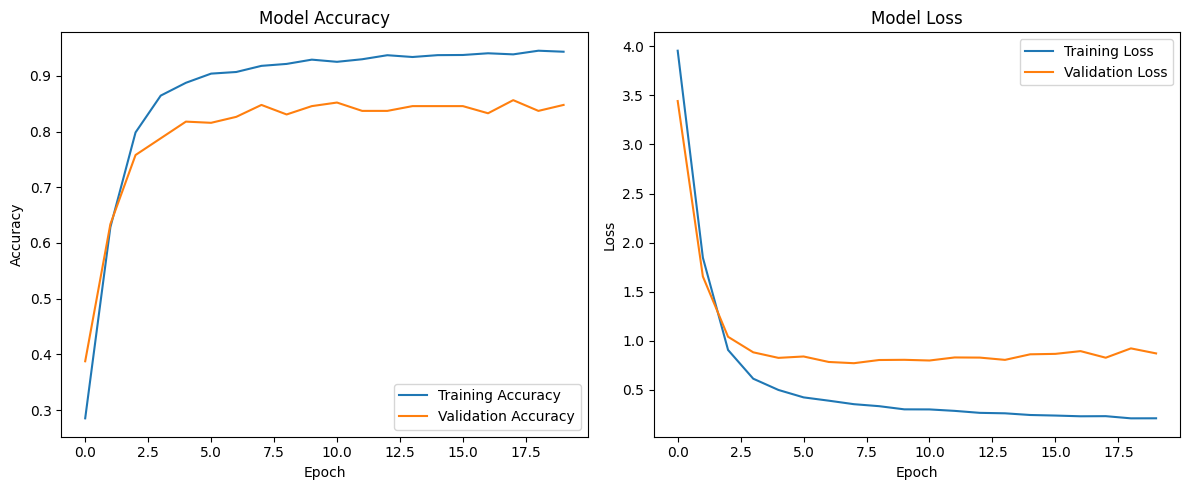

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Predict on test embeddings
y_pred_probs = model.predict(X_test_embeddings)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Evaluate Accuracy
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy: {acc:.4f}")

# Print classification report
report = classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_)
print(report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Test Accuracy: 0.8480
                              precision    recall  f1-score   support

            Richard_Armitage       1.00      1.00      1.00         2
             Richard_Branson       0.00      0.00      0.00         1
              Richard_Butler       0.00      0.00      0.00         1
              Richard_Crenna       0.00      0.00      0.00         1
            Richard_Gephardt       1.00      1.00      1.00         3
                Richard_Gere       1.00      1.00      1.00         2
               Rick_Carlisle       0.00      0.00      0.00         1
                  Rick_Perry       1.00      0.50      0.67         2
                 Rick_Pitino       0.25      1.00      0.40         1
                 Rick_Romley       1.00      1.00      1.00         1
               Rick_Santorum       0.50      1.00      0.67         1
              Rick_Stansbury       0.50      1.00      0.67         1
                Rick_Wagone

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Save model
with open(os.path.join(SAVE_DIR, "facerecognitionDL.pkl"), "wb") as f:
    pickle.dump(model, f)

# Save label encoder
with open(os.path.join(SAVE_DIR, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

# Save training history
with open(os.path.join(SAVE_DIR, "history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

# Save classification report
with open(os.path.join(SAVE_DIR, "classification_report.txt"), "w") as f:
    f.write(report)

print(" Model, label encoder, history, and report saved to Google Drive.")


 Model, label encoder, history, and report saved to Google Drive.
